In [1]:
import base64
with open("dog.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCARQAuADASIAAhEBAxEB/8QAGwAAAgMBAQEAAAAAAAAAAAAAAwQBAgUABgf/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/2gAMAwEAAhADEAAAAdzdX0cmS0tUV6llQXWstwpuWSANLy7AAVhWxqoDr43cqhvP1uKwtysRXNJYNu3Isjtx6xSw+e54fKawidefUtTeI6Yxq3VrLI4ir2GSya3rvEzSZq0jr05lTKvjQRz3LpWhS5qxXyamQp6IO55y/qXOnPxLHrTnkO9Fbn08xX0wLjBnSXFINXnsIDr9uamXp5XTmPcyd250Hlnc6MwJqrEgtzTidpW08d08TMcSwnfPTRsiQNQVcrJMLZ0O6cZuqznOKcJKbwnNaayYFwAipl8vobr3agKWBjVyLk1D2DfNsK1MapWKDJlTd+Vq0p1wXh9i3pWOHaZjpb3Hay0VrE9W1dxDduaYtYudefv6SsuS44bUoVu/XmnLcIoYhLBVYjUWIaQNGerLx/T0xrxKvskeWvJreq8/rOLl7+dvAd1DYsabXaGGAMIQgyWXmvWT3dXdMHd0KtSRY6GurCu2WsHCO2Q6PdCr65sbarSnTC68r6y0KlblewqcuutKxtSizIPP2razcq13y7mbXZ5MGu72pk21abxji10bFe4WN24HcerVhF1i0zZaTcnPS52j7lDXP0yOxLApLWqkqRC3FbpzvETZFu6umklpia7og6OrFRF7FVztetvmvN/RkrnxTnrVjDPF0KwA6EvQlzPTOpEzC93QVmOF

(np.float64(-0.5), np.float64(735.5), np.float64(1103.5), np.float64(-0.5))

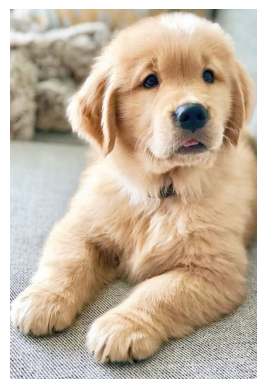

In [3]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCARQAuADASIAAhEBAxEB/8QAGwAAAgMBAQEAAAAAAAAAAAAAAwQBAgUABgf/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/2gAMAwEAAhADEAAAAdzdX0cmS0tUV6llQXWstwpuWSANLy7AAVhWxqoDr43cqhvP1uKwtysRXNJYNu3Isjtx6xSw+e54fKawidefUtTeI6Yxq3VrLI4ir2GSya3rvEzSZq0jr05lTKvjQRz3LpWhS5qxXyamQp6IO55y/qXOnPxLHrTnkO9Fbn08xX0wLjBnSXFINXnsIDr9uamXp5XTmPcyd250Hlnc6MwJqrEgtzTidpW08d08TMcSwnfPTRsiQNQVcrJMLZ0O6cZuqznOKcJKbwnNaayYFwAipl8vobr3agKWBjVyLk1D2DfNsK1MapWKDJlTd+Vq0p1wXh9i3pWOHaZjpb3Hay0VrE9W1dxDduaYtYudefv6SsuS44bUoVu/XmnLcIoYhLBVYjUWIaQNGerLx/T0xrxKvskeWvJreq8/rOLl7+dvAd1DYsabXaGGAMIQgyWXmvWT3dXdMHd0KtSRY6GurCu2WsHCO2Q6PdCr65sbarSnTC68r6y0KlblewqcuutKxtSizIPP2razcq13y7mbXZ5MGu72pk21abxji10bFe4WN24HcerVhF1i0zZaTcnPS52j7lDXP0yOxLApLWqkqRC3FbpzvETZFu6umklpia7og6OrFRF7FVztetvmvN/RkrnxTnrVjDPF0KwA6EvQlzPTOpEzC93QVmOFgaSuOiUjrmukXLViQWw162odbByutKNUFDBTtCdZyI2Sct5h9Fjcz2NC2aoYk1W3VsmtBqSoKo1UMkJtLxmov5nPoO4NPnuD2NvPGYbE2WrZ0IhZ1B2t1lZ7l6JhK9aCbC6w5Ui6jHAm56welale2oalessLg41eQ9nRbryMXBfUIO0XOCruIWLlrdm9xl1m8xKdExbFZ5K9PLoLaNM9MWm3xgV3aQgy3elBPAEQaIoz5dYEWmiUvZnrA2J0tbTQtUCkOBQBLpBUFBV1M+XV7A1LNm4Zo3UmAZeoDOldgbq1eszmisTiLxNnRMV0Vrm3gcLbqdKSBxZelBynsv1HuCbk1OHVjJFGWM8msyEdMaLIuzot1phmy1hm6ttZOGwt4Troj3hMlCaza1JS0T1Vi0FejjZqEeejsqFDVrUJAVxmiJJWq0gm6/DfKDHYzF42oxSmqsuEoGxJYauxrI+a6snK9FmZee0hHlesG1Er1JR2GXNc0IbltN4ikdSaLIrWTWIWYiJerFyk1rLNa1W4b1OrYYeadZeK8QSnITqwlazSaKKRx3VHjR7rXGSK2sbImbeGq0nrzEBgHTnW1Z1m/RJ0RJHWgoLDU4ej1JfLtJ6EeGK3Wzc4eWpoYjEbnZt9RyFKK0gLNh9jN0BmvAS5kXBgys1olzyazowjwdSai4G04rdMho3EwtNGmlNXJ3JFbUlpHRnU9TlmsVLVissxFZbVpEtoH0t5FezhXFKxFaoThjGLCvZcdaBK1iLRA5qaWHEyCYMde1M3SvZo3TZ68jD6OvIUTPTERMWdNLFuiDwKvoO8/oy9A54XC6Ay7sCCsrMjHDCEGOKAMvQVxEw4CICtJnLi4RMiqNEz7VpWy6WaaiNQxqOxpaimmpDVtrPV6sSO1M7rWK530Uhb1rEdWB5t6CFnR6rElsVcpaLAsIKKStAusMUHRXLLcyTlpVmwC2V6ByXpxClSiUdr1t6RxDzWY5rD0iJ6fOOJ7ryjp6yItxXo4RlmePZSDVzUVdFKVZZhUgyVE1Rq2osgKcN0IBhWyt8tWNGypA1lbQekWoAWYparkCRDklLo01LGNAZ9SJmEpExmwG4MdKVimd3rWCahHinCCs2QczlS/dRuExZdU6xAOBnTiVlafBAKclO0FPnsjZlC3Jk28hHDY7MukGDWKcdZo1g8FKoU0mUnOvC09b1eaK3iyOnrKVvBETXh2Wi0SiVbBLnZ+ymmReYpnikKNdcKG41ThsImI6UuiRQpekwhWEzjV1y0UXDGdbFeXfaztDWSW7rmeiDqTGdBUaS5dqgkXPoQfAUcGtLRkkXFQtLqHMNl51pbnlvSJQBUwA5FN8GKU2oVew3KEDspsowwgZNPF0kkzSrFmtbRztS45TTDqZfNgzoZqFG2VTa5t9Q3o40i0duXdPWVi0ARFT4dSwvbNsMvFVmqmKnupVm8NI27I3VngwHlaCiDQZeYRtbokzXEZgVAkLjh82fpDm4LZ0Kal9YmY5IpZaaJWk50FdsOOi4TrctjFWmdXPTQ1Iswt05rYLfnOPaNXB1LX9rzu3c8iypnQBQNa8OUsA4KrIjBiAKGKqZHhBZuUa0bG2xmuXLItM0XaTapaLZHKA2pLmaezRrQvo4Vjq9eVo6KRTnvP2UJws3QKkeiDiqWXOAy0NdWlbEgOarAuq8nAbVJSSriNomEKS7x83UOGxEDaE6uxvJ6m8dPclqDWWw6t50SJ6wK5V+exItg5dVWoIpGQudeVMs2bjaiWx2d+b0Jwa9G75XUy0kGFs6Xiw7a3i1lVjwibITHMgORbroShsu5y08pD2eX2Xpfk29y7fUOyWvP00xrMWU6RjBlGKmll4fZzXd4PHR6vNasV3nLISnn7CVYUzSkAVZkMjC5lblZWiejcpENEqJQyJFY4idqIi0EzlXE109PGZzdeM1iNLdy/ddIxe1bioIV5dLjXBOmnGVvdObAzLMiDYPPrVSy+Oh7gNDdYy986HSe5dreTW8D6OWvXOr6PP6P0fifV+X0+jpaeHVCjMNLxe9LczdnKKYguQnEXm8lMTfwOnPyDQp+l8+q2nnY37PU8ls/P+huv4Wllo14Wsw1msQ8g+ipdDI0rHei3o4DiY7ceXIDj1TScDi1OK60rAR4Na3ORk+iNZhOegbsxmNeFx19lePOg301Rly1mQj6BKXEuWJomsv6mt3aienOAXV57CkbB5egqSehje3tY+r6fKYd1WRDkPLtSsr51cqrZTDays9NDJS8z0xmsqaXt8efx195p7bxPqfP29PsJ6fi9aMtDlVlvkR4/UvRu1icsxl3HuIr6q1nzzM9/wCf9flyV9M+oybUP4/Xl6Br5rlw31lGllTfhPUMnQz2c3XZz2u3IgjU9HDLsqTlsdb3hQtoIA8FVpkdy02kfUdPm3NOqZywTVEg6MmUHVUEE9EEY13XLq/sEt3WbhKoUCQHHtm+W1Q8PQE+HuV6HdRb9XjAqPG59H0cV3l105CUggc5V8WA53mJei708POGbp24Yx93SPP+ja1+Ho16HLw0Kj0WJUdoZ/OdC49C2ohZ3oWo1XIImYVDJ9AvWO02exer3CcuVEqtgrPzNFFWfQ+Y9FCy7AZdFxF3WCzW3fj5RnLchxvOYGgXEX4DAug/k2FlAZpExXV1joljQLkwm1bLZ1DKkhVobuI6reqEL1N5ooRbl1lVvJxvOxtnzvD0Lez837/rz08/Q83045PnS5/D1b7/AJx253F0Oi4TGXMYdblzWtUtxhk2bamRbQpGfpw+QWZ1juLbUBBaxQcVzSEBfUmrXWKQamKATS+dCoUC8at7m1h2qa2qUXcVMbOdy2ieg8/oS6iOzgZamnkae8td0ejh5C8MYHIYttKN0szjQKA4WlgASAYCtqzbrmzGcjB44Zoc6jTAn9SmnLqDNYEpFRp46HuBmUOc1i46IZzleXV/1/jveenzD8T6/wCe8umWk2rjoxrI6us2ahqWLsyCNxEJae1nrRfeaDYiJP0S3L06zNK0JAQWdVirGVDkJ0xa1S9OYFNMMqNpDz3NIBnVpCUmb2sFF6LAGBR5/N2MRo7Czc1vYe3iyNbGRr3J+6fTx849VvMvM9VBXCDEx0ZGH6nHPPHNSqLnUNFnMZNEqV10SY7h6PSxNHWdnQAzvNVHEuW8Qsdw9F2ER6zOUaOfVENKZ36D2XkfW+vxef8AFet8h5fSig4gP7GXq7mqys/Le9pZrbpJ7p1mxKs7yEnXWhhsRWhBHR14oOCgm1qajSeTk7x6Q/irXPu1PBL3P0nvnHoufTc5W3Lo1FuXp62oKL0y4cjXIynsJXmVTze3nspSNbWJtWMzS/p4ZZlzYH6tdSV5Vg0pkLZLeMKwmeoAYVSeDh3VXJRReTS9R5r2W8uzS28Rnuo8ui+foeX8/pv2cbHXRgIEyZXse69H5/0Ps8Xk/Lep8v4vbnZmtk7w/vef3dTYby3s1zgWghQXQ1xl3g1xl6YvEyXtM2L34mb0SogoQpNVsLW9vmxs/f8ACdeRksdbOdAKXI89hvTftCeaa8fr9BuYGrw7aMgZ3kQmQwChE5cbFeVXmhHm9I6uhA9JV7WSMru+ry+fKp3PTIAKjqomADFrifnvQeeMx1N3S3XmLmGWW5wyGIoU1vZeM9bvOiQB9ZGg+jz6KeM9r5vy+tFIuNz6ekBWdZyC0FqfSt7C2/X4vH4GzgeT2p4+1gdMPb/l93U3tLN0MU0UjNOdWbly6r28FvS283IuxYSbxrNLwPJXC3cPn18wXJzPRx+k6Pl1vZ5EPNBTlYqK1WtA6IXOZxd8iGjxet2fOek8Xuu2i4SMqtgEWUprHz9DOlcIMrbezkbGZD6L+83eVb9nj8WNaOHaAUaRnQEwWGQAlhbOKJNLuVe83zofTU4dgksLnNfZ8xuWe6sm3151AytnSeNs4nl9Wb5r1mPx7JuIX0MrF+mfpOnW3p8XisDcw/J7Bef38Teb7Pn9Gz0beU7m6HKtynME9jLQS9OVq1HYdvP0NxmtqXmNdhfHQWNuIr47E9H5/ty1/MbHl+/BZMw7audNzAiG1M057Z0bZz9jldP0mTseL1umGYgJVqQwtbDbQ4fZ08yuXNf2MnbSrgWenJktL+3yfNL0f8voq70F7o2RsMVhLF18PSzKpxqQ2zSUrQJISBLdYh5Ng9f6LwfuemLrnDNZ+Y8HzejHQ2Mrl6MMhxIo6m/vP0lrA9B6vH4vzvpvM+X1Dx9dDRF5R6tTQynzQYzjQ+2m6yzcV944Ehld0EnuvNil675gXYDz2MJhy+Vx/Web3BYGzk9+GRW1O3Hh3hKW7lsUZIb9Vkbfm9Oizn6fn76TKR7D4+xkWeZ856Tz06OuY+lLZma51sbuP6C8wsWL6OHdFO/H5w/n28vo0VlbDzIG0tU44xfNem83qBbzr7zp3QJmnCuI0D5hTUvlkzdS2Xy7X0n5F9C3PTqpty1T0VeXXDz9vI8/pylNBGaRsUFnvfUeR9Z6vH5nx/vPC8PRQBeayyGrDTqbeo02ieTSdRcsZ4N7njwTeWTht05uVsPWQRaudLiOKXKyNxKMnI20tTzCfoQduGJXYS3hBiurdJ6Um5dG9LNc49X21HudZcWZpnN0sTefJxkVz03liaOdKvDay0tdI95uWXJ35WFYfbn4JPTz/P1G4FoO4mcbDVek8PWQuErNTvKsOTCMaEiE6HVnToTCF3bqDZQZNP1vhfTTW/RJzOg5e6Dl28dneqwOHpyQvCXV9/8AOfoHo8qngfoHz7l0CwFuazxPrrzQGLDNpHs1ms3QQh5pvnzwRaln8/XsNQlO3EKza2dL27ppHG1sPGgqHU1E121d4FY0IsUoybUK1OmnbnvYaScxXHFH2W/Jetwdz56bayc9CaGYXG9XZ876iRmKgZbYyZ6c9miF+3LzafoaZuIbVqZ8uyIg0wmIHaHZl30usz7NwL3YsKWY4BJrQtc00GDxFXFrrsuYDK+utjPykyN8HLv4nM9b5rzekvvvGey78A+C938+zQ+l817abws7Zzc1OYpYcoraP6WNsXLr2Vo9OdpFo2EvQm+Zot28LAaWmlu5fGlcp9Oay1tfP0UFoAtClUOty0OqOzmazjLEX5aPoI6+afRXcuSfOvofz6aX0cncmsWjymNs+08h7OxUTq8xnJtZiPNYjvbnvSXt8xQeLVuPwCrUInV3hKHeM+NCTOrpQZkacGX2pWMuurQy66kGT2rVc0zvFH12prYuqzNq4vpUePbJ9Dka1mV431HnOfSvuPN+m1nLyd1DG8FfVRVU9JNLSz3t40p4esNtLD6c9Q67PTF691zRU45V0XQY1nwES53DwtTYp5vQ1111sBXU9CplWvNSzfXnu6Xmd/jvU08r0PLodqtdZV8tpAx0ydCrWdOYvpBpi+tz9ZkWdpJ2ZGb6DJXGaX7XP3lSR25VmZBwWpTrdVYvElevND40QKCQo+vBTrwUi0lOvBSCQU61yprnzurEXUlYvnSJLgxvGw9bU59bNmH15Jp6KfPpkpa62N5FXoWzw395IS5Lz7E1c/Tfe8n6jtwYiR6yOlkZRpkz8bArfKlQTervKYdQNKRokMwjxmc1p52XMe2XuWsxuF871BBCsC6ZePBoaOBi5KcJN5qM1YTytlVfLo7uDc/ROt3fhXp46t6lYvBWLcdbpO6ZKdeQFD0WkEqU68JEX4HF6rUkdmsHVNNnuAsvGqVRZG2LNEycW8rCMLnoK7YcbSXeBjefV0bV3E3NZPepN4CroDMnRGnXqKZdenN9SJhbHYx8bU0UnZbn69LmKymdYzKZzVuGTJtHEpaWk1ZhRZ/PmqXgkpLzZLnEa5JaO1klY6qAOKaycH02Nmeu60ezyxPWK9apWLQR3RL1otZ09x3RyxW8FIJElIJVa91ilSVWsT0XLQ2OkmqfOrFoa5paesiLVFwNCztcRqY0ARx42vVikorTW1gq7G8GredZVVernS+brpy0IxaxDP8AQqrjGcYjJ7XGZD1yUEjFUWYJMlR9JehFgxr0FVb0zqTBMGIIyXKK+sliOSazCwuUEq2dpJy+ni8e3x163VSL8Di3FakiInpIi0ETEkR0Fo7iK3oR3SsRapSZmW7POc90PaTrd2p3TFlItGbQJqzSYmB42uNkeNAktJqkE6qlrFy1YRdQVZiKrNVlFSaS2uuqrmfl4UvoWvI6jXo0k+Z21Vro2ZI8rhFjISw+GlRjSoj8oy9dLEpcuUZLm1o7U6sVlgVwZ0NRkMvpYmPf4uieI6OrumCOmYiLwUrepW0WK1JQjpkp1oKdPFYmJbMjcxsxBFzbzE6z3TUnqxLfq9UUJAARwZ0vBR46Cremdd08Vi4wsCpFiIry7PZVLHVvPZy62ZlOtES0a5onwuKYlrM8xU6UZgyUtM2BqQUturJPX6wcEDByKnGDLGsN0TrIxlHKILAM6AOw5fTxen0fDHTEsW6Sa2qR08dE9FK2iq27oitoIieInuKx1VnovKU3Mc98biJ1oneYpaudVjqY1eadV+HFhKWiwQWwzStGB42KpozRUJWaXXYDjVM9xGWFWUrE83czKUbsKtEy+lNKmMSBsUYkuab3PWi9g62CHAeovehZe7psp1uihIuWJSwWwpsvXoqoihzVglBL60d4+j4adME2ixWvdL3dx0xIOJqW7uIrbivWiOrMA63gggjZ040uzjZZidZ7uqcORc9zWlc6JSskE6NQ0jtvNq9cXE0KAVNXO1qMBxpYTIOe0wOUaSV01qTydvGuWKkydRj0ni/d5oyw1nStywhLRFhJiWez9FCUxUmyvTUtcVwkQWylryUtbjpjqmOggZKZqKj6K+u6/fQ8I6FqRaLA4mC1b1Kz3S06eK9NSepxfq9HRFatSaSyyu/jTDAy5vdMakUsLGqgKPG6Er0t6joGoKKZoq9vJCwHeGKXiwY2B50sFoeNqrtLY0OCVlFma+JLn40E6Yb8nv4u+el7XxPpMdN1pNvl0ssZdDD7gpFihc59KyhlyZrHCsWvEkmEUNMX1nonkrS8LMWgoIw1RQ1Us31tYj6Hit1ZKWrYiJgtW9SsW6B9ML0XgHFpB9ahFLQR03zomjRnnq092p1ZpEUtXOwUNTGhCJSaHFoitSWLMAt0yakLamhKbesljqXI62jOl8zW87z3qjpTNa8x6nxy+YbVv15ATE3qGcA3jr7K2PflvdBemVGsxs46tlYFBEUt0y3uIgW8ESSVvVpray8VhJ6JWeiLOHYcoFGEc31VqT9DxTI7kzEnV6xaJonRFZZ6sr1q8R3VrurBNa2i7qz/AB6mvS1zPd2p1ejF4cjzqBzDVa3HNCiZzY6RhK0qdFLS21c9ztyLFLawCwpm4zdPPzVhvVzq+Hthl+fRq9KqbViXNDoAWzixs3cTdllK1emrCm8FDcNk3kkRYvFC9ar3pe5m1Jqa9JTrcREiJGNTIqfBX2szT6Hii1CA5oQgtJqQlHHdWimrHE9SJLREHUtValEaVxtRvl0tMVst1IW8UplakVatXqLIrUypevS0HNM6kcxLxOmmbJzvDwloQkRamc9kRUPGlhQubneLp0vndS1aRWmiaTKl4edS2ICL2KVQSfkSloa0MO6MXVMhLRNWjuSO6Cbh4Y4d7KjMEWVZRlXpwj6AK4/oeKpamFrFoTat7a16gSaWiItSLVuMjouDpMFTjPnTbIy89TEdVKXrnUVikvR0rFYkrS1M2KdTOuD1s6i0VCU4ZxA2OPQ2s3muNqawhwpGCY9lkyM8umdBpVfUTa1Dkg7K6bVcXl2oUPFmBUZqUt1gNTyB61rJumQN1blbRZI6eInq0Wk0QKOgguYGRL9Ci1vf4a37ju6hfhktpQlImajD14cEH0nTFSsWmUugJnnvp6StLhzZoKM6twpuri6ZJisFqcLOoHE41FoDLMWDKSouWTBvY1AEbBwhuzV20k9ZuKPQnCfD055oNqmdZ6T5M6PFlLmh6PyqcwMzmlHM6GMgy1s9uLR0J0UIVCQloSGhJmlknpkihKVSnCJX5cQUbTr6VaO93iiL1qKErLF5iqTXo7uk4fSdW4C1uYlE3LPPXTEZsxES9SQzVQ2DjcVmSCQWytSVKVsLN5epc7CStc3gyHOouFZb6GO/RUHeAvyrcKpXvOm1uLsenyz3RrNEW0eXSjmfo50utY0p2aH6c1RlTzoALj59HkG+ZR5kM0UmYdHQ1iw9aEqCRc6e5O6eLdStnKNLKmrdcAodavplw393i6vXK16S3VlYqSpNeiuvWkdWCSnb43PUdauLWOiakPLTRKREo62iWerRTMCV1k1Ux89t1E0CGekL2OpnS1YZztNV1OWTwamGqF1zFmtoZ0EtG2vSH5T1eQzUD1EU2R+fsq4OuaJupdRsqpevMabiGNj6C4311jp0VslOssp6BID5qAJYGHslca4UWFgRLA5+lmyoqFXUYrB1n6nMd7fHS/cVtWqktSxUZKBKTQiRQEZDpc92vWMW9a9LURh50GYpNQAworXqtSVewRGQZtb3jOixC+o2wEaWVa7FDZgCqL3tN2HTSR0FgawoBoHPoD0+Wx05uGWe68zqsA3kKxgcug+JONWAynqNPZr+s0VOpC9K5PPpp1zXpTgqYkVjCNizUM5pE0bJxYwG1gF+AjdkihUDZ9BTOqDHce8/VuifZ5BWFKkpEBLrEOp0lQ3AXMFuU74jctxWa5sVmM2s1qshmJoA2xSgrQGdE5WqtExeNDHajGlngUl0mMV/eXCosXJkGFM6HPUzuz6d2dABJsqo7nzRGVdm4MYDPfly5gA56uaNgGkI4+nlY6OVHymlK0I5GqlnRn0ihDormubNdJjpSF2+sUJe1k266QJqtZ8NBhLPeyKlWQanQO++f10Vu9XBQ88VXJEVMAlSSlSFbdBX09PGzTPc9VoSsoouPOugdVIOOSgz0mk4Opz3lJGzZt4mFXWdm/nnjQkBYuRSGj6/nNC5dupeCVAxNWrWxo3WeZpn6CedM6Am+nI3TXtzEAdc6NS0qcK44qMiXLpKQWGyFBzIasiloSrYsNkphstqGiRBpGpFeyerNkXJKRHWArOhMjK2cSl1713gJeP25fUa3p2590CCEHVepNwfTAGCEkO+BznvpmsUjozrqWFNVielrWaRwSDmgLugxvBU1MnntXL1cmxZlNrU0y5fam0mkaU/KMLoOZZLHWcnblsOo83R183Y3zzbc7m3LW/XkTJZxJp8yXY1YkXOFVCaIhJZu3BaRVrH2AJYchE96AW89sMs5VMtolwRaxRadazmF7IatZkIK82Z/n/Vef28zJ69eBD2as+hhm3fEjmpZe5wcdQmC1OKk7K40EvPU1mIpFx51WkRNRQtVDe/QMMhzrhkFjSeRrZWNp5mtlCSeljahmFS9MlMnA4woKNQI65u7pZri0aT1pdDTWY6cl3BycIaMcmaefTpDwYIuXhlCso1MMxywtsZbqvNZ5Lko04lPKsmjZQaN8hNaFFYRmqgofuk1TBASyxwbkJPJ7z51bQW68rsrmufoFRW74sBqpHEATFaKaaVLsDfzb2mMXurXNmnDmiQOsswKspxL1zo8LhluIC+NESMDOs7N1Mi0eRoLawPig3K3HyNJs59mjpZG/mt6Oc3nTG5m7dhDiNrFQlzpoK1czl0ZWEyvGJ1F5S5bKIII0szRs+7igpoWkFU/AM/TTgBwvnHsSs1HYz0Kz2hYkLUAmaSoVbZzjsuXBeiANNmGrpZ/XiO8k1j3N0id8nHAwlIgtYRDoqdSaKbuL1Lr89TWBY3IZiWerC1HIcasEM51yx1ZqAHWgwYgSy9POsRCcNlFHltxe82uSUpWu9JieilM/lN41vN4z9mzYdNYFmkR59Fqs0zoN6LWsUBWtFBEw1ao6aUi0PqZi560/kdofyRxLoP+Q0TeqkwjK9iEryZkXEuUaSjTQAA0gqsUBXHNjV0usugQXTmOpu3z9fHE74FcqgaVylOXbJr1pXXVmZei3ZBGwLltUbAM9BUmM6Bn6S+NI0YWzqAVdIQfQWw+gBnPZrNBsRSIXQWLybtxUjdLGHErDjuLryv6fnt+TYVqvqBpdTnuwhKrcPCIreLSkVXNBfOcBH0Xc3Dvt0XKdOCTN1FDUqSXlSC5wqa9EfrkuWbEYzsjRAUoojQCtFUrBV0ZilbBL3t15DZAfpz9UdZftksTdbLSZA3goVwD8t57peiYiBEBy2IJA43SnTnYFmUMaUUdXxu97dSk2AVtWyKI6SFgJ6tQC8yDta+oGplNS3VpY4/n1jV3MXRNGMyGjVnNlIAZI4HUatXZ1E8bp+6aufL6OzRMznQ40iLQJLj00U5V0X1LRNhvV1rECRNLBoaVSaAcUVh3KuL9I5SpUgbVrnMq0hrMBJPXlZhYu8+lkwu2VzhLJS80WzSOoaNxEzZ6sRNK2zoSzAOex9YGdEEYS8swpmrIaGdz6R3BWVb1LzwkEsUdJkBaqULLNYXJvNFmpuM1tuLlctLmozn3m3+XFK8kw21mOes1k8p6ZqdZHxeuR9eoOtqSii186HS6masOL89rWLCglqaRA1B5/TCtbrgpFkiYoowGqhiAsGKoVHSoWZdSJXWUuKPryYAxG8+mSJ3bHLsdAr25QaVtTNoWteeu6IlvA4JHWmdyOaS1VYrjV87lcaCoemd8C/UOLjJUMqgZDGpQdxpVdiNZPWWtZWYbPrC0F5FF9MIrB5lW1nPQTae4RnUreY1nojiOisvU6ubNKWlKOFoNnNIc9rPqFzokGvYraM6V5cgxcZCUitqhtAdVq2UnKoCb1OnrJaOvYCbi1zH1q9eRCTfU2zBS7ZcsOYvpToS26K4vR1MagUr51elaZ2eAzFppFWqsvioCbnn1QIQZURBA+nrFAGWpehQ3MhljWQHse5q9RjWF5OxqAZWapSDkhTQI+0bUlqomRXN6itm9wumiDrxYVhZs0sKWB2XxqIGHOoKi2vFWqmkPI0DhHRLkXbKAaGiyuokpKUtaQDkWJ8TibLlueEQWs9PT15SVIes79r37ZndBq5sTRHFcVC3jYBnWxqthTNGkEllaFxpKD42N6LWWONKaBssPiS567KlsWFCCARXWai6NZozBmedVe1mpZLrMDuTRa5rlXqMSn2aO6d3UkqKIzoo6ilnhWmrWAcEuZTGnVCDi64Fpoyxg5sx02jYUqjSWllpoGQMdQwQvUXH6gJYNZwajaxnbDiLQXCUOhaKxcNsDJ05FFRzeW9qu51lZvTJCGyY0Elx2K0kfLpXoXzsgWM3N4y1s6RWc7GqKPqykOqWmrKwigLgtoOUbgghTvIbkNcyzLGs0Lxbmjir1i1wzbZuNSJ2ZPXdwyw+DnQ61tnYbWDKNoEgpWXzW65ls60brJqahARcMjJMrdOsHlYgZESIwja2RcY8IDSZbEK1qFzzlUXhpQ6YrHlxxqUJVvXOXEj7wfppqe6ZydbpJiKlqR0XWLnZ1XjK8ui5INjUKEUlam02AAN7OwoOpYo7QFqRcKBU6tg8xxDfMDNj7xdmrmpJkj2HtS1zKvapBn9eVTSvNRE1Khuvjc0qpNswGc04TisBWy+dTkaCWdLEHSW917DE57penSi7KboAZahCDCMhYFVKWsizCsU4ERaESBSMBpWuWMjrM3X2LgGjBenO9jKahCXmPXuVt1gVmK5t7WXpRiBY0EFqculxi7NXLdfOn8rUzUaCHPmj8m1nRBMCFRXXUStM7XN5Yh+nMLBDbzVmt6veYsLx/Q5qG6eSbBCrdUiSnoMUpxhpmuKMWpGj0ypKu4+NPSkYSEYOdUqZKWq7VKCQEU7ZcMPSi+zKrqtGKkcsBpSrEx3kMG9AI2VLGr5I611ES2SYRtYKyybeBmEe5ZUKUsMyZ7q6p+sFdZjFNmykrY7gzoSd1/P1aSGFXpDMrWdAlrw6SMsLyrIbClWQdyLM1Nk3biVuhtZIepLCxLYPWf26QftWLQKJSBiuaAL6uOgrpK43t1y9LWVykDDLGSTUaXaHZhpbWNy6FsmSaMuSKAu3VEYrXS5hnMxq4JNJYLFloHQfouyZlGV0LZWKYEGmsqA0e1hR5ydZu4HUsFY3UsxK8hq0vXXWOek0sXT6xRpDuegmz3c7tQmdjSlVT8uloqcrYBzPhJo4A7jNaDldhKU7GfzN4toAb1k9bC3ksyzrN/Tq+kqkzTNgECx0LesleHYCSK5tazSaWT1VMaszmzD2eawbs2hsZDcGUnrAzpc4B2HWPGlc/RrYlcozgmWQnBmwxESUWw1I1EKVsgd39ZyWNB3eMo2p1yhoMU1K1htFrFutizEsLVi5YXkJ6E4GesxhMr89FcSc59L4ml5XG9Gq1saK2hw3cAayHMmllN7yW9cvwmtmuZqZd4YardDtA0FmbzqdpZ+xZvOUt1xVY6/LYSGDNSKGY7pHUjGPGpGGnPVgwDO+XshnTDK0j1VnLFIYxzYAro2LZOqlCxlibH5VsjrQg+uBLoPRZirPo7yQrNrlcrhtReXrWB54Os1vDQEue+gXRBolS0hxDQo1weMisW6zXgw+sGk7WTOazVufR/xreNi7j/m2cb2aKZ8b6eMOxiEDamZV+3TCpdBmM3UM7KFpY8Q9S0t6mFqseyyPQ6xaZjUpSaZ1ZU9s0Fxhzq1WEs65UoOexWuHFt0vVmdtBszldxeMeHls6YSrakrXCNrx1Z3ETs0JCWxkYLReF8/UeFFbniX0OnOIarqDMvrWZLrKwgU7FCBpAjisLC9Xg0C1RWOXW6L3OlKMtb2eqVor1jKDxTER9Bmxl4PpaY15Bb1ycnn1/Sll80Tfsefa1Dy5saki5CxSrh1hgoCwNxVwsRFiXe18Pd6ZOKypewzy8ImLL2rlvY2sGVeeyWtWFTru5tzWxt520ozJdVDNLmtjvXNTqYBQUh0pOfFjGVp4+sy0nPTk91jZtj2poNspd4ibShiUdASOgalKhYE3U0WvKJxZuyAFgaVvQvJ6FhUhRRwk2nV1es0YEwBVfCiqG6uuStuq4uEXWz4kLK8pAOCzYHR4oC1yB1NSepK+VjoHKko/WvqZTu4UVwY3dta1gvO3xOXX2swrrIoETh0tUDNCaVYi3l2EjdQYFKJitZX4FewK7CyKqOZ2iOe0LpxJMtdMs2OQoZkiZ79165d66UuCKZCA1XrZY0lKaAKlegra45WKDiiCIzZnh05M2WpFB7eUCjWsaigGumaiLcJahVXG3VUTcuk3WJGde5chDNSVaxGZQzIUra3KAblFKmRmFiNwk7WPoWuhXHm6yDPlprF9F5r3PLoRBzFkNYEY2V3Nd069ctPFeg8l6ezZsMGdHvnGh0+aWjLyncznXT3zJQr/AFxUx6FrL7NgQN1TG1Wr0ku+ELwGaEKrpHCKDeVsUgJS7IZLCJYXfDJWzKYwo3UUGZwTdyGx6DX6ZQfDc5Q91CXlh9UDJ14Wq/HDCCO+ugWE6ZryjgFtxFoLS7IvxZXMPS6Q8OQJ1NXOgec18zh1n1GUSrZfntXGtNYquawyjxo4jGfXldvLjWfUWzmM6a61YpcKWsvppF6c+Zrpbz0MEJZQbRdyGLJGC1TxK0wmzQHTig7u5oS7y4o8q7SsVLHcYoJLXXAsJMUyHlhxNXRDo8UT50AN04tw3UASydYudSocJwlGOmlxOgKjJRIuaYVNeyhuQUKHvYrcgpQAcihmXZRMrC8o8vRBw6aGRo+WzpYmQDU9wpjJR6cWCuegVzVjTzmrmRo+Wc68vaJY3Z1oDKwnO9oUC+iOAHLNWKIySZSlMxSR4A2qJn8SqGKjGmCk0Bhc9TWhhCNYxjaLGbC2uOaJYPHFGSKMdmDC+mIzqvVF2Rq7j9CtGfZtEfoq8V6BhKNEMtlTqPaLGY/SSEHXUVrI5WgkGlGArKVgFS9SHALs1jID6BbN89i+gVzfMrb4LMyNISZy+0FM8rrZh6JnlyI2DxlMMtKvpdoQraxpalk1IkdizPfhiUUNBsrSo9Idy9Ab5ThmhOsmBpjRgjq9q2BHCY6KjF3qMSig1KXNnNJdVooMTjMZ1zIroEzL6zcbJTNaVm0z/Cia5jtGvYUCOK4JLYXoLSpyyeiCCUqaliHz40IW4pD+WPTFjoKAOuUBGbro4JKbKZhzr3lwx7IoQM5IhJNFVhl5E3JWGSUgfUYmAdOjSq4GbSEzmy7aDKEBM6OjOuWKESOjF1dQTtQ7mHggJoOZJXRRV4YwKWRJwNwIdBMEatVYSKYLbOZR6qZrEWyrrxsXdrPY65xUdcWiAo5RYsVZEJT5esNBuZwbdBW9E0EEm1sfOZgzOfI1JRoUdJWnMAKqsGRNbXCZ4T3xVk9IUKH55UqaKQs6eip2emFBnKIO3IgKEuTWA1YixKGYyo2KSUuM9qqc3Io+oyWpcAypdkque4nVlWqkKAaAkc0OBaBcRKn11tGJULmKU0aaf//EAC0QAAICAQQCAQQDAAMBAQEBAAECAAMRBBASIRMxIhQgMkEFIzAkM0JANEMV/9oACAEBAAEFAhV8qVgH2NDuNjDu0MGxh/zH/wAOYTH3MxAJiMIwzOEFU8eCtc4ThMTE4zExuY8ulY+VIiCKIBAIBMTExMTH2qsSD7GMJmZmCDZoYIY0BgMP2Z+w75g/wz/m0/cxAsSqeGeDoabv6ZcppgBZplx4AKfDmeDKfSZjaOGgiFYdjGjyzuVCUxBFiwQf5rBMwmZjRpygaKYNmhghjTPYOxhhmZn7DtmDfP3j7zsVjVsIlZMWjMSoCGv48MME6VIF+YWMuRYuVKZPAThGSGqWUSyoiFYwjR44lQlQixYsEH+WYGgecpmZhMaNAYhi7NHinZofamCGNDuNzDsNiZmZ2zM/4hYK4K54xAuYUgWKsQTEEEA7H3kTjLK8h6BH03xsrILpGWU1ytYsWCD/AEzMzlOUzMwmEZnGDqJsY8zMxjG9qYNmh3G2JxMKmcDBWYVhB+zMz9+IqRVmIBMTG+Ivrcf58Yy9X0CxrdGONtPBq0gEEEEH+hmZncmLOM4wiJsTHaZmYTHimKdjMTgYtU8UFU8c4ThOAnGFYyxlhmZmAwQbYmIqZiJMQCAQbncf/AYBOEOlWxxpKwLtKqriAQQf6HcbYixdjBCY7Rj3mZhhgUxQYAYlUFUFcCzEx97RhLBGnKLBBBAmYKjFXECzEx/hmZmfsPv7szP3vL68EQQbD/HhLFjbKZnYQTMMJhMczBMWqCueOCmeKCqCuBZjfMzOULznOYnOcoTGMslkTuInXGJWTFqirjbH+mdswt3mEzOIGgPbHpehYYTMzMzMzMzM7W4xYnH/AF4x0hqnhnjxApiLAsI2aGe4K8xaoEnGcJxnGY3MLQvPJDbGuhuhti2ZimcpmGNLFzKq4q9BcxFwMTH35+wHbMztmZ7/AF6DRfxQzPyhPZPeZmZgMzMzMzBLAJj/AFxOM4QpPHAsxCIROEZIEgWATH3ZjPGtjPMmdxlMdDHJE5GUCCY3aYlaxREGP8T95mZmZn/onsmfrPSnpDOUzMwb8ts7ZmYeyqR0H/xk/aJmZnKcpynKc49kdzOzAIqzjCkdJbVmePun0PsJgglfrfP+Z3/f6n7/APRM/Wy/axnuZmYDMwGZg2wIw/yJnKBpymZyhaNYBPLA0zC05TlOU5xrYbp5ILJzhOyiKIIIY4lgjjtPSncwiVDtEWKP8j3BkbGZh3b3sPuEMM/ZOBD9gMzAYGmZmN/iYbJ5ILILJ5IbI90e7MR4jznOU5TlGePbOeYmxnKCCCCAzMzGjCMuwMU9jYLKawIu5/zz9p9Cem2M/ZO5MM/fuGZ2zMzMWZEDQbn/ABe+G+JdPLPLGtMa2ZimAwNOU5QtLHhbMSJMxjFgmZzgec5znOctmjzl2p7UwStDFXH+OZmZmZmZ2zCfteZ6WMe8/P8AfuE9Z3z1DsWi5adLORMzBFMBmYf8XMOZWDFExGEIixYIDC0LQtHMEWLMwxNiYTOU8kFk5wPOcNkd9lHdKYFYEX7T9uZnfMzD1M5mflsszHPSnpT2x7H5A95jnrO77ZhECiMx+wNFaAwQw/4eGeGCvE4zEYRhssB2MJ2OwgMzsJmE7YmJmZnKc4WgirKk7SJ6Gx3Ox3zMwmFpmcpy2b17X2qnt/yMBinsmFvkpinuxoDP1uDsYUE+E6h2UxTFP+QXrjCsxH2MMzA05TlCYD0dgYDMwGZ+w7N9hixJUsrXsfcYZmE/Ydjt7lcHpNvRYwtM9qfkT27RWit23bfrPU/THsGCFujM7DdTFaA/4qIRDswjRo0zMwGZxM5iQLGXYGZgPY2zMwHbE4zjOM4xUMrpaVad4qEQfaYYTtmEwkQw7YM7xgYaVnJAwc7Me8zPdZ/szLzKjmZxCewcqvoT9Wn5K+IjZi7MMbZxM7KIkH+IjRoI0YRxGEPUQZmJxirFWARxCsxH2WZhMzFMGw3Qd1qsQqID97RoTCZyjNGcTMUEwLMQxvlSLMBLMMOw8b0T8hM9ofnmXmVnEzMxZ+kM/VsziI8rMWERq+yN1ixZ7/xMOxjQrmOktGJWYDF2zOUJ3tmYpmdsbAwGcpymYpiEys9IPvaNDMHZ51t3gZ2fM8prttVxbWsHxV/THr9GZ7zBNT6q9E7LM9q0z1ZGU5TqVmJDGEZJiYiwQHEDf4NM7mYmI6yyucMbB4HmZynKK0YywwxWnKct8zlPJA8WIs09UAA+0zMY4hMOzbEiDMH5N+WMSx8S+wxrmit5tPXgnP8AWYfTGZj+89epYe6z2DFMHv8Aa+1MfMcARBkokXqKdmhxCBBF2Bin73jGc4D9hjCOstinJEBmJjYmHuFd1aBtiYdlMqmnwIMZg+xnixveI0MeE94laxVmJYZqHl/MniZVyxSe6P8AqMPpz0s/cMslfvGYs/YginE9yywF63AKNmFYDiA5jRtsQbZixTMw/Y7RoYhg2J3eWrOHeIIsxGWMJiYjiGZ7V4rbcYVgEWaQRB9hMseIINjDGjQKcoIIiywy1o6gxqiQykSlg0ZQDRhQ7Qnr3Gg2aWRIDD8XOwmOnbiht4J9dNPr5p9WGGeQVsHlmEwzOINjM4iNAftaYjCCKZn7GjzEOyehGjwHZ40cxHzKzF3AlCcmpAEHW7NGPf7ACgdwwmGNmEcZnMHcUQHEseE9+MRgoFpQy4cZp9QWlT9HtWXEG3qfuNjA6cDo9qYIPY9ag/1XubHKGDKnRag8tPd8cxGnR2OYpgMOyQH7hH2G2YNmjGZmdlM5xmjmA98o0aWRT3WYrTnOUSaVSzIgUQwmM4AXOOQQBucAwGEOzRoJkCLLHwrvkomIWmu16pLdczxdU0rb+yroj0wmO8d4yZj4sJYPnDB6EEM1pxWDAuI9fKac4soswosiGKdmncUxvR9o0WCHfh2RGMJi7g7PLWnknKculOZgwgxhD1BD3GEdZjEQ9ZxOUSaaos2mpFS7M3btidLGtLmnNtlQxs2zNHM5ZmDipRktgWGVdknr+U/kRxdzYwqyOE0j5lDyrtXn/rjP2FmO3Xu1MvxyfUE452YBl1NZCePsz8aguHrfut4rytswHMZZ8pWx2t6Ke0g2O7x40EEaAwGWGXzvKoxiUmV1ThOEeuPXMQLOEZI6T1MxBKVn8dTxTZjGfEZjLXy1drW2U9Srpc5LGGYjYMxGiD42t3a0rfxT+R1f9d9nNkq4ozT3F6ehga9Oxzx64wicZxgX+wjMYRPzK9hMT9cZjq5FdNTW1Z7zxxE+dyVCcMFSZW0rMMc9hpWci0Qe0OIrQRtuUYxths0EBh7hqzE04i1CLWJ44UhSERlhrnGcYVlixlirKa5odPyYDAhMPcsYCam7hMtK1Fa0gYrJsjdAiFoZyAjWjPsr01lkdu77MTV3ZgrJTl5KOPT420HxbS6fMPZx2wgXr9t0VGY3sqFI+QxFWcYVhWaqjIaiHSEyrTEGqqeKeKcIghlu2lPZGZZ01RiwbERTDDCJnEBhE47gRRBBviFYyzhCkKwiOIyRK5pqczS1cBGMMc9alwgXlZaT4k0/ysrHMr0rvguYbIebkevisxmWthbHAl92I7km5OtHYFa2gZZCDXTEoydFQPKF4VhYF6KTEx2V+XHARMxq8xUhScej72dOQZDFpWCgZ4YnCBZxnGGWKcHIahsNnK29xfaGCDYGZ3KwLiY6MaZimc55ILJ5IG3xMQiNDGEKypJpa4BiGMeyI5mp+dv4rY+bdIPjpVwHMtsFZ1WpCz6l7JXkgToTmA2qu+Fj8jw7NWZZT8G0sGnMp00TSZnjAGiSARVwMQwjbj2w+OJj4+oeoTgCZhhWMIAJiATjMTEKwrLVhzK/dByr9N6lfobo85RDsdszEfEbqB55IXivmAwNBZOczMwxpicYK8zT0ZNaBRGM/wDTfKWnoe77OKVDrRVcYBgXviaq/hHHkajiArpOeA14A8hL2jM8KmLR0un78PX0+YNLBViYxLCXNacYo6gmIBOE6GwHZE4zEKDJ2aZh7gg7g+wx+pae2OdtK3WsGJmVNF+xIDATs0GziW9TlC85ZiNEMzOU8kWyBpnMxMQJmU1YiDGxMZoxh6W8mX9JqPnbp0y+ir4B/Wrt4y+7kQcxcZWzMzmACIPkUPLxtFSYiiGY6PrjK1gG+NswmHYGZ2xGmIRCphrInYgmJn7bAcXrD2VWac+NrPnUOpX2E3xFiiCYjCejnq15c8LwGCKYrQGNBkytdlgECZldeJieoWjviZ6QSw5jEZueAZbSqKpo8lbvWufLW/kxaVIYgECTgIiDPA5C4gEX7AIYi9bAbk4hMzsoirtxjJDtnrM9wrBMfa5l72RjkgRJX3Ue5TFgh2rSKsxBGjDsnEubqxu4m3OI0B2SAzPaStcxABF72YxmxOXNs8mP4tNVZmOIBxXTAtZUoRNW2F1By5n7rQZXEQRRAuF72G43xk7CZmZmGHrZV6C7Zmdmhh72JzBB9zTUsQS55IYplH4v8bKfabqsRYBuxhjLLEl1XfHsQzPdZgaZitPIIjdpK2xK+yNnlz/L8K6upYcC58KB8bOg57/iwC3617YV2LNZOWJS3yTET0BBuD9gEMUYhiiHc9TMI6VexC0a4CeYZS4M5aPqQJzDbM09zGwncO2Y56vsUQvyi+5o261JA1FMTdRBufscdWiMJiNDEOJyimdw9SqVmVnupcCGW+gvZ/Kp/wCxnPN5ZNU3wsM/iAeJmvIlrExx1+6syuoRBxC7YnEQIN0HcxmGKM7HfE9H9csR7gst1Ee158gbSeL22JG1FoiayyafVh43pHgcfadnmqzCx5IcwGaU96tf+TTK9hBBBs0MzOUYy4xm7hh7ggGDWJiFYvUqmkrG5lhjiaiwVJp24hWyy/lYRHOTYcj+Jwuk/wDOuHyaPGODQDmoNAhMUTIE5TJg3H2CGGKJja0zmMXX4iUm1fGA9p4iy4Zs1OFNzGeSc5W00N/KWW8Tp7SxQ7mY2fsX0wj5AEFTNP8AlrV/sqHVeyCDuCZmYWjPOczLDLmhbtTDsqwCJBDBKfdC8U2b1/7vOJrn+KelbC6Q5mqI4P1P/wCelB4n1r2wXlvQPuqzER3YLkxPXew2UbLuNjsohMdhLbQpFqkUVhz8mmoYIupvIllmZyxMzM5St8RW4lbRa9Ai5iHYwwy3iRfWAccosxNP+WrErEEEXYGFobIxjQCCWTUmLFhmIuwmZ7glJ7U9L1s0P5amajux+oX70bf8e75S0/KvE/jT5I/rWDL2ERo5+VREqYRGBiFtswQbDsj7BDMT9WTUc1mrvdDo7A99LgS1/HVrtabGe0tOR3zMxTKm5LX70jZH6WD1GjSwmXWd8jnOYDiV+7u66tkgmZmFo5gY7Y2tl4i9kbYgggmZygMo91nqvvYxx8rxkcP7LXJNxxNO3xx8NQDihWsn8Rx8Vnr+Qc5fqYzLR86sCVCsrUcTkd84nki9xRgbD3B6OxMsmoImqdiayeX8chSfy2uzCTGc5V8/YTk1yg/IEc9Iex6i7PGLR2l5zsvYImm/K38atqxtmFo5MViZWIsxDLZdFiwCY3zOUzEaVNKrSYnSwxhiWfivT3VAyxCGLQNkPgxMz+KTx6W38dZ8Y3Zlg/srOJVagiWiK2ZmAiDuBYo+wQbmE7apO7M1A/I6Z+Gn1bcmPQPZHs7ONlOBQctV70uQyGJBs4luRL3cRmMU95xBKens7FY2X1OUJjNk1JFEEMJlpl3tIsGx2OwEAimaIjn5d3ln42jrP9moT+w9OPTmUqzaijArsmv+VjGGXdWKZUYjYikzGSqwRYux2rOSo7hhh2sTkdcipMcQBZZXqMh2zApMRCIdh2DWIK5Uo5aZQ0oqCxABE9TEdsC20iXOLZ48rX6QzjhqO5iKMRYNswDMWuKMTM5TMYyyWwRZmZ/wqODpG5EQwy44Fn/Ww/s1Huwf2rH9aMcrmswbPWvn7MvHzErEriRYDFiQbGEymJsYYRtYCRqUVYQpsdSE1HETiJ6h7+1ZQOT0o0HQrbMr9DbUPNU0dvlW/kgAtgmTjSD5Y2QbiIsEJmYDsZaY7dgwGZmYWmZmD7FM01uGrPwjxxzL9xhLBksvy/8ALn5aVuNuns8utb1rvbbXp8gMSsxDFM5RSc1mCCZhOZ+6hhV2MMOxmpXMs+JLzVlrG9k7/rGw7OkQotXoGVAALAdtWJemRYGU/oHmv/ZFmgEEA+xYpheF8wRRMQy+XHsNFeBpyjPPJFbMDQNA05TnEsw2lbnVyjHkzDp/Vncs6hEsig8h038QP7G9a1Zb+UcZhEESLFiiJ7WZmdkTBibNGEI6O1zQhY6gBq+QtpIcoclSJiLAvKDTmVVKAglYirgoewsEE1w/rs1jCVWVWl6UJFdlLfi6pzOjTiw3OwnLELZie1i7NL/V47AME72Jh95mZynOc5yiHv8AjrgunS0SnsERllqy4RxLIelE/irS0/Wu/F/yzP0w7HtfSQRIsEEHyOcRB2epUcmEwtGbo7OssrjHJsbphGmBLayoqXlKkAA6ggixHgimCCfyj8abMWMolVvFe0Lp50/jvQgM5bHZhiNBFimKdmMujjM4zjgcZiceuE4ThOM4QCcIgwanxFsM0RzVkcv0VyLa5avbjt5jC/xD/wBinK6oZW38ogyrjsLBBBFHaQQe/wAQJkIGYmaf1CIRDsTLWCy24sW+Ms/FvRgGyVhS/cEEGQUiCKTFMT2s/lkuVioaL8ovqpzB8hofkszOUV5ymY8aKIBBBOUYyyETExMTE4zjOM4zjOM4zjAIsUzRW8VVsux+K+nXq2nq2vBYRh8aCPBT/wBesPGp+mmnXlXYmwgmYrYlbCLB8VmOAi9lBxEOxEMxNRLBO8WH4qvJVg3x3B3MZVGYFX6TuIInpZrNUa730yk2VmqwRT2rcX0gHgaEzlFec4GjqYUMCmY2zMxjG7mJiYmJicZxnGcZxmJiYnGY2Q4lduJ5cytvjj4ssvpzL6+7uppVlX43jkdWf7mmnGNLavbDbMB2WabJbycjUIzcmAyVAWDuCNsWhmcByAHwBqT/AFupWv8A88YAojNiCyKQZwn/AJx8gcwL0g6ri7fyjc9Ro7mQ2IjVsvGGIOUUYraER4W7DxWhrninjnjnjnjnihqhpnhnhnihrnAwLOE4zExtiY+wGAxT3XbhareUMImpqlid6ZMmn1qG412HnawnHjXbHEMEB2Uz/rprGSzYVfa9L+hBDGh6nsueUc5mrTk1qrm4k1pX8WYCPmVjM8XfAiWajwxHVhOPyXIKRFgXEJwNemNQmQ2k6cr4LbVKNohm6FY8sjQGI0xMTE4zjMTjOM4ThOE4TxzxzxzhPHPHPHOE4TxzhOE4zjMRYMyg9g7WrmaqnrRiJ0v8k2KcSpOdzCOssWOsaZiSheVmc2IOmOWp+RB5HMG3ezR+gwzCnK25lFp+Qr44R/LHQ58OAbNPUx/kKsPri0bkzpYyTT3clSDGR3KvQmpsASweSpRKx1dUuoraspNFWVvAh9WRxLBP2h/xxMTExMTExMTE4zjOM4zjOE4ThOE4TjMSuLBCOr1yunTDT+SOWA6/jkzqSIwlojrHQTGIDNJkSsDPLqICKvKCyQdAT3GMxHIzYwWJdnVWdO7BKbr3LMStya26Wta84YgUwA8gsFXeOLVZKopZqU6HUdgs1BJsxxfh3V0aPTVgjTL3GjCMsuEf2v8Arj/PExMTExMRRBBBHXIQYb966dmaOnwUmMI4jLGWMpncr/6qsRPxxmahuNNa8rqXDz2YTs0JHK32uPMbgr6lzFGUwOOMEzEAwTWMBcwV8p4symsgpZxguM5mOwlpGeOVxFXtOtkAG+I4lolqz1/tj/YRRAIBMQQ+sYjnvUHy3aTS+OGGGNGEInCcRFr+FY6lf5XAtWRwp0z/AE1NbZQRp+7bMKn52v8A2BwDqEJsZGYCplLIABXyfx9rTmNXxZKYtBLLpGylHGIgl9eSE4tHzGiez7WDYbmGOsvWWe//AKxBsDv+n9XcidPp1rUw7GMIRCNuAi+ht/5f8bky2oq52+TjaGhhPbr8wvGzUNxtJzPcrQFzUpn0wJNIE4gWMnXhyUXETcQ+yIY+NgIRBBBBudmlq5lqf/Cf9BuNgJ7nj+cMI2MMImJwxsoMEEaCAf2Vj51f9qv8/qRBaIziXXELY3KulczEr6me+XZ7Xjl3XAEMrPbdFcNMYXOYIwh9wCYggg+5pZLR/wDaNhBAuwG5jbmHbExupn6WD0eqKl+bDCqMtiKuZdTmNX1xnjnGcelHaegMFhkInfj7UBTb+SriO/ar2eozT99Qbj7jGMeOP/mP3jYCCL9xh2MxMb4mIB0PQn6sHxQYJ9DqcRgdw9xkgSLOIgXMevBVYFhE9RmxP/UzMciks9E7e4vWw+8wxo//ANoiiBYB/gY32YmN8QQQQ+h7cQr2e5nE5RjCQot1K1i7XHj9X3ZflPN3VbHtOVsOMwbiAxjDMbDcfeY0b/DH/wAqCL/kYwmNsfcD2s/UEPsjYxvxe3At1TZtfL1t2gxP/K9wTHSCDfMLYgaE7Y+wfeYYYf8A6wIiQDH+ZmI3+OYW75TMYwmOe2fqzWfA3F44+PHMrX5CATj0BMQLANsbZ3/eNwYIINzsYdj/APWkEEH+ZhmNj9pnoQ/GeTvyzzS7UEy3UMVY90r24nHEQdpB7EUTEA3EMOwO+J2IIsEH2mN/9R3WYgWAf5Z3IhEx9uMxzk5lvcPUBjmMOiuJjpTiL3OM44iDoe8RB9h3YQeyIuxmdhsIDM7mNDD/APOdxFgEA/yJg+xpj7T6MMzHzmERl+LLAsdSJpjmAQrAOsdrBsNj6zP0dlhEIztj7cTH2NGh/wAx/mfsWLBB9p3zMz3B9p3MOx9mNP2y5JWEdW/iv4YmkflavrE4zjMdfoQbNP2h2xuN+P8AiY4h/wDmP2JADFH2mGZmdgN+X2GGY2MOxjCBYVjCewe7zjGr1Hiq/jT86u6//WJiGfodHYw+4OxDuN8TH3mPG+0f/KkX7jDsBtmZnvbOSgMz3DtiYhEMxCII461RxVY/Gqli+ptYJLuV2p0bf31tF9z0LPzWN7zu/wCZiw9T39g/xxCI4j/ef987r7VYo+ww7HbMzM7ZhPIoOs9Z3MOxjeljRPVn4684pZw1VH5fyPvmDNGMX6ewWWenQ92yz2hlkEJ+K+rvzU7AzGw2EH+BhjRx/wDKfsRIq/cYdjMzOxmO0EMaZnLBU/KGHZorYuPpPyYdan+2vTfOjTYC3uGsAE0h8b6VuLFlNdDSw9n+yhD2JY3Gf+apf9gmNx/kY0b7z/8AColY/wACNjMb4+0njP8A+1fpdmn6M1Tcb6LBdUThvYc8Sf6tawCatx8k0zT6b4IuZWf69I/y/IWGAEKp+Go90t8m+MY9TkNl2Ex9uftzDHjTO42H25mZn/JRESD7z9hh3/cJ7ZjF95y/rYRvY/F/ViixdPSEnjIifhrNMWltR8S0+Va9KgbxThAOh2lH/dWuLNQmWaD8H+UHUPY/WDOM4zjBBB9uNszMzMwmOY/+h3Ox3O6QD7zsYNzsZmZjGDahcvnMEbqOYzYf/wBN04j45V/i3yVx3p0hE/TLMd8YsHcuHxBBmZy25fHYbYmNh/iYYzQtCZiETEO42P8AmdgJUP8ALEJ2Owh+3ErOBmBozdqe/dn7aP0uMkyw8awvargCYhSCuFBEX5Vnst064IE4wRveYsEH3ZnKAzP2GGPDCdwfvP8AgfsWJ9uZmE/4H7+XZMLQdjoQZxnoD4nJK9mxpqm4rWuI0p7UTgTOIUcPieoFwHnfFR8R3P2UnGCZ2zmY+3Ex9pjRo0MMP2j/ABP2GCCIPsO+Zn7zD0Ac7/tjFmZ+wIqxjFOQ7jiM8B8UtbiUTmzEQr8UaIsrnGH0f+xhinGYRMfEfifWdmBgwZxBmMQHYzO2PuMMsjbHYTExDBudzuYPsxFUxf8ADE9bncx+4owpmdjD1sgxB7Zgge0u5aVLy2sv52IhdrBgeMLH/HSpmO3dPez9kLiMMxRF7ZhEjLgfrG2NsRsiB5yzB/iZbH2/e+YYPsEz9oh3URR9uYTuT9ph2EM/eZnY9v7IjvwW2wtKPYUmAhZfeXOnryVTirLGwJ4jbG/rVRmIOKZGFPyrGZ+8RfzbbkM435ET4meoe5wInqCD7swmco5lmwmINzBuRt+4fuAiL9hh3JmZmZAnLbMJh94hMzmehmGDJmcFDGaXtmfkdOmK2sxGs4pRUBVpqgiNOJaeNRCY4ladsY045ZBgMOzB8SDymcSwAheaQP0GUxhjb3MFSPvxsRDCY0eHbP2GDcwTG+PsxmJX95hMzMzltiHbjCVWFszswLiNDP2THszF6h7NmXeqr5XNiMcTPeir5k+wI0PUdoo+X4q5wMFoo+ONj7uXkK2IhOYQ6TyNBcMqa2ghGRM5/wAjGjRjGMbYCH7BDsYNjBMxosAir9xmYdsTExAIdi2xnWGfEzGM/RaOTKh/YW7uOFpTpOpaY57rQYowlKdxj0imWQwt3n4Edr6UYh9NG+JMC5YT1GxhlgBgacsT3BkQf45jxzGMMMzMwnbOwMzsfuIiCBfuJmYdszlsOycKOXZbMJnZnCOYFhlhgHxIhMo/KMvKEYDdLY04z3FGVY4Ve2f1Y3Z7mMn0tjEyocQpzsZaMhBkBcQTBmJiFYVnGGqFSJkwEf4NGOI5jRjMwifoT9QbiNsOvsXuKOvszGMOZgwwzE6EJJifFWbJazE5kwCZxCYFh6jmAZhHTiGIMKgy1QyzS09n2TNJS1jnCgtlkHEWnr2zieoxJKZ5HuVtkT/zb6rbEaKeQDT6gCeZTCYbIHeeTvkDsQIepznOBtg0zGMtjmEww7N6HX3HdpmZmJWsH2Yh26hMJnKctlxHOZYZjMAEHULhTX8oTGMaKseNFXk0oBa5vjD3LWwSvEVqWakCtS0qG1nc9DqDs+yBLCeOnPxxkN6K5jLxgtzHuGFcmEiGAyxYvPAfMDTnA4mZ1DM4nOBs7Eywx4YYdzuPuO9YzFG+dzOM9TMIhA2zOUZoK5xJnqeYAeSt3DqBzzMTAyY3Ub5wdCwzS18EOWNnxWtI3yNBnOKMkT9GEifkzRVxP1ZKyVnLpobJdeEj3hjUMzjmcWzxgmOsYnEGHKwNnbucjsVh6gMBjGO8LQmE7ncwHb9ZmZyjNA0WV+/8GhnAmcFmI3UHrkueQll4UeR2KhiaqzPQrHEc8hBgkywwezKRl+WSOhjkzeiuZYfjQJ+IEMbM48p+oi5lnUZstzJrXPMPGMv/ACOQtFhnKM2IpDQbEQRoUgztjbEZZx2sMMaEzO5MzOUO2Zme4RiYjCKIoiLj7sbd7ZAjGNCS0wFLHM54gJYlRjGJntrWnkYytuuQQhss3cc5PoeyvShova7HtlXk6dADJ9Q7HJLZwo5z0LY2WZAUlmAtPIg4SW/9hGT++o0DcZS/JQcz9jY7CY+wjEMtjHtmhMO7TEEboLDue9miSsfbmcpynKZhhEPUIJj4RbLASzFjXkl7BHsVILgqK2Yog+Mrs4gsXaphw5Gxz8SInZBjQnjVT+DepQMBfSjAhhOIDmfm2eIstxGy09R3iudSKM8m/LjycCKJxzGE4ZhUo6WdhtgZjbE7EB2xDGEsMaGEbCDuH7AMT3PW3KE5MqET7jCu3qZnKGE4lnq5Tl8hSzQ54qMn4rFblMw9luoO55OIqsAg98ofhTUMIfzv/KsYSz0ozEXiqjYy2zESuH5TkohsxDCcR3jZtnSIMw9x+hB+YggGY6dukrMEG3LEB2xMbsJcI8JmdgIJnuEz3P1iNtxn77JqEX7M/dieozTlHyY5+TLOjLPyW1uSsXK+lPImwKMljz75fHT5xa3xr9iJ8ZywccnIl0pExF2vt6pEaycmZgOM9QyxpkmL8VxGPyXqP2wWY47KYsIzCs44b9KdiJiAwHb1OjCssE1Ec9iCATHWJ7h9zl0PZE9TMx2o7r+w7kEzGxmTDuV6tWXRRipxk4OUIiPklzgN8c9KQZ7nPu2zA0x8lgHysaJ6QbWdtSuAYPWobCt3OXXUTEBj2Yj2kzszpVRslpY/af8AWB8uMsHX/lvdfYhhGYBCu+fvaalO3TtVirFWP6gMPZhXsDAzt6gMHcrH3ZmZn7DCRGhPxIydSPlZ8aH/AAA7duLZ+TnMQ/G8/Gnqcu84nLJ0frOZnMoBlA2xlh6/b2fLVPmIDj1AcnniFmIxDDhYf7LPUtbrHJkPQxk+nPxX8W91nGwOZnG3KE4mQZmepygsgM63uXMuExFgnszEM7M/8iAd4xMdIOwcRPX2NMGcJxAjQLDiHM4mHqXQ/i/cvPxt7WWf9n6HpfXItEEVuLO3VY7p6rX8f0lZMUY2HUz074jP8v3iEpnzLOffyMxGbiOUr6iDMfsrCwWK08k1L4ZLOmfIDAz2DmHUFT5xBZynKNX3yIgcwGDfO1vqxYRF2MzCejkwdAHMY4ImIPSrAmSBj7sw78oWE5QwjlGPyY9MMS0dt6/QHIz9VnBHvPEWPg6Z+YrHYOAPilQ+Wn7n7hjGM0JCw2xrMxRgIpMCATmIzS1+1GJX8mssCA5lacFwXsIzXLByU/GLnmnyifkR1YPiqiIhnjzAOmxsOotkDA/Y4lg2xs56GQMTHyYTjD7/AG34j8U9KPszsdiZmcoWnKfKO3GF+IZwIG4hjmN7Psn+tB8Wg9CZ79h5peikWIGaVVZK4AGzHAsaWviMSdkWCFwsHKyMwUM0HxCgmWMFFS8m4dkcpj4VjEb1jp6sziwlIjCDuOMQ9NXiDY1iPSRPR9wQTG36vXsiY26jeh6B7ckhM4sn/k44qvwrXoejMwmGcoTM7GYjYELws8AzExYzLyLj4NL/AMsduMBfT/iIIR0vYOAU/wCytegZV1KzFYYX0THaM0OXYiYhOIXYwDMZ8BmLEYG2eKLl2BVF+pyUZRXnpm4zU38XruUnqMoz+8wfElgwxAox8gEtM5zOYyzxTGIDA0DTMsn7bbvk3ID8B+I4lYcwD5k4jelIKpsYRmYhh3zCTDiMwikwmM0J+BYmdlx3LOz+zBLPQHf/AKnov+Omryywe0OShinqv8XMsMb5bNG9Z2azo5Y4xFhMLiVuizziyL7awu1VnFKdULbNTUfKWKSrUdLZP0hzMTGDxDbunKAFYGweRmYZkfYW2xCJWeIsdlbmIOKoH+CDokcvIrzIAJzKfW5mIdi2ITDmWTLzLS1jhRgInFM/2ExPTGH8yPljEt/LHeOwIwiLylUzM9VeqziU9nOELRjkt8R6hIjtmeo5zMbCOY7LWo7nAxdPG0wyNOMKoUeJA1ncsQNEp4gDioZhY2osQ16vskWQEKQwIMGzCepmZzGgOxhOS3Rz1jKoeK4KxlXj0C74lIIhr/s4LxPUX5StcLuYYY0xmEgRmUQ2YnyllvSrAMF3hPfs2fi3cf8AMwiHszEEIGPQB4zMVsspwqt86epY3xHcJCAmFu3aCGfvMJxLbDhC7FKHMXRvhdOiwhYeU+WM91J87jxrHtmnpQMxa8k0zupq25w8kld4eETkRAeUMxBvmFoYMFeMWZAGes5KtiWBTWi24AaWfJKj8VA+4xoYRDiEEyzqWmcixziN0HlgxF7L9ky739iiFdjB+TGVDDB5p/8AsrbstmF8Bf7HdgIWmcknEZsQZhYCDla1OgslWk4xKSJwEwAGXM8ZEYTE4iORMxOMPygXiQMnOIygzianXBlleYpOORi2YIbO2JiMNjD6X2p7AikWnLlqh0zL48rYtBZoyGEo4T5xR19hjHYsBMkwx+o5LEiWYWOOAMfprSTKfRHZln5RpnBMEJjDELTMHbGZ/sp6Ff4h8m5+1+Fbt2cxfirsGldTua9De8p/iKhK9NVUOMxscQmDuY6fADAwZhQQpkWLiUrxnPArPybogZjrkY4wN03xgw0IBiwH7LEhMPyn4hBP0M2hz54T5jaRZW48+lrPkXL3LUvkA+0mM05bYh2xGAgUAU455LP/AOneH0nW2e7ZkT9EZh6nvYsY8HISsERj2giEwthVgbk9j5jECUJZbPpLrTpP4oJEpVZjbG+IRMTHdgwCfk5E/KcIucusx3auI3JYlgecYc8T7hn/AKQ52EDdhtvcsrnHiZxHFRxJAthPmhPlDobqTUt9KMzjPlnTqvrbO7TEPUOYBGsVIrchb7b8GOd2hHQ9font447UwwqHGWSeTo4wq9Be/H8QuFB6B6zOQC1kqqjIq0b2zT6XhAuJj7Du/wCIj5AblwuYkKfm6dr7JgSWLmY7tw0evrBWK+ItmHYTEf8AEfjAdg2waco1nWeU/KdEccxeLzu6FOa6irySxDaoHlQZZDmwAHMxmAY+xtjGMx3+mIMu7VOh6H/qGLMywx/TbNBY6lTzUL8Ur68bZCiMqshAsnDLlTK+4flKqOco0oESuBdjtiftts9e2HYs6BPwMzh27PGMs5cVVlYN1D7OCCkKR1iNyGJ+sdjMM9wQQz1ATM5gOZ2IuUjsURIvwe1CHvFlZIdBTRlgABtmZ2Jme4TiZzMTGAzYrsswD8z+v1j5PCJmHqPPYPqDBgAErGYCGiDyheNjkZazxmdeNybI+eXibOn00rQStYB9/sQmDqE9WP1njUh7fjitoTAMxx3xKwnkv6U/KP64wDiQYZ7+wbkTj22IcqW+K/oZ0+o7qjKKJ/8AnUWrTNMmDvjYkwtM/Z6jN1b+F39kdMEt8fUI7lkEPp9v0DmNkRa++HkWpAzqiu3/AGFhzAZWPBQDX4xy8bcJXU0rqMSvH2mGfo+vQP4vPdTkE3f9ef6ugdSIB1acBbJkMMRugGhXuEQSxfih6Hc9E9FuiR1mDcwfJsfOrELAxSFFB+mXmdPdm0X6bSilQOImZyhcQtC2ZjMNXKceM5iBwYSMcwRa7OUGR4+Vrp/aBm1z840HppZF7h9RRmIgJGHs/wC63pjYeLHFalsT/rQjx12CVJKa2zXXjcmA8p6DTMJ7focoT2e1SYlhwJeeuZNNTDgTDGd6jXdzVjmEYIfi5gh2uSLMxew6z1MZmcQNDOUAjHE4qWsd+TAa/SDjrKtNZ56dOp8I2JnudCFhOUzMzJjNgGMpz5OMWxbIIJUQGs/7G/J/bRvX/mH3+4yHHDyQIbCyBi1i+Wxxy7pHkWlDYlaoSEP9cqUKtacjUnHdjM/ERj3n5OcKWxLO19nP9ufjZ8UFnOu7BmQVsOLPUHR/dJzLB8a+ilvJSAwcdVtHiuG2PcIjStpyzG2b3OWY0wIBOuasnkuHztK2V0otmxYCNaTAjtB0G7hAh2EbAAyzZAJdi2oPJ0Xxr9ThVdTUPlOy/wCiO3n6z8VMs9t6DRFLDAsYnyXPx5cTWtmFUZoTitNXALWoVABhKVzKK+O5jbFsBTkqf7LPkD2whOLLAUseDuqv4nZvfo2j4juJ8Xz8X+NsRoe4UiEx+mSzMPU9xxkZ7rYHbEbY5E5HOeKcRw0xdiMYqrbSX6LRjTgDEMfuIMEr3+mzsdgcm5oXCT92OCVPdxLUuBk/mhmeBI6JwWgMz0T2/ruL2Uq8p4+e1Qzs2eTtZUhHjCL9PQhATBVk42NXUC1aY+xjiZ7zLe4kr9nGaj/YbMSxuQRvLTa3Ee4x/t5ZJj9gHr3XB+WY3ar/AFwtOWJymAZaMqCVK2TMzLF77UrZOcaNMxRkceM4gl1YCv8AsXRV28RsROEAxsTDGM9RmzPQOS1KgT/+fjwCmEPYdOLN1Kf+yw5i2ZRzmZh6jPhuU7wVaVqt68PqaxjUJ8SK/wDjk/8ACgr8DKClak+CrFqVVExExuTMwwdn9uOv/TdSo9Z43/8A9FfiKrOMZw0RuLey0zixuwhmes9k7ftlzsnxjew2JnMuXoEQGZyCcQ4IYTOIHhYGDAi5xz+HXBgcAs0qcOv2E7O3GZh+IJzFXJwTHwWPS8fg7BWRc22Jxh/JhkgwnJ/9Z7jnp+y+VKCyuWI6M9PKzimpUL5ICTKeenij6MKLdFaFKCmpc1UDIG5hMzmPMz8Ub0fi7+s4hI5XsQlrAWL6JxA3aueV342dg+q2ycwjDmKfiDmNGXmK/TjEBmZmMuw7hhjN0WnMzGTVjkLBx/II4ZEMs4maQA756zkKI5wPzbGI55RFmQJdZg/v/wBXMtK6YF5UAGvbKDtD+Ufok9N7/VszP+t2LaU8WFYC6hbKRrGFyaqhc4VVVKDdpH09DUGjR8ClQWDbMzGhEboXOQC3FFbmM/H3F7W5DgMGZxlrFywyIxwc9eirdFgF/TdEYMu/H2BDlHfYz9N0wJnkmQYRtmZjtiMwgy8SpeJXqpQtfdcRWE0agLnk+nq8Vcafm56A6FrFmVfGhPKfkPxnqYwE+Ip+K3ZstqwDbcKqa35Dl2B8vRsjerohlmTK1WyI3iCNbp7XFmjbi6l6V1BWyu+WWVmcHaaXTvhKgsxtmZ2zOU7hEdOUZOSVjEGVlFnxz8c86R8WHZtOJ1GGY2VCMMdgv6VsKe4mVNgzOwAczrEL9K2dm9YjrBOcBBh4xhiZwQOU05bK2fNgUB8uKTzsq8dVtyhops4DYxNrWwtScRYeRs7Rm4gHkXMY8lT5jPSHJqfGpuy71dWEYP8A6Ptuw3rVP0tmCrcoVS6AeQVsdIKq/pZ4ChsrOqQhdWaqHtr09KqoGNiYXM8ogYGcpnYPxgbMO2O2+JFZV7XNdtZxGxP234j2rcI46KwHEzDmJbPZPr8h6imYl0yUNb5DTOzwsRPNiecTmrTxfGrPFKrABzWIGsHLk3AsDyFaNKl+aMGUx/xSE4GeTli5aWNiHuMQqu2Fc8aF6FzcK6T/AMWkn6h/cz23TtG6hPx1LZGHwKea4FytYzKlllTMh0SV1GqVotqU1+SV0QDG2dmxDjJ6nOBlM/RxPU8nQbEPcZemTK3wHhYrf2EjZlzGGRnEU94nqN+LiVtgK/Idq6mdRCSHGRPxKvDOUfsWGHBnj+XhJbxOw0gGeBGo1FOb7VsJBLSpmx7dzYLLM210AKrnqwyr1fZBG+IPu1oI7ljecBv+pDmzWt8bTitT8mPyzPaE5VjH9MZavdXJINOlxDV6udtADp6qqX0LUIDZptKgZVA35TMzMdwiOkqBQ/UAEH4oBi04Z/8ArotBTMJ71Fea/wDwWxA/Iep6LnB6ZbhxmYTBCuZjEXo56OZkkhpnkHHYYT989sxhHrZZQEuXTBZU5WHjWo5g1LxnHjbkG53tFhZ1FCHhpSjyq5UsaMc2Z6uaJ/WixjhbmxCfgg+d4yGPWn/LUN/bb79RO4WxA2IrTOZafjZ0ye1q7XF5pP1c+qw91h0zU1Go6WkQDGxhOduzsWjHMEIzD2XrWMTXVVYRM8oowApriW91vyK9zjg2LhscTko/6n4xl5Dhxn6U4hMzCZ+uU/WYDiHuWL3kxsytbTK63smkq5SoKpHBlt7nC0NyZ0oNS2Dl5tZU7Ah8LZyRXV3XiTqCOScb0Jyo98o5w3eT71D9WnKmBpZ8o/8A1p8Ry5fyDf8AZY/dcfsGcpylrclJOaviasWxx9RbSy22L5Emh07UDQ6cKQANjCZnMEY4AyZwM4ZjCMDE6Zvdlc5BpyMpu5pZ3ZwwSWBqs8guUOfYx2/wKtg5hg6jiYghBACz1MzIitiNhoXKw2QWRh2tYCogdyvNuaiy7NYYHw0AceWjGoZUfUePzNzu05qLvGADWAF9Q9Yvse1aW50VMuVW0PVq3K0/x1ou09hwdOSVY4l5nuM3dZHHl/WO1ziads6mx8HTW+R02MZwI1nMA8nCANTUaLm06vBcGh4XtyIldeBQgVYY3cPcC4E/I9LseoPbRPTHK32dLjgx+eZXZ8w39lqdOMTzZh7DLGUOhGICRM9A8hMT2P3whUEWJxjtM5PLE5Rk8YNR4UoQKq0LWotapz8ZWyvTaBas0/T13XWK1lvdjlpQRKxYZaS8tYqhFtC+O+sVEYdRZZ4TXZZWOFg8i6Jawl/41dLaZqbx50MP4f8AktFbq0zTti3XP8NMcafzhKPIJdqMNlngr8hTxtH5UGwWaMV0qxQ06yXYvSlbMade1GBDD2elAh+ZEY4gMJjnpnzCf62/G0ZnLiWD+DjAOVcU5mOJsU12LYQemD9S6AxTM4b8lGZ/6nMiFpyWWriL8zShzxetkUsyIM+Sq9tRwujK9dK04iV/I01XNrXVXvFlek03OnTU0mxfhdYpAvwyzF9LcHVu70uajUPfWpXyXVapuemsvLsOJlrrbKrBjU24FgHn0lnKMYWwvL5eSWP8k6s1I5xy6oLGJLtzTksNLApV56StWpCGxEKX6SWVWxQ16Lx1s0XntXTIETcQxuyB36C/NnMbqZ7I+WY57ROU8WYlJwqYAB42rEs6sPIWDnCsrfEyGDCN0RGHJEziOIHjYMclRnMrtBjKolivp0rrJ0+BfG//ADsXSL5dNEDUqhS63wm5b38KLW+lqAauzTNVbaPFqr7WeEfSULay01ubIWR4WHP+QPy+enq8wIR3qdgdNZflK7MPRVb9RTe5tYWEWaY+J/qMh7Rx+oyfP09hgZgz8mmPIgCWRFwbEfSFKrQeHla+mvXNSxQ01N/H3U04e+vlFoGqNObFX1vnAbpAMB2CyvLlzgft4vpugvrjkqOuI4oMQKJxBciWrOUzDLOm5YOZZ75AFXE5Cc5zjx7mrgbyIUXnYA6KlumPFwAEtPWouszk4qlenNdqV16ix/HfMPTWTdp6gOSq1banB45atT5dMhosZ663UVMmomq8Tx3urrC2oVRkKkWVlkvjWChW5aa1qSt+u03maxPrNNhXjVsjWLZQ/jbBofCVedAAWtqbTwaZq1+kF1SaenVWUcqbhW+nW/SmmCr6qspVrKujVQzaNBTZpoFBa1SV01gwnezHZRk47sOIp8tmenaE4GDh/jLPx4iYww6P/hGCRbAtdtn/ACXflCcoRhh1D1HnKK01RIVrgY9pUCzKraTDdOTIVHVVS2WrZ/afLQyVWVB6eajGrVD9PpMtVVo60zTall2fqEu1DIauda0jI0bU6y/5XyzCVOupUGzKvel8vtqMv4G60ckoqCLRZTfdalOqNtCq39Gri41CepXUNJNRT9JV4qP5EKdNrVYU3Vuj6Vkp+mn05tn0puAUahAh0cKf/wCfLalFeKP5QV2LdA30UahtA7JyArGv01TfV10P4WQfSBx9EFpVbNOqIlfomMdhP3qrppF4q8f8fyn/APR5Z3dDEu8llr/DnklyZj5LG6DrCJZG9WGCzlOQZXTjAjJKK+b0Ktzn+tkS3SoaBatF9eurvYCnk2m06U9VtXq2f5yizUrYWezUalTq46rqQtl1csD0hNOdO9iVtc3i1N954pV/TStBtuevz2Bq9U3Pgo/pVBZUtDLqq79PVbbqeTMBfpjZRiy6nyAf3UrZ/Zej0M9HB72p1NtlderSvkW8X0DU6dtAp8dtrkXyp7CvO7SP4fp2NS6gug1tKP5LbGs0cPHSV2UKwH/Lo/rur0/JU/s0lrq9OtorCkGEz9oe5c+ByD3VxzHgGAhy7/jj5p0lzYFLd3N8m6cfjFEPo7GH3a2JgxQL4rlSEs08rpS4OiahvJX4mru0i4TUsUp18rHAhToKkRGiW/WW26g6cv5dNpPCqQ01aqcxqoXtorPkorrr5svgvvtFeou1Fj6avNirpLFuuptfWAO9tmrutocrbWLRdeK2SxnY5L3VLVb5pWzaO+1OMsAurCrqkTyVtxGnayutDZRXdLlr1aeVKAlWp0d70KAa1/kdMB9ZWj/2Cu/RXjTrSDTXrGbw6+yi6yjWNz0TsnimEzX49YK3TXU6csEr51Mpi7N6rXEzNff410oJuPUtbiimL+WlMI2B+P8AJXcX08btm7n/AJBOK5Z1DD0Xl/UYkRKy8oCW3fPklNmjiU1asDGs09Nd1IPmoN+np1dnMXPRVbpVaq+iCjy3DU2WOqtpKyLKqrP+fWpN1VtqiY1GirLOaK66damuSi+7U+SqupLNGz0eI4TUx76LXqBroRrqoumVLw51IZtN/I26jjXpf/z0OquqXrqHFvhstU6W+2rma2+orofDU1vprNXScnjbTURqFQyvnpNRq1akWcdTp1enXUJqEquXj/HWPSlEdU1YrvXWDT2Qk6S+/wD4xGHrZ11b+ajUW1txNJdGQzMPv1NTbwTUMbLf4ynxpLjkZ7ZsLpfyX8ZnC625rL/408q7ci6z8anyqnDA4Nna5hMdsS6wY4W1zSGswf22Wm6qOLUrP038nLOXkK3aBK9L47W+i1d7PxtXy6AspMqarWv5Uuu+X8ai182tHlanUWaiB/o6rNQ9WmRqtZP+8o7cr1uqZdMaItiap7TVabQkrpNLVon1FmmqfV6i+trLx1pa7tIKlCVqBo77wsrA1lFd/CYXSE1ry5C5Et528/BZqq7qUJ/qRhqqdObOVX/FfxtpLtbRyZDX/IUB/JEb6R2q+jtdBqg6jX6XTHy1U8tKdPSf46ceDdaha/75T5JX8ZfctNegt+orZ+M1lhZlXyW1j+tjLT8G9uZUcRSMuZrbONLdv/Hnit348uh0vKcsgPkZlr4DOHIP9gqvqK016oX+O1M2aOo6N6Xptp1Aa9tMbxqNElVFJZfHqo1vjazzaTTLX5NNyq1NdmRYiPpaFrF9iONaDbxj+TS1aWhWDKuqGoNeoPMqldB0ssDYpenUW4+oscvVF0h00rorzwTUkWMHvWuqhqtTogllVs0YL1UBtPZbp3W8W16hWXzjQmyrUWu2nuub6lEcX1ae0o4Qaa6+rMtrGrrXjqKtLY1Nnj1Gi1Wpqdg3/K09TearTWHS2WVfS2WDyKT9ZRpibEqbwH/8192ksXWWV160ampdaFtHLVXIp/juQr1L4F00CZuPU1b8auXKA5OcQStpY01ndQ/Ohu/J1+gPjsD01kuPIdcQl1ROmZB4U1Rpvas8XqFVBsX+vVxrPC9n1GjgrGpTOn1QGpenUOtunbj5STpv5KtdS2lf6RqGbTLqIbaNXeNXx1BNmgTWedhqqE1il69RF8tDWac6Umvzy2mvVrayGj/8OnUmDhY3Vxr5JRfz0QrpfSSzSrfdq1PFGGpr0fJWqpGmv1aBRXx1mm0x416ak/x51dbLZbx1tNFnlrqrbT23q9TX0tbVURfFsssezy6N9RS66m2hLmWyj+RXTZpZajo7btOwuwuqUf3ppFetbbW0D6jNaO/n0/Iauk/8mV/FLiWseaBMTVW8Y2rfU6rT2eU/rOWJ+KPLLPlcchhi25uNitzZWzBCYTGt4x3Yzgt5YLMPpXWglGFOtK6nm/i1GlZ6rMadzcVe7Tows0ErX6gE16oC21IUbRVPpfM7aVNZHCBC76CoNVqGBTUi1XNKV/SK+m4mm3T62x7E8zH6UDTmqyzTqbTx1dNjV10XG7TjTBNNRV9BdqbSLtQmqvpii6lijy0+V9JbbRrtYba35/VabQW/UVVamxLHUVWa6ryrRh6g3gnE6caqgublr1CVdKzLoX1NXmW/Guo0djtWh+mNld2n1eo0yvYwGvoGClS1/wAe/j4X2BNVK3XUJ56Wd7G0NpxTEsW+pLRqIG+JHxf8qvhVrmzLQqV6Gw+Mt0XAQt0Gme3fth3qBxZNT/ZVdgecBE1oafUFz8ksWpshPKKAxVbrNIWoYLZTTr49gaqxLtPCpvrpJ1VfmPlFOo01pAvTimvWjyaeUUajR3WadNRKzX/IIjODhtODpkexnqvGnt1S3uPoYdOUlyfVnzecBbdKdZTrqo9Q1Wn4i9bempq+jQVjDUU6laWKrcfp1K+DT+T6uvy6bXtqKa/5DT/xtf06fHQ26rT+SDjrdLRiqJjSNbT5y616tabOxnSWXU+NlNWsRStkrH0ttiNpdQ/G+lGq1Iqt4XWh6G1CMspdNUisrSkNp3Na025Fp1FVWtr0bWLBz0t1qtpntWy1fNU8t/siVqhstCrbdybV3cm0lprj6mPqP7Rqf6zqDPP35ZVaGW9Q6FSrJkE5IrrV5Sgi+TRLRp+cenT641FXa6x9PKtKv1NhXVsmr/5FR1GlZRTdZ5/qn876StQ38dZZU7jTtfqK0tetF8uil1DK94p/kKnvVEpDaGs6PS6i1jTrTW3g0y1nQ1vRxatvqa3ZbGUWaC10tDlV1Ia+q2Pf9M1rfRyrjao4aiX2rdqODVsuaZ4q7XsFWouFdmlt8FevrqSvV00H6d9Ylgs8I1Wn09nnrrzVfqAEd1ruXT2i2tGddRqP+PbqU5igtdSHIYm7Q23J8bSmpmn1V1uoctomvSxqnrTV06dvqkrrOkttCaSLp6bLkddQlV4ssuubSWPlUsor14+OuXyulmpNlFj18p4hfEXk2SH8bCzh1gOT+XApAh4qxeWKhhTwMKTVBpKtXKSLz4PBX4vBF8GrZbAZXjSrTplS3TtT/J13sl78LNHLdL82FeuiZ8dljfxrJpTXHoGspsqS/T6WltGr1lrdRp6dYayObZ08elVN1R1AXUsIg+hJp8Kda0aexrKqg+kaio6Fvp6musSvXVJzE1DvoEAE0+r+sr862nlbpmeq7RP9EthtRNQ2mVKNOi1fxVr04YWLfEvVWYvpLHoW00XC8U2cLEC6TUamvnD/AHJpH4WP5NPqrwGKsNbVp3VJTTZppqdKUdyNRp67K7IFs0ZvVs2KdQml1i3ms3aXVag26Y6mj6urRv8AV0raWsc2aa/VpdW70V6tL66r0bOnngFYfTeRVoXUrUfKcWaV7dO1bDTrqCiBrTmgHTsla0V3TC32Kr0M+lt0zfTjUxVSzT0qdHDT4IadPqJ5KtRG4U0itqZfUuoZLlvj2fTqwfjU1etrov8AOfqG/jUOkamXqurHIat6LNXXq9XRYEsR7qK2GrrU26EpWKoxXXG2xDWqjQVWI+na/GpjtVqn0994jJZSDUWsFq3QGzGovs0RFYx4Esu+rrtucjR01AaeteFycvrJqqV1Cr4ddp9FYmne7TNVrdf/AB66iaJ01OlW/wCmus402azAWi+vWnmatTeXobUIus0dTeWjSc6bNZW+lu1emq1tWfqEoFtbW1fQ22olq1f3U6CltK1en+mvtQXInDUVUakVX+P6Y3ViFqdbXX3KQNGt1bgaihdXUEDK3/CISvTi3SI5bw6y8ApZqa7dFG0osPKrVJR5K3Wp6bPp/Nbzq1aKTVc62/x9xoDpa9Ooi6g13XctHPCfErJrqfNToKzz0Y4i5KL9P/J1+SxY/P8AjZjyUr/zaqdW1bEHTxhXrqrak1afUePUPVbXa1Stqkrq1bDUeNih0U+NiWMtlaf8KXk0JSuk1lqNTqmXWNXd9P8ATtwRtQlml/kprb9PXSzDQ6e5btOmltTUIbFvAvfTh/PpZX4bn8td1leo+ldqbdMwrGrXSuWldn0mo1IuW8EXaajUAn61tLqPAFPxtqW5b5yXSvrKSIFW+jTc+ShtJdrdP5ILRetNpZsNprbcXJWx1NOnfJrpbRSyvLsE1KaTUWB/lp7tVUcW/wB6pdi3FehFlKqQE1dVrDmgs0731vc3BNWEcCFW0kKLpYop1dmRYt4s/jAUBnCr+QXT86IWt0k1OjaxRZR/JRdT47f/AMK20si8tNrL2YeO65v42eNdKtb0/wAmdNqmvt56jRPq1vrXI1Q0+ozP/wAsOnStjw19S2V6sG5tFCOCaVq9cvLIu1DaKwV4qKJr66dU/ns8mnrpSrCtRrGF6WXUizSWmsrDRTqmVq7jY/gYeZb7aBZcaU1lOhq1OmuuWym9tBi11r16ugupptDBbP8A/Oex+Bp1NH8imiaxI7Ppbf5Ic9LpwNXo9K7V231lLr6F1Bx5Fpc1ulA0911C6iVgXVq1ml1F9RobrUUaRCpYLo79SGVa7Br00mpPmcromsrLT+vV002ZjpZpg9YZjw1Y09rG62z6JtYhNdf/ACwLSmqet9LdZWtxTh/KabSraavF/wD5r26VbTwXVqj3VxKX0ianRi6vT2167Tp5NKjafUafUavSi9UZNetd6/x1JI0NbUK8XVabXMeVjqv0iWUFkpfzD636W3UhtEbdP5HV1vvN+oTVa86jRS2p2TTs2popus0qFPC9NVZNdlWqXLVWWV6iq5f+QP8AtesfQVHTNRdbpxfZTZVrIzGuFGQFPKDbU9q3/Tvh9LHrS5hZXbb5Xz3/ABldyvpqaNWmrs8f0+p11ANTBLtN/G4oh/j00eq1ai7T6Ow6mitm0j3q+m1KhdTUri1g1WiGtC1U1+PXVUP4hby01uoXE01q6iqnV2pqNQ+ro1VwbV10Lbw0/wBTo7/CaNVrKU/lF0tmZUDotU+mRbeNeoUX1Gpr/A5GCqVagLqF5g/RWdWpWWupV/DNQfozdX5K2UapaT9LZqkbR2GoWxk+pqoe6rU6lLUs1OmTUJWyatKy2nVtO9DmqvUzkLgtjaaalbdNEWjWR3r1UqtOld6X/jWt0NWqPFdZptM7aF9QW09dZGur0utp1Vj6kfxzNRW4/r1a6K9NbK/+ClxdWdPqqtLe1sdranfLVK41Mrd1Nhs0NV9ZuSuwXn6rws3l0dT0nh/Xqp5uNuG/jajp6dYqPTqjVbYbtQur0+ospsrNlFV4/8QAJhEAAgICAgMBAAICAwAAAAAAAAEQEQIgEjADMUAhMkETUEJRYP/aAAgBAwEBPwGWhIaFGM0NfpjOTE4qxYmWIsBqKMVLKixsUMYuuhYjxKGYsTLihTmIQtKKlsvazkMYl2WcixiFGJZyOZzHlChsUXo/qcXFl7IsYi9qOJRRUJFFFFfJWy2qa1ZQlFFFDQ11VFRRRXZXaiooaGPWoorproXXUUVrQ0P6VqkVKlordoy+ZuUiooqWKK1W2SGvkcox0sQjIS3UMsuGZYlfKihChsRihwu5oyXbercLE9QhDGzBF9WTH5TDOytckNfA3GKOI1RiISGYq3GefE5s8eV9GfoZgzH9HKMkZL4cUY4jRmKcjFHky4obuPE6cXtRn4f0x8ZiXrniNdzMFGIzL9ZjiVFXGeFnBi8bMcEiyyyyy+lwzLvxRiI8mVI8WN62WWWNll62LZQjIy7LPYsKjBR5jw/iL2elQxsYnuoRkZdlmEVYlUeT+Rj/AB3Yh6M5JD8h/kRjneynIy63GBgrKhmX8hehilw5YlY/wz8n9FjZixM8eY4UKcjyPsZgeP1FQ/5H9D1euJ5MihIqirKox9mPoYtGZGf6+3E8cv8AEf8AI/rVy4UZjMTJw2mYox9QtGZsy7GYmP5OXoqmLVwkZaZKzLHSjx4ytMmZvZlllnIsuEYsxc5/yMfWrix60ZYnA4ixl6sy2fVhmJ3HkX9mHraz2ZP+tWNHErRiE4cZRZZZfVYjHMX6eU8frVjG61uFicDLAvTGEZwx/DhmeT2Y+jJ/otatj1sXkSH5h+RuFKhOjJy/hR7OVIsTlsYvRkpU0UUcRKK3y7losqLtiEXDiyrOJRU0V2PvUOVCLhx/Qi+hfTeiZZZe9FFFFdS+BLdC0oo4/AvgRetTfU+xdy0SlymXqyxMfVfwocIUVDlMuLhsyZg/zVav5ky5ZQ/yVH9TivqQtFtRnFChHEqK+e9aK1U0cdFr7+hSuurKKs9fCuxQitEtqH+FWN0Wcpb+dFSl1NR7jJ24SHFimxr5UtPZxixaWIydI9n9iGOMflUrVKoUWJwxRl+jEKEZIQux7rZRRUtQtEZDhMyZjFdlje62sXWhvTiJQ+xsfUpRfU2X+DZjiVFS+t96hQ5uWMsWIvhfQtqKEtHDFDhFdr1Y+haIoW9Chwup9WXSpUehD6GL5GZdKFC672bORyLL7H1KV0uL05HK/hfTUoS3Y3qhvZIQy9LL1Y90fhUJaXox63qlCmupj0SPQoooRX/WzZZe9CUooSl9LGPTlChbsvpS0oortsbHqlKlaOb2SEivhY2PdTitWxvRRRxKKFZYu6yxvdIRQtmx7VCZRVQ8RC67LGXsiox0ssuG9LhLVMqOPXY2N9NxjFllmORyOV6OEXNCQoet6tll9iZYsjkcx5buVCmzmci97LLi/oYkMxVj9in2JFatnI5F/ahmKpC9yxasyf1WXvijIXS8vvvTFj/RaMuHlQ3/AKNCcPI/yH+Q5nI5HNl/6a5oqK/1F/8Ai//EACYRAAICAgEFAAIDAQEAAAAAAAABAhEQIDADEiExQBNBMlBRYUL/2gAIAQIBAT8B0bE8yLExsXonmCKwpDkRlQ5iliyWKIqsNWdjOwksRFot2WOQpHcIkUdo0KQ3npjGPRMvHaKJRWrjZ2FULkocTtKEMaKJCiz8Z+MXSFGihjFEaKFHVfSsUUdpW0irEMorZMvF4bLLLL4aKK52UPC1vFieLLG8WWWJi2vNlllllll6MW973peGWWWJiYtbLLLLLLLzZZZe71sssvFncWWWXpZFi1r43pYyyxa3hbJkPoYyxsvlvWDF8iyx4eKGPyR46zEjLR/GxjxEfgbE+KisPKZGXyOR7GMZRFEmUKI+BKyPRX7Op0u3aLIv4EhjZZHyPDxJ0I6fTs/GjqRrg6fsXol5RJU9UQfwsk8QGPERu2dOFkVQzqrwPdEOt/pLqKiTvaEiL3vdIkxjYheESln0JkJJH5EPqk+piisUUVpWyI810NjYzpRtnVlWbytEVixMoorhixbLaj0OWJY6J1nb4KKKLGJWUIlHF7siR1rZCJ4sfnHT8RJexaIQsLSMT8bYoND6bZKDWUPDwxEeNYmSdF4Qv4j9i1WaKLoj5ZDp1jtKHE6kKwhiHmJ01wXlYkdTMT/yfsQ9Fq0dKC94YnmaGIYh5idP1xosZ1ChEfZL0IQ9bEMeOnlPPUJCKw89NC5ESJYRD2N2iO9kdIsi9GycsIZQ3iKILC0iUUUdpRQhkkNYRH0P3shLSsWRmd43Q5Et14IMvVcLRKA1WOmyX8tqoXgjoxZvD0a0ixPFFFcbJxPR0yfsrRCEr4msokXhYRF87xOBD0P2JDWVi6QsvNFHasNDw8xHhfCz0KNsoeVhkXonizuO4chvF7r4qsqhj0WLo7iy8WWWXxrnerQysrL4LL4H8NatFFFbJjzel6L4m9L0a0ssvL418TEsPN4aKK+V8zwhsbystFD1Xkkq1fzsWHpZHzlooorCRDwdT39b0eqdFid5enhEmn9TGLgssgXh5svF/S93ojuO4svDy8X9D3eliEWWPxq/oY8Nll4vN1pYvJdCXcUdp7GIrN/HY3shj1WPWI+FiTIs/Ylhj+Ox7+juPeyQ2L2ej0iR6IiJfLJ8DetYQ8Q8CJDwxMfKt2xj1ssseFh6MiIeIol7xfKlu8Pay8NbsitLHzJC5WVlboryInIvDfMhbvd6RxRWiEhyH5+FC3ebxZZ3DeY5RLCxJ/It2SLy2XqhYQ8LD4r4LxHgaHl7pl8FfFHheGPhWrzRRQ0VyIW9l6SHqsrbtFHSh8iI6tl4vRy3SxWlCWzY8VxIjo3rZZY+WtXhl8iFo5HvNl3i+Fb3l4vmWWKJVDw91it2N6XRe64KFrJj09j0QsVsxsseHzIoS2/6Nln7JMvxokLNYos7iy8doy+WihavDZJje6Fis+i8NHcXZ6FIfLQiitZCxJ6VmsrCQy9Wi8dw+CiiiuFlFEisUV5JROxnYduELDO3LGy+RFWJCXFQ0do0drFE7dKKwstYY3hKzsHE9b0UVzNFcaGIk6F6G8I9DZ3apCijtFEr46yuCT8jdLKGPREUV8zWKKKxRWKxJ0R/6SeFh6URRX0ViiiisUViR+hlaVhIURf0TQ4j/wAO3wdh+M/GKPkcUfjRXLX0NFb3/Tv+wr6//8QARBAAAQIDBQYEAwcEAQIGAgMAAQACAxEhBBASMUETICIyUWEUI0JxBTCBQFBSYpGhsSQzYMFDU9FjcHKCkqI0g7Lw8f/aAAgBAQAGPwL/AMl6oLJZIUunL5dP8EyvCEswjuG6S7bh/wALn9iJ3K/47RS/xqaqiXBUC4c/8dn/AI5L/EJfNr/5IZf41VU+Z2+xz+/Mvuun3hl9jn8hvzKLqVX7xqsvtgR+VVSyH+DzU/slZqiofvHL7HI7w3x99ZKtFV32Cl0zRT3T/gNUPl53ZrO7NZ3nq2q7bpvM7m/Oz+7wq/LqfpfWS4ZLO8F2Wqc30roE35Dfk8SyVfvGZp9gF9EZqia/1tobh9ioq/eGUyu/zc7sigjdKa7Kink5EHNV3h8vtfT7w77vdVz3s1ldnv0IKxap2uu8Lgjd2O6SuLVd9+n3UAN6me/XNVv7DczXNNYoZkpHmHyDeUJ3m4zRly35/dwAUt2blP8ARS1363UzKpfkqEOP8Lml7LNNcFM78tw7pyvmN+n3OF3vou6m6vRSGWpWN2Q5WrvfW8hmfW7+UXdckbuwWGE6QVVVUWB2eirkpbhCne2W+6d5Q3s5XV+yUWX2DEdymd0ls2cozKpnqbqZblV+ELsveiloKKS4lIGlwcdbwUCM0K7k7p9LpblLyHIjCs5IOiv4eyJAv67uf3IFIbs3fQKXrd+ya0cLf5WJ1GqeTbq/pfRSbVVKaOgnea3YggzpuBrsysTqt3JKV8hrdPerdXJSkq/d8hdjd9FN3MVifV/TQLizu7rOSoFQyC/2pN/W6IfpdRUzN2F/KVOG6QWc1xzVEBqg0abs7ip3U36t+WPuaqosAy1UhnosIrJABVzurzOXVGs/akkMTlQXBCerkZKZCmApLlosipSVahZKeGvX5tdynyqFVukj9ydrnkIka0Cw9UAKk/te4jmcuJ2SrIBSZVVKpc0ahVuoCVku6qpAKilJUyVfmZfOpeFiF1fuCSkLvdYBmmy5W5Kv0UzzG6pRpS6bjO6twpu9lIZ3SF0/sdfkdVVpv7fcc+qqpLHoEe92N3/tb1WJ2d0hdQqqyVdyv3JyqovI+4ZBUyvwtU9F7qfqPD7IAZXUvFFldRd/ubNcRVL3D7fJS1K73GSCJ0CZ3U7jNTlfkqlUkftFLs6dVM/NkYcyqCV8kR9vJU06el0uqDU8Dqh7IA01uqspC/NVkVMD7NQ3TquFxquY1X+1VVp2Ux8rTdJ6/asW5JSWJTceJ3EUSg3opp3vdj03pqt1b6fYJarEaIhunVCf/wAlOdEMHN1Vb6IsdmiFX5HCVK6qomnt9wA9FPUqaebpKas8IgCQxOF3e43VmhkuJyyWV+XzqFbV2QyC0CrhJ6INJJl23wQjPO6u8QVMFy77jD9qA3pZ3vPWqaigTosd3ZU3aLsq/PoVJ1JprDSk0GskRmi55AVMMuyrv4VUr2+RLCZrKS73TCb84/MnuC5zul3usPZSOYul+vZcHKKC7C363Vv1msvsRa+ia6fKjEMpOqKzRbClLUqp+TVab1FXNZzuqqKSA+1AIbhuejNAi6SIHumj63dze5ZLJUG7X5mVEZND/dHEEcVJCiPX5WWLsUeDDv6KstwfIl9jE1IbwHVFSRQKbLLXsmyu7BSuN2SyXRZk/PyXFJYtFJgnKpK/3dkpml9VS+RC773VZT/LOqLoJxgZg53VCop/bBuG5vZFUTrmgk4Z17qG0ZnfH2KhkgdntXDVyDrRExkZQwFMnDqQqipupv8ATuq4TdLc7rJZSQJ4Yv4l+GMM+6rd7/bRf2U7yb2e6l+EVuPyct6XyeyykscSo0CxFsp9PkSXZUXZU3Mj9EZP/VcYIQUxzhZeZ/P2GXzQmSulpvUvjPPYXyFxvr8iQCrn8rquGqma9FJSkslS8oaFeyyruVumpYmxB0cuB2yd+F3KUA8YH9RkuITHUKYQeBXVO+yT+TLVVU/keyloBd7I7onvyCk39bv9/IM1xKX7Lhz3Ji6V8ws1UKe5QqdA67C7iZ/CnDOJnRThZjMIjUfcMt8p50Dan5We7gH1N3f5NVT6L+TuyKpfIroq3yvMSFVvqatpDHDqOi73eycW0cKkBPcebU/cElNAXzRuKENgkJzKCJvqpfIn6jdM82na6Q+RK4zyuInJ2k/kVzVRuVuwzHaadGgU/EzRSORqD1F01MLEBLFX7iqp30UlRAXS0RFzZhUy3MlVURxHgGamVMqfyaonUrEVShTBqpXVKplfTJUQIKyvre6ZU21I/wDspt4oLqt/IeiGrTkbwOn3IBuVvJ1Tn91JNHa87rWau4iui97p/pvd7u1zYbdM1Nd5oDW43FdkGHPW6amLxee92Ajy4n7FPhPE2TUjkeVyA7/dMxfnW5g7/IaE50tUO989N+VzW906txDs8wuHJVVRJcRE/wAq4YbiqQh7oudmVRScV2QXe+Wq7s/i6ibE1lJYXVYUB91SuA6XT0HyHFAI/tcTq7+FJuQU92dx7JlE7qUCU1zKEZouhktnVSLvrJcbyd4SQ6rJcV2d09Cjd2u9vuo3e6kFhOZqfkVqi45ISukKTTQuHlG77IJ3dNCBidVh0xb1V3XELspoSVVS6p3aXU+6p3UyyWN+fyKIUWV0zom9U4+p/CE2ecQ/sp9dw90E4d0D3TuiI1WSBpd3XZEHJEEIUMkAc75gVvr95cOZX5uvzfdNQYMggwacIWAHhbTdxdFMajEjJBZIJs8po0VAJXTu7bkt4fd4PT7BNF59K906eSpku67hOHqOS7hT03ZhT/w0o90Ed/JUzXfckq3ZIXS/wSl8rz1O7XcnvE9f8RFx7JuEIEaptxVPkHcr/gZ3fZGWSmbqLt/h1F2UrheSiAu93f8AxGepyUke6Ckj7o1oqlTRN3b/ABGmVwO90+xSvr/gJByO7XJBTbmq5/YJj/CQ3rcZp3b5kv8ADOyIRHRS9T1xeq4f4N2HzpqfVV1QGjlxalEuyUJrRSaDfnU++ZfNN0uix/hWM0CbVdk2tSpDmCncFP5NfvzsqcyDd9w003C36FRobk1js8yE7FQ6KXRPjuybksRpqmv0WLTS6fVS6XDupXT+/wCikMzmVi0lIKe90p+qDh0Uxpnc8VmSpyo/90QRTIeyl6gpYyOqwzOEmayyomNJoR+6a112FOlmgU1SP+B9kN7iGSdhnJGTqqqdI0KbPMKrjiGqxETf1VVW4dkJ5J4TeoVP8Gn03QF2RR6IXHqj0U98OH1U/wDBzdO6ZQ3Gopx/RAfr8gqR/wAHluSzOt8zcegUgg2cyu6KnvTU7p7uX+Bz/RSC7dbndlM53T/QKZRVVTS43yCkpXSuG53Wf3xLfAvovy3GeSqsI0U1gh/UrOZVVOSkjuDsipX0/wAImu6whFjCsLanUql9aNWFuV0riVO4o3yO7Sh+96781PcmVJO/Gf2VTIuWUhd2VdyV3bcqJFS1vk7Lc7/e/ZU3pNTRdRBSGi7qixO0Uhkqqm5TNd7huTCHZVXZUNO6q1ZSP3tTfmqXhe91FTO6bkJKZuJOd1VJUzOS4s1LUqW5PRYhfyVVAuFVoqql1fu2m7S6Q3ybgEBdRTuAu7XU3a3yR7I7uV1bqfd/dT0uz+YE46bkgqqSpudBdIKeilpruHS6ayWu5QrPdpuUVfubsuyqqLuupU76/JkLqVvxX0U87pC6l8rsslJSa7iUnlVaF0U9VNqr915rNUvopm+tVylUUhvSCosTs1NSUyuykwfVYYdTqVLTVdtyfpG5RSAuqqKTtUQ3P7TT7XRZ3dbuqqZBGeSmqokrhVVPe739AgxlBqVJokFLc6BdlVTuJQ2cgU6ZkpSmqSVVTNSN1Fn9upd2+ZXckFMlZrhB3eZZ3AG6ZUgqZ7k9yQyUm5bshyj91W+t1clMGa7rqVXNFC43TBmftPb7RRUdLuVJhn3VXLupqZumsRyUzpdIZ3FHdK/ncmVMrtdILqb/AGRbk0IiXAi/OWSJRvndib+iH2al3ZdlK7vdP7BVdlRf6XHT2XVVVMtyqI1cqIuOV35iu6ATG7ktygmViiLssLc1ITmV0vwzWBv1QlQKi7701MbtfsHfc7XSu7/PoqjcMr+JTU50urlcShNdkCfoLplFyaT8glxXZZyCMs93ubg3er8qvzK7093v9hoiinG6t2aE1Wl3ZCVwJK7KQXdV3pJvZSG5VUum76LEbqbk1MI/a5i7t9lqqbkkCphVQuAvmp9ESpqu8QF3Xe47lc0Oi73U3CDv0vp9h7/ZaXVuKClcL+ymq3e6nrcb29PkymqBd12u7qWt0zeAp3ZoSVNLptMl0K8wU6qipdNp+01+fS6QuN5uNbqXyN0ut2IondpfKt3ZVK4RfW7CFXMqZzKBRDdFVAET7oqehVVI39DuVVPsFVP7FRZrmqut087pJyKn1RUtzrfiKmqqQ+VmugUgupRc/NVWFv1KxfpdJSCKO7P5HCq/M7XVuldXPfpdTf1PsspIuKJ9LVMoBUuN0twXUE1VC7Pembu11L6Kl0z9AsXqKl+qLjopfup9bgq5KRNTunc4VX50/SpelSOSrkVI8qkpOKwuUpLv8uq1WU1lJU/VYRVSUkUb5b1Lpm+m9IKW5mpQ6BaqWq73cSeXI0qpu9lU8OiGss0QadESp5oE/oqGinOq4vslckBLg6qTsipOUnZKTkQpOzWE5qWq7/KzWSosiT1KlP6IqZzKJRlcbjvTzVVTIXz3pa7kzdLS/CD7qU1ikSqrosyV7r3VAhPO7JdlOalKYWRqqFZ71PkUv2b/AKFYXVasLslhflosD+U5FScaaItdkcig1/6qRHssLqFSOfys/wBFws/VTeR7BSBldJSUrqXDd7bkgpm8XSu73VVLjuZyRImuWaq+QWpXKqBVpdMrEBNB5bPspNWW52VFw3Z/ODImeiwPy6ow3fQrBE+hWB+ei2b/AKFFkU10KwGjtCgyLmqj5NbqCXdUr7qZeA3spMH6oVxO/hSbmdbgpoqfywLigp3S3e6Av4QuMLlmVX9r6Ct2VxWFABVRwoXFe6pldw0KrdX5mCI2T2ow41BoUYcTmGRWziDi6rZxKOGqMKJQjIoiKfYoB/MFJzfqq/IqqC7qpXBg+vdBo1Xfcn86WinudzdO7hzVAVLDh91OIS5y4WhZb8yuiqp5lNUhmpDJSiKhmCjeOiqp6Km/S6SqqqiqQ20NWF9HhYGulFaiCZRQuI4YoQY4ERRqnMdR4Q2nMPl0ukiUdSnRXVwrG/8ARCaJPzqqZVMru1/tdMqeEyUmiSxROdUA+Z3XtfW6qDghiophTGd2d1FX5NclS4OYAIoWIUe3RYoIlGbnNTdJsUKbTKIFLKM1TnKMNEJUd8ylSpqqohDh5CrnXVzvPyaqei6hdQpsr2WIfoqKipmiCibq8Le6z+RnuTCEkQc7pKSmgbyh0ul6SqXT3a7mSmFw5qtCqrbQ3ZCq8RAliGa28PmGYTY8JxBHpTY0CbMOfdbWGDtFtm0f6kyLDHuFP9vlSX+lmp+lZqiB3DeDuZTCyUxkps/RBzMxm1Y4YrqFjZwuVKPCyk5HRyJ9S6FBZfN7Kl0yhue9875i6nyqI4KFSdwvUon6qtQhGgNmw5tW1ggBhzCESEQYb+ZCLC5dUyJZqt9TU2NDNDzBbTIH0qlPmTyUzromjO4lDcN00L56IyWKFpmFODzDNqxDgiN0U+WIpTwRP5UonDEQxUfog2I3C7qhDiU6OWF36qb5XZfKkbpoL2uOLXJVvqih1uldRdrphT+TRfhcg2KPqh6mqbatXWA/9k4EeQU1zR5BzAQc0kwDVTbxQ3LEOR2m9S+m5VUQVFJtUG/qpdPlYmH6LgpE6LyeGI3mTiPLjLBFm2J1CEJ82vGT0IVpo/Q9UWxtcisMSRhnJywxasOTlXiZoq1C0+YO64cwgvZS73Md9CphBTvN07qXU3qb3Fkq8UJThGfZcJwlOs9peJnIrw1oqHGQiTzQglh2T+U9E2zmHigkZpzM2FSG5ndndUrhVVOiJWI5IDTW7svqi75UwvJkHpoHBFH7rA6cKIMj1WztPDE9Luq2cUGuT1s49W6PRFpbNmj1J3mQpZoDngn9k2mKEps5ei4aBV3O2+R0ukj3uku4XfophEFdlinwrEFO7sqZbk23S+RVcK4M+iE5sd2UsOLunGLDAjsMvqsEUBlohowIsvEMQD+bfosp7nEZnosXTIKTqNasQnVNnqn9NFIp3vdMfImxcDsD+ilyRRkpRDhitWxjtwuOTkLPahnk/qsMfjhHJ/RSicdndk5HOJZz+yD7L5kLUdltYIxw3Zt6LFDrPRZy7bszfL6qdwuLdCj1CxIPFApGqb1CBkjJdFl9VVFY256hVUwUVIqYXfcn8ms1iDmkKY06ozBCZbbO7h9YGqFpshBlmmxQBi638Km44VS+l8ygTkj1UhIDqsEMT6lf7VABhymq0KHVO+RPopiqxw0A44YwQhxfLijletjaaO9D+qwW0h7DlETWWjigmjX9FJ3nWU69FOE3aQPw9FOzBroeoRiWYCWrVihDOuFTYMPZZbtbx+ilfLRBwVPUpH2WA5FT7r2X8KaBG4HDJYhfTNVVFX5YFEVwgOOa0HYpw5HdVsJF1liZS9Kc0SwTmBudSq3VoFTLckKoavOQUi7i1WFmSDWUh5uchKk0AMgqZbpuN01PMKcL9EDMscNFKN5cVuR6rBbWtb0IWC0Dh9DwmsjARLNPm7KvmWdw/ReX5sH+FtLJxwzmxbSy1YeaGtpAPu1Ty3pnK4LssX1Tuiwp5PpRc38M0D6gmKY1VE4qd1b53dVhnw6IaLsqKYUlIqRKp8mcsS4CWjoUKSPUKgD5fqiJS7FYbRWWU9fkV/RSvoidNAjFdmnGUpptM0ZepAL3QCqjNSJrvFY4PFLMIRGjC4ZhfgjDRbK1eXFGXdeGtRr6XdVsIrXPhOoH9FhOKLZjTrhTy2Rs7qub0Rj2LjhnOGvFWJomeZnVCJBk1/qU2CR1+QbpA6KVzj0qnE/8iLNBe4elT1Fx73lDpdNSUtVhK7KipdMfK4s1xCnULgM3fhemY5w4n7KcSdPU1eWcXugd/vd3umclVYQhT2C6lS9SciVi7XA9EVNS3BjE2FDZjFC/hNiwDNh5mra2V8okqjqpjgtAEls7YAIg5XaJ0G3tbTlcNVsrQ7HBdyuUncVnf/8AVOiDzLG+tK4VtLNhEI1LUH2c0OYWKVfkUXdAqaopdboX7qSKBap63BzdKprgvdHQjcqu6mu6wqm5T5GiwYpO/MuNpHcKchEb+6cxnHL0HNBjMUPqFOIxzSPU1bRhOF3Xcou91LqLspa9FgbmsDKuPMUGjNVW0PWiJ6iaPdV63Hek5YYvI5DEzFBd0W2s88BE8A0QjWQ8bcwtvZ34bS3NqEK0cFo5fqvC2w4nnkidUbHaDPFyHUrYxwX2c8rysMHigurxHJTxGXQrLfopDPqh2VLgjNMI0NxC7Kc12KBXa7sisamF7X4hkVMKipuV38lxAtH4tECR/wC4KYAi9tVweW8+lyONuAu1CdjAiT9bNEQ15f1D81KA8tiDNrslhF0lL0hUuoqrssqKvMi7XJYjmVMoxDzLDPJBgU/opdKqScjcL6ZosiUfpIrYWsZ5FYIjdpZzkjFsgD4Dqlg0TbRYXAkibobljsztlaW1cZf6QZacLbW2g7rwtqcWxDyuWytfERyRQsJOJndZfKKkpIgDOoUiapwGYU9UHfS6amq1C7KTsrp6XSUkLqXz3s94jCHdkWUJ/C7ReaHQCTJp0W0it4W/8jEHDBaIJrOVUSyL/wDrcnMkbPHfr6Spx2Fv/iMXGBHbPNvpG5S+ZzN0guHNdk1umqadAsRQTnd7i08q/ZUR3wMWGINUYFszPK9bOODEZm13ULxUEviQ3czM5I2uwnE52bOqZHsztnaG5j/usJc1lsZUYVgt2B79HDVAaDcyVVndWSzVTO+i912Rmmuza7NFoq3RfW4qSIK7Xdl+UrDoh1CBmpHe6jeoqqq4arFiDJdUdtDLDo5qxRXCJD7Cqxw8MaCfQ7MI7KIYDx6HarDFDrNE/E3IhE2prYjMw9mia7+/C6HRPMF+PQw3J7p+HjGgB1UxldJSuqvy3muaDRQAKdzQNF7BA9Si5e5U7hcbj3TIjRi6hbSDwu6HVBr3CFaOvVbK2Shk5PCbDteF0PIFoTnQBtID82dEbVYxwnOE5eIssocV2YKBcwCIPUAuLPdqslS7vdLRTaqoTpfJSOXVdkcWRvmzO7jpO6mV8wuy7rsVJd1W6R3aLJDquaR6IB8NwH42riwxYPTVDYRZamE/NYMT4JNZ+koNiggZ42mQQGBsaz6u9S8iIHwtWPFVE8P5cXSFEXFOy2k6ZgqdoggOOToZRxBkeEw0LMwqct0hdhCl1QaM759FJNTQj0TveSYAuyajcDqNwHRAsBwt0C2jJz6TWxjsLIzTwo2e3MkHUDm5Lw9paXw/xjoscB7n2c1c06La2eIcJ5movwgE5qg+TOqdgbTUrC7JFSXZCdQhWYUwqZIy3aLEuxU+ind2XZSv73Vunu9FxGXdTLMcMepqODjYM55p/hnvp6Yi/qBsCKz0KxWiTXZiIsTnC0QT0zCdEgPJnzMiLaQDsHnNp1RFoaLPaM2RG5Ff1MIPZ/1IeiO3ItVmOoHIsdhjOiwmzGzcpwB4eLnhdkVsCJAZXdl26IyFVNxm5YjmiVNDuVNeyCd2UNv1QU7gijfmq5IOgmXVHYuLXNWzitwR25HqhAtkGU83aLZ2rzLOconRThOxwHCs9FQSF9d+i7LspSqVJ55kJ5SU1JcPupI/iVEWuXZUU/SVTcKr8ul4MQAs6hPeAIrMuhT9k6eH/jiBPMImDE0Y/IprY4dAi0k8ZEpgtDCWy/usWBoZabOPSeZHwcokjxwn6IiFOzRtYbsisNshOhcVHtyKAiM20MmcxTCE3ZtbHs50PpR8K4RAaSNJIts7xCj5bN+RTQ/yLSPVKjlK3w6z4Xt0VMO1aVWixL+SgTkq5XSTQm3PTUfzKL0aKKXZBv1U92lFJ4+qBHJqi6zPAcDVvVFtniGFFaKyGaMC2zEb0v5V4e3N2kM5RVEbEcIlmdy9FTk0HRU3+l8lVFBN/lDDVoNUeua4uYZqWmaMslMcyDxR2oUxndIqTslK+V1b+u5Jd1I3SKBdPB1QnxsP7INs0RodLkKELH4eP/8AyTWWhuE6ROqcLS0RYekRjZkLEyVogn0tzUrG/wAsHihv/hMex2wjj0Gk1/UwcD2VEQGTSnC3YYreaHFGiO0xWuzHIyqE59liB4yLXjJMdDLYMUu5XGhTNuBBtM+B4yK/roeB2H+8E4v/AKqF+NvMAoUSBjtEJpxOYeYIRoI4vVJYmpx6BYsU5Iv/AEQmjebp9TfEPUpxUR79wqhWB9P9rDEPlqbTihHQLaWcAub0KkxzRaBmFs7WzZRByHqhCtbcTdHLCawzkqblF3VVTcmsSNw9lRSmqpo6og5KY0WIXTFxaVI/I4VVUWV0jmpRPoUHO4m6yWJrNrDcsUE4xScM6JzR5FqPpJoUHxsNltOe0bkh4wsjWd2UQaKIX/1Njc3hlonCxxCW6wXZJ3hHBkUH+24yBQhx/JjirHHJAfEbO1zWf8oCLmHxMEmrcy1YrFJ8s4TjUJ0SxnYxTzQn9VszOBFfSi2NvYW4JYYrKrCfOszsiOYIMgYY9nnVjs0X2PyokpGC7sicfhrW0Tz4T7oPZMszMljaD3kptHuCnOhzAJ1Uzfhn7BZolBSvPdOknFNkZlVKGHRYm5KbOdbO0sqmwo8PyCaOmg+DxwcitvZXlh1CJaxgjt/EEINp4Yo4gU+HbCHN9LpaINHJpLem5dr53SUgpA3OrlKQTggdSZn2U86IT5lM5qRzRbfS6ikdyt1Fld1WJn6KrcMTQTUrSwV9SxUi2SdcOic+zxhEgfhKcbM4tiQ+IwzQOQEjAi96TKhQrewwnkkY25JkOLDFqsoqH9F/RxGxYTs2P0HZYbDaCx9ZwXJuPybX+McxWG1wS5woyMyrimAQ/Ew5ermCxWTz4bs4RNQfdNtFhOwif8kHrJOaw+FtxBmAtnbOB8gWxBqV/Ueaw5Fui2kJ5tVny2fRbWxxSRmbOnOh+XaBUwgc1CZavIteUtUIPxJswOWK0fytk8+URQrEYp2GfVNiwSC05pjoFBPiCdhMiKBEodSi/VEdFJTv+iCcFgHLcARVcYmzqEIsCZhnMLawJiKNEIcY4YorIIwrVDGwlR01OAMUB6hmxOGE8zUYzGhtqYZJxcBCtTDhToNrZJw9XXfwhUu7Dc7XS+qxHWpTnKiIUtVT6rC4IdQu4VEVNVrf3UnX1UxRdQpw6noVhitwHugLS0OY7J40RMTzoRlohF+HkNNTs3LDDLYFqAAMwsFqOyjCjYh1RFv4oY5Y7eq87+os54sWbgi6xPMZkuKGcwi+D/TWqeAB2qwWnybQfXD9SwW5hLZDC6Hn+qxQXG0QSeTX9UYlkOMHngTTjY5wozeeHkCsJxwbU2cwKBYbdDni9cL0D3WyiB1qshExrJCLYvOgChhdFDdYXtY3N8JwTsR8LaG+oUmsFtAY8kYXw/8Autna4R2TiCIkPRCG1nibEQcVarYRaRCEIUbCYfVOcP7LljgN2g6LxUAYngco6rgbhiDmCwnmCLHiTlN61qm9k4zXe7j/AFWIVavLPF0RBOF+Sa20A4TqFxEmEdVtrNEbEheodFjsESThzMWCL/T2ltAOqNm+I1BEmp20iTsktayK8ZAdzel68XZwXRWijJ5ptoALLQ0VbpNAOo7UDe734nDh03KKSJU7pC4nqsGo3J3T3JKS73SN3LiagYeZ0K4eCImwbXCc0aP7poAEWz69ULRYolDzQyg6zvEK0HTqnNt8PYxZ8D2epbG1Qg6DKjs1hhsESygYcLakFPi2OKcNDs80/wAPtIEYcTmpotUMwowdLE1bG0ccEiWILAxgj2fIeyHg4jA0HJYGEwo7RnLhKf4qTHM/5W0BRbbjtIb+WIFjs7DaIBbUEoR7AeI0eyJk1P8ABgw4/qYeWahi1eVahPKgQh25lPS85LBGhMtFnphe3L6pzrCWWiz+phOS2lhc0t9UMmiE8OPWWidBiyn0WzjVbkEC0bSA+n/pTY1mI2fraNU2NZHeYMwCuHgjN6dVsrURt8gVsI/Jo9Na9vCaAovbxNOixwBMI4aRBotnGYQ7qpRhihFCLZ+Np0K20EBsUaIw4gEOIP3K8PamDA/J6cDhjWd7pVzQjfD8hmAZ1UKPZ8ItYz0/ZN8VJkcUFZI2e2gA6HT9U6FaHbRjuVN8OccHMsRtEB3EBItQjQ+F/qqpM3Zm8gfVeyJurmVTNO6lBvReyATuqYCidJpr2cpzXupHTJT03K3YhdP9lNizRa8lp9lVuJnUIPaMQKw2Y4Io4pELZW0APphc0JoiARrGRKbNFEdZPNAfJoLqLaWZ+ztUqww6iLLQzY2j8v8A3WC3HHLI4U6IyceB+ADJGNZJiebHUTtiNjHHMHZORbamPgRBUuFB+qEK1sLob5YXw0Xwnm0QDQt/CosSxOfT/ifki7CYFrZ6HZe62fxCC0Nr5mKSYy0StFlP/KfSFDiWSLis5Am1+gW0seE4vSaIYSYNqFQH0mobbbiZEGT9JprbXCMQaRtFVgtEF44q5BHYv2sHIwlE8E0siipaaAoBg2VrbWWQRtEKeM9FtIctu1CFaWAROk0+HGkIWTVha2cE/snxLKKE4nBG0QMTInY6rYvramtkZjJNs1r4YwyWC1ERIOU0Y8HzIBz6BbSwxKGjpJzmThxxnLVbCPDLImWNbO2TisdRpW0EzB1C8ZZD3w9VSbIzR7SXgrY0gjU6rw9oOKAaCmSMextxwX8zF4r4fWdHsGqEcBsO0sNJVl2XhrXDIigTm/qvCWoGI2fA9wonQ31hHLsFtLJDD4TjxAIxWT4xxAlSZuSu7BHQL3Urx7IlNapi4yo0OTCj2UvShLIoi6amFRFUvqZHRTPHD7KdmdXPCnwyDDjBBltaHfhcETBY2OzseVTsUSRYQSw5TT4cY7GKOlJpkD4g0Ob+NuSlCh+Ish6ekIP+FRBsiatnQIB/lWkAkyWwtXuHjJOMYti2cijhkFtbHGa9kHOGE2LY4mC0t0JothaQBag3mOq2NvZjZPCIgyCLh51mlNGPYnl7H8zEI1nfgtcuVxkE0WlpgW5oo/RNh21giwzm9Nc3z7Ge3KvE2OPMaDT2RiQOCOyjhofZCHaYL2vlKbk2Fa/MYcnyoAmscTaLO7I6MW0gv28MzmOy21jdso34EzHFbCtoE+GgKZBtvDF/447Mk0PcNjl3W2gtBKERrfOH0UrSMERbGIMUqYypjihuNQaoRLPID1tCHg4zPEt0NFKK3BaB0WwtzmRGnsnQ3MBsUQ17Jz7I3bQn902JAfK0y5UYTnNhWsKJBt0g6UmuGRQbaZRrPLmlVbeymcI8zc06PYnyi5uYm4vLtHfReFtgm4NnVebOLAdTpgC28FxdZXZt6I2qwRDI+mGEHwXhkYD3ITGR3NbaW8PeaMK0cTtC7VAPc50PKQbQKG4GcF/MJKm53ukFWoCndJBoT+1Lp34BlNU0Tu4QcpqakdL5X44dVJpLYiEK1NEtCvLbNhzAWKyxcFoAqxbGI7Z2kNmcKY34gWS0cE2JYztrO4zkAsVkewWho42hFtqYIdqhzHT6oQfiUIPY7leKhGIxu1s3RugRifDXN4SDhGTk1kaA+FEYCS7QJ0K3tL7PPhiKVkaLTAdWfRGN8L5yeJk+FYy3DaIY0ymvDfEIeG0A8MT0z7FObbf6lh9TBRbWwltogH/j0ajFsL8L2+k8hXmsaLS1uv8ApbG2Qat4mxPSpPhutEOnLoFt7E7bwTnDOnso0WwFwcOaE/hHunQ7XCMCNDM2OnReF+Jw6+mNkELM+CY9nMgXlY/hTmxIIOEwdFCi/DXSiNo5j6BqwvlB+J4SKUC2XxVjS7NsVo4R9U7xn9VZn5GEOVPgxXzPWUkWxD5WiFoa9x90IsJ8ndZTXmDjGuqwRKw3UqjhHB20XiIMMF3smWgCUUZEZp0CK1wcmwLU6eKgJHMnOBx2UDlnkvF2MnFnh0cm2ho2dob0qVgtDRDit5dSO6FnttfwvcuF5iWfoeq29m4ZjiAyQjWWNhiNNVso486HXhohY4wxwzk5YRDbEsrzM05U2NZuFmrNF4uyn/1huq20JmztTeyfAinBaW0PX6IWW2Eve6eZ0TYRBfDA5zvEruck1poXaXG6fRG9/sg2dZJhXeSY5SU+iIQQO5MinZO8OSTmWpzHAwbRoWrY2yDtB1bSSbFgxIkaDq1G02XFBjgVApNGHbWCHFmsNrEONZ5ACnKE19gwxYORZPJGLZ4pgWltOk1sPiUMB4o1/VBrjt7J30WOwERrO/OG/ILaWKNsHzBcw5FeE+IslimcQpIIlzzabNnifXCtv8M8yEc4ZyHsnxvhsUw44lipJbCKXstLGzMYiQmoVnt0Munk8CiILPFWXDk2kgmWn4W0EawZUTYonDtAzlSqhQrZja/0vbQKHZo7DaIDqYxSSxQsVogcoa08q8T8PGJ0/wC1ik1B39u1gIWW0nFGnloE9tseI0Iu4aUAUV7n+JsxoGN9K8TZXuf/AOEMlNgMOOzNrlsbbDLIrHUC2NpaXQTSiDYEMRLKaSaeUIRAAX9lsYrDiQgv/t5TKDoc9mdAE2Mzm7LjEnmidZ4s+00Tjc+E7Q6IPhYqcRkaLawxVYXNwOb+oWzfIPThhe6zuNJnJbezMJ1cBRbazcUTSSwnm1BFULFGbhmOEn1LCZizuOZW2hNpmcK2tndxjpRPgmbbQ0dELHajONLP8Swu/wDxXZJseBWz6tXibM0RJ1zksVjeNtD9PVbGJ5dpyRgRnkkZOdqiyJXod2ZRPqKMR1XO3Cn3uRJTZ5prlTcEtypQLQHQ81OzcD/wnVNhxxhmeYLDGDYsH8aEX4e7aQvUxFsJ74cRg9kyDaA6R4dp3RDnG0Wc5zHKF4z4bEMeHXhQfMNtYlR9JJ8P4nyZw4hyW0c90exPbmfStvYIwdL0k8Kc1gcyLDAM8qowbbB5J+ackNm10exuqey8bYXYsQlssmo+F8u1N9JyT7P8QhYC6jTonC1PL4I9ZH7IxrKNrC/B0TfCuLYjJPw5ArDEAhWzQoQrc0RK0fhoE+I1xjQ4npOTUYvwwg4jWHPhTvBxNnam8zSEYMVwbGbUHJQxb2Y3DKIEXQX7WAabPRqfFsz8QlIw2mk0YkCLgj4asbqthHLoMWmF3VFvxENaJ8ERmqiMtDtpZSeE5lDwWHZatTi+ZYcpaJ1ogniCDogG007JsGMQSaKfoOiEVs/YLG3nHZPhxG4eibCcZsdksVlcMLc2Jtos7OLUDVbQtLHZVRgWqtKFbKI6bHZF5Tntm6E7MfhQjMDnlvpYZTRdIwojTqKtRgWlmAuEhWc1CgFvlZB81EjwoZe1wrI1/RMtNncWxdJotqyK36SKdZbRDLSwSPdbCKSYRox2oUVtX2Y1B1CdaYA2k825LHZ+cdWrzGMZGZkdUYVpcMeh6qSc9x4WiaEUAgHqplS6IDQ5oIpvdBEI3BPIzX1Up7pvmpTWztDJB3q0W0szhFgCfAUYkDy4gkfqmwrS1ww1xDqpR/NsplxHNoTLTYIlM9mU6bdnFGYdRYLWwmE5390dU+JDlGgmVHZrb2E7J+v/APieY8JkOI2kzmthb4U4ekUiYKeGtFogc3EcghH+FEQnEzc0obSUO1ASny1Qs9vD4kMz4nZLFZpx4DvT+EIvsMc8L5uhZNTmR4ZhRGmhnIFCB8UDCHZRNCnYv6myYZjsnWj4c92IniY/JMfCjNh22GKjIfomQY7sFrAzboV4W2NL8VC8CidEscR0SGKbFPj2AziUxwk2Xl2hom5oWz+IwGTaZtIyWGLDD4WmHRGJZXuLZz2QyRfAlCjCrmt1915zdjaZGjXVkiz4jDhhnoIqnstZb4V1Ai6zxQ+zAihqZJ7rDEwO9QlmU+DaA0kIQ3ywaJ0WznA1AwzieNUYWKrevVPZHfNGK2RhnOSD4OlQsI4XZFGBE5tO6aMoZW2DS5w0mmnJzK06qUcSfkjZ4zHEel51Uy+dkPXNCNZzM6tOTgjh4YnQHIrY2hzTE1CdDtERoLj5YTozcnZia28CZlonYGlkQUkdFsbS5uPSS2cQkz9ZWJsPFCiZunkm2mEXRG6jEmPGJsVhyQbPDGhGdEGkEOWGLIYsp5FeYarvd7XPQPZE9Nz6IC7D1Uum4bpLhzWF5wO0K89ofDnmUI1jfM/hdlJbWFEdBil0v/6EWW8Slk78SMvNs5q6dSvF2Qlr5GTHLBEaYVow56psCOHFmTYic5s48DpqEbRYTso5ocSG2ky0iU50qtjax5ZyiFOtEEiNAcKz0HZeL+GvE/U05FHaeXGyAdp7IWe3BzmAyEY5JsWxuLmfhLqLxNkeYcc5idELNaR/UQ6jpNGzfEmA14Xy4Sq4o0Ho0cqEawux1B2ehTHAMZbWgGS2HxBjWxZ0kjDtPmw35Hp2RjWNkyc2TohHsjtnaM3Qp5obQ7C1flKFntcTC51PdTe4ugs/VeIsjtox2bE50AhlplVqwWsCDaxk4a+y2Nob2xDVChjWM8+Kpamxfhxx2d9XBx/heIsbg2MHTOJNiMhOLh0XLUaHqiyPmck4hmBh7rbQzxdUMOlJlOhRwAPzapwDsUBxn7IR2AyHobqvLPEKzQgxCNtqOiILiWONA4rHDp1mtpZjJ3ZOm2T2J8C0QQG6Hqp4wbLlJ2ibbYBmAOJh6JkeHz/6ToMZvE3QiRXh4pLz6T2ReybmPOXRC0wKvI4uJMiNljZkiyJNkU9FsoxmeqAe9mxdWbjVeNsw2g/CNUI8HnHpmgWPDXt1Gh6J1ntcNofKbe6E7vdE3On/AGmpxHLogAu1x3GEIjcNwQLHEHumQ7VQnJ/dYYoLoDvUayQi2KLhY4V1mi+ETCtI/UoWa3QXCIRwkjNHwzmvYJYg41T41hcGPIrDlOawxWiDapSmgz4jgdCcT5s1tYOKPZ3ynMzl7I2qy44cQGWB+RX9VC2ERp4caEK2QsTZ851QfZOOBm4E5eyZaPhsTZYqu6H6JviW4LU2XGKT9k9lsk6FPN2SY6Fx2U/ssVncMbRP3RgxQRaG6yl+ibBt7BFmQBg/lFs4kSE4y64QjHsEZ2EmrGVCr5dqYeX1Iwra1jKza6fMsMStndlrJY4D+DVhRfZy2HaMNQEG21uxjYpNOvuhB+I10aeqh4G7SzjPVxRj2NhwGr4eqxw/KtGKhOZK2cWHsozf7UU1WG2wqTI2ixQ/Psz6lxPKFtLC5uB0zJ2S/p47YdoZLEDkVsY5fJ1cTjRbaC/GwZgLEwcXahTxEbymSex8HDD0W0h8p5qraQm4isEXm1BUovJliWKCA6ETNxmmRrNha71OTZkNiLw9pdje7KeqA4tkeEBNjQXuBZ0R8LGlEb/KMG0Pbt20nmhDeS4RMnIRWkvgOo4dEI7Xux+6Adihn8pqvCxHFxyn2RcZ4HZGeSbHhF2A86MSBELYnKtk5xEUZrwtqc0u9licMdnNKZtRtAJ2TquadFtrLKv4hJTZIWtgrT9ls4kmvVVRSUkQOFqMxJuQCN+aN4LsgiZymhMqazWHqvM5EH2c4p1kptOxjjRCBbgGk8jhmmwbYMcA5RNVP4XGk2WLZgoT8i2srIcyEO1wy2ICAK1/VF1nIfCB4mATJQj2N+CIBy9exQMdmwtAoD6kYVthBsAUaXVxKdnIMD8xmfottY3hsQKHEIdCjtNJhFtri7QE0cV5bhFsbqnF6Vt7I7jY78VEdq0w7RDpPIj2TmWoThN/5HapzzONZ5TRtViPny5AZBbGMZWkVDZyRFsaxsHDIFpmFEjziRoD67MVkvEWJz8LpO2DdU3BOz29oJkNfqth8QsssMq90+Qx2eVBm6axfDXjZ5lmZQwvMOLmSM1s7UwiokTqnstGFtnlIHVThFzmHNxdNF9kIhuJm7umOwBjw6YMqp0ONRwycdUGxxtYBzc7RPtNgO0YRPATw/RCN8Oc3birmnJYcOG1N0I1Qa6Y9swvDxCKdeic95mx/TIJsaA9zBmZGklLEWz/AFTrM+nRxRMTEWaOmhFZMuNc06GfShZo7AAcu6kB5RW2hicqyCxw+br0WytQDnDVYXkbN5lknRoX9sirQEHWYtcey2bpYgNE2A799VibLBOuJNdZw2eZ9k/hIcNZSTrNaJf91hcPKOVcltGdKtXiLO7HLQaIOa/jZo3qthaDN8qTzQYTtYUV1MXpQdDbihu5q5La2aJgcdeyrJ0Udlhc5AfoidAgZqX7Iz5v4QA901n6ojquHMXVXe4gpqpVq4TI+6wRqPI4UNuQ+AVtrI/GyfI1EtbKO1eHtbeMJ3iGbSyy4ZDJbaxRGCgxNCAGKBahMjuvD22Fge+kxkU6cMOgaCGsdgiye2roY191sidhbh0Cw/E3sc2XDgbNbSG2JGgRelS1bT4ZFbDe/iIfqnbVmwjCgM81svijWBhyiTQY1jo0Bx/uEzQi2HCHvzDsisDn7K0tpnkULP8AEWUPDjOTlzbSz5z/AAp1osj/ADZ1wuonQIrZWlmUxqjZrcJtw1cMiuDFEsxyYKleIs7iHS/tjJSiNMJ88tVsLTDkDymeaL8U7M51Z1KbFsT2bM1eM5rawn7GKTIFbKPNkQUBOp7LBazOEeERHdU6Jhc+DT6LxFjcHF34kaOY8HM6oWS2QXSPJE0JQDnGJBlUOTpERILuVgGSZFsr8BZ6WZJmJ2ytLcgFFiA4oDq4GVK2oxQ3djVPs8aE7goS5CzjHsvzIRbLlqhEyjdeqdDitE20cNFICjtOgRiQxX1IRIX9xopNFsY+Zq1YYtGkUTXtaBD/ACpsWA1piCtVK0wwyKHZZow49cRzOSnDZDdZTV2H0oR7NKfTqmSOGMOKi8PbIGQ5lje8OgH8RW3s0RzXZ50IQxVfnQyT4MZuB7dAUIc8bH8xfUrGxkmeshC2WV5qNMls3f3h+FOsloE4nUZJu0w+F9plNj2d/lczpptohkhzeXT9UIUSG+FaAJzyWwtYDW5MiDVBrxOBLNGNZiHtzc3VTgni6arC8ScpRKdESBiBVAqHiQD5BVy6rFCOJCXNqF5rZFN8ucM0W2htxQ06JDEndMlsrXCkTkTkjDdxw8hPJbWyNaWu5vZB0CLJ7aSymnQ/iDQ3o40C81+OzPyLsmo2qwu2kJx5BQIksLIrP2TYHxCEdoHcLodB+qlD8yFKTW9Ft7K/A85tAoU6G4uhxof4DVeFtQLmkcL55psw99l/VzU+0/DjWK3FJ+aZt2iHac85ELY2wNOk0YZiOdD0J0W3s7sRnlOiywxBKqEG2EPiVIOGi2eyMSE46elGNY5F2KrG6+6HE5kZleFYLczZF3DOcwVEdMeFNepXiLE4hjuJ0OU8SZFhF8GIyeYqjDtTcEQUmc3IsdxWc8v5UYtj82yvq4Yqj2W2s587unQzw2iH6uhQhfEMEXo7CiQ10eE7IaMT41j4nH0A8M08QsAtcOha7ILwvxKHJ+LmA4ZoQowMeC+mIen3THWXigF9YabHsrzAdqG6+6ZidsI4NDqULHHdN35VOZwP0CdGs8V2J2YRh+puc1sXSyTJf2CazyatrZ3uDZ5M1RbVrxmnwnznoqAyfqSmvYJuGs1KWKQ/dGBFmXnVTpsuibaYfpqUcTQD/CfZ7Q4H8JdqnjaThaTRjQHOEU9MpLg4j26owLRhDhSSrFxQJykUI9nwuOvstrZzgihGE4ERlhiu8qJXiqmGzsa+zk8YCbHsjsD/APSLXjzWH2ToMcUNK6oCTfCmkuiMayluUi3qmRcowycNFsYp4vSTnNbC3+ZCeZNcjGsEjAJ4gFtvh7x+YJ05Q7S06aoQbSAHjVBr6sPqOi2tn4mFOdD5ui2cccWQMqJzY7C7oRkhGslRqySxwxJ4E5BGHHgmHShKEKOxzoRyescF+ODq0oWiwO2b51mhBteLGMnHU9kYcUl0Gc8Tk+NZP7b+bshGs4ZtRWa2VrALm1qE2HFbjgdTkAobrJIwMyP+yD4EQtLNG0mtlbGhsWdO6DY/ED0QiWY4xPlT3wPKiZO6rw1raYUb0y1HVGHbXmIw8hAqm2yyRHyl/bctpBOztI5Zrwtrh4YgGKYKdDjsxWedHoGxEQ4nfJAQYjRaWy4uifBjS2zJj69U5tsjRI8MjRuSEaxnFC/6TdU10OK+HEaKsCdZ7ZlKWJEOL4kE9ayTY1nPkmUwg6yRGstDTr/CMInZ2ganP6KILWzycWEEoxLHhex2nRCPZzxeppQEUbONoEYVt4w48zaABQy521sRmJBs14iwRMOKpZ1TXwpQo+bsPqQs9oZgizoCiIpnCcZT1XB/az6oPgHC5sysMWGYEZo4HpkZriZVpqpROIAp9ne4B05tqmxYcPhdzumtpAd5gGpWze2eDmmtk4twdBomxWjhNJBNtA9OckWmVNCmwWmbStpDBOpag6E5wcKiXVbKI6UQ07ownMAg+k9U2LAEofrmVDitHH6Zp8KIAB7rA8YgaIRYM8JNWBBwZJ+c06HElPIJ8N5xQzkSosXES1+n4VKC4Ym+pGHEPEKOTrNGIbLk7rGwl7dZlC0wf7n8hFrXum39k6zRIZw5YuqwA4oXpmaoOs8mnVZtEXr0WG0BpcOoRmZ2eX/xT7RAGKG+vCvFWQyijMdU6E+HgtHtVNs1sbihaRFOGMUL8xyTbTYHj881sn8MXvSqEC2yl6XZBbaA/aWadWNXiLDE4ci0arZ8QcTX8q8NaKsd/bf1QbCY6JBca6lNiWM7J9ahCDGkyOKMTLPbGZ+o6ryIRiMJq0LxFgbhiOGT0YNoYYUeUpupP2Xh7Y6I5rvW5tFtQcdmI/8AiE21/D4lAZkJoq2M2dOiMC0MxigBCc5oMWA48MNuax2c7N0uNsqrC/yIwNOq2XxASJJDXEcy2kN48Pm9CJZIga8GeIKcRpZGZ6kIEabgdZJsWC4uGrD0RtEB/mtGEt0WMtMOOyhDTknQLbJoPKZ5rFADRAzc0VKa6DJrjWck6HaG7MupPqmw3YnwNYjzqm7MeVObnTyT7TYpbcHmKMN5Hi4fqlJGzWuG+JWQfhzTYkIxC0U2YyT7VZojnRBnDBTMTvOZXBqFgtjgGu/dE89nlwMAW1sMJlZOfD1KdsBsY45mFCHGZsY2Gjimw7UNpD/6kk+LBItEB1ZH0eydGs58xvTJbKLwxmCckLNFBM8nAUWOySMM1LStq0CGdXDNPY41bTizT2RnOdjPNkAmRrIcTNegWOTS49OqMGMcMUURbaWFlnPKc0Y9kM8QqhIziNRs9oli17ocjYR5WhbWBIO7DNQ3AScMuydCtD8evEFha6bD1GSEWEZEV7FBrXGcpnCnwLRzflQMzsuiESFIkVFVxNwuHVPgWiZrQ9VKHxQ5zIkttYy2c+IdUdHBGHaIJl+I5Kn9p/8A9VtILTtJzpqsIiYIgWxtAGVHdUXcWFx9060QcWJw01QzaR+oQgWhmJrsppwiFvh9D+FbezR5QzUtAzWJrjBtGuFGzWk8X4+qlEcIlnPWpRjWUzbkWiqxYdnadCVsLexuMcrj6kNjMweWvoQtViGKmWQKdibhe0aFbG3lpYeU6NTnPcYtm/hOdYIvA4icNlFsuKHEZ01T4FraWsDZNPX6rGwui2cmupC29hMp6ZprXEttTeVxzCItobgb63ZKUQGPBieo5NTrX8PbtIbhNzZ0+iEWB5dphjLIKLZbfDAdoW5FNawh8HohGsTW4s3t6pkWzkQbWJ0eKoQviENrIuQPVBprDJzdonWqyvcerG5OTYkN7hFZoDqvC2qe16INi8cIjgLc0I1lZ+d0MZuTy0GzxgeNozRZamNEuU9U3GP6bKeZW2sLsXQHJYjDwxWGhdoU+BbYYA0foU5zR4qA88o9ITolkDZnMBZDxMP9QhZrYBtgaLDTwxnKuSEay4a8w6psRnlRmk8Tc1sY8KumLVNZh8kZnottZ4giwHCck202WQtHq7hGDHltW5EaJ8OPEMaEeUlOiwuOG7h2X+1EjWZzg+YOAHhRhWtmB2gnVDHhdEH8rYRS3aagFERJ7EmYlWS8VAGJhH6otwzePSdE6FHAHQAUU2Mm11SOi21nE3jKQTWxhMnMHMJ8JwwsbypkUcI9ZmhFgPBfkEYUQt2mvZbOI/IUmjaBGcWnmBQit5k6DaCC5GBHnFs5yMskItlHu0LhmyeqdBiE066oPEmsdTCjFhkCQn7qYmyI3UjJbC0A49HHJyMQhxadGjJCJZouzbm6k5rME90YMcSOk9UXMLntykUIrRxjLuiDzs76p8C0uhz0A6Js/wC2Tk1B9mo8dNUfEwdmQZNJzQs8VjsJ5XnIqcNs7P668qZaIA2j25VknsjNLXMNQDkn2e3YejZahFzKWUmrcyvEWU4Y+ea2b37O0szIWytTccM/8iL7HOKHaPOQRjWNsohzBNChDjAGIOdvROh2jC6AaN9kIllIdDP/ABqcI4Y7K8PVGzWsYY7OaGE2HHaWQv4W0aHOgHiPUKHabI0YuatF4ernN4jSk0YNrgtMEVETRThMxWaXKNE60fDyNq7TRMhWssZaTOjCtjbMLJ8us1toDPJcfMr/AAhbLFh27hzO6JhiQcEeWoT4Vog7SzEyL1DdYoZdDlVmgTI9kwiKKuYMiojI7NlaB0WH4jEYGmjU6NAaCDKdUY0FuCJEz7oiI3jadQiIvFCORlktpZy10HDymiEn4YrRWS8PbMJdi4ZapzIp8jQ9EI9mcBD9TOqZHsxDYkPPuix4lGHZCFFbjh6xCmxLI7GwZtnRNj2aWP3WBxG3b1WC2n+46QIFEDB8yGXVH4QhEs8QB46aprIg2NqOQ1USFaGnCBzhOeYhfZO+bUbVYDNsSRLM1FBbsY7KAuzWI1xekBTg0f2FU6A15DiJEyToBe8yym2SbaGbUhzuIgrGwPMspFFsUUNJFYHBjYJ5arbQwwQjzSzKxGVVsIjMQHXJOAnhJ/RbezwS950GZXHDMN+vVCDEyHqIzQfNzofujHgMxRcOpRa6r2c3ujZ4kOUvXoU1wbOzfhbmp2ZwgxT6ijZ7TEnF0PZGFFOKAah8Q5LxDI04JFWaIugR6w+SWU14W00iAS5s1s9rODEqG4cl4mzymeYkrG0Nx+knRBlocMRQDgHM/KMltbNrmJZovLBi6hbCI0zTy8/05y1ktvZn6e815jNnGGXZbO2SM/WRQoRmtfEhnMDIIWiBixZ4W5OTNu0wYoPpK8PaXEiJyONfohEgQ5tecOEHJbeGAyP+L/SLYnlnsnwY3mQhINfhkhFgHF+TRB9do3/p9U+DFz9QCayIcTcmyzT4tlc38zXaoRoWGHHb6pVRhWpnL6nBbONxw9IhTo8F+IHR5oFjhUiN/RGzWtpaZ00Dk2x2rzA/kLRkOhTo0F/9OTWDh/hQrVAnAigYqD+U6HawGxMpgLw8ZsR0H0xXVmnWqytMTEMiZBqbaIBwxm07J9kjgbTXoVgtUYuhu5SW5LbQ3HDnw6raQYmFzMzKvsVEhuhmTaAvFSiHFxgiuN6a+z8c2zlotrDbhtLR1/ZGBbIUn69CgMAdZ5fottZaP6S5lJzXQog1I/hbO0ACHKj3HmQ2TdpAnVxdyoRrG4bTStCuPgtUGkzlNRIXxNtIjuFw5ZJjrMNvZ83N7JsewSDubBOQcg20w2tiDuhZbU1vHyqIYrsdmc7IZtUO0WOMYYb+AZ+6M4bmRGn1CTlEs9obKGBwxD6lkH2HFxYqpsf4acTXczCaS7IRXNm8Ck1//8QAKRABAAICAgICAgIDAQEBAQAAAQARITFBURBhcYGRoSCxwdHh8PEwQP/aAAgBAQABPyE21QQMQupR0RDomOiU6JTqNXqfiE6lHUB0QnU54mOpTqU6jIfXhSNTEs9QrqY6mI/EfiYmJSY9Rj8T6n1CMfiNXCoRJRACYhXqAgREUuczLiJxiemHp51vqM6I7BETUGcTDiMsBjLhGJ41mWDUvsfnuYjEKtQoULqeiA6lOpTqAgOpR1KOoBUxM0xilxZeP4HIcUXwWYv4wKLGX4DB8li+ChGPm4sfAh5uDFlxfFhL8LnUR4i+CZq5R0RL2RvyuLsyvgEarCBuRQWEYLPBVQRJj4O7mZ68YeIQQwQlSv5hUcXkMKNv+AF5bRRYjj5rSbRQggblxii+DlxfC5cWLH+Jiy/KriOiZS0QLJYhiq81Au2Ij2JhY+YdNkN+EzW5YcKA8yl9KgAAYJTXELHqEFjMY4iuohxErUMuOolsuySoCHEH8Ef/AIsj5Of8Rvc0xeNIqfAscVeAr8igwYpcfBS44P8AALjG0Wbgy4svHgIkRmTJAMCHtOklSTYe7INMc4MQVcr8CRL/AIVBWJyEwlZiVAmbRmVMS65lxOSUEP8ABEP4H8VmEJHDws3eBhFDslx4imDPSYIsvG8R8l5g+BLuow6UEhtxTwkrcGLGCLxD1DzXgso4h1mGEnSBAzD+CcE1/wDwY6ibnNmjy4nWOJvmdTItk5Kleof4Y/gfwWX4VTGFmDL8GUIfBGItSuZ4yeIpkmOXHLXBI+2Hp4QHErE+CkGtT1+LGMMZIr8Ah4EincHHmGCJKgz4GKXmXHJDBGXmX/C4suLFmbNkJaRebqXgPcTn2sxA8oU8Bgh4qV/C/KY8Vgx48OUFQRMQYmDOrybeEJmc60BxFROYMI4gVA+FRj5YbPKKiPCWYYYbjQLZ4QeY8B4YTUwhlDIlxZeIpGDLnMu2PMaW+N1ibnRx4PGna4isdQeQ8D+L4ryLjC5ihBM5h4PHgrIsExllJK9SziHpO8hDqAeFS5SJiSDE+ICeAzFMp7w38a5xOAlUo6gXqXgSpUqVCX5ZvEIvmGcognIzAe5mlkUqCmYAOZiqYeBBBB4Nty50tepbK5gTUIQ8v8XGWS914KixFd+VSekTURjoQjiGQ9IQTSEV4VQCCR9vERzPZPbLW5h8S80hwyxMkMi1gh0VMYSFQleVjFxZfgcTCG0uaRhdRdix79EVDuckS9BF71DbSyDL+ICCdIAzGF78R6+DcIfyfFR8gWU6gn8IsBM3myKJZLly40lPgesSxlLxAFx+LMxZgxCdRfDNlOo7gnLIHiv43FLj5uLG1fgwZxcJgkxr+JeU/wBRKJyXFOPBhXb14vlmWJdfPgMIILdKtyrjcCmHgf4PjmLiWQrxUrwvkYkrwp4sYSvfi08DoMFfGTg1McLhiIIAeC/CzNM2YkyA5QPUqpfgMuLL8pEl+FFh1NPwuXYnJ+pmPUWn34vFRRdxcRchzK4Jllu2pvRDxTPwHg4jAd+R/g/yQeFgZtGUXcvh4j4GsfeCcxlxBeNCbl8S2Zpghg8ATM6pbhMB4LnEtL5d1RBcV+GMqE4jLlyg3LVOYU8GO0uXND4HMVNy8xYZJqGvB4mVQaXKZd/+zcU1LreofxKGHhlqP/5JHcFntle57JTgYqcxbyz2wh9/LQblXMsomBiYwzqKZwE08lhSyF1EAlMthSpazIZQeq8Pgw8Yj8+LmneIqacReeY0i+Lg5itRRar5nDBjg4E4JcuWRQY21rUUejmXU6kFPWBS4F7nbUQl/hCEJGVH+F+KXDMm57YT6QxLOcwvMUcjeT2SouOo4o1Jjm3iQUYNQgl9oxfgvCMEwPUUwkBXhjGXLlsWcS0fMwj6mkyS4WD+5cdQteK/A+pGBt5a/cvGZhZl3KfcYI9z2kHb8HEaNoG4v4R0h4Y+DyhLWUCOmZh4s+PI2AeFYsZIZiRajjFBmEo8NzmC78BASsLmA6nMZFQCYwq/KbahHw+CziPhltx4fBhbRqxMAd6hjEdVHe+I0UZhdywYmZLJXNplsiaTCFxDJMqNyyZXEXPgKGJ1EGZ+IOZ2RrjebD+dxLlgHicYhjHzGuou/Bx4UMuzHgEVeFwl+Bj4nMYwjRms+caR2JZfKDKNQ3pUHlfhVHwfJ8H2RrG/MsYXHuWGeGauEGB2czB6Y6EdzFUoZEuECbamVMwLz4RwYNR5i8syYgksv+Zu3fcAGDOX4IGFyhl8G5d3HxXiv4g8RwmGo3c1iqGc90cYZzL4AdkVJll3hZDKXL8C/HtFziNymCHJMpdUxm5X8LKjiPEXgjG5+I/MHuO5f4jjDuYwTMW9fEGRMZorqVbMU1IZo/KWLOJmGcxMyPIqNU7hgnfgJkzLEczgEfOWWvqZ5lr3GW3F5SDxL/FfwYnjDKJvKvxCmL8x8+F7mK2ZowDLCVESo0V4TuXXiTbHUy8rPWKSiJ5zEY8wQV4ZUY4/fguaZgTsRAbIPu5rufOicCMsv09SoUydyhHcdBjS7l5GYAhrxNmZV2qenMwWTMLzDNL3K3qLBitYw4z7ir3LWYrgWYjjBM81UHDfUykL5ZXcd/y4j4PlV+XWRiLlNiaYhznphwaqDXhKzBg5ixjyPWaYoVARIwkQIOHwTAD8y7NVCHlj4KvAlwU3mWbiyF16qHYqMB+kM5P1Fd39S5zFRP8AMJlFz16nwseQ1WI6zHgncew26mRnc3VHu0lKZX8+Iqc18eLyjqDW0pbfE5sja3idEuLSHGoLxmb1ggjhuBAmc0npD+RiS6Y7huVUM0iiUzaCV7mDPgVCGh4UEjjwKted8+AVKIMKRET4lOFlVQ32xEvLxXhYe4zTwvC66lVndwgXj8svCivicYfhMKIO8Ey5wlPbFri+JSQzr7xXFhw+p74apXG4z6yn3qNvvHdeo0X6hT3EURLquLkymumGanEjLjZwXiCiNyX6JdJSYzSZHhb3LdzCFhh/+w9eIcMkSH8cIwsfDJlalstjdqLUyb8SXxcJ2+DDFmVbgbxCBixpMfCyWajMVNCVuMzr+JGpUjMDcSKjLO6li6z7Y22oS2DM3cTmZWafcUK3rMNyphanDnXcST7iMHGo7I7p7imCIuDciD+st+kWhwZnqMpE6dRYqLBvy0Wt8I2BKSFbcNIlwzLmcQmNZil+AMTcqv4MUy+FvivKyVEuXUTLFjwXcy3cyeE2nNHDLrPMvZdzLiXM5zKIsly8VI+C4s+/4FlTUCosyh8KirBuBa5Qtm4zqrtme1XK2qmFrMcsbTm4eNl1CMlxT7luMEOY7blwfUyTMutzX5i2nqfrdsHfcH7jrrCxuPVRstuNIvCul9SpGm6lWAzBwZyQzqmc4gxBTeKhU+F+OWNPUeqmCFsRZ8sKLqNGe2O5ZAlxqDHi5AhSYMc+MwYlE2ia9+OldzDl4LqlWTLwCTjURW5h7gKhFqCEw4LXEb35+ocSjqfHxxIc9otID2ykvC9wf/EGycPBM2I01EtZZmTXuFXQcQb+iN+3LDqcjzL8YxgVLLD2iwhxLV7zFGElSMwPogqBHmZQ9kFENlek2x+Ussb/ADKlY/cBceEw4hcmIRzBDJIamXELMeQfF+FmGHhDxO7xc/wC40g8AYB4OWMXE5T1iC8zWmeosSyNSyKITfmtsBgH8D70u6Z8mZDtnVGHjcs1Ayygscpov8EzYMwAt9kvbuE/9z5SdCdzhkPtJmD39kXvvU1OZseC23EtDhHkagRWCs9XKui4Ag1NCZcw7JtlwrE44WbEQe4GmnUJF67jlKKvcUYX6lHEp+fAzUXO5aNDMuXFiZ8KVHEfh8LHU3xlFz58GG5glvhNjEeI89MeeIhYqLhmu3w33EqTlBhMceHi4yUYir1CG+X9QBdZhlZz/XjwW2E8JN4lNrnqA+TO5MQfT9TEaTspsUfcPPAPqWd24Nf8TkmX/wAT3hyMy3hnrHMo1C7mV/EdWIjciB3iVlpp4hucylOtRg+yawwY9oL/AKwUQqzC1wSg3lm4FAEMLdyvglXnHMrKc++ZeV+Z7pirEs7gxe023cT1KsO8MRtRWX5b8NIqlXgUdRZmmzEtGLhabQ7sxhiMKUbmWhYmCLHjdjubkKquDcQrDQzc977fDLqQ2G1+ovRtPcAs1zJEwhXQd/MMtZW5xGxvn9EM1LM032w0JOVQql2u2DA5eU70wHRMeWeI29MEqyQzKzIDs5Y0UrCuTcQXZJnp8ksr8Up/Zli5vSO7KbkzxpDcwNYi6hXbEU1ZKtx1AEtlKSsSgO+4VCsbmFHAc3NyO1jEohxuUcioqf5j3WiaAalDjGpvpRh7gcflLslMvMZsz1jxEgpjHwcE1PDfEq8eBmYw1WldanOihqaZIwST1wrMBGN/c9MCDCpkl6Y3MJ548L4Cx2cQlt5mBN1omxOimBK5eg+IRH9svifKcOI71HtAnL0QNP4TmL64EobZbpKmOtGtG4AF2ugi4O3uWNOCFjSMLEMEW1/mWIaR8KarbT1Z9zdSF+pn3YektOhGR1KE/wDCDGPeBS8sKwwmftnwDL0NRaW6TUSqFG031FyzcwmDwMBxGc4eoKeGYIkqSkE5iXGpvHxLoiCM0lkrcfcpBjti8GKXcwvEJxOlAeGjjx3zND1nwhVLRhckyRbupm2oRaCLM8dpcVl7hCzGh2sWC6ZaOEbAHdb+UoPRHcsKU69xlUqM8wHEVyxW3LNkI4lKVV1EAl33j05zywi0UAp/iUKq65nDbmBQ/CUKbPcpyQusbmakG1OJTcxqms9xbdwqlvOyYw4lHogV2QWVOSc7hs1fKWfo3AVMS11HrJBZDmWzjSWiL+I2gw98Rqh6ZhnR6lBr8RJwfUDUwlHja6ljnx9bTBtKn2TeKGpmls1m055ZQmY41uVDcJ8AlJccxELw3ZT5P0y65exEYmZrxVFe9T+wz2ivxCjMkA2Z8+/UJRXZyi4OXSDE7hibWiNWaNrGbwn7Zf28kIkuu4zU28xZHGYVBWj7gqP4lZaX1KelhkL9xF848T4eucREZtNS/ODqaxSO4la2YWvRe0fTOVlnVuOOSIcEvx0+Ms401ifElAA1MjRBUuWwqI9R+PzLGplGCMC8+mE4fMKNYjlZECa4hT7lN/qIwSosgxDtfmYLKb7gTCXB5Fs8wzKs/jwbQp4wnjjgWWy7j4U8Rgvw2ssZVWPEWPCs2xMVRckwzCjet/tKfCx/7OZYFnBRKSBDJsExmGb6IbQeDFF+u9Gp8iX6YsPc1EpGJlfuBcyy0RBnxfMvvQZmgE9cRFt96jZepUqCmNYhOa/RLGmDQah0g8WCAyILR0wBg3U2QMJ0ZWBYoxyETfbPYibhW5emf/ZaZ1E3KhPTwkLiEivPViK8ksPwmCm3qavAnHhLeEqEi0zKAgh8JVHKUm5W8VM7mFoX8HMvJYjhZiAwPFROETYGuUooYgExDVvMbZF80wBeWWJ8unhB90SzzGCHUMAGraoHveR66PNUTiBOTIhYlcM5PuUSmbtqfQlFvkIXGCy+RfS+YPy/qB022LxyJYxoNBFAVOkvxQKIOoqtS0h3nozFF1Dz4gOZa5a/URZygDEQLxFc1xCjG4KczB7grJ4YkLxFyjuqofKGrGkl2TNRaamFglWIcJcL4ixKnE4EvHhk4gY8aymmy5w8y6zKqmGMNIU5l/lDw3MQNiEPNcwwck5HBOFuPYe/UdE4q9/cJH8XMwPy/EVSQcHbHoWtEVv4hIsK1xNIT6mC8ep8hjWIz3LhMjxDsJrtv1DCDyFZlhy5hWq29w8KNTLiC4eMxDMMJio5Yj8RZl+FSlMC4g8Ndz0TOohXcZHe8zS+YUc+OI/MpZbUfC6mZB37n1YC7ZhH0shFOI7o5SVwRoVxCMQTOYIMwVTD4cISomYniwZVMVeFwJKZqHwXIHCHrA5eXCFy0jH+UsUaOZcLoImBt5Y2M9TE+fvfcyJa3HHWBtmVt+5YqGKu88s1ASja4MFOYYY1L8So3sg9SlaIowxGButw8VCI+JmdhHU+J1JijSNxK+ZZAlZigR1CALMzL7lGCSm8ymp8IfExPrw3BcvYp/mPS4xMVHSE+kYmezDN5r4OIsbmY5jAJAeYM6iXZ6mICXzMGiYvCtsqeAt4L02sNLZom6VrZ6QbZhmnUYOZFcswMoNXOxhKjuD2TgPSai2CWsfqRhdEt+8zbLq5RAoWGZhrCe4XUPlKzDmGpo4qUT1Av6iQAzRiFrMCMOUasszZLuI9GUGYUQF1CNwHqGtwylZXEqNYibn9INnhfCTTf5mkQuvuMWbMUYucmYLBD0lxGk0hGWeCiJiDRLPAJfZxKryxJqYZ4nGfmdHkUzBBcJUCCIMzBUSc5ZW2zi9yy9L2g0TOealCaKlI1bRwv4JcVrz0SwgVvEs2hxMfmNnuXoF9s1AEI5KP1MeDMDiV6jjcCvCDvM6l2YJU9xdSoilysyuhMiiXxsShCPibmO4upQLriILYp2n6tIGuz8xceoF1AjGVUXhjufEESuBMo6IXXcpPZNzI5TSab3Nf5V8Xcq4kujeTLNMzK4aYtO2Avfgy1LII6mOWCtynXfjSbJnszs6og+rxGM5q5mHL+0FhYNT6STDTCVjw6GXb8zRhbczqPadZGU6+4ZzgwAH1Hn2ZTD9kVbCETzcEMTsMCXM+VRMk0xLnXjSXMxuRuVyBVuEbuZ8lEp2U3jHMvXoPAPTcy9nsxC7t7ZhGkKfVw0s/JEIolWHwnslZjFvxvFToRcFcfcBmzlFHECYtNT4YIMDFjxm+TSXnwUxjB1mDcGR5YpkSHXjLoCoTLKuI7IwFn+C9puVAIrfGvbLHMP8ARFs3WJkbhbDV11PzbU2f3HUuTztixYr6h+b6ix/yUmJVWZQHCfEe4UGODMtE6GYms1LFq7YGMTHEcwK3OZp4ZTBEVFCD3DAuyEnTiXuDVR1cai3y0PmAYm9eYK74HmZw9qY+Irbz3FJV44hlOfYltGBi9RLzXuZQ914fiVBFS4vRBctjOWMJFNwhU0xiXwIoM08YvBhDCM54RKsLHgqvx8Kkz3zKb2xuNzvmEyIuOYbhwIQS8+HHDwh9pVdsxStyQFWeJWqfcMM54Ju5LbHFTWdQ2EAOOpsgX4tqG15WD2ps5qBvt/cThBx6iKkH0x6Fn3BTwPCf+QHpKCDWZpDDGGBcOKiTk1DILmLtV7ZfDs4lnBTRNA0kwgjBbcoTBi8Pj3Evfd1Hg48b7x+ILI5hV6n27zLikVhQbxMXCae5uCYSlQnLXzKyZyLi5ptsG5pW6g+KYqx+5xeCXBDRM2CiGCDUpgXLMw34dY+pjYbvxOMQFzpCXhSX4cWID6hpnb40mqHjuXFFBxLHVXDCHGX1EEt2YaHLGYsDdri14vPcdOOy4gN9cX7l2dKszryqZ+idgjNFRdQhY6YrzxCakOKhLhqHwyiQfcubj3KBNG+CVfKyVwxt++9wiOrnREQqy2u/UyO39T5IqmJbMdxBWf8AkzlUwKjkMQ60MCm/9pXCUMcxwzIjq5kVqVLAF5hV2QA1HyCGxgqG37mpKxMmaQx8S5mTEYwLhKTVnUuYl4qGq+YarmE4xa7i/MfBmiwZeXuKgxmsRTrwDdnG/mOr6xMAtvYlHFdMxwSBW2S4sAbMc0uaf3Ml4CVt3UFblM81BRcA3TgkCjQh3AS35lVA5bluCW3/AFKjGZoqLUVwZ3BhBc48VDMqPXuWhkzAgRexOpdzQjV7mOxStv1LTZ38wVziaDviGtxqvcUM291EtY+5XS5U4VHStEdXEOG4DdkvWY83MNOPUxrSlyCAsA9rnMH+hFCLpVX44YnExXCOM6JWxFMy6GaeOu4YKffcGpTuYESdRpFdwmpldRcHFwfSm5k+BnCh+8MwwNzlANRDR4mUZStWYKEqsq5iu5dn2zBSuKZ5dJVcxdXMBF4R63KK6I20abWCbVZ0FQY9dEMeFuVGo9TiMeI/1EUzLE4LEqL94OMKOm9hEqBfhSvPDc3L3FZNFTb4lxrvwsqCtcwPFb7JQh4avExBfgqjuWfMyjTBEvB5JlJ+hCadwg7mbhox4qwQ4QmMFIlCWsrKhi8wrUGbzUza8Hw68EeovmjO+YlrkhglZizMFLb9Nz6zA+LiLuDj4jaZShrqUB7J0O4AxRWJpA9OyANNysvTlDnMXGrONKEuoKQ/1IIEedResy1E1FFxfieb5awXFA7h3ZJ7lxYdZi+21fMxCPaRJN/2lxzNBAkWTnU1qCw5Q8fohsKs1UykpfsjpedLvwFNJVnuNibjFQ3j0YIgHyKfIjaH0l+plYMwMZIq52QXK5i0L8I2+amP6QGCJhzCHxlYx0znxOFw/LwTEX1DM4IHUMQc4jizLGZEU2l6YcO2ZKPrLO4zmZCJp2srUVYfpEzZc+ibZu1Et3y5laT6gHz5h6Iy9CEoqUNsdmNTBuekPcXUvEwMy2HctzDwzl0ADmIyi9TOrCNBPh7GmMr3Qaga6S5iFsG/SPCWkNeoNZmXFfMWMRSB2yDUVdy4TD9ztWxVyixvEUSUKEK7T8MeqWksLC0MX8xFwaAwf9zH2HJ1MR/8zu6fiaSpQeFmb4sJ7YuIu4TWVD4vZPZNIYbn5PHKKCVLszAySqURM36hq3mYCxa3EZ+hglTbGeybq9EpFfMsq/iGTQ0+JWHv8IqugmLwM+JYmoS7xKH54h6KuFR3BjQTrBPyEZUV+o0Jce/IGM48N/Bmkq5zCUrBzEGr1GJhM6RwaZynGMxOIEWw9Qw4mBRV1Lti0QqlJsluHaYYqMmctqbO4Jdn7Fx69ZowZg6duoGQ+ZRoftqHM+SOqSxzxB4DEYs2lYSsiqGzwkjExvwmO1mKp7YVmzP/AGW5ZtV9349M/LDxZx3B2WMyixqUCIIApAhvUxa4gfctbDmsdL7m+s0RXGP5hybnMNznMEpd3PXcFGl+o/cyaYW1uMDiU4hjGzLtsL1Mix6Qtm3knEZyxBXMfcdsGvcM3tW2P1W7dS5/CVK0oatTUKrWZ5wmkXfgiHGDlnRa1HK+0eYbqjpAXI9plruVASMIj9QGIrMQ3d8MVURhLUQCM9nwdREjZByl5oNc09AbJXkL9pZIoeSwVmpxTjXDeT5Cazd34lSl3BTz7gxemseol0icorWZbG6m8MJ65lzTmIllyMX7WeCZCczNXM75SYJZd6JUUkPBBbzDaLF4+RNh7gpvyhpnfMaSrmm0ww5h2JgFYgV7mxUxrMdmNRQvJSg/L2iPtBX1zGhWV3KpZogbOZVI6its74giOHQTIDXCJYB0jOHUBpwTJWJUAoiMo+SWEVFarY6bOJkCU+o6yRd6pqRquZTWX9Qm2a5y00zQJm8kVQv4f6QyjXd9kH/Lb8TNl8nqVF8ZA4ii+BtfEVsxJogS/E8Mv+prKfBLdMuT5sTNt51L34HWWfuLCBCohwywWwbtsaA2xMl8ZTdai4hCtm1hsg8SAJfrHxKl9S3vUyXzxKzCc9w8bIR/mDqHBGvSFSUdSkFgMrF7B+71Nj9TArb2Efrg4gqzHMtPGSbaZUYnOO5ZadekFluFKfmMpffEA86mX9yrvIMbdm4KZc3BbjcVmiIO1s9zAwqMa41PnEv9I70+/Eue4NkIsD5N/wDU4nTUbQr4hKznT3Hk+eH7IqCZ12RamMJuj4AQ5neeIxVHwXlmy5mYIRzh3hliaeoYz3nrNbhjCKWVrqZCG6dxm+kwCDQgKgWrmfB5TWMVOAtmfn9tY7TsuW91L1VFljkNyhwlFamTmEMuWYQKZv1D4zEVC/VPRKwQ7n08LVuYZG3wniJW5ZB3MrX6JVFa6lTXUbJX/KI3PqfJ56MBnFMvESq1E63G2crdZrUwazAVaNVKRkgUSUVjiZPc0kawVUPofUoPzz7d1BWopQV3nEoOW8xPwUAMpt4ZIxS7hfnwsmd1DQV6Zm4KMVzNMnUPR8aXMQh6eHGekI/XxMfKYjw/KGMUBcFhcJElxpPooEBikC+IysyEreLLBPems1BvOoREQ4g1MOYnCfcMtL6jCLcO+M1MOpmJI34R6ggtcnMUDEtWI3zKigiz7mRw5l6L0QaKaLioMwuowC9l9wzY63FOaybi97IW+4vaKxGM9RVWrgH2QpkDxAdbQsglfGu4OOso1NQMERoJq/8AIuByR8L8m5It5ALDmEX/AFMTtxDL4VBnxKrlMe+e6eifCfGNePDPiMeuX8TGfCONaj4x4lKlpaXlpT4nhplTB4caYRgKjwO5u4ufNDGE/qc8Pm2I71N4V0TMKNOHBMwXmibOWfi9TTUaDnuZC9RrY639Ec89vqYDI/qeD5x0hnJxPTyUDO5XJg5ftlq7oxFmsalJLwtPgOiEKxglqg7Ww1rN7he1zR56gdFcqQDfLMsJtZ9Ib6mMLW4b3DxGUK9RjhM7gOWR5mMOYSW1zfUF9BsQ29O8RFx2p+yYjLR98kAZMwaT/cdrUB4MCPrx75olfOw+UymfCfGMvlNXUfWfCMN58YwqWi7goKXihgstJslaVVJWY+ZhkxBRNEwdVUYi9LhJ8Q6WVxCWJfj7lnbc1tlzMLwcH1Ntvf4l4/RMwv59S9WOHxC2phjmaxMC46zK/cYJ25YhK1Lwdj7jNtnU7iHEFuzMnqUrZhuWrozgw7iJrThdTZH3q4kp3hNw2apuINlqHtEoONpco5uXAcyWjT4jC+Y1GJ5cXFt1qaNrMk1qNiHEv/78R0K3p7PAfDaMol16eGpXionipXg+B8Ff4N8hhhhhh8BJJi8b/BegS8nqLQWZfE5m5quG18X4vDiiG7ick3GOMSxe4KMdzND8QqvRUZGEbq+ILLNB7mtp9hmGXU2zqZrmSLnUuL5iAxW8umgzcYV3Hl+u3xLEXephwyjWvQoxJ5wuCX6VHFafUdgXMji3VzktPxMzwzO2wALX8TAQWYgBc4RLznDc0LfGzEOmD75QxxamVU2cyqn0gTSXzDMcFQ5UZUqVK8V4rxXlUrzXmpXkfJOkp8FMpYT1qLUbusNSqMitBHPJ4jdNsqs3MjGHEoZ0xY2sualIhoUSlAl3ltiPkYX0Sk2rcvqVfpEGblxqYqIluGGrLwKhC5vMpk55nqWZVoakotNyXxLjGP7lnw1LZM3C33BmOJrOXTMkKRcr7TmMgqzgl7XV63M7QqV64xTbshVlgnsjcJkUZ2RLXbKBrqUDCF2mGWng5j4l/EoZheKzKleK8pKlQJXhUqJ4qMqVKlfwH8EcIqYrgzdpozACxgG2CgPU6nr4CGlnpl++Iqsw4H5gFS2sCoYzOqqDLQLli7LHL7jo5jbLs6EIDGkRcGxLFtUy+WfsxjFahyOVwq+9zjYq24qADyRsGV7gLWNpaBz2jCMuemK5OoUF7GtT6EE1MLntgDEIhZUxKOIq6xAwht6sidIINwzNExm5U0hubJRcHg/wTy+KgeElSoniokqV/GphHB8CzMICGBB0LhrF8oMwjBPyeL1xy/4lhcvQKmNXDMT80GI4Y+uFQK0FeqVOgAAgd6mWWKWOJlO61GRul1AQsXMxmsLbzLr8MykdOIdY1zHeeZiipfcqgQOYVEo+Jkpw8Q6nBiLNYpCPL1KTkS2CiZCmM+KetDU4Zlq8Bl+CQeJW3KlSpUrxUSVAleCPioJXipUqVKieDw4MHwKhPMbfqfCQ6juZsRIIPG45iFgqVvEa6Icw51OBDaGyW/kmucFlEnaXqmbsCKBe0rA/N6hiMlSxrulP6iHz+JsraRdQeY7TuK7gh9T+4FszqosOaY1Gs8k+nGCHEVdPRAVcwPUO1wPBpLEGlhh4uLFmnlV/F3/I/hcZUqVKleKiea8TwL4KxiUEJUHXgkYIOokR4a4m5UNwzAgS/qBTi8COfJmVMvO4tJZXMtfqNti+IR19wcMe50Cj9QWcMcwVX9U7PpEqfqcE+IifgR6bJC1/zKpofqKy9Yly+ZicNPjK2Y1oamfhDSE4hiB4H8Li8Dl38A//AAIR15T/APE/wh4RUTyeafDmCHwbjDlKlR8NOE08oaJzmB0gB3DbuIwQAN8x2zM1Q6cQV6EIDFuKmVKmn3A+IDdVCHLiFZOSXCo5iGyOOJuVmDFarqVZ75vO4BpMVMuOyEGEfDqa+Ah34qV//AR8P8HyWJ1G8ASpXhjGF8GMpYxhEuI8EIxKMTSHC/cq6ZuChOCYXRmK2tQsj+Uxe0uvHUtlF4cwV9e7IFMxk+pYi6vcs9W5SUjKDjMQJnWY78iGM4u7h7mLcPzGwFQUm3g8XGPioZUrxUZUrwqV4r+d+X+D4JhgxqH8qiR8lrGMMq4+Fx4oi0/cuU2wyxYmlm+PmDJ6mz3tP0EjIi9LEapZ1NgfJC6BpxBRXUfUs+0wQc8wsuDNyVComYl2s3CzhhuBiHc2hAvwxlxR/wD6NQIkY+CJK/jz/C6W7hiEP435SCMVj4Y/w1L4Npcm9IZduupXUwLFMwSiKgYfcHeI/mWu+FSjlcEVIYBXzMEj17hTwjOVYmGVDCPMveYMS2BDzIO4LsmGooq34EfB8i5i/nx/Fm4ngj4P4JKj56xBzFcP4MuX4fBhjDcwgfwVS/qHwg2U3K9DyisWAimuJkjzafxm9aLUt9zVURWn4ma64lp6hdG3XEzv1K/6zaZdwfgNeN4evLNnUqONRtqNvpivwVxQfDHMEEYwPFePjxUfHPlj4P4MIxP4onzAeWPm5fhuJ4aoxVSvDM1LRyzVNKPiXuMAacfEfvNzFyixLa9yghg+Zer2loOJRJU65hVgzAIx4LDLRA9wMYPAcQwc5ld6myuJhFmTEV3yl1hmm6Z0ynwUeB6iry78L+C4j/A/lxOfD/IJqKX43gic+KvLGMfF+BS/IjSJKleozGhzuHHVwFypBYo6jQK/E+RJmpLbdm5ZSFgWI2D95h1MHxMOBMuIPCsQeNzCzC4Fkf0eGOymUKZUw3KgQgQ8jGaeW8Rh4JxLj4Yox343/wDm2i1ie38SxRZcaR8WHMJjwkMSV4COoduIdw5nxgYep7JkvUNi+zCbbMZgXJVF3BoYMIbO7jIU1NmFPSFeK0M/MrTeo4m/NnYxpZxB7huU7nxKltkruEMea8MP8CyvB5YRhHUd+b8P8jGG3xOyHlYoo+SxjjUuUl3LzUqa4gjCQ+CTaemfkma5tqbqypThxq48p7zvxYj89qjqbrM+mOkMJgsxwi2svMDmGzxXk46joj+4MY+4N8y57yupqF5c1K8X/FTxr+Jj44jCOv5njmPh8HxPLF8V4ILZuPWMW4EsMf8ASCK36jcruNqkq2DMqMPhHHhRniZXKKjUCl0h5voHMYm3XUL2BbrmNCw/RCcWKU6sv6l7XDJ7lArMKOqiyzALNh8O5jIsxHmLaNZKFQCBmPuYlVqHhplQJUfCSWlRPFQnHkaj4ZU4leL8XOJfgsYbkJRK/gXUpeYjjwwwzcdc4jiPxKLuiFb6ISYucwQRIIcpkZgsgsHZqCq94geouKlgSwhas0+40JwoxMsyHntmd26OI6x4S5b+LAfnG0DVzG7QQMPDNMbixfEovxM8tzumapfU4dJg4hXx4BzNPHn+JHwUZBucR3CMuEalErxcf4MqV/BfjcRlQXuH8EmEVyqijCpzPSWRBt/uIaIu9CNEDa/UpaWuZYibfHDM4gslm7FweM3nrUuZL4KRtvCexGJDzzOuIGIs1YxVdxQShr5zt0WzuXmtUP4gpawKDucLqXO1OFwRcNmZBKmHSbXpMMLxBdczEMS83HOYbnyhCAgy4R/iwzGOXGXLslQ15GZXisRIeE8BHxUrPi5mCB/C43E8DiC/FJUwhuDn1HiKhhlioa2gc2sGEMC2WsxhkTFlQcGkc5loZZtMpj5MwMCW/DLJsB/yiFMGyFsN9UcxKKxmAZs2DM2hhSKZJg+EfPhTufh5lFajpgsn2mTXqH1lS18xiBzLu4SGKHuYNS+tS1wM5gLhAYmoal1/Ay4womPwuXUWIzSLCEfDCMDLzLsjCXmPm2AUsAEP4MuKLHLEz/AIQYjaaisEGCxqBkNEqg5lmuCaEamtQQ8mDAlgGzJgY4wtuzcGBtDnVkiEqql8kAxUl6lW8Et6EBWVMDiESBq85nQ+Us3XEsmTRDldEl6QYm61LP3MKnUQaQ4sy+cQoBqbSxNJgQcVCnw1GNfwCIEGKViam4XX8Amo+BKgQQgjvwpawgt8R/Bj4LFByzbfEfAIszBm06ZlBmb6hsx3Okw+5Qnc64oPuVbH/qZrvExYfIsTZZgmNeieo90qFXUqspkuNZoZmJi7nu1UO4TWZhFLvwOkRS73MOrLpl9XcbKjlKSppDXnH8E8Gka/BZ4YPDSEdTKHgss8UTmLLj4ZtiEsgHEPNxfCxzGU2wHHEXGPBgPtizGM9VKfD0SY84hVb6m9LD2ai9jM5Sll5uUeucTI9TD5Mt5zVQnJzcBWAQZ1GzMVkfrMVg+5j4iHVcP3iPaaiV7Y6Q9amWEonuMfB3LzDLiB4Y+AYDxUYo5lcdPgdRfxPwRcQq8+CuI+BnxkhfM+IzUpmHzGPqc+DzDwxfKkWKzW4+FhFt5hmL45z4eplRogrn8RU9yyVx3LSmLaFLt16gR+sSjnmiMJwbmIqDW7JRlDD8wTn2bi4fLFIbxVwRQRqN+56MwUU3AATh2jb0hZoaYlGEt9RZxADwYwKPUIcMwuHuXCncengMNQYw48W3O00mkWIXc4lZ9S6jlS8RYZiRPCeF8RMTU3m0vMMMfwcy6iI9fGoxMePmaRWypDcNw2ZVcQMyF4hnPIRLE1WBCNDywaS6O4yAUOrgqi+Pthp3pn3hY+hb/9mLsKyvbMAc4mCprmBolaSsNyir6mW4K13ghsJddRF2bhgY43MNRox8wtn1BeSsTQm5tGZy7DOBaZeyYtQzFU01MfEtKzKlVBg+YmYy2X+I8TcOczTEZPUPcdeFBxLxNJ1P8A1ReDqLHLCHQ14IxzGNxhaLTEG5/UXUcRbji0TDRkIvEcf5RcUTKTNy9u++pTYJk1+nQRVxZihwqHZ45Te19sWstYWMqHHr1CsPhDqNG4MnFyolQMEuLyzRbylamKKvWLlKp1PiGoatzSXUbZ5lZ4jYzEuNQ63mA2gKwxKhfkZU48EhQZa5cS9peYblw8CJfhc5nt4WR9eG/BRyyszNqUEPDFlZ0zPM5lWCc9ypZGU5i8Dvxu/TwaEsiTDiLHAgrbj+44nHUILZIxbAx97MVDlILZTL8QShazALW53n9kBp4TUcsPoRLtMk0cxQrvHxEqXLtHqbP6gwU3Uqs1U6vCmpVEpqGIgkraehlsgMGvJ3KYv8T2jdy868u/4UVQXcWZQ5zaVmMcSuY3K8Y2QjiekHEqLGEsZWQP4HGXXhMYWfEbePaZImDnFeophGrIQp9CUaMfZhGJZtwGiWiLuUxw2j7ZbLstwiblitspB/kSl2/RHMcdJu7S4oKljmcDmEKd1FkIrCUT8+FotDY+yo6GgaYG7CKSMREVVvt4Te6i2qXacRWupY4iNxiSm4Mx5JKPCqOzx3xDHhTEzLghjLjuDHi4iXPSLHOoDULpUWwK83GPjRHw2cViBiEPggMcssye2b/CZcMQpzfXgPznvol11zHB2/MszWBQwqcDRKtbjYdvzH2lKPUV8BOTTiJqsJizuN+YylhqgHuQRmf0kaEtuoj5TiWJGy1mFc0TDNzT2jwh0igpvsiu8HjdzVbl98eDH3C+YfxGNcTXH8Eum3ucZ8WLN+HcFw1OfC3MYrIKIwm4b8NG4RZcWXFGHcTzYQnPjQbmKFQ9zJpmAK1ApW57TZBt2xNYcvMYVczb0H7jFU+Smq3MGSJQNtpSjbM6vcHAEhRwcSi0IbbjqPqYZjHFw6TAmU6FHQTBgEYWkWyOnb0iDTU5VM25HiWK7WwkBFDHEC2m+pnAqlxQxMAtZKkWMMyyFMwR8fXi0iJXNSlgV4q5oQixlpqe0XwohN4UEW5VRceMkxkqleL8OPEqK4qfHi0g8ywHKYrmA+EF4blDvMMpaFNz5GVudw1A5zMDqcniOZm5txvUscxKE3zFj1MHKF204HFx/VZmGIWvhlmEam3cut47jQINPrUR1nuZV1WWWLqNJ8wWsCZw8o2dZxOGUdSl1MXZDpf4lvSWusyzWyA4/Eu0piVZlPFncVi5XIyx3MX4GMTqFqOpY4i78DlEaicpnd+FMBUr1K8KTiZIvi9wWlY8suPh2OJ2eAhF7Ms0E2IRlA6bgDAmqy3qAFWD1LtM2sdJWXcdZZomJoCG2KjKTcVTTUvxLKGmZVOIwcstDwOoxHfMbnGiYznnxKn1vb7gf9SguCHIPSOiTLaXXrBBq7jo8y9f5SgG4G8JlhQgWhLVODhWGDm5ubzMnIQjokvtDFj6qK2QJvP1C2xGU5YDMmfBZSiOUM/LF7ibhXOp+CC2Y5NzC5cy5vPk2/EK8MpSAS5mtgx5YwUl+UErPZlXuAEXAxA6jlVEdpmCtsZ4QbZP0SiWzWO3bBwShubBoI0WmCAMylCqD9xxzGs+Z5lBNpS7L5iqrv8Aqcj6hrMN6I6PzlAVpzLXM9AcwZaGBLFRb3H5M1Q4z+4Ss+SWmP6NJfgvhIoyPbEaogWrYRHsi2M+oG24RktIDUU8ytYI7NQQazBDuDsT48wLhmDBHEH8ShcESJjMygzjwmYajZWYkZSg8L4XFhuNpmG24HI8BrhPYj9CO4MbbazoSrUQRqAlJdkwbuNuy5v2wY3lgCIyY+GJ/aGJdQHNIv0BFjbZXe+G1j/w1wF81GuGm3czyaQec2alzdwuAwKlVXbHCe8S9JtOBErem2YAqiXLeUgZ6yxem/U22FcxCypj7ZXkmVKhZOrB4rxhgiHRLvZOmXesTJ4aJYvjuIF+5cacwKLNTj0wK3FwzJTHL7lw9Z3JtZqUZvEBolmGDw+Gcy4uIlgY7GJVvLKFxUZyixvHzEgBFG6jCn4Ebf1BLkNojVo17lJ5XPUjBE/gT2qVipZuZ4TGbQxtjk8GiL5EdzRDdCaNnIzZH3jHdQ4mAP2w2Fai4jWOPcqKqn9z41whVqvzKNow54liYCX2w7lrSZ1IXuEmIZxUtPxGZpRg8G9QZm/qHdtBCsoVmoXLUxgvMa8QWgvMOlQO4Yy6NdRJQTNmHiQ55jrcL2bmKVvGo5axE1nTCqI51zBVC17lK9ppf5hXBh6nDAHvxcfFMVESPSB4CyXvc4pO43CYXAEbUsdxkU3zBU5gRguNcnXEtgIgtLTWc3GZNR+YCi60Sh3czFEHRF98om4g8ETcvVouUTYbgAwCYBi0xHiuZV8/cWi7IWRY4JpGCYm83+M4LHUEceREpieIkXRCEts4iGvywPWxCqGYJU4ooTk5nyQJepcx9LICF/JBGZQ6S62QDuNOGXoiDD5x98TeoRqsSiWbltn3Bj1GYckstP2lBpllZgl+50bjRcWbMnUy+GZSB4YjGnkpUTLOvCCGaGBcwEY64nLHUAcwyLCNJ36m35T7KbWzLhdXCdmfCFe6J2O+jiPm3zFutG2D50BReCLVT7AhsrMVKuBw/aHhAsnNx7gWTXUbPX94jo1z1KVFvUulvSEa2sUx1NjxDQyLs5locOpQZWiFKc7llGIPuYvdy/CP3McXC7EtBwzF7g3MU0viBW5R0Zj1TugHEcpcMzqmBGEWHwVTBOJ3P3m/mJRekRCzJ4JL0sBSzA/PcWYhfZEv26mlNeB5SIQXKOYzTxQcTIyQ9SXbKWYIQ+U9Rjqz2lwcV4OMYdi7tlDyWegO4sKIEryHErtE14dEpwtVdS55almaA6wce49E6U28s18UqkeCs/MEKZ5iURlAzNfqTr3GaW8XUaFqhojzSS2jZZlrD9wIrhYFLzE/QXMzCV23ZWm8prLqXjl0QY3NqsyqrXgLDGyOyXqxxLzUzVHXB+4mrCGXheyBMLUuLCv1CAzz4VW43pVMbu+E/LE2IBFBY4DqfKN/nufol6EoIfK14PuOIzcSZcRDadCMFHOI7UMcsstWB6eO0K4hVWAlkWJiLYi6AywlWzdMOO4Za/8Akuct5lkWtfwiQ+oWVWbNUuNup8CEwFRUTCQymd9EwFsVsNF0e5hwrywXRhM1s4IFF7OZSLxcVa33KTcU/EFUjlHqYOWEyNQ/5Zfi66jsrLiBj1BtPpKXAsO5WsLEOZ+JRD9QEi6xHI9ksqoXtMGZhwxayQUteI2pxuWMK9k0zuU+iQus4siCx+I+DEGvUSBpS/cNLubUEuH8FsbnISkr3LdzJLMUGJ+ZY73KcbMxp9S7VzNgQCyZYS+kwXXcKhBHdlIotgmtjwNJYB4mB2x76CWWfh7lFtK75hFO0rBC0ShnLxYRM44Ut052dShWrqWZqq3Aso+J0sl7JYqPSJW77noBLGLnM1Vtm7tZtNpip/tQtwVTHDCWSnUuCblzElYzCjnxV51DEz4GLDZMhCURRMUpCKBamKnc3TDEHnMZgzBD7xla2SjCsQHDBb4nd/BlxlEScS1nO4VKdT7EVV3KKcsD1od+0CncNK6uWdJUDlmCNXxKq1FR6KqYBfgmBXbE0dxXox2pQfAjihi9s3nMW7jqL+6Y0JevW5ocRP2kzAWoId3G0I4wSi6OYiDOrYhrJ5qO5xnQr/CUVMvMMDY3Mf1NnmYLvxRUxlsu/AGrqAfcUnEES4U7m9qcwMUy3K5eXFMGWtbiMbhBYMO3gouCFuKjZ9k3sjJjiasSyNE+hED1FvpxFxZZzuO7eXwuiXFwTtnyIDGIHMYMEu0isZW0GAHZMfVPwoL6JSzVR6ZuXTRmHBQJYzcpnY6lisvcotWg4ml2tsQYypyNzAS9HuJgHcSF1ygaQ4g28FBDcza3UEWuVlnmiWCum6iOGZmqCL5aEIJKlvhl8wS1rq/uf7kJdG11HE3AvpNgT2Mth+EQvCXkmcSiydTlYtNpzHuKEqPpCWOj7JQvCoF3uJalc0nwCSZdQIYhTmOYM5kmcrxHMqN8TDPE5kHV4AKARxACpHC7xPdLl6jwAKPLGPgniNvJLIiXp1qId1UsdCFs3RUycisJZJ+EizHEv9ZceeJVGTUvqTuK1TAch1L5eYFjvqJ0EW3zPYIQA9an9FhpEg8Ky+IqtvuXrt7YoxsTSaG1me10jGKuiKYprmAGWW1DeiObWWYA6JdC00Rc15PiMmbkeJi1o5g4gq4nBEIFaH7TQtisvgye5i+XEsL7rleGSI8FiJWCmNXJFKV9yuQF6xWzuFdM0DBmK9+MWZZEIbysSyhzCK8kA44hSllQyosOWYeW5mHtFwYqFRqu/KxhYmC+Fh9rgko8l+JaaIDgVx4ETurg4WUvN86m/wBPAoqmcMRTbqC2jG5V1rUO34i3i8Q5cf6S12h7jouGsOeCNiI1mPqHp8OY6qB7Jc7lWXbdEDMqRxDN/Z6iS7jrDM6HwQ7Fwj5zYTwQS/VcGBBe4FrYjQUgSmL9qyqUdN3URYYNgX87mlRhxLz3OpGqvBKxMJUcJw9xTgTNUlKAKJnD2hcSOFKGYcQJh1UFXcxhccMoTrwxTFUvzLXVwCCyrLIakHLydK4nlqP/AEi3ywTFgYr3EO4Z+g5Q2Pk7i6GpY9gbf8TeFGoYKVwCKknUfgMuQzcWzUBllrEVWb+4KKcD1NBcey8RbQYuf4CN+6IspS4xvE1H5nNKCBT3BB5JcXoirFVy4hQxANepZpa+INeFTPlXuA7W5Vu2oN7CzFxX2DlMOVKCUvXq/aF8R7Rtcys3WuZkbNig4hIJoIUfXczD+oYsEq4G/Ub1pnW5Xf8AcJT9R3jXU1sfme2og4luyU4Yv2iESXGZpMpRZizLolFLL/UrBlcznLXMooa6mGkL5iL0dMcyXTBuHwzLmdwgNghuu4amkTSX5jr3LOiV34emZ6j4lHH2Yx3XVyhZFOWY5SKgN7ZXLay7DWpsXpqHZHc5md00wosFE4ZtkrKckz0Op1tUzkfqLBeolFa5Z1iX2LmYgRRjZhxMRsuYMJhE7VHvDLSglKxO3uK9cGC3tCBn/iCm8Qm3wQHpYOCFivrHW8vLicEmAcMS5ouTRq5S7mQCqmaVTVRGzcZhS21RpBpWUOL3EN5ucpxAe8wEqyDUEWTGcRYHBmFvmP8AHgu2XLajXmOZRrmEkQTN6Ykbr8JxfUxqXHFxLj6LKOBwwDHWoi1cGH1og0RUKwOkqVKhWYnFy9xPfgL/AMi5U9EY8vlnQ+2W/wBUH1AGjek5B7iHftrqKXaJWaot72wLvK34hQzX3LUriHJ8xwLBP7lBT4S91gzwh1I6tTCBJvcr6CcGE3GhgBiwe596XqIlrfgigDFwu01gJqC9b7ZmKEU1nu49yOJYCD4jWU9szIMB3ttGoje0LAsOCVBWkA4rUSzSXtaQJo/uYQfFDPgPiemJaIJ5u+SHSalOMQ1Muo3lkR5zBmWGdsJpAg3oTshlSjLDBFR7GE5jmGBXzTBOoG0z2iCsCmqviHt75MQKeljfkENfwaT3fBstYnRl7mwR6jqDwqW3BQbRO+ZZSiXyzATjMxcA57mnP+x0zAHa4bJ6lzmlqzMW50eOYFXcMmuEGSIpWO5xHM/eoUhSZx4x6yHSYQmytS4OXqUNuWbijp2ZghM7XCsnrBGhhz1K5nM6UviboHLDbs5WtxwbgPJysMYy9y3ilDKRdr+YzYQLa4m/RahcqcWgFbEiNmWaSCaAmJde4dtGZvNwAunxDW99QwvDpJY2fSfKggNMFajIo3HUqmFJij+o6C5hZww16jv/AIVTAotJ7NMf2zEsggUUETIcypwsLzceZcrIQP4V5LVLNsRDRM0EBTo26R69JQC1vcGnZ28CKvNuUDk4MEXLsLmNpbPoINQesCWDmYtxE4IITkJnE39xtv7n2koFCiBnxxEtnz4zOtlXpE2OiWPqHztlkeJUxtL9txP48Tt7Omb4UvMWmHY6gzevUIcMdJc28qG2XF967lSsH1PiFQpyXNRIEoYjp6mjSo+9SxFK1CxGxzLHFnBnueIC8w1YjjOEtKiUiBHEvqE1GTzpa5yuoFupablmGkvPxFddHzAVO45hF6WKS0mFzAOgjmCcgQIKtTA6xNRSOX8VBIwjL6jww9wd1EbimWsY6rUtacv6IwsquUBlDt/qM1yhKeCWudkFr0zJ7TZOJ+YnMwbhRXTiDifiwDe5oX9wHDuAdM3OCahdR0HCC38IvoRfTEoBuN+yY7bb1HTC3iUyfcav6Ih/6p0x5j8r5iGTE7gOkr6iHMI6hcXcLvZMVEix4AlF4VKLMCpycEqDYxkaOZkq+jOg+4dawYhRHMEe5ZckGhawhSE8jCyLPUE1maTNuGJolCVGCzEL4YLmjEwj7gBf5zdldRH60iYW7cprH6nCUd9wKhBxu44BsVJ7LzCCQlQA/gsplBbiPWKs+kpTbPcSmsqzDAzywl1W8xgcmcws32P+CejNCXa0rcs9uiJ3ds2RcT9ExbliXuPtmc6Kws4pHTfEIZZVzbcC1kOknMp3EbwIy7eZSANJTg7jBt0TIkOnOYLsSKPqqhZWucxcW/TULK0ZqplExKfUbbhtrVQAFAE4tSqzhhUOCGKinbUYF4+oE/6nNa7lM+5c5QKmk7jOBRr3hLKWEopqpSKn5Rd57jizxDFbyqyam0qokJgzEEsXk0xzjKBJG2cdToMdj2o3+86CYCWHyOIb9cdx6K/blsiTmBsFWyHG9+Lie5Su8SpX5mU+KGk025ha5fWZcZN8QXd6/Erg98y+8NW36jnUWi9mIcVLCHEN/HLsZn2IlrWYhjzGqmVMwimJY3iZWFwKjMDwg16PX1DIgPzicTy+IVf1i1F8ku0ZQprMQHLcuF2xw+xymLv4ADxqc68GJe/pDdLqXQxYTqfUxlzyTWqzJBGLpAosAXG5U2aLqCOUuC6IVzLgTJxUuCEhmDm4VuOW8iVz7g0TKnMDmIMXNmGcUfErfChOUd3dcSxZV1l0IwGt+4qB3gEDIFsO4VxeqdxTtYtuMKms/SBQg3cWKjpNjEGXNEMe6D7+FihuovqY+5Yy5Y23O5a9JXBIIcVbaiNLPfbGtoOiCwCsvtIY2lR1NPjCh6jDEyLV6i1GpuEv+CAyWOZpt8zqJ3r3lWD+6lhxpMxTtSA4/wByNVfXlimD9y3E6T54ui3riaPLtzDA2pMGIEpPiNnw7S6lM5XNomoVK5Mz+AsY7s5JoF21c+GqN+cwUus1n3Evi6iqnAgwlXWCwhVjTKSjjUauifMkVFCyLKmIhsgzZKp7mvgblu0Q2/qBv+DNJ6GLyfRjOs/mUMTg6gS8tZV1rA4h6q9bxUNSxvgruEidTzC+WYoQB6ivEvuNOZmYmZ0REZXMJd+iK9JfLkO+YdGDEz1XBQMAuYE111Eod9QFFx0Tm64lRCW/UPuqL8I7qFRcTg2R17jSjCCFxjzwjcRA69yV8yhevXcSxUYC19KaZmWFscywbgMCt1wwPMo1OpFWrhAD9QAijws4uDuE0XNIT09yq+RxHhfMpYw9Rh3Iw1G7SxY9yjQRCKHCBVn4lD3LUCAOVZ8CVZ5eZsdRMVBdtjcRmtiJjmA2wcGP5RLjiHqcr3CXdQocioVjlxGVs6lODItXwkNbI/pQaJ3WOf8A5HFEeTUeQ1HULy8a7qZZvIU1DBGJ4sJtE5gVzMB4Yzu39waQDLUwXQhewg8z7lG0urigHKRj8tmXc2mnyTGxvwSzmOIAU7mwFnMuYHGZMwUQVOUDzBa/yRD1bxjKgr4oRR0MYMphXKpdI8Tpqs+JxCtt1AJhwep1h7hA5YGJqM4uKKiLcbC4fhjW2rgNotR3cXBHn1xFeOVw1HhCj24ZbTs+yXDZzLiKZiDR/wCzJDcqmcJA0MpqZ8lfE1lQMDzOf7eGRyZTzE2RVhr4YKMYg+JiMOrvxdRzMJhJA8xRd4t8ysSh2pb+7HmaiYdqziOdi6rV6ghw/R6yrNzaBSkWCaggFB4QckpNCPdiIukvBbFeoPAflmyAroLjuCRCCjq9rA7RJH9MwAqkqVa4dSwvxG9eZ2M38VtXqZXWoqJMlPiJqIGpcPQPMV9/hQh0pulASaWhikbMQNRZH/4rlMT8XG7u23JCDW73cUYBTJySoEutQjRGuXtgYxHEp3F0hfazrNNxKkpatBNC9MvsYpDSx0No5+y5bWb7lpXO6Jkhov7iA8cw5jnpmVF+mEq8/CJA+dHUAco7J6BeI2DcoHfKIwqEah7IGJklb4jeFx3Ly/BHyjdASJvEpBYcjkYLBhzi6HZuDD6WUyHq6ajIWscgxltGqvb3KaADLBGEdRzYm+76IH/kDmle4A7pd6I+qoeFL1KdhwnMaFBxEEbctm4DZBlMhjCDMwgaV3CN7RAr5m5RP3R/uONYdR33HWVS6daiXT+ZkDN/meid9paL+8nR4UxbMpqnXfzCLhx44z31P8iAbuz5qI4gdWQqYrndeke4wyhBg5sFgo5EE4CVLmGH9DKVqaUb2bqOMfc2EzMA6Y4Hg1LIjAZhc43QFt/qFZE2PEbmI/qVJ2Ue4mUXNuPqVoCicy8hyDEVkhQqt4Jg3APhhWbQxYmENy8wTALGCddIwfSU6zML0ZjEZipYLPUt4qK8oNMNUstGoBmiuoCZSquYDy7Gotrt4TTKaoTnBf8AM2AcZRjYKCrmpzE1z/swLHrcIFGjl5gOOJalrwlIWsHeCNKX1KChwIJHKwBGH7OglW2csKwq6p9JbCjzW44K7bjFXTfuUo7Jq+6hCqD4m/rOiB9xY3xuJKD4Rqpi8lN4GV4cYg3heHTEml9Un5R6iNZJVk+KHtlE+R2r/mUN6+UF8u/D3UvXuvmXtRyLUpFA7cEXs+oEfBvquCGa3mb5dSwTQfuC8ztDb7x0ByXMqvuWS0MS8OhzEKu4lMhzGb9h3M1wqiMURu7WYqQ/KgvwKZRAdcYZfZjqDbuYV3S3HDtHY6lDRg6lMiXZpDMCmF/OlGsI9iXsSw7gh1iWt7ix6Q38z05ZwLiYH7QDnX5n4jGKiBtL+eF0/Y1F9E48jxMzDUf5gCjBNcw/OHT8zwS3p6iGEsW3wzijXabYiBuIxUy127lQ6/XOOQ4cR3h79xEID2H0QgNHR8QR9hTGAwcCEVWEYhVCUKurI7mziZsYI4r8xCFnAmhh3GMuT8pkEN20sCAPxqfzuWWfTn/OjMHkePaWan5GbgzXJuvMs5Zv/VANTKPhnNMxLZq5IB0XAjLuBDaxQ4Juv6mR9cRp8FYMb0LcmQ+Uvs45htmLL6gs+iDrCiYl25JexdLmdsjdQvGlnwR5NI1cu7I2maBxBHBiYD9IYbhFK0gbn5U2EgyO4BY5TZMzJGvcUBLnShSD2gvt3EYXUU3AOsMUw5ih9TjV1zHF9ihj6YmG4LrqE2xcxQwRi9hBRjxYRDXAQRQeKiWvO3pFdvoi04joDUa/8LjbuH/0iLLRQvBLuq9PUR+FwdS7fEJlqqcjox5RkLh7vuMua5cUOEy02MbZYsvEtVvW7gi4srUBRhE1Regsp3yhOZWE4K1bsi5ipk30zLBnEs/CayU/9Oo6jKTL8InABZupo23I4+YulkT9Sp/BFws9vhnRCmNsd3mfEIBxamJ9QbrL4T4LU5PMwjKGvqWGgG499YUPcQYquZgj/wCx9snHZMVcbyUKDGbjiCwx013mJZRuWFNckMqspSy/8IYsgtWmmC9LLHuEl/wiq9OYEfM7vXEQ08RTcNSKKSOhDykuIoRTcqbHpKbX/gRd99oqXRSc/KMJ5rjiB5JiwmdZP4M4jc4h7bcS643Nr/6j3ye5xCIk0DbXE7H5laFmFLC9l9w9a3iMZ6gjTRG7MaSruKV+kv3uy4tUYxMGmM5vEeydcW1GaG5XcWhn2QOlQhxNtGG5bB5ehSooQgtHtH9Me3ylff8AxGNvXVYeoGPAoq/cpEH9dzKgKUmJWItEXfhybKJlt3FmOeLi5DNqluhCH+EFi11DmVFwnJX5iQN1T6MS5Au6jodnFT0I8S5bQAN63Eu4UC16zMmG8r9ygI7U3OmKn9R0hPrOZVaqu5fEHcKRYupCML1lOT7hhZp2TH4lqOzua3K6MWMzBiGkxZ3M1OoHEq/eYALEzUNrQ+0gBJtymkrmrf8ACnSwtCy+pc46ckrVivwWtwLbiP8AUyjbfKc1XuI0X9rKjOA2xmmJ3BP6RYbuKrJAuZsdME2kgLe32wx7z3Z8ihKRuOIrI+obOdQEPlLkHUR9oTN5lmZmNdfZMr2XiFhTTheIZ8G5ED2V5ky6h2zFqX09QH2Kc9MMKxs1rsSnpDF0/wAMqLhlbGKk8mRR7mxmtkfh6jVH7WCaoHxAEuMPSJ1UtviGgOoU3zPSXLgZmd0ZpOC5uuAgwnqWK5GNO4qmqjCvCoUplWSZHW6bTY1iXlG07hYmSUKn4RH4sjM8fdcwhwTUplYjheZgSmoZKzbccHLuDlyxpzUHxdwRj8Q0goZmDE16I1KqZ3KGMxRmlS0WqC/ajZLx7exSfLy0kr0Sa4TaNxpEyDXoJUdUjlCJr8ZoOZn/AO7mn9CcuUHNcBAzLdsyFwZYP4e44Wsv1LycraXZf9crqFzUqByMepUasmc+AaqX3rbHcRU3aEJHO6gYeWJQ1Fqt6lfuisp33KysTIw6XMA7ONcey08WcfM4DQgKD3GIPW6dkWxlp0+ISVUwgwxcfRVuyVx0sBq+KYoKMzBfxAkZmKX+YRoPqA8Ij8os/GeuZljlldSgKwzpVwio0VUo3n5DCawOKjwDNHpxMPqqt8xb8Pc4qwzFRV2QTycfEyZpio6jluUBXXXUXJGEWqgFc9y50rMyFt8e5dhNQhdvZAVXUMWDKnT5gUyFymUY08Db4/JDDJ9+Au05ncJq38wxdN0ZnYNNdHxltUcjMtAfo/iJq5wqV9EupoMjOWscg6uKZ7SLh+4YGbDE/wCSaxiUU3McDErMxBufY09TGGoPZQSP+EoKflLkfaDB5osBQv5j8I4mr7aSp6WiFKwU+cwrXdOURkZKIfml73qo7HrcdOo1S/uN6puY+LlCDLOk0Izc3/IcuBqX6GFUB4tH/JZmAd5f+pcpez8kM1fbsfPcQVB4bFZ7Ci8wBQV8S6iwG1KnBJlDGOGI1v8AFBUsp8R22g9QyN2MYYJVkI3gfanFq8MG5So9wrCzMGrWjCIl6ww7Mw5X3qVB2LBvWeUEAqziO9vCGVcHEoWAGVuCWEfhMIKsqF8YN5npBW9Rsj4Jn1qdiYFRcTC9VLC2JcZ8YqYrH3KVq3UydB9KxPnzps5j7wfUKNKC/p5efbeYPxKcnAv3mHV4mpEJyVYW+5CWiHo/gmJNF7g/ENbU0nA5iDCFY6jnKgl4MDRFR7ZQO4qWpHIAjL29KwKO6PzDFLZvki2t3wCchqbWIF+/9wNPbTHlckVLP1Iu0yLYxKGRdEukMECcx0CiPoYP9Swn7gp7l/iZ28+oS1VxmvROQcs/SdzsFWxMApgBiYlPH1IXQi74HMKf1FEERupQ2+pcPBuGVydjHDVPcK5ZYuUGcJLs4ycu5jUJwt2xMRCBbl4s1COwzJaZw2GjU0nCbnNzUClbIbKPzK7RI+yDoYBZ80TadLr+0VmFTEuPUTjz3AcDifgmd1+I13fUHcloi2uSXBddGGCh3tM/REqCghYeGBFbYCbEqu70QUTF6x8zEzSlwP8AMb+aZU4CWSqYJ/UVMZ1V/wCOYAJy32y4mzar7nebJbcow3KaXLAF5b/bF7LCA/tHIX8ze2hKG1X5ZduiP2txiPpHSOQCYhYlF+E53FTQ8OSXdXP9y7IE3MT7leDuojUvrMwiZ3SsXMqhc0E8u69wtIp6Z9zOSqEoF7mXl0L+Qy5NpdLAhqY5gOA8LEfMtXU6GZ3fiaMgQm9zdgaxTLWit9jKsqx+bgPGXMqpiphoajGrfmVLZ0s5cmyUBy5epyWmYaVUAUmoZZ1iHVsd+om7mVAvWYmHJcG9viGIEnoxFdekKxgj5EdA/mV23qKmHCOQ4/Ua/wC0PnH7lS48xBSxssP1KPpmfuCOb3G1u+1yo5U2QgrjAUGXCKx7omNhx7eCWeMUzDcTxprL2RV7AL69Q1O8fEci4zZ7i3GisT7RQxrjPy7jE0CfR6iRzNiV3jmXQAzeZRIdDGPXhFO1oEHCHLC+1D5iB6NR/dDKTxMB6Sh/3LX/ACnYm1EV08SwqicOTMyLodTC+8TXmyVlvmMTtkhtt+9RqzTN4V3fVYX3BGBsjF2QOt3pKGPHfwjU2+f0lEeZqqhDBUVirapwrhjWZfBBpaZRdYiUFlIHaMXgQmVueo4HwK3KVXDUqbdRF95YlS3bVxbLnXqAcwNkWZyMnuV2SZLdJgIHOoYhcnNnN72TauGFYlxaHDK1tKDECn6Zlmdupe0NOo02lB97iLEdc4ZTYfiFm34Zc049wlp6fJDyrhwPqOk5VNBlAwUnJzUWoDL5ULaQjrrlgyBdluyCXAD9NmFAkvGQ9xKxXJ/Hcorhb/6pi030v7g5o73vUOgKYU3o5got4opwNRN7RVsCIzwg5i8hzEDWfUojWX/wTODgBtmVdXHbFp4xO0iyZks7qUH4T8KClzkxy2kQrs0WhV3RaYDlnMaMwh0/Mxl4L5ROXD8oruPH1K+TClRUGfQt8RE7DUW/MbqXU2q9wHuWVsS0r19CAUK8KszPLM66gqHENiCzLc2dHMUofiYFquJJUPRQQ7psLVCw0L2mIjT+kqXDDA7jMoJ7hCumPcB4h+eGcVcRyYzKVq1Yy3KdM6ARv33KuMzP0eZZK1X5QJuOLzOmw9zP+lTX11KmuZjLMobI5UzKHGIDkr26g4FwENQ/qJbmCPTKbrHwiER0Hz9wb5D4wsxENjQgs5S5y7szvDrI9Ig7lQcfMaQLYFZ8VKiSAAK/EA2MsfAlFQ3QeCcdFvL8f7lGrsD60jwxSOXBc0hBlHA3d3DIOYcuo7zeG5ZZBFqHbVglREAsMYq5UZfcrKW1fLGqeoFw6OJtTTcTkhgG6Jq634ubH4JmJTgi60EG6uPfMzKKowkrdsxbUVuK77jgSqc1Rm2dBVA0qU2/zKm7wvv5DNM5y8+2DQGs4hc82TEFqjbZiuZOB98EoPfcp5csrtuZWRCvDREeiVR3zMHohjT3UreQC1/xMG8B4gWsAxO8mogd8ML6btqUZ/6oK1LeJj/9iZCSuJsVlUswjkNMR7+5gLhhzfsmKzCTXpEGdOp2BEWYemNzf4nCcwyNXEeY2a6/ZG3obDUAV5KGyLaUcs+pnEDVoD3OYiBtdZ9xWzES0nuUQZjsb/MebpXNMDIMtivRKAO+lgpkVyr9kJeFOICcSo8qppcq71kbmXhss7hwKEe5n9MInSrIu5WN6ar91eFY5kxww2l5+lQs8z7LABQcjZgA1T02HpmRwfXqIO40EwDolzUPVZCv8kspyPTPgNQuv3M5nUwZWZeOJQe0YdUzty40gQ3KgMkM2Rgzar5CziXpFQI0z36itJWOyTMlpflL5qO+e/SfEI1Atd/7gMzAGr7IQCkqoPtEwzTCKM68Z4haDU25ZbqOpilpJDBxBOZae0tvqY5avbAprNE3IXz3M8SuK9SxgwCcQGHxmMPWgcQu3Rkepe9Bv3BvIRZLz+0RlC4jzjZAzdwytIhFfJKXYoYlIagaPqXrZgb/ADFpTBNAMxPayXqu+4G7/EUErL1P/NXKaH30GBAKLDmj5mIN5YZ9ocL+imJqkgWIWcpd4bf3C3ZRH8ytFPQezmEVOTdyZBDx+tm0ejiLtuPCkptimwO+oM7Ibey7makV2Dj/AMqZEaNFX2uFo0QcvzHFeoQ9jG1npL87jbkchf29S0PEPT8x6NG8zVyvKvFo/M5ekrHtdwDt6TqXajMOEzlUHZ1K2iv0eY6LzV/cZar/AFBJcEawxOA10mviZn9DnBt5lD6g7J2juG7hfoRvtttczk5LhsMLDnlgM6YgmSGrVwDWYSr+5ajgZX2sxrdbm6GYaVtnLUugc8D6isXBtuqmXk4GjDFHq4+HGoahtzmp7xtZobdyxKlnUls/EVMcH7gtoqs0Ns2L41MC+NjuOywt83UqmNuT3LzAKoGYV0fuZyVviKmWeEpChOYTLaKuUhfg7mF4RsHwkO5cyxdEV3cWuuJvsbkdGRIbrnpgYrZpiF7JEAnwjpjfMgIomyWlwwYXTEIKgULP4iJH8F8TK0yGe8TUSlrFeyFGzHIThiU2iHKZJqpTBi1eTVTZpM9pepwzMY/uxbBiPY9vCXMOfk5ivRDgfIzcTR8vmXYWpKr88ymD01Ue2L23Lq3pBTpNqpDwSoN3v7if1DCOvZM8FjUN9xlKLH8czR6FLD5iKOM1ZBRoWSBKZMaGMxkLo1fuXF0ry3yGHawh6ZmEZfcRV0vMt2e6NTYyFZClemYDLM8czXxSd7KS19LIbD4OIpqnnBdP5fUwTagoIegHHU6oC7HxALzm4uBb1dA/Mq+GV09RJVMdgR7KhVDR6gVyWFD5ECTiz9kYKB2CYkfDBLY5Hepeo2ny8xhvmBVAaTDm4N0OIt1KI7xHYZmnV7eYabLiZQb1KBVqCO/cc/GfUUNh3Dx+GCIs/wDuNiLiZgqyzj1DS1EOBi0cXBNtPU3m5kYEOZehD5mDePmNqpOeo1M0d03C95mqeAzfyhIAgaswWCmg3zLTDX6u4OARivItXcX31FQ5SyhB98vm7PUQkNXKFvmNGjAMW+40E94S4WdM93XK4ePuaYOypZzVTVZXzYMx4onMgBcdVCYwi8/BGDIKbR0EV7EOH8EYE0Ha/wAweufKMX7crEGFNdYsw8d/WAGKdloKT8JZTpWse4d2kA/8qb8AJx7BN1XVYJ7lpYZmuTp8QC1lqFMb7n3SznINgKKekL7COpuTNgpXVYbZQgZh2k9lEtEvmRa39QgQUI5hdgY7bPXxM+NRo93DKCl/piIz5e0xsh7ISHN6ILmONeGoTls977Zc33DL9MOVdS2XMjGFnjKsC6ykXhjg2T9IyjZ+pW9EvxaQAVawjJo6gEywHZlAaP8AqO6rAoZccQJmPAuVsNS0bBoQTKzVzaNfjE4q/KJYDsepsm1ahZ2X6mVOI7VxKJnRqECumGA1v3CwTMBHOahxSvU4Pd6mUg8sY37gxKbSi3r1GdrKwPzAEvOiN83Lslc7PbEoS7VlzcXHTmBHJMbtdGFxSaJkOP8AcuK6wzvtNAGVKf8A2WdjXAAcFwNi+nb17Q8/M+PuG4+pioxZH0eCEN1YlfRLqEmm58RZRBcJxHuGeUDyfUR1YOS30dzUzLI/KHb7AI/Vjq5WvAGGNIANAuamvNVZA9R0qv13pjsK1ORP7hWVM8Ui20tF7uIiLjZrubgYbMswOwjuKaXO1YN1MIodD1uCAL6rUcy8awP3wzB4gMqoLRd0cEbuTdCFnWxcUOzFOV7haJNQuoTy/flLjJpm/AeyHrL0yMt/R4CaqfIucS9sE4Cz49kc6XktP2iIgu5TShajBYexEF01hBxEc3debibkRRlleXm7/wCQqeOiFM9+LN6ltA3CgHMW+sNW6OZV/aov948o8lsItn8or7Y+kKxLUQ9SoV3OTiL7qHkNGa7my5RIC9jub+l+IN1WMDZMRbjUYDQblMMNqY4XtDF/mGw+Lhcii3OjdLqLrcymo+g+CEIRAHu4J42B+xGJYihaV6hfZcXVETADiIoA1l81ypPsbxBaw40BfcdgXHF/lKE4tNjf1kOZbLQ0qfEwe6MAv8yrfXwF0TkY5cU8QrlKuT6htq7nn1Ffieix08zQutOD3K4gcjSp65ILpzl/oiIF5SpOYHR3pGOZhs/ROuZwDRF/I9QcfQVWOCAObLP7IUsz+wRtSbZN3uOU2pX7Mok0ya+4b4Fhv9pn1RrDm+yI0BNMFsZWmHCTFeegno7lED8U4YwNncFTp6l6SsHH7lMRQZWTBsL3T4lYWINwnTB9OT2ygn6EP+5cBGn8UMeg50/HUA7jRnPT1K8gYrKxALayMLxHrrl2vwInmbjPmSh3gfzPuM2A7D+mXhFnOHLEt/a0Wj6xESuHs5i8rYNq9y3ELgVRLou3Ut7rnqDVHMuNkDuzWaj5LmD3FePBA2CGw4S3AhYdSXXu4LZymJ0T9stpwUQqdNkF6UeBqoCU0xEC1dpkl7rTK54RNiauyOfAN1smEYLp3BJ1u2/ctN3cqU5Yu59MusdfAPlhQQw4j7lvPHm//JjnSzRcLOSm6fB5h1bSzB7Za+DDY5n3KsuEKv4uHpHJ+i+YmxnjPhhISsnG845jjMJRRek4hvUVUP8AMhUsJUV0QFLDrFen/cOarM6DsYLnWtMvJENrBhi/bmXRf+QYlTHIWdkFLsTjuf8AiLwDHy/0jiaYZv8AmXMB05Hippb8MI5boH5fMFJ6lDqDGzLsGvmUmIPg6MIzpbgZDsSmlBMz0Wi/3CYw8WyQBX1T1UrpaRFD2SqRRR6SyrfKaruE6k4Nv3KnS9B6hRTpd32RvZjKSA0rVh+hNARQY7ptxjWw4Ybdvv0kXGOtAv6l9rrSAW7nZZLz7YkMbDXuDF/IN/uB/Kudftg3ZHs/WBZWHs3zXcvbhNMqvZMaN9cxdXNF4tYVzB3BXJ0iE8gaq9Pc5r3FExHVCELdyxdDWniHPzE3aTTLXuLAJcOXEJXio81wloedy6OzEuLraVtlrUd0jZiC0NbEXsaZuW4ba9RAZK3mfmEdgfFThaeJe7PxHtwzKVbTtLZjAGlgJ21/msXfqqxPdYYMFRyVEdw5ZPcyjtgsPt5im1RMeyVAfaK09SvQy4+nuWoU4wPmYBBSZ17m1bf1CZg7JmOjiMhFo9eKNoYYIhi11dU9OIR6oDCsLI5/0DiFGv7TfEQ8ZpV63uczRlMjMqLU6Xw5lexwyy/cNFdTX+cZrS0I+3mXSGsixe8S6FGXXZx7hvmyBX2TLmFLcGJCJp7D7g2vO8xfUUqIoVf+5YcsJq/uWSeC5NHcz3IqJBc4uKjpLyVLSN8ed6iBfFhECFS65Q8LYo8TjYxRuKxlDyQNIjqK0seP9y3k17GFZhmi7s7nJ4yy/P1NyjzwjolBehvpmI/DBEhcVmllpUNarbp/wSqTZve75qFbWM5JZWzOFPpmPWjoPmaa3a3Us9wa++SUXCLAnv3KLW+tZdsPqHmT7j7yKfrKo0OCfiI4QWC46HUutHBEk3o9EsRQ3zHjuacwQoD1c9mrUdYNFR32nDUoz1mK/wCz4mYMMkQ1xVRl/vUI/TUuTiUy65jHaEK3AWBS/hgcALqGRztW5ddgyZQFqw0xTTCHFEBe64ePUYn1TiP+ZZo6L13Fh4AkNVRtcnZEDtItX0ihC1g4PqUgMX2HcYdIuolKJBM/8iLI3U4PrEqP0Nrf7jKmpa5Ob9ykusWFe/zArPJTpuNVapiVG0BX0xCjmFEt1BNbjfBzKufRp8kFIQcN6hojmvzfMoIrGKw5gg6yfylHagGH7jZvb/ggQRaUcn5iohNyvtLS60+UJpY6f2eJae6zWw+tJ2rO4Kq/tNoQvGblniNJ4lEs3BNLwU5YioV9kBHpb7HqXzVx0Zlo3hf1G+a1TD6iF2R/vpsvIBTcurba/wARIvvN4vqUpcNf3IGU4YYubw0HuM9QFg9xU65ay+GYQ0ZIfUCSxp/SS52MH/xqZ+OV49xljZdLs4i2TBTk5KjVZY1YH+Y59WAKMyrbhrgPZMSG24Ey9nxqV3rJghxWc4QdnEFrUteo2RydSjBRqpRbgIvJFsXUteLUtVNswBMFMcy2NIoqPWUsZroyrYbTJMqdmY8Bg3KWPqYDrMqcz+0+DdTVJdTEJ9IIeSeTxDNNAKroyy+KsZ8JQnlKPsEcmoeLTHQxlKw9ncQP0ma164m81VqR/uOsja8MavBh59y39yA/HEdEtT+o6jV1JcONVBahSzp6dy6ibYicfcva4ZPzJAJi4EL8xs4cV3Lz6IWPU9TEOESZN69kuGzVrTVQxBgHJenpDEtJcHoZYk6VR/LDEesUT6eJQXgDr49MqWWtaenuBbsO0+e4Je1HU9zM89jK4UEC9oXUY0UAjmyijNfbECNnal9s2xwb1yIGu8B6KZhqBvZxLcC1NDB06677YHrDKaZihvrb2hlerVBHi04y1lmpyzezyGyXr0M2M0beb2zdxYGFQwZWyBWoOHVckSbVi0xE/kiIrLVUoaCsxkcEIOFtpxP/AEDkMIC4dy5mhFm+6nGwGFX+pamvawwdTn1403rsdXxNiaYufiNxZs6t6WLlCf67nEIKeGYNgrnOppxvxqvUv1ytQNJy5YhPG1xYEF71LWtGBDe1gTBnlmMtXFYggeo+cENu/iFRNcPmGVtwuRMAZRdEGhT/AFJQ0+YqKC/MpZA/JPdWDR3D6pbZ+ib8RC7xAHm80WE8+YOg6hPoiZMpRHMw+Ias8k59xcHyL9EuDT4XVSnqrIf/AElXNXXfUKdbPfqEqChW/wDRXDCA3nMrsR9uTy5WIg/hcgnoi1+hwLHZKjfcnxQHSR2TVy8FBjR/6mYWUOPkgB4KapvT3EzJQ6fNy4IYrMZYU/7IeEOljWIF7hLuqwI/5mO0b6fa5uwkOQf5jGlRSf8A1S1wvOX8MMyUXc+6hInJRLR3MgO1Z8mpjNGdYjPsgLTjqI7YniWW/YVCd87S+JRWGUwYvOcjm4kNtFmVFvngmOAE4vF9s/IO4bpgatPUrek9/tOtZtD1AdQX1EpxasjZzBhoY7Z2Ux3BpEK53wios4KrsHcfRDk4voyiAl4x7nMgckMx6fr3BUMh5HGJWFW21nkmfhlrKvZLVqaL5ZZQ3BpUUfN2B38zR3NorsYEOFpXEFAo81OyFJWzAHBLi6JkLtwgdY29sBjessRMWzUpE2/AmD5CULgeDUjmoaq1Uxs46ceHcWkNbmYN2YiKKYTniYYpNMwosrPqZVjj2jaC+i/pMvxy9oOLhCUB11MYwc4qOoVDTvH/AFlJbFaV69TZLjoUcAoG34jq5yUqCIGrIf5oYp0MHpqDmtSzK+puJRvPgcQYTlEC4zbkryR0frKQ8Izqr16V/cBLcvVY7fKKwfKEmRa0X7czAFYvezCEpgLT/RGfRdorcxHcpegHc07jWf8AU5ZlIytxC6eysz1LrJ8hPctHAOw4aws4Nv8Aqw5ru2B8S75eZf1EvMZCuhUUcYGi9kGGJodV3MxAn4MHJBIhYPQfRBYYFhwo1FXXdED7yoUEWuN1ahi5gsZu4uUnaJwbzDAnD57no3Cqz2w6wzBVIsKLYZU6guB0vEqx8nbWVjqUnAwtAFfZzczK1nr2nCcJh8xnBm9tv3CJqNfzJS3SwwKOGNdUtaLQXMC42wwenkFJWjvY7gII2rXqPRjpjPpl/oEvaZgXR/qS/WSk/IIwXNqk13FsodlZ7dRVOXgds0MTmIekahpiy+sPITLXMdRXUoZU5mx0sGyOCZdMxvk5lm2mAhIGCJfzOgrB1Pai5Th/Msg0cS3OHTuYKbTvcppqt3IDUg2+YOTsi0zKpADdPcvUXk63vOoCSqV/aYkL1MnvpFP3yKbNwNSX8Ca5K1YcpMGt58eXqJh+lcZ0OJmZS7LF6SYX9q1H4eIwcaRgERqjk5PZ6j9walO9eoeYAfmYNGzFVfSCsXsR+g6mK2BokNVg8k9MqarlR7Yla+UftvqD53wpb3AYVCVfBiy0lTuPowKXnGR36hBdaXgedy1YgPVziFrQs1NORiSCLvlBs2C0kmIElX7zAwxgD3EItP8AhoaNma1+4LX0Rj9Jc2OJ5FZIUIU1pUPfMYoatT9EuGHO9nhcpBtzSNIZugUCsFlZpMio5ArHah7UNehYa4mKpWBefiW7lTgwaOfxKp6yc3uWGHjXNJSB3Y0xlpYawGOgFyo+5RrW17RVobLJAausMbT4gYo4FtWiONQuRF6cDGdZ7FWW+EcaS137iZYWLCHOOYUv5R9ClrbXcW9GVn5eohVuNA9ycaSK2UmFb4A3DpR3jqF7XbmcDD9zgAGYBhFrPSLpXfnQlTfbyTuLmqBa9zCNqCD0JbNaEihvRhDpKmhrEwBpuVx5cdVLDPVuGNFFwH3p0B8w1SbdFwFhAyVXqUjBnNU9XBFUQHj8yhilBb9mV42rLE6mocw1jwszH0rV+4ZucyG35XuU6cKV9RRmuazV6uXbACw32xC4BpfIqILpjX+HExB4SF9qmQ4xtv8AsNVcuyB4DqWcsiKL4jvGPD8fcplNTotyufqolmsFFSTuVx8uBXo8wE0KCUX3GFcRyr/EXEpLLX+oI23LvCa6dwn69xZDcD6fqB1tznxmVrOS1wkDcSm09sEGuBK9I1RcTTj4+olYcZY/EvdDyrHXqDattr0JpsEF17gBY3DCSgdcVvTDtWOgs4f0Vn3Ex07cSuIYK9xfcMEeCbAnB1tmCcLTywoTHaBQ2l5ZgYMBS7lJLheEyGGVK/EufiKa+Je0RXwmrnItzSjLie4fHwKkuv8AoFMEAgl1Md7ZQq5ptxxce0MhwuPlnS5h/wBTKoN7dKVGAMLF9Qteh0zjMuOzFfBmNHQp/iGjbtH8xojsuE7hgDT57mJD5vtmTgnsHqZV8XeHSC5g8DfHZLNuNYf9TZ4na5g1NjCNooMqjXcLW8MFBtp6xDh8gbhS1HYOphyDwz8AG9w1uUMogN1zCPsEpS6cZiieUOpg3qR0TFWu2H4hrOmnFk9lUcCNwyLI0AithsOyBWgu0EwGDYNcvApT/gmxjYNWvGYhVsCmMngBx81ijUMAon5zFoL/AKhwTZser0zfSizM/wBSiDJZl8dTRSFVhFPZE/ZLzDL2vUGUCq9EX22YSlp1MyHWp6hKZmlZwOmb0Urg/aEtTsOi+l6mt2p9g9T0hLIe5llQb8LqOoRynTqJuwVFHZ1L21Ult+UoJ5iJ3GHwc52F+o8NAMfx9wEAdBc+4tLDQB79QjVrXVwQfc1A/wBSoQlCh0Uxxu5DIhQC2M1fIxyYFxTPhADWQH0y23mWxiNM/wAFgitCt23LyqqjvNd5enAkUDtdhCZ1kW8F13SPUfL/ACd3KQVa0puxMGlRj4GyG9wZj4hwiZm2T3FXF512SygYOWKMyuDWIMN4GMwDgGNQmmKLyzAChMuYVHxgagCd1LRHX660vTOVQhKuuoSIM2/QssSw2vkidnyNWOKg1lUTb5haNSkDNCoC4pbC6z8pqfe3TcPiTlOHaMFS/eA9MtzjC3XuIxHTu4nnTFeHNQLQreKKPWiGbKrRisgQwxE3FYYVKJdKPpBosoCCBNp7YVaOQzcupdyJ9Qo7aC0v1EbV8PL6meoXgqQuyqMiHUq9lV39SKjHpSn8S1Qp0ioDmj+gSxmZwQhpJGei9zB6Krr4QEemI46hAG9fZ6jUIqgYvuKvLXbqPEqFRyNOmWjBffh4OoI0W3p6qCFOhgNdQLK0fFEtpy7yRKrIFcuWpkj9t/gheD0wgv3K05vvuZLaNS/MKStRlm+2DIOrua/Uq2OXknKIDIYgQogB2c7YKnDNH13MQv6jjmavdWxrn3ABf5KSUFclgHFseKxBtf6y8gnVw6WCCJyV+xioHBtlFyrJTNiJYoo5ZXFAVzT2QxFiNflAHkw1mEaFBtiEa1bDCcCpeCuob4cOxMd+oXKDGIwIMUOVGX1AdsbA/cxZG2zUqG6pYCZVoe8E1M3GODx3T/59EqXpjWSqJgGw+HVwEbawDCrGvHcBunBmK6UZE1Nts8yelD9RUpDABz1LtEKHZKwzrsIC7xrEr6j0TQyjABrcmFTcClLay4BMqy3U+CjbshmgsjMqARvhwPupVJKLsAUrQqwcfMwMvAcu507v+SWov3fEMRYBf6EFha2YvqoW9WYrR9IrYvHAHEUXhdT7lBwFYM9GFo0fWa+4eJtllvzZZz83BKtipC8PCRFtMru+4kR1M1IAXn5nXEbe824PiK+1eQuxHVhTInU5s5g+6JwKxYE5x3FY2ARSoLG9477ZTwWrYe7mGI7BZepVja/kQ5hsOgefEVOwTb9TCQGs/EOu0DRJakjjT9s12WzHwmAmh7fPuI7D5L8ouqglqwzOdap8QsMLFsdTSyyxfsSyMlcyi0RDOnQPLGg3tgD8TQ69vzEEC4yhGKutjSU4jxzjT7h5wDkpIKoaVGI7bE26JYYDQ5HqC+Vm6Mao9qTrpiIdHFXuUK8WlUuDauktZWTv4qwfmFY3qkp1Kvr02vcC2TgWoSvoA/KMFeyUJfBsnQR+9QgGoNw19S2tc2TOjAu/iZZuJdZ9x2r2BgEzhcrsS/IZnIxQi1rmUHWFIHAZq4oocKl1V3E9to5n3tFx8ysX+yMC68RyDhJhXuDkBTRSHC5hcolDMYv3gYlm3GcQhy+OBxCpVWysD5yB19pUHivHDG6LU4/6j6STKuBGKiZwmDuhxLtOSufmVyXJYfSuoeYjXmT2uzBX33FHUhgVT57mSo4B+yMGMaUfBMMqMS0rmoXXl8jydRhy+GttvuVfWV/mK7iBT1mPuYKlqqvRcZepmuL7lOVBGXu4g5mlYNMbjE6qV/KC8zPl9D1Gd0ReT4iegFDJM8YcOT3B7zFYS6gZyXD4KlETYhUe1Y/LMLDxXJ9xC3HlTg/x+YK6lOtlhG3qUh29DBlh+tZcN0acfozNeLUYqvZFhNABR6Z3ZU2aKHl2B3K4aViLBO98CZPcMdBasoVrkF/BKOQ6ojVEio/yEBYdSKCBrAtXlnAVC8d3CbsHIVKuEypkE3BCva5h4rVH5Ec5s1uEZf8Apg9dp+wl60W5T7QcJmzA6w6jAwHf+jclTOIcVEdy4wmAagxYCuIiCE7hvuWmWLf9JR/i9iUJw9QlyzuoZaVFeUrEbjJBFXP8kT3LeIJCAX4IB2gwKht7wZZ9iR16gdvq3iGCWacTD5YH4GfiGQqZyW4DNxEOmL2xeGOT+5nKoxcNTwXMSwLWDUPqd2qbB6yIJBlB1ApK9SoIeJMUXpde5fr3x/aUjrhNIZMG9l9oSr4QFxolQ4/jE2m/TD3EZg/rMOmos4K7Jf0GtEtDbyDjMfJXuRGiqKRsg/nzao6XLknuuohdtlk0eoAlCtX4oARduCE+9vqOpkpWDjoxgvZWAOItKco6vowcb7Zv4iOwoZvKWFtYZtlvJKnIwkviFEuxT/08y+sV+v37hA1AYYHENUvbJ7jdoNvDe/UBGQORa9IVU4KtPSo2Y8G66hBKx8LCbdKCFTHGAX3CigbvT8wqNfdFAkHZXMqKBs9J0PhU/JLpcg/ZObAtJ9TYYCNLljhyhVZc3VRu3Eaza6B38xrqOOx0xICsuqMSfQaVBBDjpNXMJy1u8H1KdZ4h0E/5EZXqO1lCdQajWn6pZSiG5HfxABIntJdhZdZMwVFgrtfJ7lROgfLqYa1bWhOQcH7UryIVkmQceE+plpRtPqcyhNUHw7nmp82uLcouLYqSzGLF7J7TYIBTYNfpByXHgIG1AsXhL0YsRLKfwtAPgjVZsNdTgYCvAuJQLYkAG2bT/JeCCssKLahBjYqG+xM3PQOEBH7i/InZ3Tr5WV6XUE4cwtRYvL+0vsGzGT4jgcY2IMbsE0RWw6cAgYSlh/slRHfffzH17W2O37ktl/qFcHINILcQtm3cDKt2Uvli8Lmz3zqrhw9DM6jAu/cysNu0faK2IUQkGSrddoJ7otaTQsQgoymOPyhraO1X2loFcImcDK8E49VMr9pn4Vot8GGshrVfqI5LDEMdVMDkzSL0Qi4WXQlv8xorYs/DisVgxMAHWaKWE8SBysWaPL90uBrRtf0VMg3sdd1EL4rO3I+pUhFcKf0wKUf6jMw6ldZwWXgqfAlIE/yACIzuJMwWcwpyIWrgaU9pRNoV5vUvY3DclJ0F/wBCDOLGCj7SpcoAft1ObyZgXv4g7PO0+Y5hsFwWJL1zFVsmtl/hDfUsACdjuVcwbaJ4emHoQDl8yiQB7ie42aBRND/cImNh9ohMJwP2BD51iatA7gjfav8AUBcbRr+iABERhTP/2gAMAwEAAgADAAAAEKIFfEUc47A5QpizeFCx1qGcWIklOZZC2Tp2azrTY0i/BMsoCDzWgH2LAArcnW/Q7H7AIZVoQKkbBHnfyCuL87tw0x5d1zxIDs4s9HuXFiGN1jh8ooQAtTTR0rS7JYDI++zXh6j3ds8nj9j+O5HsNza0rzhyeyPckS1IV8+0aM4xha97qe3OuF6i4jgEmxt2Zcbhr3Z+lcZMPD0Y0ewZha/R8+jbxIurRYUfw8wrHlKVDKNKMHPIfJ6ZnPr8zobIsLHFJbIgW5NX/rg8UeW3y7u+BTTSByJeduzx1/495yyeNQ8ySlSKhssdckRzEIU2tmp8Bpp2bZYpmGroFBcQw92cCtBtlAYKX8iP4jo/xtEArEo0mgIYCLZUlgJf4nKmAs1qv2tjXzG3XXq18UqgSfKHIWFaU63r6Ap3XI1p3hjTsFm1ZYeVT2AJ2HHa6AkmsQGWB7SsT7lUvlSVx/LOxnf2WZIeYCL9FPOy4sf9SOIT5MFiKfvv6D0aHzzvXuP1rg8gyHFQXHK8lf0LzpWFcZXx5wf5bkw1bM1drr+u1DGvrt+vkGwujHU2GXxv7jzbv7vb6eSuPw6l/Lfcu9JovaEdG3CZ2y0NRr+vjntvPwbeofXL+m8/tu1KO3QAluoxGYUzejKk8PZck7zUW2JWYnjI7Up6u1TJXpt+D8TfeIaTYwXf487yOm1zAzrv1fPp7pU00WWAEzXG5oU9SgfnIO8vA9/90/W2903rcYMoEx0tK90Z7iThmO6xGdrCVhqtCPF5KaAWrH/gc4ePyxcBtAnVVOmqse1aAzZxzFV/USn+uj2Gtz+nR8U+VxV6qdtXqDyqFPlYBed7LJftgHL7lg8X4dR66yqnyfhnJp7XVEL6czcU2pbAa93kXHkrI2NjJbgQSFkDRB3RX8ODzCtR1do+Kyi7o9wXhMZDpZdb8udrO+x4/BxdB2ubpNOSePOSw2DCxH3kQqa0FPXaEUifn1NwfB+6eOK/s23e41LcO1dr5rsdHfEkbv8AM8vpQO6r5JgIUFBLeiiKA9GuXoS6RE9NuKSYdAQmo1MZLfPMXLBZL0tjVgFLFQeRGGKGtyOpHVfp0298HISmD828UEtrcmBLDgyhoVIxWOCYxwx9XBblxKxwJbToyEmo/nqM8SvKi8QyVpI5iwIYrRJxgxkUggxqv3nwVMX/AP2p4OlmQoUDbeEj8Oyc3Bze4yKu0de5uIggs7Q0SoVJBg2XA2rMC+h1jflLJ8jPV/8ABOruhtg4N4poFWH5TcfEAnDryuWZqlHdotLgtkW7G/eZXToaVJP/AJs5+hcloYv8Ddb1TB7wrS5Qi9cnade8W4JXheHnlM/Un0XdoHC0+aS1LreIBVyftuCuwtNS5LPPOccA8Fr9M22NN+WVyAWoZP3MCaG3bZ9ELKamRtSY6KGhXtFsZA823faEe8+3slAnyIx83qa3VEdBMInlH9gRcs5p0Uouv94RSZQKKJ7fO/Pn8vm4RKBDEzdgrMiHpCxe7r4RrML48qk24lipDr6tqMeO9ff3SQfXTl99aEwERkH3PTcyK3X63++N5BJd3Ro4Y/xZo/c9dsZYBcxvCsuSRSUEZ8FWUlCk/TvyrclBH5nIbv5Y5/8Aizz7TKAFfffKSGMjIjW5nKNOUGTx6Xmu+DiI1h3TuSfsS3TbHGWWssHYXThe0p4bhC7U5Wbd3j9ruhe3psi2mLSa24tnH26+uvIMx8rOP2gkr1RKJKpti/cnfziTz07fkmg+SW2Jznbb3OKxTvot1A6+JctPw2f8LoH7mBY+DluhzDQu6ZGoSNnVcap9Vu1u/rz78sCvJK/g11d4A5gyr/XB9sHzPap7C0UfvVH01z0MZbkAi+6YS3eutYNx5PafOqPv9XjoCs5JWh2SujHXDc7iSIPIIfFk+/ox6PQVu0IOQCPfGbdBukCLhJHhzizDbLMAW7B2x5A5zSyJqa/AcXceLDupC6EYIKI7LlvNYiVnfjhNueOCaFVitl6jyGqMdesDatAazU/0TtZF2nvjTncpDHuCeZHnlM7HcAK7vaSUJ4uhx3mDHmIX5StRXj4AM7QopnjPzLLEsf8A+VNJFEd0y5YZ/vNVN4i81fW9sUrd0Rzis55domkhxmuNLnQMqsCRaI5mvz7yv+LHaghicA883/s7yvoxRwy7z9y0NpVmTGgVO/SzHw3/AJ74L2vVqdSPBuLZ5J/oEcLAwRK+ccnaw8ZSoLOETiKqJWWUS+kNo+po3+iscJoDUttHkUNT0srOdFT4I0gi8B0cQ19EfcLn6zciqZVD5eFnHk+0pMK3ZHyaNvS+thXeHnWVlHtRh2N5cvNR7rPn1LKf+dvXsPu7INDJjd/58Ii2Rxc56UdvmyJyT6LejAAHhQ28YM8fPHjRoo9y00TpuSWKl1rEer58VLK9aFukuVTE+b1PmIjJNY9gvPKqROY1BC6WD4I44Da6ombQn5jBH0pSu1uLhBo0P2xCJuIHuusi/OXiHk68qM30yf7AtyymmXTP/pKe4Ut/gF02Sx3yqgvoHUeTXpC4QUH8E5cltVHIVR32fZJOwJIGiwFAkkAyZeCsOyGJQ2CjDiLmcWvVsFB92nIx6EyBTYrBb9d6HUfveoosqG5i1SIbgCMFF8mJQ3x8N0kG+h0DuY9NA/qXr0vBIdbJrfZUqRvho74xXDrS8c+nDtNDVML5QB1Pi0/9sapZn9NbklfaDp9iMJqt9f8AKAfnmm2hUVmDXprEZyzbjBHMdVKxiHLTsudSEsHfHcMROPeZat50I+i+GsWtM6/2dvGiD6Q7y+s3WqU4JCEqLY9Bu/1pWgl+NWLZ9bRmKpxwgtZZoqHTjdQ0p/MA/P7vVaDdhX2TKEfCyBYK0upnVzBeentCBSDvSMp0w/dbWzPV5jXfSrPfgpjbU8cRpfOxcQzbkfEKNGEgTNx8NbZI3VbtVfnF9JbLnOaWPP0z7SIxPciohzHee8pnTR+6jhFRZPrT1Z+zrYz+SYOOQsS2iWegUlz5alO2/pZ+CASAgF82xLK/1l/Im0kA+WII2iOM2fLyy+QkkpaTzOhfTdOGDrfjTHecR+3psKvHg+T/ABmtWX/r9yqYOErHYnNmBiliEy32ScB4V4+XFK0gAw3K018rj93FC+gHKsER270LYK5l8ChwR3hr3qYv1x9D+lK9256zvsQvW6B//8QAIBEBAQEBAQEBAQADAQEAAAAAAQARECExIEEwUWFxQP/aAAgBAwEBPxAmfbwvbmLb02SRwPiLbC0jJrC0sLxs9iYTbepMYWMgjtnkbyRmZ7tnQsRfeDm8WDeG2dj2fcI598/XGltmz45Ah4PuWW21tjEaJbHSwnjZ+S+WxifE6vmXsnIfZeST7Z4ajDfcWE9iUeW29J73OlnEskmW38k/jIeQQMty3/LV7zLI58Wm8nC7b+GPEioLbo8EyZOZZwtt6Wz7HQiZZz7xZbrH5ZJ5xkllmQ3szo9gkx3LOBas4z8DMnhNkEG2ZDHGcyD8ZZNntkOMJ1xEZ68YWLE2QWWcyTjLO5HhPvGQWWQWWWQWcJkcA4lmz45D87Pdt5v5yyyyy+T7BCCDgdDZsP7B9g6Ejh/2yzkceJ3f3kcz9bnDY7AjUY5u3jgPOD7J7xh7JfI94kVgz+nudyz8h/uxwOBAQcd3qGOMBvh0PZLJLxfZ58jksdveejrbHHm8bOZPhLwLA2YfL1Y2Hkt8LGDPGflktn/t/Y4lqWMnD9b3YV97vLLS0GX97Py/lY/Zz4W7ZsTM822wL28gwM5s6Gx5ZdCyzm/oYshCPbx9v+LJ7eobJIDW9Cd+QjD7O+7Y4eOZzLOfaBsgzx7Dv3eHBMbI8/Q29Il8l1v621gX1H2PI3IeBGEEffBeQwm8LzbbZD5J6JB9vBIZLL5Ptp8/HtvEsjiwcGVo7BDDy+ZeZLGCC2uZdsv5PfeJ4/F+uBePs222x7CPkfyehZxOvhBrYkNZEXhbdsy+wR4zHzwasfkxgtk+QxFv20/kv5Py+P0vTic3gfgsG3/LS8vHkPXgfbbZZl7DbLsKwllp8tE/9h2JHhxfgG938nE2+TPu/he0Q4t9QwZw+yW+yyylLm2zZoDGEPg6x+B9hPCZ7n43rI5KNskeuXiW6b4yvqfYITwW+ywkgx7PuLTL8JB9sXSF8ZH84vw/sv8ABBtnW8MpETzY9T6bzMBwGPXbxPsw+3qyyZ8J07I+E/24OU81LfwCLwnD8JPyRbzJPLM+33fFrmTyDum+jiQZbJl2y8x942Pu3mweto+W4kJlq+XiN9RBH2f9hl7M/g/GzGzs4ekw1E5S+CCR/FOkjmDg+fY+za/lgex8mfsPsfb+2LxTfy8im55F/wC59gHPQmzY5qW6689SAa3+38vRsQ22yEtfkw87EGwRwfYI8hvbGSWGWZbJe3/tlnBSGHJR9jGze8fOcZsL78n1h8gCDDwP7C0bDefI+ZHFD2/lF54ZM4Ohe5+TzhYzEsbxqLl/LJn/AAjnhEcL762+wxxtpzgbIHGG3yWHtmOz28Qw2FsW222/4SG+ZLYcvwS0iSz+392fVLHhDLeIjGY+c/8Aus/Y+SLHDmjLZ8h/+CQWyx8vux73p3kNvBXhFiwQbA2b7xi9uWrGCBZxmODu28223uscxwJ8L7bejKUTd5Yifq3/ACGR/dlgzwCzo71mODy223u/jeHDpW7fJwy43oY8mDPyGbS/uWQ99vrHkts8IJ9P8ux7DhO55thEOGzvRyPb1xgscPQ9nr0f4/kx7ZbFmS8yzilb31e7XD5EvVtjj1LOB5tu/wCDOl4Jm7EFnQxBtiOHD50zEOW9Jk/Y/wAG3qzCYOGWw2S3gQYYbZZJPW09JWy2x7Zx5v4H4zh+yEuCEnGQyTXehBviHy1ZHy+S3beJn5PRbwe7/hC+SxFheujYhhDLb/kk3LFsPIO55w/D7B+D87zPx6hhNkEIhtvsFjL05ZH8cH2+pP1gnyBiZZfyyzO7/mXgdgv5feCBnCzYWcdt44GR5HbN5sPkk/nNJ9s/D0/OfjLIhsxxkcILAOZZMKZPsQZ44uuFvsOW5b/u2e5+M/Q/YXiYRMss4ZBsFnknkbvDC1COEL6xvwhw2DX2w+Q7f9v/AGyfOvdsjz8H4YhECDgHFy2PYM4EG3hkOG31ZhyB/wB8j/L4T6vXyDzL5A4Zx5ssfk/IbBkQbf7LM4lmoX2fPlr+ydtyJZ35HgfW33gtviT2+r+yRt63t7bZJZBx6E2WWQsg6LJN5N2D/Z+wC0h8lgxj/U3xeTCOPC3tk3yEF+2BAXy3OPHuygs/IjgWbGEoOPUYT7a2eRiSH3b1eL6gk2x8I+eye5Y2JIJnj+X9shDEZYWRPVnllsNpOREpPy8nLbPLI0638IAh/fy8Z6wl6t38kcz8gBh2PZJi84M/75OODf17FHkvt6tv+38j7N5M9Xk+vAt7kcIYy22Efb4iWTbOPbdiV6lPlpeDIsh4Gs/ZLCzyyST8/Ezbb+BwILIIhwkz9l0/InhLGMXlt7HByfwuQ7L8/Ee50iA/YCCyHA58l0myyYMiGwbHIebzeHCGQM3zmWSTJw8OhzZx7EsvWc8dMkmySIZbDmx0tt6tsyWWcTpfk9/BhBHb5YNk/Z2yTilvAw8LwgOfULgYk5l/zmzMzn2/vf5FljBlnOH/ACbvP/Lb7zcltnbkeoTmzj5Kmw8FI1b5EpHM48ZLyT+DgWMQIvEtvfn2WXyXBXpePwhFn9kW/wC7/bjxi2PwM/iCyCCxh/uCOvllq2hDvHEozLKW/gAmGtlkHDPIwZZM94xHNln8JxW8WS/sA8mI795BvjHnGXIJjN6Sx7H+l/SySEf4i22P0T/c+PIdh/qC+77bhkOcyZTFCXZ4MluQXtYXmSf293kvi35M9CeZxvk8fruc/sxbnyDm2+5aBbT3rObSZuwbZkt6xWnt/te2fyDG3eMTbzZbZbeLgt/IbfXCEW7eiwC+8/t/bF/IM9l35DbZF8fJCP5so7ZHyIni/h4tiTayy9L5f0iMQWZBh50eH3Mt9vlq2oEvPLKbKn1vHZJLbO68bbbenMvdmLfZ/B0WYEPYiY6N5s8cR7Y/ZzcLy0/kfNtM2fXkbvtiPGH8vNlkQFp84nCTo5F3S8EPDHAwp7IPsteW/wC7Zvjjz1trLnsbETIR94fIxJhmbLxc4bvctv6e/wBv9lu8/bFi0L2BsvYJUlF/J59s/rFfYC2c8Gr15Hku8W22Y11b7w8yz9fbLbf6232yD8jb0eLdfyvi32fDjeM+9bbK1vDVf0f4U2/5bFsOxb+chHXy95hs+GdEjy2bZYbK/LXfXi2/vf3v4+W2xxq23mw80ZYZH+8Zh9s6+X8uNv8Ai2238l8tt3u5DvNh422HbwlqWeQzxZBTgRXq/t/xeRJtsfkbfyrDyE/sIwLF/wC5KWxn+UN+283/AALb/hzGYZI7klnPf7+d2Y+2dAy9Wf4Hjxjm/vfZt/k93u+8+2ZMfhu83/E938Z/gYM9t2fx6X2Hzvtk2x8nznyYdi3ufpOP43pzbe//xAAfEQEBAQEBAQEBAQEBAQAAAAABABEQITFBIFEwYXH/2gAIAQIBAT8QSIchIMtZdk1jhPr2wvXseaziRsG24tuS6TnyWtntp4BZB5aMIfbCPsvL1PPz+i8Ur8nzmRbHSfcaLJsC2nj/ACzHy++ZLtk2sk3goOcBZBeR/U5fIc8/wcDuWz7xoXhiDL4gsBHXyZ9tQYIfiY8IawctX7QWWR5Lzo9W/bd+/wAnDrwYsktyWzL2dFiAXl5bbLCHPPJCHDm9W5E29uSl9REcOperMcJZAHfJcl/y1lY6NgFjfJ+w6tvCxwLGL4vC3/bEQ98FscOs22ZnjFiebN2Cwh0zPsmc8W2zbltvA5bbwsuh3yj+Zdy4W2uNWssKIcN2HJbe/H8aT0H+pZ7HkxbYYzxex/P5bzILJOPsWwsbDLbBvseSl4sxTfUp+y2z5EXhb7Z1paR8/l/k4/wczmbBlkZcBMXZiJZYm/OHk8Dfebk0tP4We5w4zzI5v9lfZWRiHkUbaPssRPyzzqLHsHGcWX5w7b1v97wnixBsTLfELxbBWANb0l+cY4/IfP4J4h/GwWRY23Nl3gyw2fzk9I8tzgD6hhwNYxD9tnC9cPF9Y5+fxsyUTBpbbtvGcbTifwdf4Zg2dbB1L45fL0wb5KcL0z+35fllpbW3pPPQ4HQbyOksseA7M9HmSc3jwPb4TsIVlhyglL63maPYvJLYHVjf4GW0ljpBmT0C07w4nMGFtvtlkEcbeWTZBe23lhKZfb6Ml7Wn23bLcRbIR+DEGDImSb7y/wCLGKmwWZC3rxkT37gkf3tttvD7OFs2RLZ/S+UvE9tJ1Ptknny+kIuBIgk5IlWP7Efwsvt6XzHdllPcgvV56bRvsw8n7fGw4w2WTBBAJMPxGJxO0Rn2wkH0kyYWTE8F9T8jzjZYssk4cC+b59vJftZ5wrWwN2TzovqMkP2bNs2w+fy0JfNvPzoS6+r3nCW2OE/wHyUE9y6R1yGYhBZ5NsbGPll8REz4iEeyAX+udj2FeWZe4cemTL7er9rL2yyDm5MG2Xl7kYe335KhBUnyaQjEPkzH/t6iPZML8tnkb6SFtCfmz7EnscZ8CDsxGGQbekts9dj8jpD3y1uktvgWjMfWcpsgN9jh7fPAGSAh1nfyys0kyxfXkMvUEUcnYJVyOEHF6ln8HHxe23PISzci3peaZz5EMzwSeScUt3GHmpBltPvAjgS0j23yXkvRrNaVi4nhvXnHB94sZbfGSXYcekl8IRifkkz5DPkmewNy/NMy2yM/bNJ8kJn1A7l5tth/jem5sq9vFgTLzP2+wn5wNYw/9sC1utgycHsOHkp57kghwy/aX3JPb5Z2sH8AI/pO/wCLb5Pr2/1AhNzzg3+576zLeB5JLl94cwZQ2ZheC9mT9vUmXjhn8n8Z3P4E+xz1e55bekRl8W+RgsvTsHkGxqP93+FomQbD3yPJbbIZCMHZ/wAnjNkdlxJSAyHslnssiWpAzLkp9t/GELz8j/U/otZG1tW8IPJ4rLOZwLLLLLLOPFvs7ZYGHAm+xGz9h+iDnsllfL0j/XT4t69CHjP2yyyz/knksliDOgmZ3+SenAZNrBZknkOHt8cfJ6c2UeWWWWWWfzklkz7H6gOvB30PGH/Zk8tbDyVq2vC7/wADJm2yz+css7nGOHQzJwziz5yOY7f/AC1H8ZJBZsmdbM9yyyz/AILktbSAJZbDGuaTwSft9jy+nln+TzYNiek9N/4sss/j5fH8g2+wCE6PBLI9gg+LTnA/pvMg6ln/ABeZM4bfJTzeEfHM4NcX1ZYEAbCZjJZEn8nHmfxkf2+SwvsGS8JJZZF8dBJI2R91vtoXyJn/ANtt9t8t6HNvvF/jf+HxPjcll4nFvJC+3x7xsbPJDIZKftsxdLb9/k/hbf68s/leSXy2W3+CyjeIP5e4jqWXRMLO7/G22sT/AMH+GfkezP8AJbdctmKFg8jXlkXr7DnE0hJzP3+Xo8z2zmcJ/lSiw4xbMWX2RNhhvJemwYi9nPl49b6yWGEdmB/s+Xqe50g4H8DNlnHFoyyyzwbCRffZZbZf7PseIdjH2y8g+T7PCfJe3rg7zbehNsc3Lf4ZxJZLZZ5tuJpH/CcLJILD29MioC0GT9L1Hry/0y8lMf8As5eQDZY8ON5BzP53guSzJNpaEz8gz7efl+SbeOfV4n/bPq9OsvL/AMwe3gsj2ZLPNhtt6PA/4ML1xs8c6eJbDkrOE4/5DIbe5WWvrL4t8tpNvM4HC8bMiDnn8PHZDnvE2+RCYNhfL8s2SCzb65BkusmfZyYWt2FZm3pH8hJ/M6nsmEuzZ0wEly9zPvBktxvcaosPCMmQv7BffepZFlmRbFsX3Avf68S+z7PGBtfL8Ysh7ZliYz8g9hhYe2Hl6bfLbL/yfkWX73eYdL74X+zbM2RNcQdWe28OvsMfJj7zAl322zuT1j7z9j2zoXy+f62XsnfLRLLwY+8OL8vcSs8U3uCOHtnNvJ8jVvMvls9DKLOvE9gjM2efe7Z7tjFHbNk4skETC8tlIS32AfsBZHjbbxhiIc3m8Xj8nLLljoR84Q9sbHoi33y1bl51Zbzb7zOZZEI/yuWySWy7Pk/+2M8l/BL8bNYPLyzfZO+oCwmfl6JAYS3kHDv2eFrYadbeCJThSZFvyvp0IJLL7Bsfqy9k7Cc42/hYE946vkdP4L6vj+MJZyWV/I/TIkQ32I4RBBBnHiRFCXZbZFvsvsYj77e22fwcOnxliJX1PPE/pLny/wDVpPCCyIIFhLBBLkutj8t8j3yczqz+DOHtl8h84EHa3xavsgcLk8L8sbLOiCIF42fpNkGSDh9vluGcvb7L7/QyfbI6ERBx5t+HIf7Kbln7fWx96Gw8hY3j2zfbctViWVgR+bE/dJf8jmQQhcPks2z4SAcGJn4F48TZZeUM8gw3nqX8jFkssx/1OJY+2xjXk2hHEgss/gOCCLctmWQ62jeGWjLfst+Z062D5Bvt/q/+WTGvth8tDlnzG/q/NgMmMWRHM5vc8iDeTFkQWe3xLIfXh+7w+zM4QwiNh8sZJ9nXPb99nNywfIfxn55aJCbFv8hvGohqCC3nnAsgPOhgvGRDYJxwhIx94DIQd9hwvbeLPeKHfJ3MaR7ZBBZ0jjcxgs6+kGcOuux/y0/Jf2MfI+WzPAIfvEtIP8lnk0mfLd7PrmHAWQWWRr5FMlmcEnLenM4Hmw5aTcjSW2G/I3ix94V7sl+1szD28U4+Snxn33gQX+0gs2DpA/ZOZtmfOfs5fI5sXrzZkyZz7xh7Zb+R62e2gSw5aQ8Lf2+l4Zu3r+BwCR58sgLY+Xl94mvnAsvLA5sXy+22DYfLJmeMj1eGy+LLF5enZ6d57Ey+8CJrYC+2EGW7BZnUgk/rId6BYWbf6s2YR4Jx8SYRgzUf21BllmmSyyRsIZBBjwki/wDvfvMsiyyzhn2+3l/5zepPlkkH+8+2haMNnuDbVqQiCP0sny+W7HcYPLOZBz1Y3lk3vGYH9se7fsf7Lb5Zsf5Jke/bM5jZ+9222Xp9g7mxH3OZZzLOJ+x/P5Dns2X5Zf8AkN/958vvvPvPtmkMs4rfnMsks8iyyIss/wAs5nff4yf5+M3t9v2Peh5YX3hYrMk4s/lvpBnPsB+QeQY8Xeakd/Ofeny//8QAJxABAAICAwEAAgIDAQEBAQAAAQARITFBUWFxgZGhsRDB0eHw8SD/2gAIAQEAAT8QIINeStD+pUyP1Cr/AET/AMpKpeT5FT/RF0fqLgfqFLg/SVDD9QoyP1KH+idR+pjCv0mmn6hpgfqUN0/U2KP1EJr9IitH6gRkP1KuD9S1wfqFGv0iVYfqWlw/UPB+oDOH6lOn6nwfqWHR+ok6P1AXH6QhgD9Srw/UAzhk6gFZH6hPP1EcB+ow4fqdA/UA4L+QnR+oGMH6iDo/U4A/U0cH6mDX6QBo/UpOD9R14P1KhrPyKGh+oDQfqMbBPkrA2+Thp+oAuDXUTCivkyqh+kyIoeTE4XyWO9fJznXUULxHyBTRryK7M/IxFD9QTQfqAUA/UHFPRiFTgEOpV4yn6iohn05gfu4SiAgNWXSK0bVjUUGl/JQMH6li6P1BA0/UKsC/kU6fqDcP1KnQ/E6R+p0H6ng/U8H6nEB+JXQfxBNIaGMzFHD/ABMsSxDmZO50M05lBLprmUWGWG4jmXz1KEFxBqiYZzRixrC29f48kGKpmpmTDMKzOqLFSt7loV+YvU2ZSOZdzBbibo5jpmYuY0mBiBCc24uTMyFGWNwrqGRn8RCMojw9lsLHmONtkAWwC35MS4F3FaminghAA3g7iQYtWLptWX1HAOiXaKhdcOnuIJWpoVOEwk50/UGXH2DTqUGWoaOJsVBSD5LlRV9sYB353KDcABliTCE4IQ3Cjcc7ZVMzDUMpLoj5ApUpSY9xwmT/AAXjBZagRpgNUy9JaEdQ4jpS5IEYcyiLeZlN/wCJVCGRxEryYCVIcJd2zJbwxrc4hl/jLEMwscIdJlzNlbidQNkNzTMEzF5MSnc4NwVLBWBDBFiLVklVYvyW1F9kFikfkIAsExBAAGjZcM6wRPGGrS8nqLE2/OJWkEBWILQdkYHypR4DB8IAKqikMYBgqUlDSoxAa4uBILM+RTa3NVLMqnyZi35gl15mM0riqhRsF1EGire9TEAt0BVR6DAfphUxMQQUEWNT1D7CY/EWypX+Coln+MJmGC2H3EphieUZs+RCOY0bMTcMBMpeFMHEG0splcwU3DTE/eS9iATUAkVqcxzEe0df4tn7guIvcxblH5hl9j35MPk4Lnq9xIblavM9IW/xDLM4IQ+jcbZbmkl2J0blSpUMGQm8FOqgdDFdRRwJw1FeiI5mBzsTMqbgKUFmWJzLQDioSteXAWwEh0xmBKlRC5zPQ3bE1Curg1ivGdBMwPeeYBlSXUVoC4tnHcyaeJAEoisU6LlPEMDZkgxDHUvUy7ZqDuV/hZuIDbFrdx+4DCxH/HDvMu4i2xCzmMibxqaEz4yt1DGmeIsRWYwg0RhJaKSPGZmTbncBTcbgYm9Ny72RFhM9Zcwn8RqqT8Qi71AKJvaiaG/P8HHeIZecS2rMwD2mPKpgxXiIu9RGMVLrQNxqLYQxyiWcIexCF6ijwJkoP3LM9EzUEFCXkgYamehmUD2zTBsIf/yIMIem2AFtudQ2gynwdw3QdgcSwySZCRMlQELbN3KnSa4KcR1HZPO4fzDUtithMj/ihYJqKVmfyo8kpGIhUVRG4nawEs3HxifhJVTiWjMqOYAy7eplzMW5d/UAGtRQcxE2wKSywiyoWOmEI4AahYMIRxCuH4ihxLuT+IFSB+ooUhiIwygjGJrcaKMMr3M5z5BaExCDqWFhLJ9QLBPaYJAH9QyXvqC+tymCmIYFyjHUDMobl/4hYPEcgIMENBNI1E4wbP8ADEH+BrudksxxMDozLhTBr1gZAPypmzHTF+y5S6EzHOILRVSZJmHmZczAVMYcQtqeJVSsxWiOEe2D/gaLdMS6ZRrUuEq5d/hrAgmUG2IoVsLkvMcVsukuI6vEoS6oMyzcb6MXSRgIVh3U/wDCQ1KgOIU1Gn+NJiAQkBI9LKlrEbNuErsy0JriJuoxWcTQlEBmNQxrJeMIwJWLgbgrUqbKjDZjc2tJmlvMWrNS7fFQaOIA3zOiP5IpXgJeuZoP3A3V5i5QNBq4qLYDmf3iNtLmFVm2Wp7glJpN4OYAMb7gDvRDSa0BMot8hxLA7glahJsQVAxEzHEsg5iXctEBrcUvGIFUMVRzFCMvqZEOGJoidMsRKDmFsYQUgKrliRlbZmLEGrTDH/iFZDQkExKEKNyhEJWm4YHbHt/4sAZTuVoCsQWdx0NtTta7jIQgHH7RMpVFGTBBBLXHEBZmLJNKjaOEVMDMab1L6zOMkqxKMYD5UxDpEyXFag0cVLXMsTtm0c5QVN2MHLLcfD7M43MhZ2lIHGJRYZiXzMSqy95lOpfAUyy2/CPJfMDMOiyLRl7mBCzMwdMy/wAOplE63GN0y+JgTK5ip/aODRAHFTgGaQyp1FoxHLUic5S0wxSi4gptKSKyiD0gLaQDiCGoY6lepYQbZhCjOUh80h5ploEW5aDxK1rD7EMIwlcMckucCZK4ftMJXsvwISKlOWEIAW7g8KxCwS1ggHcek1DUoYEql3DYVJZhY7VcyGYFDpuBrfsyy4Ie+6gCzlywAlVMEdUYIKlcsvyEtnBLEeTEy5FI5Tm5WnBlmQ3D+Mt+IAEMsMpMs6JlUmZZZhdbTmLa1xERzH/h3ly/8JUfIqYSlV5DcSq6lOpvC4CnCCYIkJgl0K5SxAModQQlcAlHH+FJSHygFuArTHZKglmbjoizDiMktxCopHYO3Eajl3GqcRNsOMFK/wAQ6JQsVKMC2VwK+4GwJi8x5Tf2aix1ZF3uJyzpF1GxlxyxMNrMA3xCzY5NzlIqRqoCjAenlqVIfBGx3a7uWV5glLmlzMp75l5SLV8iV2rULpYS6Le4VtIWA3A8vUyMsWsTPV1FHcwADMoGO5Yv65jOeYMYl0f4LtqP+D1MhlzxFr1A2YXZiUDEREdTAQghsEWUZeWVKjGHMKtxrzDXcrS2N0b0MqbiU01LkVCcoymvJLKxBSg3DxgtiMJDKyqgKPBTcesbq5TLMsTEh0bj4JbqXhcsGm4C4KCRkEc5ih5ijrcsSnFsccTIXLZuDcpwR4rVfiDUYuVdza4UEUrbaiwNmkcRlzNANhOlolBmUmUEu71Lg6QpWoyzIBKNTAVQgSjcwXdMyGbeojS/YFZ7l8d6m6cQRgL9hxpUWtS7YDuDL7mJpiArK7h1hgR3B7l3MoG4ByQQ2n7hGCNACoIKYKFpACC3mBMXADaQjhOBErKUl3dzPllgpK25vpTkYg7EPGIBAJiMCBzoEYUXB4CYLIlqnMVpMFEZlcSpC0gjJB4yglA1CLiKPYMXqZyGJMzd5ibuGm/pBkgaYhoS5Ub2eSl8jtoytNQzPIcHmCU+zMHc8hUMD+4yrwFxQCjUba4qn7UouplgDOUyjd6goXrzqMiCVFUF/qX2HSNDKGIJW89w4KBOhjFf3O1dwtUSORDX2EC2a3FKlv8Airz/AIAcwzGkdTMRgzBhcXGxCgwGUFjKwv8AlASx/mXmYr2xBtmQwxxFVbOpcWrnuIM6loYHO8Rd9nctSAXkAEZBlQFbh9wUcwL4xBXgRzxH5c6j6IKewLxMHxCL2vfEEAqPCVXyWGLEsxZzFLCLotLAg0mW5xURSMRCrKNKkWANOYuAywYud5OJS8M5OmULrUVKYdptMYcw1IBRpeJSJwksKNZ3GtFwIQAdQcEBW6OAi2wV+vsOtnqFjeL5lmhEvbADav2L4K9st3AcsSau/NYjGlOqgtK7jaCzNMULiEvBD/A3BBg1DLyNMJCDlHOWRUbIrlmbRjmImT0X8R0MQN3KxbXkbVmNOZzNIKBvy5kMRS4lhECmOq3LHdMwtFso05jZGcxmH3AdtQXQZZzBrHeGAXwE2dQnu4DjccFJhNf2gh1Kkf8AFxpqOOsxvrcUzhn/AJCPIVMNITIoXEdoi3UfKsjs6lmGEI4A1ydTLdlQ0PEoX1BI3pKhKGxLucJ1AHdz8hiKmcT8STYyZqUwnEcrIMyuJnNSaKgzaXz8iBilagUbTGcxUFrk6iWi0cug/MS0PINJeNJQGKikZl63pjXhzMNwv9ljKK2PkwzMiVbiWvMdRVMcRLdw0ac8y/AoziioVExt6Y4lPcGl4iRxmXCyCFwws1HONRt7lYvcpcmGModEpVDesJd3ALMQGoQmziLdoIwsRHCsrN3FbYYKhTL9Q9/lLu42MwEVZlAviItQnSYq/wA4MZIgikVkpW5cT1EOLCXWkngRQiEi3x/ENasigbZgxjuLa2HJCsuHJGwlpyv+48ldMqB/SUKVCgKs8TglDMLwqMGvLUCh0GLxKsLZnqWjNcBLhBfxDsrS1fsqsO5YA3/U/cipqD+vsSN1x9isRT3KAkOYda2brlYegJwua9llI28nsvtZ/MQtz6ytc7vfBEEul83FYXMGUdbgeYLQ3maLm5UZd6lIDTZcWdwgMKSVpD+JZ+Jb/wAluaiRiisMdQmAZrL29SmGJyLhFLqCirT1AV3xGe81icSoYDcSO7/xApuCuJj7jRgmzcSuRiYZh7UuII5cx2hxE7S7BeeYHtdmgnPqcu5SFQYs/wCC5/wKrfMSmLitcI9xoLuAuUmIpez2AlGXEey5OpQUCOKg5sdIKDz/AAMsg03WxigLsz+ZqeFmIdXZf2XY6jC3mCC2ypZOxlxnkr/s7luvnstbMu4FA6IWGVkQ6H2KgKjltxzMLbuDbtgrKUYzEBa2Swo3CVZeApREtBctt1FJSc4UDdsTEu4h5m9+zqUgJfsarQKzDhgq8lVG0QqOHES4KcQgxAHJDMMS1qZ8liXgjYtU7qAG4d4pUHnEXmyZiG4DaOICKFcw7XddzsUMoALBRbmc5PGV6/EC2MErEAWRGswVkYCNQ0hoZY1NxXH9yiwgwolixlmEVG4GnBKSBj2bf4Glm5UtxPbj+cG6L1GhoxLzv9ojkfuJd1rq5UrY9VMpbYxAlHoLFNoHTxMoct+pRatpEmADV01Bu5KqlPDknaLO5UhZktlgaK3CNbl1XMrZkMPTDKmLpqYb8OG5l0c3RMi2NxB8v6VCEBoaglgbaj+7K6FG4H9/seZGdUxCgUO7j5FjwcS1haN3CpY/PMWqx9lDnJx3DFAa0wFVIUHN+RTnmBlYdJTURYFGYL1/grLKKTgk5I0bmRjNWamfHioZY3/UbZv8zXHebiOYwHdZZEd0+S1bPgRgqva5lywpvjUxMWR1Li4mzreYo3ZL7alh3iKI3BVLuO1Us73N8EpWoQXwxd2BSWpsOAa9YltATV7j9IeqgiJn/BSxUSkbxFtYByxt1EltL1FGVDuKwO+pTbPrmC5t8GKpqnFxemwc0wGRPFwtBYUjczBRjhLw9LNVHExvBiEav1uNrWXCdzRWOmBbwB+wdjsMTLyYI2F5MeZlFw+HcFhamiYFq74ZwK/9RPCz2wG1pveolJ0cblLLVViH9tcOpRnPa44AxuiAltSZRVwVLyS1u4tqYHBmXtVXUtmWNwNizyB79WIKC7gCwqGEtW5V+SvYlMYleoMyolQUZiDPEqaxDb/cBvG4LVuEau9RW2wbhZi15gwUwS6+02DbOoRSsQ3IRiDZxLs0lwcJqGiDTrqJVVFQ7lEIqpbJbudiXOYMa/EqY4gBeJW6lvHMchpxZcUtJ3t+CLdUexK5x5FUWYYgK/xXeZaohJu2aAfvMwLW6CX0I84giLYAsxFKvuAJI3dLP3BRHe4kGKfYpUNKpWG2pafy/qBmbZXFPSOKt3cIFbBtzKVKBwwdIaBzNLdqsRAuNnAQYmbsWXGul1rMseyhxxGKprg7mMGFrCBtbdxXKxTcABbVYL3AoBlwXAJcFMu7oNl/CO5oXbe2HqA0jK0GfiLeMfzLXouamtyObjtnJ1qZ2eqjVjBV7jBdPy9zEFHvcYURx1FSKxyROS/xKrcWVdSpVwTB/iV8TjQpTeIHA3zCqq7ihSXF5uKsiiUaFLWoGCJS04jFVvmGbwTIC3DcsyJubsFXKI7x1Cz1+ykLSZssRwSpTCUYmRn8wwXELmFC8LLTXEcRK8YE0JkT+lvuoPd+pVQhVZRcF2qaVcOV7jMmbhBgFlAAPTLJIUsCK9d3VMIJGMIJloeoA2YswHL+NxrUfzuaANKHcQImlV4wSPWZqcLyYjtFhpTr8yo6BFtpxDNWnLGcxzChYeMqDDvcpUxanPEVRVPLFkKq2F3Woy688v3ESgQbHyZ9XKU7JcYGhRtWJQrTnmVWy3YOLgiG6OaiIpebpgFCxxncx4K7BzAIBbwf2xgKMGr/AHDbi+KjovOuYjgzxLrSDzbGsvHnPkTqueE1EUUhysVDLdaSjZXG4iTFO5QoYjiuMfJpCVEoidyyiazLL+zKY2wWYojYOZWcSkiQbiKdOI5yP2EhiuJhBx9mOO/Y7Yl747h1ePxBtYJEbGG5YeVXmOFtn6h4vDK+buAl2SpvPUe/Mu8sfE5xOYtjg5qDFOJTLBtnrf8AgYxGVUraQyDfkywWsuFu452YlGOYGULeC2LdhWb9lLSo+H4nehUQ55d0iagxmF0YoiA3VWImOtfhBgpoG0OQJqpzEDRzaPGkuCrt0nMux4FNVLPhcXMmNUJU1Wu+oxADoYFEUvD0dSxLzg9xJXJp+9S5tNP9x3uXl9/1MHgIgJmUY7JpR/3HRef4lDBrm4K41Wc7hG65oDqCIJY5YmMffEUrWYwHMUeXEFhVkJXRe7jll4jCLF8waFVl2MtwPupSUZi6laLL1nCdxo0R3RwS4c3DmZXuKUslLqz/ALFW5hIUjYsrXszqiLZmAcgyqCq/mGc70xHRnUrAlbn4lqUOXHk4UzuLgsHuUNOuYXXcWeUOC/m9QBZapqVe9xVkxGvDRoiNhcV+oyML7DxMQeS3kadDQaJyJcJd7lRYQWwkDmoMG+OowCAY59g6hU5pZTsy1FMomPx5AlzodsdsWhgBhiKjG4JRb2wAMxuDmiuJhChd3moBLhKQ/wC55pBx5iEkdYNR3N3XhxDiUf4R9gZv/cuZB/aIL8do9He8RVNaB/1LXq6EpMVQquYCNNDjgg0FVlDUCg83TcoMMJaNFO5eF70exEI/qVImNG4gUVpZWyxZTnDHET4RVzZ/iItjm5WTNVbmauH2KlV6Y1XsFalHjpiaFMm4UawF07jJ5OKmKzUxs5n0JRBl/MbilhBzGTtL4TPmLxnEKPIDUSrF0lqoICuLviNVAj/3C8lbnZr2AVKJ3DvTMtZCHJXh1N4f6QS8CHEqotPkrxD+JUWtWYpiVDje4AqMyoE31BusYlZeSYp7RYCmq7iBL7PPJ+dNswBLev4imUigQlbNsAE3cbLYZbUE5mSDVkS1pHB1CZBk6IgIp5pVS3mvWkZib3mBrZu9gWG10Yholp7umO3oB4JQljsGvYPCKnp7UNwAWlbHhlZS5n8CCWlFlRgtmFUHMKsrWqiKtgJXN+QIKyuvJcyArbjiVr9rOCWEVey8ELf7I1m+vkuBsHJzEIa0299ipEdVESlwdywOMZCCB9oqVGDuYaYboMJ5ABwAVa4+zJoTnP8AEAW5h2Q9ltadhcRTGcZYUlWnE0DFu+YtaVWgqFjbbtYqV7jcu8xgyJhdPs0VmIucQqWQcxFReYzncVGcQ6vNwSqxKSC3OIjJlkcDmKrKzBKJfENUcEpVsDqDVWY5h2jnEEWsSLmGGU8mJPzcyLiv1uoqGjllYOUZGOGEhbhOeIVHPsSXuIupeJmi48Jsr16ljlO4ucwSsyhA1ECFq0TEGz4kIiNy9sp2BzD22DwYlo4mMEFxbHkDvdEviVaKoiahQawRwiq1TFMEcu2BUTbgMTMh5K/tHe4uVxFtgBZoQBSnoOuokvZSnfj3KwsgO/YpU7B6MxTYC7grli1dzAXNuY2Vn5FMXKYeYrCsxbiFsFNouEJdXxxMo1VC4/EZhta3MwFFYpkitCxSocEteNy8teKgDZZgbglVqHOFIOAwj32BaZvXcXiw5+y5rDbMwWoQ4yJiEwrGcMsA5T7BZDDiLZbvmXgTDviLdNU6iBBXUoZSyUOMVCVm463eo0a1GK8RFrzCAYzBYSo3+CWbghcuKIztYBMzIqU2UGV2txgpsq4Ii6RjV+RoBZJdk1fJBCtDfOYOl2tY0Qc4aczb3zaS3HCWHH2UIG24Vzh2ddfYMyF6xMVhlAKTPDxMsLMtJcw8kUGtHcHkKZe40agDgw5Yy9TNl6ffkE6528U4IhfCH/7cK5AqF4f9lUGfsP2X44hsi53fEWrouZ2nh6lbYeyKRS6C9ReifUzN9o0015YN6IaoxfaywqzoCBTI28j7AaG8qf2gYVEyCGrh5pamwAH+kxL/ADgHkrcBg3z3fsSuRu0J9IlpuEGiRb0VmOLhkIDxWooXbA4GGDsBfjqK0bUXWLZkDXZxEOjSi4smCa6t4IDVjax3KPR2cMCjVbKtlpMXhsmAB2OLgcuE26K4rmPoXrlYwQqwJGc7BqqQ9jiaLZNTMe2EFW8lVgNVRzKVRJzHQrC6GpSo4EZI/tcs3aiPCin8xNaqkqmGzfJG2XxNsQA/iNQ4hBs3MrzG4j3km2XUoNwbaZcZqZKVPU6TXcV/tRAbzBXx9jVpu+43dXfEyjAfzBDkfzHBV1CrddQauC7IGofYqLszYRORx1ECuMVUYVQPbEKwOzUCwvrM0gXrOoAf7R0VyvMACy4IMUsvhEx5GBbojAF+GiYkxmzMQLq3LAZbQ6o3/wAlEiQnHc7jtqF/qa/GU2iyBtlXEhUpRBNqGRsEV0AoLAhADKd/iJtfnwJQR+mG2OXKphe4pTZvhlomHnRlEWkFf8o4FmIEI/tM6AwMZAJy8DG/zG0bmmW+5W0cA0jR+5DmFDlY64hqAO0HiHWGitEoDtUqniXusmkq5StZEM6iicq6K5IFGRXyLQoGhzAizMFFrHg2woritEuLWsI+WA+Rg3U0MAwIQq6ohQPJF+uiDQAotbuVgtEae4SyqFXNxAFPgXnyONjtxAyiRoRG1sNIxUowq7GtQwMpbguUC9RVRTlYblLoiq2ifZZlhiO9xLeIrZvSQgMsupmEuNKCrlkyxJA0i7mBziXbl8iKSDqmZJrPXErQMS2JX2pyZWsQpSiFdUVFeIZdK/kXFGj+JlL46hN44pgYBfqUXYozqUUMFDXsJ3CYa4mJVvrF3UAAR4sRv8f4DRFo/uYFXSP9wBQLF+ygu8A1faxOazBoQc5+xgbUH9HaVRQX0YcANr/UrtPqtEVJb/sNySw1UBAQ47oQqBxTn6mVcA7a/Ms+hF5zTGuoRh/cKw243Buh52fZcFsCGTXETPWTPL3KNbzQ/ERVyo0sW0tJwiriCV/UJEOfku8Dw8idPUcCF2VbjWovN9w7ZgAn2INsmF7j2BatMqyti+WUgi9q5iEBdXcY4DLT77HCAt3+I0SV3aahIAXYZlBktMZl7WIQxA6yQI6lZRvgop7J0uYkArAc8XGShnjOOvkBaZSre4bMGtbiAam9QwwbrtogpXZV8S5Zdmt5iBAvFvUfzAu/xFPbt/8AImQOeW4qQBHBFQmvWHgkcZlhhmEQ7XKSbjw7YS4VqNcRcYY3RKVMf8j1V6l/r1LpNmohZbrEzwA6qCBpXVTiGOoJsh2qKREzCtY1CLhGHMegzWEMFZ4g1MHJcSjVurmZWXcqgoNrUMigoJUMMpr2K6ccdRWukp4fiXxlP2og/HNO1+H2OVWwqT1zDIouYp/CL2UUXH1DHJ0EAntA/wBwC3zEeWvnMae7WWEV5gZb7Y1ONum/xA0O4Yq9R4iUrZbBNm23EXHYHefiOCCwdN8wXY2/D7A1oyTb8TXTMjvLFOeadRIOK1fMJvAMC4g3NRVFRwvPILmhRax5AAJgdCNm7NhLpWqx7EWmGa6lKbnLfMYaA/JKGZHOSSkEdy5gHDeHcSQL4zGalvWpeBtv/kVNUp3FFBa6h71udo5pVYp+ku9FgaEEDA3xt6mbTKxTHyXCFewairNY0G4UiClf/XBNLQcSlINvsWZSBT+YDdG6jYK1VFv8QihwUKbmfvacVFSlLauKrEVNxDVlViPuxWqYb3zHrIgPZiYGW4REiswYttQ5ZxGC4alVDEqqjHUqEHaMIhUMyhaItbMStqUKVWJUa4llp9R1TBuLZV2yqcJqguGJao3Nx0P5lfY4cxCAOajQhguNbl4CUiiNXNNWnBNIsHA9pGPXaB/RKeihmtfiZgfhHrHKsG3j8TMgdO/TyCjSVRolfQ1dv5B1caMt+zCK0Z3C8qWBqABqiwMvC0EAmRtKxzEqlRpJi4hnHwRZiVpbGE0k7KQnjKg5LAeiotgiwmFirvj5GZdSrn8xl5M8AQS25l7mPgJTbP2QAipiXYg/glusNlOJnADR1KzjLBiaTaW9zTd3cDQfZt/0huVDSBBmsuoKsIZvOwQRH9JgZAmxcMAq1Vgx9gWCxcjLmhV3ncvZyrZEfithNpAcKjE3z8+ygI9qhBoteIjkTqDAcOyGhIHUKRjFjMwU1JiKBzBkwqCEZdRVGmRKjn8RIqHMFAtz0qI5czFyl1ByuMGYBFohRv8AxychEDBCbhlszr1Ecc8RVsjiUbhBBX5Kmdsoj74rX0V1BwwAu+almVFl8upTiK6uO4V05BXA7UwRBtava7WAg0YNHcMz+IcGMPj7GLANjTe+x8p2cBe8sAMZm+jf9sWlDdXwwCiicpWvIjhUtUayo0vQaI5UW8rmVi9wfYtptU01RLYMFW3mGbYiwNvkILCCPa+JRSHIyE3EDPYQb+PUMxi2ofmAPuGQnUSnEdjMQrNi9SkckYKi0S04SBcV9iULqq3BoLiStS6oQQ+QJcNvfEoBBa3MHIbjEBf4gjtOVxAuro3GKbkm5jea4I5bDsvibQtM5MwJsoa1AVH1W5foLzrMHLF9SZUWDVn+4TmlpqiICj7lhry6NHyItC27vFQdNI4vMLC1y7hUG6xNNGXsYqNy9kV7gbRShZQw3CXKMvBaggTiEEqQIq7+xDLjcKnAa+zkLXLOMxAp/ERpuo9BSYYCCsy11NJtZlY+Y2iVBfyDSHJZo7cxlzTFtHW2X8E5d+QFaqZb0QApQczmvCKIGen5M55Vo5yxF1wELo/37GyF0BXbAR0P1LLUwLQ5PkrXFYrSxZhpZeJeD0P7sVUWcnMxqI1/7HCgdvc0sLlksyhUZC38+SxiosGd+wLinGJCcMiqlnyIUyCuGL+6gXr4mPaDTjPUrWAclb+wcEbqH2OKc40lxgxItMalJVfCdsh0Nl8wBVKxFEFt1MzBKBNgoO5Q9DUwrLxb4TD5HEBXBq9QClGdBOaS8ylniWDy6iLQRKMLIwRAHXMDQtJzeKlEcRFwU8kyLb/cWwMGVrMQaGLWkfCXWSnJqIaDIEf7hJLoX6xEvenDEdut+R6BRMAmZlNH7GHod7i1zmWNGq/UJVsQblL74jdKpsrCRzVwnln7KieoZlbRum2BNsTMGQhNrvxguTEHnuFWv5Qud9y0sYvAlj7N45AZnb32FKMudQYJi4NbmHNjCwDXHdjmCEpZQf7gTqK1jg8q8QlIq1b8xrOKR0cfmLaCtnIhuuKjGRukzjqo1Z05w38g6sHez+p2ggsEZ11GsPxLkmm3EJadRyECbemoxURwl5xrVd/mZbKa0lVFxzbFFcI+y6TuRWj7CCwlK5jiW17SWxT2NrHMjwW4hUKtkuC4VNkquVD6RSgElQvl3Kd1vuZF3XMYLHC7YhbqxAVXWK+xNcfYLvNDDZt1BcFnyMomXglgw/CBVCXpqUDo3WohAaGcRgA9Rc4RDUG729YIHCOokow6WXBsKBZADbTOWfsGEEu1eP3CWEMpwxhHNAl1FdlFidxM6GYxWDyAU/4XUoG7l2AfmHStxTzEaSzLUB2fCo0a+1BP5EtlxggRAQdvUe6G8bXUvgzXfMMF1+OJRowwWhYw0PEMUxDdtMMDMTCy5GMIF/iGiiBisoQuCGiBbmM3fQeplNN+oJkptdzMdxOs/wC45JbkdB1M+FqlOoo00pt4KOoXp7Sy+allnFdRHMuVMtxqXG7DRGWQlaJYszgYINBHWTEcFNs2OZXKhtU/hgwXLorarCmpbI7YFbnEFmnVQgKj7MDlrmEDWeitxgU5xFCwIw1mBVrZydwo0/OJQOkrGi4ICVymsbHlOB+EZBoYWFu+eZZk/UylbZg6VQ7g2fIsiP7zB0yHEqKhJv0xJSUXaxFa6/lKKDPeYVgzrMtpbrcVZsdwh2E1Ltp+aimawP5gt7r8wo8/nUvaaNLVniJrfLHUp0ojqOzSr/MKBdt/UVgZKfxChOOIrHZHMkwtZgEbQ6VE5f40AoIjo1HFRKrUiMFtvyNm931K51WTmJKSXwdwoaOZbk4W5W6xH/1dQ/TuAFSoOJkARwssmVBKEA6lFlalOTDuQIpKTdcEd1UkVon2ZHRCpQFpDs3GMLYg4XuGgKRZiUGXY+/zCfoYCfF1W4+roivNsNOnCO/sxaKFlrUSCNbVh9iApWHGSLVZX+IOgnFXDcURcIYCmm4PNs8mFQpCbB4xBbwQAVuDduOEuRtKhMghuOMoQnqXCzMU0RLEoK3A9up3LaxHBiklfDLcEdqguYoWLgXV0ssG8SotK8QHYIYDZ1CUZgfiJjm04YBP2MwC4epV5xoxyQ+c1KtW5di8vMCWIXAWqqm4ZUQgWZKUvNwCoA599gIKNVuAM3ak6UwCK5gqG5fLNaldFVCFVDyn/ClBriO3NxX2Ik2iVH8wyFoPeJbvburjbWB98RR/LzTbiakaazmXci3hZ4CFDOYDvZqOEIArEoLkdHEpS4mJSEL054I0WQO9UNg5rDyDPVAbYRRNyaL4h0mRl5mP8dpq2AEC20cQy6F0qsvPbGxNBKew2d9RrYfq5VqUreNEccWGyupighhyMQPcbg53hzCJaw4zthyxVn8w2vI7iAIL9lUGA4li2XBhKTZLzZLcgGI6vQcHcW1Wlh2plyw1rJ1qZFMsQLgnMU3gYoXtmkF8xanHsIOF4Mcyq3jGYHa+H/UQL7xRx9gLXVmoJyrAXyyvJuyB5B7UNAg13CKKy0LVBujlzHag7vcPIqndcwQaP4i6pVAb5goVRLTTMg3L6loXp7KAarjEV2r8SK9oXgPzxMM11P8AAjTuDg5ggDSSxZWFPcqCKxqCl+AdR41Cqg3RCEx+4CwwS71MCbYhVZlFMUVO5cJd9ylW5eYC2GqlsCMrRsTpmYOTXURhTiKpmx1EGsLhKXrP2Kdt6j1tWiIXLpDO5n6nyKFYrRUrod7SO8Lux13FvQCBd75gnbeC9dEFZst9hRhgtBtsVPoYjlgBZ5Uumqqr+j+oPlPN5TMVUY2ckDQAL6MoTbKOIp9VbXE1rmw2L1CyD5Ko7m0FviGxF1hqJtesww65ZYtbGB4gjqCsptl6KoZzHA5hRHRLlBqLbSIlUalDJKi7ohczj7ECwfZiCqdyrRxC27cM0A4u4Di+rll+HAZRfClKoe91HeEC9TMBFpfWPILZQyGTxXyB0Be/rcFW3DpuNQuor4AvUQGLO5V5B4IBCOpdKdj+5pUWMTVBnqULPk4IjVXcAIC5A64Q4ZBpDn2XXQZXthkHeqgLYDX2MPwKF5myV5NE6xBSrgQSELzmK4OTHQx4sn6YpYgFWQii2ajlmraPYpgMmCVtqt8hUDiLq8krRV3ABwnUDEwbqGyLnOVGCz+EQOLmeEaIOITWc1rBKMYC1i2iYjfhBGlwXarp4HUQ9jo49mkFB7uuY+GdLc3zDE5C7oxgRgbHZ1FyGleSXQfIlFKUyewjsbTUp4Qukf3DuUmOIDMCNtlMqbXg+8y4qb3WZjdaf9TokGrMXGnsCJ0V7WXWIH2VTkfZYEdAw7Fbe4CgNVdRW3+piYSrtMQRZxC2FnWuIwIaGAiHjmYsCN3pl+eTCp9jS4WYKO2WTjwlLW4ONHDCPf48lSlEL7q/0xcBNqXB/ZjS6s2cV4cQPqGzj1jrLMVcSiw9P5nJWEsvj3MRN9QtLQwGpbQ6cl8QDNhugDmZAVnXyM3YD5Ge84xKCdnPcABcM2bliQt7HMrTFDP+4gqg4eSZKKzVf7jxR5rzuI4WaUblO5u5gJeamzBtz1CgXf8Ag4ssMox4zzOPvULZxMOUolUW13BxERxrmAoX1fEFVVmRX9wJZuqNRGUOluyYbBZyQ7BjllxSlqLmFwvfPUNEeRd5CFiaKtJeJSq3GmwtMyjQC7+TTSIE47obXs3RN4toHLApqzJdsysN+xuO5alOC5YE0rZu14h9dsVfhXdzGzgxc3EwJIRFXWl8wRlK/cZyUfcQ8tGkKx8Rgp0CmCgIVWCuItKdhU7lcpyMbA0e9zRXPAicABzGzBl6zLWHEu5bcrAAVbG17HbX/GooJTNCGMQoPsGBtcQhIc5I/qa0OIyaEC2e/ssDkqvD1G6b2rA9/wCx09VLiW16GrYpc16KX/XkSwscgjbeHap/qF5bpALAlcvFxyy3Mx6k3WTn/kDr5yOohuuGBJWwtHHNSs0OhtJYL/hmRxjqMsVXVwoBdEUhRbTMxc12qtHMwHWB3L1eSq1lAWI6f7lOO6bG78JYFsBT3AVqUlSgXAGjEdKM2kA+QDL3AdGJhbS2xh093LGTUxOCm7jCcuiIkuHhNSrgGkq6xco0J1ADKylI2ZqBquuuYAoP0jik1vMBw1EXZrqIGF5j08FWPkXmWK1KXeY0qwf3MgDTM4ehcHcJVD/gRoLApxFlNjOCqCWxsQc9ERoAtDHoDEC7e4zTgTlhg/3LtnUfztV09E2wfs+IgRypedQMBXzuVh0d5vMHYVDCVcFRWwmNQ9BB29zC2F8iAatlBvMwEp1jum8ENR1TcAI45gp4lSl3FTdLHoVu5juBrwSqhicGixJDpWtILTGhLyahNMqAYcewR9UrpTxfEF7khknF+RpjcAdbXoN/mJF2FYcA0Eb8qFwVM5BTQncRota39hYX8WO2Nq45hi7Rh+f9lmewc5iJqiZ1GxILF/pTOdOa5l0XwxWlYI8ma9gspui7YtBeSyHMqjQZlyfkKsbgeGNQw7GnEZlCm6JbSqFqFxmUQkkKYwUeQ0IHwSqYf1FNL8w26MQBqooxzuPeqghiHAbrcNGhBVOmAC7cDSSqHJswrkLOHiKl5+sNDzrmAFqy4lLjfEI3n/UpY5M5ph0puAXtNwWuRjqovG9zSbV1BYgK4wPWLIJAyUMwqK0TY4i4DS6iuod9yg8Fi7BH8QyAWy/ZeZO8LHlgTS0Mq62ru4PEDLnSuSaIiwXKlVmJYHkGKiB2pbQ6+zKNGqvfsdQxDgVCr5QXWUjRtDTUEzhO0lVa59YNbAMTYKPHsZD+qxGpZCoIAx3KevsfyIKFoB8IQyahRDK1iKtI+SziGj0Y8vPixPGLtrbWuUYscV4LNL3qIBEjlrrQdfYhnHTlUOgnATFTGe+TUFUVV7rNyooOFvc0EfpcswDFoMk4IQfXBj/ycYDi+fCBGUo2K/2yxWelRYTJiodKiEw/aJZdY3/xOcUcwG/OIAwGUaS7qKq4bglpeLgFt1/2O06M1yQhxbszGpWyPJlNnMOo7Ybi58ahkpxH5bcSjncGs3SxOUFXXMJY2lCo1jTMJSrNoCCjeVgixnklBTMyVYVdRroVzCxux2kEJylqpeqqUFmILR+ojjVXcENVhLjVNEAX7dxUnN/xBo6SnDK0pGIbbmZNCy3QaqIOwyDSRxo1WNyzvGlauDrlUdPfcVfBQ05GvkWBtMfZYRXlXglH7NvJ1ENUDdX3CgKvz/MLxrtYJRZCg2R8u9Qc06Hcy6AYIRrLm47FdnmKK1etwlCgVWIaURoytsfE5jpG1hKHfUCpxGORmhXSI29XKcoNJlEIorh28QwzK44X1DOoTtKGscsvICC6fwROQ6MdRgvULmC2Yl0DjKzX5iG8jTxuVgGtYlCtYTuNMa0kUFcMO5iO8SgfYC8pTOG+JXdXywXfI5CaGjUrleZXaqxDU2SZDhnAiOWo3I7vR+IIoDkEB0OMBCYLeLq5U3GcEo/DMYMyiEqDVf4WOXHcXJhOpVHA5O45KJniCQMH7hDd/iEDv5Ki9TO2wCKp5BGDJzsgA0vshGmyxywttkpYbjjKh+wpov8AuMVtThuYjW+GfEAuZ91AaIBCOtzQJqLmfw5llCYt5jheuBzLCDCKpMSKt8TGUt/SVLfCd4imWxjoxFyc/wChd+HcVhTbbqtw2l0Fxs9lJd+EoRtm+J2YDNeSg4DnXEYDY4JhHOrOVJUs0cJ1Lof2y0MBdYfmWRlIbbLruLY3a4t5mScLuDS3fEwqxxrBMWGi1m5C4iohuLmcFxCDAV74MB+w17AtmfnqP9Ccuv5ltAsLA/8AIpFLZjp38nDYR5uxmOzsZBMxAUy5f+xbILP9w+MMQRcwMq8wEyNI4oiWhK1amzR7F0bItR635FZWlA6r32akoeVln/xU0khabuIo7aexRegdH8wUszQp/I+RxXbwe6+UdNSir1FZAsvEuE2I/wBTTwNgcR02SVIBXqoQAIsaMj+Ji1bJGLQvuphW4n+yAGP4ivJfbHTmXIz7FQt8qVVKDy4ClamKVZfJ8mVhYy5hS9srwD6ylMqGi9RDw6l5exwQUKduWLnF4KTpl51dx5O9Sko3WYFS6NQteDBOFx66iYSAreoBOwyGOUsUaagUNCbcUxtJk4XEdD6AWM0+auYLbKcBazIBy4go7gOPU5htpbLvmWEOKf8AkSOWlFpdkKOwiYlPec3M8Z6dQmUazywypQd8QLYdRKvxd5lKLuo2AVBNNxiWpmYDZzAGn1qXZ/SDE1YqJGwvH2V9ylK0UozULBgrfle5QUloAmtYT7DdZHCbNIQTgNQ0fOLjNFIYDqGmTzr+o+Z1inOI2AQM4rmNt6Hy4iMEG0r+LnASO1xA5LdZ/wDYtk2yn/4gVcADUPXMqQ6NdS16I0vbCwDxLDO+qhA3RAXpyPIMjxg5PxF24b5v7E+JjHQO4ctsAYfkNx457/CAKMeaEfBsWQWAkHWpvCBVykgyrhahFLnGpU1jG4QOUdZd5hAVLJL2v7MErV4lDWl/uHeNPkoyo4wanhVbTlh4tP5hAA1yiaC88Q52iuCaSzJzM4uaiAtvNPHkI7HiEqJZb/MB7toFXMxEOdaha2234TJQVUPkO3o/+xEEKcfiGPBqgitoCC6uoBt6cD2af0Ez9RKLy2wdY9htykhftf6IqzsUdRu1oF3Tm/YxFisX1BZXhwwAKMNDUc2DKjZMGV0VlshxR1F1T2L+pYI1dxCWHJwRzYflMGbuPsKcy+TfEUGsrxCUHdy6gCZlLBaz/wCM1UqNbuoTFwdOCWa0aFY85m7jKrfSRuFOeS1q/wDyWBYa8rf2HFuGx1FSiA7XiA5Fo6JatWOK1ACxrKglSsN8m5czAvUSoSfn5EhPwFjpyqFHURUVCzf5hgcV5LMAdew1aQ5FcZSDxj2r/bKm8s1ivzzDQUL9JzAYy4DHS32Q0sAP0nPspSq3B2PUda223BwBcHkgpiPE2Sg7XLiG5sYN14lHHH2Ngv73LnXEArUryDX6iA9cf+TNGNtmE/MMSUWruYVEzaXoitXTFp0yiNiu6dfICBW2nlQRMHI3FyC7xyS0s+YhKL3/AHB0t0uJYr+LhiV/Ee2PhzEZUyV6lqDYYDtmY1NvsEHLtlYGefkPCF6Cv5ZvFEpg4gDLa5iYDRqqr/2UPgYt4m0TYfeJcVa4dIGalj8m8WXu935AHCZUamZCjqoBaiy0ykLhEKQlhDcBe8yqKBo4RMbNZ8llBThWGbCDVygFfcILqWwjQfYyLgIKwPQ2wB0kHj6xJRxwFTKzd9Te4LK3FpwOGYMhkfwlrbXX8Rk+n7TlIyzssSO9CX6VaF2SmrFlhn+4hEHZR+4BQtus49lF2LyalBbOAM2ygPBR8Mwg5hNLOr7gEoUGul6hjaxVf4j6hS6c/ZvzBo4IrE4qoBExcZ0ChiKhi/xLqQXShUc4TYfRZm5d58PcrScW9inmaAvdaT5M6CwLC7+fILbJAhuuIIYLQP2/MBNVwXUK8xkUixM0odDj2Nxk11Etel4lqp+JxDc4ZlKsJRW/xANrXCo2jbnx+QSruVBj5cfDSjIf78ism9jxUGgDK/qVYI3adekUEKZo87lKgmx6qBoujS4YOgm7wcHcYtdFVcpdU/hKF0cjiCjfUUJsYLhGdN0aWYHKcVNI6Zjt0iIpd7j9gv8AMCwHOTcQQG3IP9wzmwy8GMiHNpaK5XcPMFwjLOiPkCcO49g6FqLz38r+49rIGuCYSBjIJdUl5mo0rX/YHbVWK1Egu2t8Rjtz5OZUoT1MSdQSIrOWgO2ZQb1Tn48hgC4yFmOzEFhwGMYhhcDex+y8CfalFk/hFYxXDKZot/zHKAXGq8l4pWkTAmrVmerYYGO7quY6NvaXm+pdU7Gv1LChCV+YgGFUvfkIbryOy9QU520pM/QtKriCVDgX5HbGppYkYlrGCXMi5Xe2ELRSW1CrQGe5mKyDdHUHDTqKOxls0OnwgzJYDkNWQwwyyaIh/wCm9LiNLyUd/wDQgMwvR3/9cRnXQdrqXQKtt9g3mFctjBv/AAFlVrzCl3LUeooFqFDnE+IqXO4VwuWPSXmE2pqVjsccwtYHGH58lwhyfpKETBSZw3xKjlM5K1GmQlW+k0QRV4gmqYaYEEBVzv8AmUgJeKeIEbqlTx+oNos4zGSsKccxCtfaQYOHRLcpEraM3FIXcvkue24h0bxuEWaI7zGlmxV4IhmwoSAlXjAEZb/buJaSVaZx9M4rvTqEW+F0G5rylVmm5kkprcKVnK+JaWB17Gd238fiVFgu+eJiFtqABajgDMLYLdXTKgAQ9j0H/kSxuoA2wlW8gm3TyWootQBzHl4Ea8YLXyaqWwZe4KYhZA/MpM5fIT5EBBD+JUtbMfIhW4sBYezD8VkNPfYAgsFXCx4NF6cy5AB4Ny/dsDO4ilwLh/yYglilzKSU6H/2oApUtZBDhN3zLrIO+4XqgpNcKYk2o0B/uZFCLK9whVUcRaATle4uRWH/AM+S9ZyGpzc6wtM0ckKJQqs/9HcphtVIeu4JNm1T37CwAHMfyPnkIeBZCzccs7UbxxfsPCoX7zO5gilICRu4irxg9gr3AQbEavqGVe4o5SoVeBmK7qXCG9i8w2zC4sZej9iHgOp8OqqNqBrNVn9wFw2a4lFIbHBTVzgZeu5RcLrHsAaWH4ji07DiFqcdR/a4alDwXcQtpwXOwrmUjQYIJHZlCuEKpfIIcYGFgK6cZilZWjMXEsNJW4KSLBKmewM//kIOoW+1lnCVP8IAJQV1vWohJGLR2sehMNZxub4DwYxA4gLxA0Uc58gprV4u4io7CzUwCN1mXFo5UdyV9MoqoHd7g9BXT/m+zQM1+2UeM6q07fY3nlXLywDz/LqKV7GDjEQJDi3hlrBbCGt74hbSwYtHrKYKww2+sKsF9IcIpQu1zBHbVM1MeKbZT8j1FUxcF8JuBCtIb/7DEB3vph0OXKMCNur15FDiCtashTCwoVmbTtbE5dFPSdwRYVRTxGIVsJLA1QwPZHQVJj4QWAzDakXVbdumKA+kUH9Hf9RoAvZYnvKajAHRd5qLbJNHHtTmbWHPsvekD2JtrcQhjmpajZ8lCB4czEAvXkQqttSlaaWF6Es1rDmJMRnGYw5eMRNKKmcSxLg7TmAZyaZVNG7g+WK37AWNdVM128UmtAZ3ZDBLm6xCjVH7LLK08RrgMIY5u/IfDELbKJvt8l3jJqG4YaXY+xccLNMFbxCussVpZ8lXC3Awy4wMJiiMQ4F9wGcoA3ce3iho/qXU1g++iEIQFlOLxFQTLVCdy+0Sq8vsaoqmV4uJRZdKQkYrK3B0Wl8cxBRl7O4HQb05lEC3njEZ1lUGSuIPIrVDRwQSoa0eG2Z006eQk7e6lAg7KRliUC3MFhF2L44YbIvvqIpvLhlXumUn/UVtZQDR1LjXPpY+amCbItVTEwQDYMfC9QjAIWNfY21GBdQSrhV88iOFFplVqXk3rqIRLMPUNdGfJuErAad9RpUDvNxBUK5NxshYeMxSg1ax4gcVn2BQp/UtVphqoQNXy1nKfNQd5ofaD1tqCcctP3H06l6bH8F6zLrAtAfxCeoGhLZwuI3hMhdQkzAtVBpDjg/ma0D9QPSL0mOpQNWJZrHsVeXsHbSJSVl5mRpXUS1KdywsjjybtwTDEAbDcrVqpVdYvqGGyj5uJIJiqgniqzcqytXxELwMowXf9QNeu5UAMQjT8iKW0R65RmIiuJTPUvLDJUBGAuX+owm5WpKuFnyzaAEhADMYV20DeYiIJVY0EZUoTHYy1iVCviOMBMUTOqA3xErbTFD+CPa1jycRhirM3qYTlHRCaCDdZvyWIlOxo/ogS4tq/KAJOD5HX7lEboww1cOg4O4EjYte5gAGYgO4lMEC6X/SUWtejo7mZwM9BMqKqAOPfZqCN02exqAXJlty0f7h9tBN7XXkR2YArcS3gcDKZlMNhhTG0Upf46uBULXNRVp3LQE1lbfKhUjYF1jjHkcA7FQeD2O2FIryQEGaoANxK980gPpXbS+yqDTLGPxElyADR1FY6GRZUoAsv5QNZ07uy930wEGto9ptoHQz+3UsMttjWR7b/Upbd+gD14h+tA1r8xKQJgutzKGK2U1bLDboMzKW0ziQqgesQu6xCuYP/IV1E04hvE6kS4im8IPVfYPTEuz+JUdFQcEWI2uV+pQ2jKFUxQQgrTmYljqJi1cCimiFXddzhj5Ee5WpupaCmLmjRVuElGHH5hZ43dObhqosye2DJUu4i8IDLc8Aqs8lgyyHIRDVOn4jqR1XEqoWDg8Y6UmNBuVauiqqf6HiOxK2MEKztQujlIUQe8WMATEW5lZIQsQ09BqAyo3fgbg1DUL0NRmAo0FQOAt7riCFtfsbCsXQRVnv/bCAVttsB5pwkv4l6Tv8wrMLXWXEVpd3SsBC2n8AXiGvSPcNHsZmhauKeo4puzjmBvblXaI/prWugpKBI7FUdQVWbsAcFajoJFZl/HUv4MMuG9w/nKz2VqNBTBUxtYk76gDFaF1i5eykDHsS5r6jo0bV35KXiymLbY/Jd0X/ACQBG07kfGUW7zHZ9GVhDFBle47hyox9ZiwSrCC3MqlY7nMLoi7TlqZCnJxDCbSg1G8olHMIRcbNzBKXOSVdwgm42hbep4ES8ETfEwy3iWdvkANUweoNVW5UDEIcEr4ghrMxBLU5+QnupjKtqIFdLojAJzyrCbNl/MvrVfCt1+ZRYwhyWuJbuuzyUC99hFNmetHwl5RtKsEp61M3jncD6jLWqnCjn9QLnAN3BbsHuFSXgTVmWB7GovNOWVzSjB6xZH/jK4eGvWWvajlh4iwwEKRpVCUpKqis35Lp0AHAxiMqjqg5iKHgLNuoxIEQLkI4BoLxZqohVBFhNn7jsv4Ln777Kt8NfwgnHFflzfbLCQM4fxKkA4A/uNWsHBmsTLGU1l+pZEiSmsxUKU2rzDhQBeG4jUXlzKwQOe5wRaD5KQCVFYjIrbkq8IxwahArAwgFfEKDIRfTcpM8S2/Ya1Dm+7lJMEVFbiUIqHbGYr2OcVLWuTmUqDLAcf4OeYiV/ilTKV1M5huBNoylMoYwHca6/wAA9RDxPRAxiAvJAXDIc3UuJMZEEHcB3PssZoUEDK4qOlaUVbLX+pU0WHLUUQy3pePxDhEJlND3KwVeMwEmEUSgAsZRUHUGa8iwwDp/AlDrKCnMLYubF1EkNXAFRibNQ1R1GMLHgDKfIWneQ7DmPdw8eQ0Gr9QirEqoYVTTPVgD1B4iYJF2vENQ2grEhIoLaGsRhmlXYP8AUAl021zC4aqqG2VKUcKyvsHe71RZmJFi5ZiHcbpsZ9liPPLV83M9BGzidxxAOak+dwWqfAi/qUpTTWL9i1eXnjPcxEOGyPwBrXUoOYaTUTpuwV7YkmA3DWOYqKQM5lRcO2oMhy3TywWoLslgFLHBDkQKVgU0ZitqLuzBHIWmBiMAwhLxHKVmVk/wENH/ABZxEc4qeEqMCbQhwjFRJUsYPJMeILudUZViIVdwFVQqJRVWdyyaXYpL8Dbb+X2DO0NlcwixiIviZlbPEUIPymasi6Y8SyvpmE5usM24NmIYAFDRDB7Ul76jOqU8+TaMWMPKmCiSDQxr/LN8gx8j5cw1lq+IeFRfMQpwI/8AIs9pTi8rFS2o6OfIV5Gl+xEnOUL/AAdSjRxLyBdfmIFVqxl/EtcHXpwwjWs+CvZSC0iBaV/qNhA388X7cYC/8RX2AtIVTm1/1FTFs6A0jBCFx5Qvb1AyrQqyv4j4ZZ2ZiXBGHjuUldG6OYTapydzC9bq7gQGJTDV+KdBFKBSYJYp383Hw4blK10RouDTLKbh/wAMFKsw7KiGJfkMh/gahuVOiVmJm5kYgKlS1/4AlkYz4ndEB/w4JQ2ztKxK/wAJCzO6AVDIGIiYgqLBPn+MNQXm4joGi1MrKbMvkyIRn5l1sscNepRdnPM3mXkAjilqjzLBAIYIQV2tY7XB/uIV2Q7mzIrBUVs/C8zQJCLpdsR2uO6csrA5JDzFWFK5viKll4gAhFDEYK7aphwaQ008EW2i2LeT6S43BOVfSVQlFDlmUFrW6UQURolsrfEtIBUTVaAh0a2aU/io4KiAviKFyGBQypkgWiLpo2My8BAYSKyir5gASgyY8EaGKtzqGT5R55BXBj+I1YWl2kzRs1RZv8wFzTNXWJSVpWF7irFsWU0riNDqLGeJbDCL8yxxiXjjEO6agPSmeGZTCEOEpuMXTSdHO2GUPP8AIGCUqAkZq/8ACn+GlRiiVB3BzM0qmcmUNqWooVgZYqSb7gkYGau408EewGYj8Id5aZgxML3LBaz7GafESvcinC141HGq+WpRlVPFwKhT8xmBxL4wI66i3QQW/fUrGB91eYRt3ern2KZGuujmN2gCzGXMQWPB9j1HgBjwyp1lWq5uMHbi62PD5CbCnBtOpuat65mZfZiDAUWYegF87hGHKs+Sp3Hk6iq9mU6mYKzaOL+RBCg9XLgxKWYqPPRji+YzNWyOZqhRzBoaue+YLm4ZUoWdvUFOzVcTJ4Y8hrtKzNphvvmGgZc8D+YlFhU0llwwg1LmO6alacZl19Qw/wAXAsgf4HcS5XU1M3BAqfYVHD/FvMf8jlmVmGESJUCEGYs2iXGo92xpXC8TiIIJW9QBYHBGHM1omVXFw/XyGNOD+opWrfJi4C4F7BW8RyESvJctw7wRA0KViICdm5tE4koFh3ckf6q00dYhWALKs7lGtinBEQZpu+Y856WN/wCscrjTRAjY35FWGtoKoPyUa0bjNsvytIIxvmCW6LPEGS7bf/UTk5P2TSBbBHDe4yNxxlVWi8K2xQQPSH8I1Rd5P9St1QCGCEVS/wBIFEtHiVBoY3M88qq5YYirFdShwu3Y1MDs5lFg9IC6w5+Q/IaZeItMXEVcw7mwzEbjh9lYiSpRuJRHcS5X+HMBvBA8/wCRfkqUH+ExEqBBUdkbuN1BMwYZfLqrcc4tiWoBZ7KaqVOJdb3CfUy5gg2YjzxBG8kJ0ZhOWX2IPkUuDEBGxq4LhccQqbZbc7lWgowxsrakwhxzCaaiEuITn+UBpqlNy9nJlqImVLzLHo1fUITdHGoHhL8hJJZyXfsxrd8QigrKV/UEEq/DUwg1TpDVmxovMXpFZZQBy1emY9dm4YUAZxFYKiLPkFKFp/EIuNBcyNh5l5V0FcI2ZtvZuVqDfMGgH4hGQOswLBdTFx+pqPzKCq/4ldTKL1/g/ZM3MHLUwUMx0Sj/AJMSVKCJbKsqBUGERXccQFiVzOP8M4XHczCO/wDFG4EpYlTaVNMp3BOICUjMnUBduIR1M7NEAOGWbmJgizLRx5MXcOXc6EwIVBY1wTQAXcdYI3Mg0QkJZWzLmPMIeyt1Ee0FXMbAA0iPVblpdVyhD5UW+RBetaG5j27qnqOirCW78+y6mWzC9mWx6P6lJd4DTAGgu3LuXFL8MwZXDwcfZkVHOb5gir8yTA1zKab3BKEsdwFTsy1GwSCx7CVyepcc/nULQDZZaoWSpfMxBZ7EuWoJqOtzEQXFZH3EEaI31MwY0lf4Co4R6S3UaMYBmnsSobjlloRtINGYQzU2lkCJ/jUOYyFOItMCBDUpuEGXEjOCLohsy1EX5EGYcVOwlAcXGhgrRUBwdfzKKBj5EaAoYZkvleeIR9MJq7uXPQwFnKtymuE0HBFgaXpuYBd5biWI4l4lbQXSzx5O7Si8QXUDHJ9jmzSZdJLW0yAZaSk77YjhfIXDj9r/APYFrarqKJW/6RgHPJ7BbWhP4jUEwzCo3iWFY8lsIrF/xDRS+blByPEAZ4TqdAebuWwmiZWirJKAwCZOGo6cyoZl+orFbmC7xDUdyoynuL1PsZVxXDMMogesQUR8gUySiOTAifZWYmYhDL7i/wCHYsQ/m4zQTKUSicS/8nO4V4mTEq3n7KCiHqUwYvFxVqoF5IgKhmNpQZYUsbgaoU1XkS0OAhoWHlDcKAGgx9YSpAb7ZyM1z1DG2jdPMFiC0KoLFIh2mVHR4PImLAytsnMjYNfuZZtEcD1Ff0tebjTli9RBUtbqIXHh3NdA46lQxj2Fgatu3mV12wrWC1SBay1xMNkCFO2KlGAHqZwLdVBKaD+ZUitG4KLSYTuN6Ocyoqt3mA0jnqXr5RQdwFXUH8TnNdS9aP8AEuuDZFLmO4xtZWSVhEgQMyppOj/i06ioMblcziYRYsS3yZM1GhMpVuoCy5TbEIzAfEylSpcXsaVOsuK4F6jsvPZQZh4Q0f1NjySq/wBwzKoxOI5iKy5U6G2HlQat38mPoRa3IRYKlQD/AHBmRSw4jBY4SGaVFw+GMmpek9oYrj8zB0EEVj5LdaKw4l+eKvmNTRbuIECsFNks8BtRjUCFaqjtCpHCPEuY0b1WJYzozCKu1vFwAsbMyzWmok0s4gqt66ZmlGoOq46iD/gha0wOolCPsIri3m+YEIUnESn9xIWVORUx4LvMvwkVrcxvEH+AdYczHecRWYqoFRM/4X3KywFwFQQIxbUbzc0xLMzzMAxH/AxNNRXVwN4Z2RcQxuBeoUNSsVS+IWFlBiVQItf40jXH5g5/wLR4DGDXBLVoz/iAuYi4TIXNmonBLBVsLWAXyBGRDB2UgYSinmKUeLb2C1Wi7qWdvIOKlG4AlcS4Aiti8QnjpvksEKcGOT5Cu8TFYuVAHGK6iSmgcZ/qU1j0DDBC7XQy7p0MTKaL/c/0FwOw4+MAas4pP9w6BrWNRtFguGVI2OeI5OFupYqi9uo9t258lEF+GDRVpm8Rqb/IkOQtlQSACeZka/2EoPNVHghf8k3jrES9wWQ0qYZUIEYMymoHc5/wMEUGuYsxDUSHC6mep/KF9RjHyJiYH2WYSx8jlRLzAbQ0KMy5Q+SlhTUCv8bRxdTYzBtmGogZZZDtYRetRMXzBbxKDcvWa1UaxmuKpiNQ5L/UOxdluE2QcXBFZxGM33BuQdHMqFVlK3MCLYuuZgCr0QqCtFxBoFgX75Mkv1ffcdLux6fIuFrHcAAZe0E6twihyq2Ath+GEaCvlwKsVM1KWyqEjrqQwRxyRoXggL7uUosyUM2DhsR5lpSPHkCta4YLVY1NoLILAEQXCXBnERYgw7TULWJ8w8Ikv2Iu2GypfiJ1G4LgJhNMyl2S73FRMtJE8Mvyg08zt/hM3F3uF8XEUhqDuOoWNrPWZCOULewuLTSc/wCFr/EJuYYjmDsixXVhC8C1ljTZZaslyx1cXEuItTxiiCZ+4Lpi3uK8HTqWtLzz5LCBbsvqWqLONVuWkIFN1mU6S5Li3sgtzzCBtpbMkoblOezLIBezg6iKUdgytuGayEZshfkaSAQoViDyXXF6lBRS5hGgpMzrr2KzYXwxC9TBcNSyGcuK6jmg3pvMoP0k5iHkaUlQZVwxNkWjeNzJ09iGUEyy2y1ODiaFswdQWmaxcBuPIiBhZkysxKlc3Nm7hgg6JhBVhvcyCRtZpiHuCDPcwtzAtuIBb1LKxGDLAdSqMSsMNwi5ZUEwMxwYKk1EgVLHUWv8HTDvLPSKWr3E5YmTBAY/nMKDVxAd0YxAgWOEHrG0DjlOuU3c88wAxADBbXUFpBr+JRrK7leW7fxFEDFdfzLF0AMq1UApjCV1BudM9GJWWA0OeoQO7kOuiVWDEm1WYAFyFfWVxuSuq/7DLZMXTF2AF6yzEOg1BAOEFzZiGg/d1KGjmAvNGZW/Y4JU2IYsN8QKU/8AuIaBHaYjhxRMAjLbZ6geF3CxROYzci3JHEKy1iK5jQUxlR2wxBaViCouVGJ1HR7LNp+oHmCE3aPiJMkfKX2ysSq+QqmoNbi35PXEdeS9jU2jqKba3NEK0Ooa/wAPkVb/AMSK9jWhaxFZyplmaUSygUdwQoZkYuV6j3gWvaWQAZBi2KpKWDdEqn++E0D8xVVHHMquNfncscSpBCza1WKgUbhuPMtZo5ljYMsMeIW7cUXDhQKuR4JgaFtilVcbUWgtDt9iLlSji/AQPAgeFZYi2kbv+ECL21UArd0ydRIHzyMoNGe5yA44jaRhvH9zLsdcxuztLHjEW1IpzBmydkyWg8RQF0VMLYn+wIA6V7mAb5+SpN2ypoFMDCWUL9xeyDJzN5hiHiFUxS4pqHKGJco1EsjhBUdoMvcKfv8AgN/YHk19nxE6TIz+ZUUbg1a6jaKG0cJZ3E+xrKy4SqcygHMKSotRHLATCIMqoZQXXMNDuX4j9wDTM+ZTQpa3tijP8D8wyWud2sG/k7iiqgOu2OlqEC/sM4OYFTHnkgXVXKy+JUpLo6LHExW18j5Ml/EayhezxByRpamAHcYaxTkvT+YbLQA4pgYiFNwLM7/M0m5q9vBcuYBQV0vUE8VYtZlCgssC7smJ+H7CCN8vY2jrJe44sELEIRuB5YiA6LloG+3RGjYfriVBUGrrmphZA2QDi2OOZyyrXZCjxeL3AC6y7i1ZCdo/ylsX/hvMzm5V3cFuLFQUYmlwaiBxUakuoKi4m0RKVNpaBOYE+zAjVsEKfzNYuZeP8CpjbHCiOI18lHO5bT+IKVcq2I0IZjVsHH+FI51LncQKJlBDmz3K3cpvOIx8lrkxXhY7g0MhDtxyoUSgbCIiMoNG2PbsKHR7epSNGt7mKKz+4OvRMsTOiJZXmMoGouTsBwwEUbQv2GvzHb2G8GBoe4UBSmltvgICgo1WrUfiC9U0yjaZO45NnTExSFFaLznmOLrYtrEBHUiflgrwYDWG/ZlZVP1YjdtF6W8zVRuCkpqCUoiCNB3+YBrDQB/czpasx2oIUrqOquwbqEZhF/uKMTf9whOXkegKI4YIy3ruIsE4mCWYlDG5leoKMrMecamef8DBLhuDxudsHIsEBmLN3Cgk6EUOGABBTjUKu5iZla56iaExEsFBEtmHVRM1xAOCHLiIocVqKvkILpA4qUOP3KdIzuGP8JiKvEu4nfA1DTuG84iTiVcRu+SkYDEVpwzRAvALu4ioWoWZgJXX+DqK2t/AYhGztxTtgsf8Sz6soC5xWy4MF0bzHy2c9E2npGstOmvPxDNtcDTxiX7waXqMzIavjmAmQgVY3Hx8h8A9sKpfLijHSlJ4SYCApxXlwiYIlkTRBV0uK1fCDK3Fu4stv4lDcTNhOGBTu+kQNRGhqWlBspavUWsu0Tpgo1Q6t2wQTVaZltDtxOXbV2x9EsOKJb/IhB6fa4FW05zL6ftAUcewHI2ErscxERKMREPqCPNyi4DiNNEYlpjcyrX9TEwWoWKpWOa4mmCJ5iiqK5qXxEBMsMSN/iFzP0RqMysHTESipSqjixldRHFEZ4hKv8GXKxMIiA8xCVoJRQzCGIMwzXyBXMJYuIVXK0GEznSTLGVi6sh23uUOtJo0XBGmSX8yx3JcNKGVrKAt3iADNFfIFRHDumFwmusVr5E9d34Hc0oDqXpL+8tEwHk/5LP3lXKcX2k18gfHruKiKK1DtLIhBgGDeuZkSIbzzxHcK1VzzKB2KTxUINRRcbg23MrhlKNNaDmLvo2kyR20oYtJe3L05jJqbycS/kgxBv5PZjTKCKLmYQ5PYrsNw4OHcoo1ElOSNHMsa7g9y7Ynj/FOZYxBWyw3ByGYbHfEtF6Yrk/qMYFn9SxxuIBVxM5ZfKpHllWtS2PaJozP2QIez+yWMOeYY9j0vUzJfGIllcxwLhzlgQz/AIVRXKSosiG4WcR3LspQmcFZISQQFUSsXYQ668xlnQzJ/UwD+LmY0oKt5iMjnBHgvIr5BIVbiIjWo9RZ7XcGrcU/GF3QF3GtQNA8wlCtIXw8EufoDvUFvApptl4GVajAcOpigu+IKME0EoBqvTfkQiEXbevJb+WmpZ6kv6cziQSo4pVvLB1Q0mKlTk+1K/B0MpKVCJgIGnPbM3C3dS+B/MvRu4gh289SymjuAFDHMSUSpjaFX1Lby4g2llYY5ZQ7CAOJYWEKQdNRu7lZLmFPE/A3CyVBVKzFGUYh+QHHEO4WM5YdksZYWb9h/wDCfCU43GM1f+4s+RijaJumFSOt5QwMy/8ABHUv7CCJSQZzL2zBMYMJraShd8yzrUwBcFsuVfiHNcxgVFBYCAVVwtVGtxbDVKPsqLoA/cAAzwZdZrf5jczwXEvhYExDA8Lh1A2OSj/sejuapRheR9lRQ7jqZILPRZkVWRwwEYDNQVNt4JbhWDqUqy+AzEggV3NsY/aCWgOV6IrGVAbINgvctde59icFc1EZHXGyWNZdIkAFO5VYa7ZW5yYjpQse4YyljztjkxXrG2Cnm4GbbZkwpHg3+I/OoVMly1XMRmCZzVxVYY0mJiwUTtl4DLM3BR76jg/tFURgnLLxEGKmYSueoaEIBziYreYB6lNNGeoU4tioKx3FVIKHsLTmCNmu4siFjMqNxTC1HUcR4glS3cQn3FcE0gi1gWIwYmNizBi1zDdxZqpWXAio63dRnX7l53Kw7QAQdxY/0manKyxWojiBwJb0KgLYYOXhsMB5M1BqBp9lUZrd7YFTafCUbBl9rHxZEa5gMC6rqMUG/KzKHkqThHzvR+ggb1ri9VBwZMwgkVzbqITk4YpZcjvyKVtNXG40W0QLymt7mS4ZvuPLt54lAi8xJ4AcahDHCO2WePYiys63AsDmALSk1l/9jhoYBdoyx8TAv8xYxCFtmWMm+4ucVHdr3GcECxlFVA00Q1HUSPgiXfcvS7OpquIcJgvMpChZ1FDvK/iLxRTuYclL3G+YAofmBf8AuEpBDUIwa5JijrrqPd7IM9Sw0JcJhHsFXP1LbZhsDVQqdwUg2Rqo8yjYlcKhMsvaDUFRcvhEpaF/Y7JfkxQKC2LTFnLmFScsFQzxZAlGMriYIfI1xMitvKwGp0L5jL0gvESyIo6+wa4BsO/YUB3rF/JSLvV2ruKFcXZx6QWlLoIxmLtefxLBaem0gmxxY1Cxt4D/AHLTJuVVfkVii16gIQCW9kC7hoXuZXswhML2cBLGKKTswEUtQ59nkYQaZjnnFxXNmUvMEUzlRxLI2OwbmBbvBjceuH+SGocMDUDgsKgQoYBvFJFVj0QCzf5BsR3nNRsG3yFt5cXBaax33F/US2cQoj3uYLcxi2BCdQlqCoYBEfYG6zC4LF0n4PnuZDAgUpnshAfwhg7HbxFVNX1HH2IIVUrwzUtS8kyECrQbbHMPbi0icqZ7nZh77mDO46vksTEQGsRyDxEuCtsdF3OSB6hG2Dd5iU4IWQWS3a4hS2lDR3EbBROV3L25w3mMzTW5Uerlorc/gcwFvW5fjdwgDh0qVlspfwlXwB1CgLUZWhEegMvK9sU6UQQ3cY26jpkXDfdyx1sGzo9i7DLYRVs5cJxCtOdAQcuBkDAdRWGOo6hpCDkkFvSlKddaKMS16jkjSdwnsa3mYRIvz7Mx7dy4S4N+TGwWhV4iRS1YwKUVhbqMaBealUPPCQZtrxIQTXqoWzFypM7Q65lhP7RBpB2PMNxpcTAwuUVcYKtvqI2RaHETNzJwwvl+IpvmMNSkMDEX+gY1X/krHQ4jwF/ZfFMS5g0QdO5TfMuI8xtYFn9SwEhIP2goenPcMkmDOZnVsEXm88Md8sFJWexgUYsg2EI3GAEqA4lXMIemUS/Ci7RvbEAQbeUFC2yKfZk2sYzlAzxGhtcx7UWxYq9ZYBXQgArlhbfzLN/ucA3PkGkG9QaGgKPYjBbbyupemlk4BKQ8KLEBZL49ZqHq7tsvHaZleQ1FFBg9QeN2VfctAbziVBGMZSNqfwgkQjfLH6Y0fPYdAU5OXuMgdo23u8fqA4t2y1GERMUygk0uvJUhJqo50C4XoSeI18p10/mCkAnUpoQYlxfkK7CnPhuGaKVdbsgW+cTARwjZKAIroubcwrKVvDKLVc1XF3bxAHUVJ4IkdyhW47CxzrPkuKvxKhF5gpTs5lGGYjKpSyMtVIfYoY/cMABdQaASl0wt8HEwNY4YlQ2VmUHqLbh2Q2+aOJs21MQLT2RqJpgLSMJW5XLl/wABgl4iAg1i423OIj0wFyrNC+ZojBtmXyzl3FvVzBWGyariNRu9VGcGJUbZmgF7hQmg17Au3TqCtmiGxUO3MynXfssV10kUAsdW0IKSFqxBMLWi5l5a+jwQaZVI0Hj7E71CNlzjuEH02rv6g3LRQajzYGhzKld9CMlIYuCts73KMFG1cEYuh+kGuovMeORscoVd7L1KPazqHmUoGBZk0OyWIxRpNky0npqWwOhNwYV2Q6fzCcq+HMChZdblkrWx7gUA1ZHmVBYTw9wCWT2GeA7IhQveZmK3AKK3HMOYMAOKxHk68l41Fj1MyofRE04GtR60FixvUywfiN1uGUDOepbW44K6YlHXcaGYec3BFBmG5FeSg3HXY3zLBX7hTO3UKyj7EBLI8RWmO49ELYMMVNRY5R4yw2TnkJoDbK413d9EMsjxMC4AKnv+Ep0G4xgnkFQcVylfEENYI3A7tvljxXQ4iVqqOGKmsiVXfbg2U1fs94EW8JyfI+UVfiPIu3RDdmg0QLTflvhlEC+Vu0MEUh4UpAoKXuK3j4CDNCdQmcq5gmir0IAN33wwtGLysHqjo7YdMLZzKgxQ+EM1liFT2ruGSmV0xHs0PNTHTAHhiIAbpm5vJ3JX+oa72rVcZ0U49gCCswDCBocWcjO1LCoDOMTCyKx4QqDBGrlVxE7g1AhRcHYStt7iq7ZT6QLVmsxWsX0Im+0uYiphl53EK9ivaVMShu64l3hLDYlx2qHijD7FqiFZZPjOdiizHcRKO8kdCIaKlTD/AAKwa3HveJYc5jXuWS2bgGZRAZZSQslZfIZDqNgsPMYI3wZYkKdywAQZxuActqiKQVviGCUA5l8YOJSUH6EfRJwryjzHMK8vUHANGEi4uuWNhjVEAwKtnQwwx2qO2VN4ukrdsP8A2Umrg8lduGgmEHKJj8DUOxRr7FaEDbwSvCNdnfZH3hpgNEqQbrOpa4zf2EzNSiwOCOtgK2x1oh/CCsm5e/ILyfTi47joYQHOVoDDqWgzHvv8Q5iGtxuVyENEtYbM51CykXjiIgAPMAc6jczUdCRDplXmJjb7G+4c2ycxlgkRMjiITddex4qqvZ1EC013HA0zFeo/mcypyIVMIDkYZRghht3B1BdVYgmpoGpSkJwYGE9zATzLgSBlABiLUYFiMmZUMTYuBgtRhRg41cDDH5i7QZiVlhA07MUy6ESGJAQQ/WoQ1GLiLuZb5l5UWf1LhVrNzs/iGUVHRHUYqTQNTGri4pSgb5goNm1OpbRpqBhCINAg1cMsLJRfHsIRKTvMFXFAHcLIUD5OoRFlaK6gc1XZ29TA/uVsfS4ho6S1RCVR1iURw6JcRCxQ58nBpudwNQuR7JinQgcGf3EVADAmljJP4hXqVtDpisWFIFYA+uJgo2M1HclWVIGhyHklGh6uY8cerGYNAN1HMsiiO5nD7EFER6hQyiHE4meBiVTuCtXcyqogNIpPJGhb+YrKNYuMIKJm8HMIfB1UTV0cRCuDwxKHDXso2wxZaK8in1HE4TEpK+wAlzNQKsq52GGtGbjjsl7D3+5UHcKQImJiQFwDmJWGKJgLQZqyYKiBnEVWH+qOUc/1H7e14je0XL3AENpxfUVgToxDys82YOTEXAu9iLYtwgAvEdxTyIXNd5mWVDcBEJ3cviqL/UxJtKGXjyu5lXevqEUUvl6lbkCvkqmQ2mBA8fIIXlI4iN1Qt5M40YO2ECpeV7KVmraItgHTAspDtlQyOa1aUyA4r+5iJTFv7lHNlvoPsN1YVhyTEpepcyLYjSUwqrvMu3fI6uXAu1bXEE/ZKqJQZgF/maBZqiuNmBYHiXUKmyIUo7JmWzzuFYpvUTtj/sIJTbMJ1vdTO0HKC3wXEAQwQinPERFfxKLBTAaNkIPMtyQqAa/qZbajFdMwDbA5Fl1WrpOBMsDGqVjryDAiyGRQO4gaDE2wwcRLpq/IgLDESDeEdCynuLhPzAIpBI1NUs4kHVTRCpVAlRSplG4gF7iVpxExyr5CFAagG0cRVoE+xLjJxUBZVHsoDm8rHHFbe4SigNF7hVUGNVcP5iVtvXRLXi6JQdW+iKSiWt3jEKWYq4CPX3a1FQfe0hRMOpyMs1FSMtHNxPvYpRomktIOUVJVXuVonI6hUu+3sQrtLqYPCXXd9Sp22avT2G2FHBjS9L7j2NJy8exFkdKN+y7AtO/kOTBeDqKvnXTb+YWgEAxMQh47YXHnLS/Io3Yy1iwC0Lu4+yb6XUuSdnp+JbQtUqYqGSs66EQq2k9CQeUOssFQoZx1L2ZiW+JZsFe5oKm+EHAoWIiI5jGyMoSWO4un8EOBm8Sy6PwwBkJzLmWINRMsC1RGebnEcTMWqlKmFgsEo5vMAB0V+4DPYxLOV3HmZNwgJ8YVj8WBSckUK0zLYx5C90PkrwpHcwyYoq6IaVpdMocYefYbvuCVmZolD/i35gMbRjK7qI2EhCkDE5BCOR+4hzrzbFju+TAjQHEz41hdQCodfhDBKBL2NUZY6GeDlZWA7rweRkUCoCKeUsQzA/6YCUGcI3D1yq1FtakwAtYPKCBo7hLDnpj+h0/HsO27mZatFi8S8FBj7GpAJz36jE/O8g+RUdpb8pUaMQRaODuoLoXeVeIV4I4NEN4AVdCzSFXxCNekNut4ItsWIZlPNm4EDLoTiIJU6ZRXpdJqKMeS4QAw41+HcQpIWVXMRqKKMSqhW0O5QWtncSEe7mTs4hrXeRiBul9RmjIOoA0jMuoky9rHGYHh+SIl5ENdWUusY8l4iwbt0QqC9QuM4g5nGvzHVK4X3EbpHm+IgMnZF5EZOogYNpmVdk4hB28xf4jGIZpm+43sGeYhaMnELO3s6jVZOXkpuR/xEEbOGLYRwUalgj6Q3qIFx8EzhcwO4rhPAibotjRiJbtPozaMdxXrVgCEgqetxU6d1E11VoWVwI12+zab2SabhY+QrBDJNpqAsYLu4NHNAchKMat+oN7xLqFSM69i76eoMAa/3EHd1OqBc8RrjweEUlf9ES3LM3BcqAgooH0YZbkxOHryGnBw4O1garr6Tj6uSOtBAdxGtHN6QWC2HTDSXE/BhWKGVhqHFWEDnp+YglyM6jR4/wBhyR0kJlHAnUJKfB99x4IXuBTcQWbg4nUR6i4IAIDUYLrugaSMUhe90yiJJm8XLXNN9zomY81nkl7C3XMNDL41OQiwNHZzOJTO4jmzyLvCIY7jbRXlcUw4mLWwj/JFctuupUUZ5ojVsKK+Dzll9AAMkosbrJArbNkSgpWobm5ogC54iNqHBic6E/mGzdaVLkA5HcAoVXCa1XpDAmf8S9KYrDCDemYoHcbx+xzFmNcM5Rmz+0RbQRBgGA2mpQtDuZgT3AeqcLuEGgszFebxbiADCyWoHJlljFtcSwwU0lo1oDgj8vDEIbXwozmC0NhrFMJLLhtaJQwfFcrxau3UwK22XqFU6MssHJbjmNUcjzC2Q9MJMLe0hBhLkPOSKUCabhN8j2F+4lCbOAmJbLcbUKF7T3QvPiGIg45GNhK5VIgugoIdA3kizMNQErvl+DGYjQ9Ex/I6cAy5BVCbVhh3C+hBSkVpzCy1Qq61LHva1mBpWnrkiWs1RX0RoOKhpUpgmSTAmQ5HpipVZKzFAQ3NzFMQ6DXDFGxTC8GeMRBjLmHCXAVLqVM5h3ShmQOYiXeTUZLyu3EQlwvRDZy02eRUWyQothFp+GGFG1vyaRTdRJyJwINNbwxYApNPcNjcOllBxHYDPJDLCjlcR0/+iPZdkwkdQXcsbxF4THe48rimREYJxCxLzfyAOEfYCHS5xKibefZQkPuiJRrG4j8RtvbSryUEbKs0LBQVXPryZddLt3nyGFiOVMULrLHUVkAMrzLUQ1bLXp0cSnlhdDuZpKkTQZevdy+CAVea+xj2VtZeiCC2Cpivrg+yrGzBmOCytRtQxUtY94mcVXPI+Rq8l11Lg3ubf/0hFqi6D2aCTR/uAjan8/EbHBVtDqUFMoBywLjYA7p5zGAKvB1AgFuaYYKtFguGCg1z9wiThiQ7qYIFRNDN0eSggIo7OYOz2vyNVtBYe5SUy4e4Sqq7JTKVebmb6v6lrTGjTdwKYuyAUSzziNsmWiV1OzmBlD4jSnGHeBXsW2tseyNS0LpCBdniBQ54YoprdkLNOA5htqjikuyKIc+9xt6rZLAQAcTro8VuAU4OzuOoVyIxETYy/fJy8kZbVrHknAF0sowhjiCHQae5ZhQ7IYo4bUS8h8dQg0E1zGMbyAW7gvBEt/CFqtTkbWCq8hAM2ZW+RGuCvi9EbyEVzA5YjkcwNbN0oP2BfWsysJVwzkcSgbOxbCVVDS/5CKYdXzLaPacxV5lFo6qDh5OMCkQksFGjKXtyWPCLMW5liFsoXDVMdfhHR0R9gxy1mg3MZLGlbwRVusw5hussY4XdIMMhamNUW/xK0BolTkHcdD/wA7Qq4iV7tgAGITVkVEv42H2Fh4Z7/DxNgKHLtRttTGIIVQrSzkpa8USp9hlYP5QhRqtB1HAoXaDj7CbC1kNKMKX2FuqRxXRGWi0NvcQRk3cwMgy1NQq8i5BTaBVfJXttLcUFEfI6wJwjuXwP/JZQU1mAXYOghl3t31HUV+xjmHUprDmIFExDYYhNanupdEUm0qjT9gY31DxoN02Ssw4vOIVNEMVHzm0YlRj+SEuFKZJS2nJMmBXJLMBb+IaoW8j1C8NU6ZcpKrhSqpX+6ZCg8kYUWnZKy6gRCprG5ZxUClghBcYuy5QOGOcDHnAS2sMbOSpyIrqJDiMBM+40QqTV66IQBjZ7jOvpeIRPjEftC6OZUumtLtl8dL3EDLVcUWpoINQePEGJrAKXcFbXyEHAnTmDCKVyPsC62ZLl1VpgJ3NqrhZkJtRWfTRFOFqoaQc3DcjUsk4xEVOoJRGNA5QlM5/hwS1ai5YmUaDyQLYJf8jo5GHkjgbvJREM05I7wNrBOZRaG673X/ImVi2KZpPpHAupctaRztz8l1aAWPYLRn7M1Tf8xmJpqkoCND1OETUIiNDDZm1/cuZRxDDNUyi/9QNm2F8eeY4JR0S0ixJzxKud9RoUzGtoiHk+SwHHUQIWHNRgG6zzBnTQfiMwXjNkEBOGI0Ro0wq70L5lajJslpTpOJY+3kR1BKMjGWLedwSi44eo4vHAgqVNhhiF/XM2tW7JWsBEIx02Cw6cTHGKQE4uYg1HVaBU4gTNZjUq2EceJa/1SuICfIlAthT7GugtrrcrSyt4OYwSLVcksfAV7DRoqatgi1y8R0XAlj7C6YjStXKdQFFLLqWkAxRBBNEShqvARHQo1ByIO3yG0vdxzDsZpg4gKt0VENMalpdGYjbXksXcXx5FVs1kivHYof7jRodFeCAgTwRN7hgIjpRknmfg1G5a5KZszFqJWFGg/Ve4qReFLKf8hrIHjqEq3jQipQg66mObDQeworc+cwAB9Y06gcOIS5LcGyWqLd6eIIKFOY7K2uCIAbIFeKhNFMNiesTEbVMGhxLAUeEFcU3LRYQVKTHcKqqJWGpZWYqDYKdEZKttzjUvVWTCwWwGqzzCgUBZcXnviEcC49mwZckoHRwTJAKyEyFRyTC0icdQW4Lz1DN2emMVB0xwop/nKyxuAH+GbxpxLWmiNbqHNK4gvX2erQAwXES0XC3X4xNmWpe8rcTOQ7IsKNMMI27oEDYJg5YgIdX/ALBQt0UswJQsq35POMBzMDWy6Mw7coj0YjXZwk5At1177FKHJZ5HHcG8cywymuotTBkEeOoh9l3BSs8gOctR13GEKqKcUG4FIyZKLhQ7R1KtGHEKno26I6EbKJlgDVTGQHHrHBVX6qF2XAxtw9H2aMXBqOSodYf4JYQVi26g0YoLQgSs3iUCcNvLGArpWZVYZBVTM4qG4A2Kq8zNJg7ipyF6lcWrmOMBpDDQ37KX1XDu5iNjD7AFn/iJLe5pilWEwgl6iVKEKhpIunuclUfT7EMLEYBLQBm4StKzuXrFY6h4sqJd0cy5bA5j5VAsZbMwKjT05VLEC0wkzAp7mXQK4lkMs54iq3IgqVvhikUpx3BMNjH/ACoiFljFWgMzTEyMqixlLlm3UQSbpZU3FHrFmS6sgGSWfJU4ZGWZO+0KovZIQYJWpAFtC2NI0Ld8HcdhQx+fIiFl2zOI1EVxX9RuUAnwXLC6MW3LJLkKaIuX+jHKO1m/JeyqiyNUMDcADtbn2XYFTXbFCtRZEG1KbiBA5eZyLYU5hBLDK+JRBzGFMoGCmghf/g4zNHDmsfmAt5GV4hUoMy8suLzRkuUJFe6i/UPErW1z8t6gpKcC4hWA0AqYAiVl8ezAQuOYO5vR+zM9TgOoTrkMjmXXN94SyoALcUmGMncdh0p79l02BrT7ARBdr9kbsdLb8SXxK4OIrmmjemF8JGo74t5uES1qCcZYAcmpZiCyRAV+ExnbGoXLHzdwsCzfyMrJSeSnI3MG2IOwLXMalqXnuK4QvNwoqA/NxSNi4+ygCrZcvADqKpW6vEqNQlYiZFrJ9hvgOWGQAh/hS7pqKvpzLeQRQsmwgRs7DmDwhcBluDFDO2o63HAhrysqwzaUBOtR+TTC8QEd3SV4VrJcKq6oSXANaCtHi9yqC2NjM7GAwXqAq7MDH2BKrchbvv8A/IsiVdxjU1KBg/MeCN6IlgTQxuN81RzGEyyEAlVgx2dOrgQm7/iAW5dfCG9sIWVF2LiBtnypAH3iPjVtHcO2w338geGTaf7EkRhrVtH5UddxiRxDn35AhDdiCrFF+fYJIbB/cBYasK04IVSiugRK+kaqXxC2YtIwq9NQ0gLFpXsoSWnCOSHc+F77QK0tMEUkCqo8G5dZUWZuMsA2JqHUDdnN3OZRx3GqtCZMNcorUH3qUdD3ufMNTClV3AcVw283ANmukRrZUde5HtYRgmB/uO4IBpO47jNxtAfwmYqH6lA1sbSYClOoWFisRJAeFSy6o6vUKi7XyBjaNMwEKYnJPUSWjyBiNH+CjcV1MzMJwY7jFrQwdlQhzDYUEtp/AIU+Ma6jVOBAhV0hau9sNWBjSxEcypfzQMDiNrHa2KxXGYLL4u718mYKK6SEYFrLi5raaBsiBahwT+I3NTscdzNS+OYgAmmd5dyisgFOUPAEGhO4jbiKP+4hagwMDICCY0YVEQP7hoD9ynOYwascQr1NUBDX8MWjzW5nRc3zcZtvW1gVeA1MbN1nUIZ3fcF1tywfYGoFeOgjEMFl7/UzAuP+pfHDWx9gdRWVXcxYo5rjyKSwB3NiizkvIkIZ06qKDEGL3UE3OJWLs67lA1VMGBVqhqXGimAmZUKCobjhYIGdkuAsusMBQUTNRaA/oSy57kNS6e+JKAux5g4YOGA0xEvGkIrH5gjHLFo8iPT/ABLAuh7KSyAw4cLjPZ/QSt44mXQWCoWx0znjcIjOwwcBq2JOF/uHQKpoi6EGMA2mBEG2o90nqULAVMKF+oCmSbrB9lxRZLO2owrTvU1A11uWlCaFbBhXYzW/AR8NBQuKgatsmr6ErXGYTFDeU6gRkQjWoEFu6j7/AAJQ6lh6gCauD0+SwycD/wBinBhTWR7AfKMUsepoqQaQy135LmhVt5/MbVZFri/+RjKpyKoY0EXCUCjGL8ltLVYIwlADa8RGe++0OFsyweYJL+onDlQcy5XHommbahgYmiwExiGFS/aXlMb3vxhmgHAmWIKht6OowF4NrBjWhY6PX2JfDObB1FlC/P4ew2hZNkO6g/gZaVTyMlTtFm+IRLtURMilp1FyrsX8pkpQnUGUmVHCAPFlgn3VeRIoB+0fhbt0cRIBsVfcUbUOvUwgF8mG4gYhSZIbgeMVckzCjWnmHdBvF1qUDQDxO1HcsaddzbEuLgvjEZXdxCWr8gyDN6ZfQs+wdJg6YIA07inGrZ1KBdp9IPbimQhIK2E6lytJQ8S6fHJFSS93Mpa7DhDqAy6uHuQ69idt/wCJp0IEKkqByt0RBpjXhcb7quiIasVG6XjJjCxnliVHplCabnG8Rfa3S3/yFoc0cEHI2X8eFRAqmF6IPraAviIGNZTmo6KvvyXeSazC3LbOliCIt6OCURQtPEuvCGKTIyzaK7A/qW9CaNv/AOxa1OyixoV7Rx1PPghIZQwMeQcWDk/qUZgO4oQRxCrGuoyGGeGJdkxcvpD+ELendRXAC4I2tqIudHBe4lORaaIoUbQ7jNg+sQirXKNFk3x/6lcE6tbWawLoXbKwGqH/AEdyqTRCmK6jmYGxjQ1HBSxifeIy5dsrr2BtdkdOnplgWglcR3BYIVUJgGnNfcvAyw9j57SuPsUx0ZBFQZtMqr8XsBWKaqKjmpalpDGZgsLhqVSuhtgG1/EqZZcLMscDiNm/wjdSsSHFQwC1iW6QKMpRVQ5imgeGYxvqCeH0YJ1pL1CNpopTFy+w9/XExM1onEcWLt7aib7ybzAVdldjN4eXyYBrT3AJhyHM0imBJYFYY7AOxAkB+ZVViagK+QJaZ6bmc3+QtCUqUji238SlsxOLUsBlM3B8cxvE7YEK5gICyZbryXpGyZpxA4zY8hItYL/8irdMENfpGOpanIzKDDzA0jG3sLAVTAwr23h9ghWB39iBYG8P7j/qjEpwUG30mLXQepUbC+o6ggu2uZ6imCMua1Lm3sjmOh15DgthuKqKtoIKCVlevI54pHMIlt7Sw0/ZQMaIKglaNxivdre2M1StZhZEOUKByc02xYALbe/IDBZyePkCwu6ckQtMcIQsksKwQ5KxaDTMqUFi7I4ebqNykqhcHDwy3lL2NTdCuK5GC/cKzkhb/PFrdht8gbFYQkHCQQGuB5MwXRxJKtqRlkGUc8uswDKmczlhTKBRSCDl3BZq5lEZuqiAGsMYNBv2KBxUB5C29QVHLmzFQTKLWK2Q7AxK7OIXAvtUCVIYha2smf3OsS4a9YK7g5alntLu/iAZBxzXCGI4Fhg9Z4ExDVKIFAd/5Fm5fAy+woG3oJgRcICZ7ryzNl3VliBoTsP/ACKwYzRafZfWDCs/+IqectqnyKBCg566uAIrgPZ5LGKnL6+xWlyYamMKr8EvylcK39mYDhS9zBwMfqC7M5ISlBVlXER0YXeyLvNl3wzer0s0deKcQtLkwvr2BXlLO7hHQmc5l4E3oO5cKZDBEZe+IGdy7Itwn+pcgNOe4gowbcS3T4RrXq4gQsdfBAJooX9lGmC1nryC4lcA6gUHfKDBKEXe2FApaNLYCg1GzUc3Buz+4nYolhBQ0jKyyoJTN8IHMOsViZ1Myrt+StCpkwg9EBbL7LYfOqxM3IWGB6koleR55FCrwG6nNGagJVhj1FjmPEVKLlWiX8vWUTRpMuFS0lLZIRvDZBVoQNM/DgZYyc8QEXT11EQbPcCvJrcfyc3GCrgleqi6YFLVoNiBkIF6SkpKMT7/ADNSxR2iKaA8H/2OjNEX4iS0YT3wzgQRYsYMgcR2G0nPUcyqx3Y1FdDULdZ/ylxVS58icoCy3hGzM+4NR/azLwa7tdwWTzKofO5R9dV34VMFGXuU7Y6Ztun6CK0V3mKSwi6Dm+5YzV3XHkwbCwzuFOYeMW3w1TMJ5OPYnb6dS4EnB3KV9mqteI+dPsAGW3ayjSNJV1nuIDoYYaIOTitQ4NWGBqKpZVRmBYzz0wVSQ2BabRlpxczhA4CGe0q1GPg+7EKbtXsQX8FwfQNLgG5vRfUMy12VgiFhV4heDOTqEohwoxAIhYyurjFCCtH4EphPTVwWkju7hBLvksqOx1UsLm5WU6RAGTfuhuUrKJQl8QudzB1n5NYAoO1hKlCxTo9j4izG9RjWXY+Sr44BePIKUWFgM0bKc5CcTHCwKRMtaYG09ElwGj2FzJwkpqaeJh4K7gjrW7jcnk2/Xc7p/DEN9EWBadQJxxUbipQl0uDSjg1buGMk5FU4z3OtsbPRiYQFVbeKYPuoYyuKYJFDOyOM9xCq13ZqYz2e6vYSo4th/MY1KlLAo/ys2cQRC1Y3dFsYuTpuKniP9ogUmplcTwRDh/BCGF46vZXjRocHFZJNFPj5KAUCQpeh5LQUEAmZrEc8sQKrsc4Jd2tUQtCLuE7DVwlDf/xiDpZ5nMHOB71AL1kJnHkFtCJ7mptVUZ1h8gB/ZqcxyWruILNOuPZYVWvyWcu4DmOy2453LRc3N0zIYNVlipmI4L+wG3g4HmCvDwJQmgfkRDu64SxAXAOIAMjrUWhf3LwttWm3kqLKOME8jonGbtbyGvdhbKdmHGSIORfCHLFf1CM5eQeQxwEOVotBxAEW2qxG/K6TbFqUFA23AaNDJasE0SLSblXC8NRTLAXo7/MRWCK5W5RgDyS8fIkbYLWJVI2zXU8QcA5JSKUw9yrF4E2fZvCVVm6jlFTxxBAWGUQo4DOIQBaJywimRK5XniDg2y7RY5jQVm8yiI2amRHYPcuGD05iPXwIrghcRzYNNP8A0lacZQUKck5YCWlhz8lirURVjSdwyQ+9ehcHudLb9ghun0tM44wmBmGDBUHH+LgjU5lPVTJL4rMJWn5Zgu+dVHuntcxghPC4Q2y7WX8xo9RC6i1FkU1ETp24hwf7iOKHLgeCF8gArMpY6pHExQcRLe7oEqVFqW5g11bMgQq7sjSqg8agtFXuwzBGNqbwyi9hxDCOjbXcVQuMwClzw9xpZS2X2WQnqj9TJQIwjRHy2bspcIQwYDn8xZX0dzJV/oRBClLjJiYNS9lHf5gLUuV9QALI4jInKA5lG5tkbj/diuCVH9q1aPkvYTSGZYgGPYnH+pizdRShVRu2P9xlVXyNJHW5YEMXywQCfSTNMLNQHB7DeZYNWbfzLjQo1f8AMCerYDN/YUU0cu4uLQCJiKFOeBzFTAJbe4ctuLcXqAlgUHsMLBmJzKPKMnCRAKnZBkvCF4PQHEDgHCOKKcdx2FDm4zIW3i9QUYppYVlp7hhY4iZrryYlrshFd6k3FcD+6Z1ATIygMnKGZ63k7I6RXA5RAE2oT9w88ywy/wDkFXkLg04+QHiKbjSjq8WH+oj4pYZgHQZYIRJzNWl9TknjuYmtSzRbiWwAHnyA5p94iSjl4qrjm3TrBKYE1zfuCZyBFBMIkWDQ+ys3QrY378g+5gDiHiaGqI6taUOiMVv1jHGsmcXKhdMVWfsQS8IQAQLp5loT/qxmFaJncsYWbamUEZOKlVk3w1KFksKZJWB0UcRFcb9kFTAF84RMxtX8IoVs1lINwjVVcvDEYdmjcqUv6JSgc3Q4HfUXxWVMHC4M/BMtgoKcFSsF48hF/wBxpwFELpm/JngjRzglstlGaI6FDxHAG3NxKNtVpEFMlrHBFW+WTMZUYDf3C30mt7lyih13GqAVTAglZ0dQHa6Ye0AThuKO5wGpa0XAvEuJbdl/1DkjTbyMU2qMF7jgcWF2MUVVGC+IIZWj9RgWCFY5jCoVzcxmAkwhs5JkqnwR0o/MtwvG2YZGokyb3HuIN1HwBGXEYJsr58iTWJR1HtgHAm/hDYexhqyJbgm7IMTkVWOyPrArrXkSK/V4TrKIkN9IUqbEhFE6E2ckCicDRL4mKt3MSAHSKWCu2XRn+I6YSIbH5FTDTzmNNfisTNxYocEsY6NgafkBYupwfV2xWYTegeVDVIv09sygxg2EsBJlMSqzmpR5Kgti7Y2UWwcG4KRMa3Ll9nKFYDbVwg2Nkt5DFgS3NW1EsNiJrO5arHw0R6Azxv6gxeBM4dmEzC9/Z/xhkMKTg+TBLkGLfkeJuTi+xgHn1ViCbOxgYVhuZ18S4oltc1zAoaRi+JSvcgG4GDC3lX5C5QNsA0HlQTDTKHJG2gQAFv5FAa6CJqzj2VoaWi2ILcVqUMVdgcTDAA5Gc2UXGx7jhs2kHMU32nf7jRKg4Gv/ACGoNbW+Zw62t8joBxWf2+yyLSXjMFB0FaYbu1irgyADzKVLmk/3EuyhkvcvLKVpdRYJwv4SpCzF+IgwFcpBGxeEqIAsaQ3KDVzKLOHiNqmjpgRKN3VP9xIocxRp+RZlfEVBQ2uYwLPVyAr9unCy4S1SHbtO9pKVoJKPX2CUeaxRtlgNZFnojFEUf0DuBEUS8H8olJbzst/mVDYbQx+oa64FThZtmL5CxaSyC42xslpjuANMvlmKLXmb2SOIKEU6LX1lhRU27SLFtjNbUN8nDkv/ALCLLadx2w8NC6ODz7KOwZpgCOGoGI5fkoCDbyFyjmzj9xjnL/EuXTQte5jpiwruVXF7hc0h1ri4oE2biBVsz8llKCC78jjBYe2dlQncWkW4XZ8iIEzIzfSTqzYP/wARhalb6UQOtRrH/wCpRPQ6EB/Ca3i42DvK/mb9BwHxl3uA8waW1h/tHYCsKK/UAADG2CMSgMwiBsQzvyMoNBO0tT+UVUYuICBQbdQW7kXRMvgYD3FIKmYfDTSACtlFP1Auq1aciyiowjm5UIND7B8xxbmBwUz9lLRirYClg09ivVxwMcRktEEVZoMtoSvIf/PBECs/yoiysavyAsWMMUt4myK4tWjhw2NRULOYbRAMF8EBG6wZjsam9di1ACgrxncVWi5TTFtq2JqDFGbUykIEcr4moU0uXd9DBWyJvUeK4jFzaMrz8jMtcC2/+oVR9UZH/IFTBR2PcBgx5CM25YirHL3Bl5Dsi1g+ViDXP8MWNmXiN+6ldoVzcpiB5Liwsp5vmEwQmjb8gB5Gx1fcqAgN3dZhbANB65YDEirCrYgAItxbxBzkAKMZzE2Uq3fcDVpo5mwLyMVDUMFcyhbVp7LdoUt1x7FpzePJxAbncPgbhoe4majY1Mrk5xBeT0dB5IoQuHAO/SCGWpcAe/6mkGAwprPcWN6cYpyPcew0NX1iff0ni/8AsbGu4x4XiBRBR2PIgIU/bFUsIbbY3OCGUqo0Is+Qziz7MOdHMR63BrGlaPY8rxGKhZSvxAIWhbvT1KlQ0zfyK4MijGOJnEIqtlzcC0YAllU0F15Gk03o4zxCNbLZrpXsI8lMtxaNM3/TBIqXnhK81jOMnkt0UKMYgli8O4KLsKekASruuI5geI58/wBohKKM5IjTUrvslogjSH8wrXA79mah4Fho4atmLIYJ51B3WgiEthpNfqcBhgUXiswUgOOjKv1dbBlo6NvUIFCYVWjymNHkHZH2qMhM/LUqzAuvsSxbxA1nQzn8nS2yBSBQEubb9kz1Y/IwpT4QHRpu3cqFDoYqZDeO2HCYcOoL293RAoumrCMdTnlImbSVbeooGrQZEUMIvZP+RBTNd1xBERUuf4hHVkXSrBHGPQu4hjlZtjU0AEXF8TG1+JxABaLL1ALzWvJG2Yoy1qZRzW4abbXfJMKXLMo9dQwfMoI1Fy1A5uE2Pecf+EW0gKa6XsLGo0hliq18Z7HOB94lKEAbs8W7gonyWul9R3cHhsv7jl3Q2DHIoiJf/hDPMITUSnbDlYaoYlAEVMwk2wR9pQiXXZgiUA4vMcQgtuAEABcebkLGgAchn9QGqKhO411lMxzRgzn2UX9D5KQWYF8VM32yXDjf4mfbqM6MZJSFRZ9lTRN2cQTPbewIw0yDyT5Hi7XDhxKWCjyn4gCt4TTZK42jvsliK2IQZYRypq8ZdzJQ32bmFaVWJXpcJe5VksVSLzCVrsyY1Lwp6gGikICirrcuGqHPcxS0fJSsa1DWz9iig0MJgttR83yunycS5LQwmmuLafyRc9Uvd2j1G+HaKMbO7gb9oviHlQdd4BepUUqpy8/432Q1tYgClOsbjAJfgfmP0j84QSKTyzcEEXYyxmvgW5lXTtrMbto0Vq2UOi2BxM81GYtz9mL6E+F6e5eiAurXnBK3ANKzY8RgirKUi4jaHD7G/AG/ZetaGnnUaogldtwB3lZgtuK3FBadKmaxkZTuYF2qqepQlVDR5L2Sn9Jixiqv2mhQAu48VHdxCDR4heqRV+E9R4PtrbhXBmqxLpDWeGbto67gX+4GvqDsdL17BwmEKXq9s6DP4jXx1LdcjKW7L/mKSrtth4dQAgOQ5mOhcttwARpCHny2ULFbQdsSqUUtqNgrGpVo/wBKU1wmL08hWsaY5lMlIsmaOPGDgrhfabIGQspKiMGQnfWFYlRs8JS4KisZRuyOZKab+RhrKGeKhRswW174me6FW/iIapnjh8l7Raqr0zBd5Q3CLGQby8he3tjiWrAbOSBXBSwI7VA4dkahQ0bagdWnCiEEoNQkilj9TMqoN9zYCJmWew//AGUYBiAG3lUQ5KaIKUaIrK61DAm86istqVwlsvEKLATop97htBS3DCv+A1wPJiJ5ohqncLGgxRS9PswuwPeb3iGFUVBVaBzLox8dw54DkJdADsYt7fw0S0bzwDiOoC+3iNG7/uKo0Iwf7YrIhgcwHAuy6l+uEGa98mEJbtg5rplPGRMF/P8AMFOm3XWUUUCKt25+EUhOjT7DZItrj1LALgTyCg9mecRWN0oF8cSxtyqLaFcI4BZMTKFqzUrWtKviGC3wbryMwQASsn2VNmnBL6qCUFhGqiaHKFMe8/Ir4ejLdHhvifSdw8W8PsWIBG3qeB9gtl0buMekGILdXE8l8eRQRybZzH/EVKEDUPmjhhmeS23OOGM6MUm2IUNjp/Eq8qISYFqynbhexWBV6xsxg8lo0HURbq/mKg0qF1aHcM9AAt6wzCGsrpI6HsEeCLk1n0HcQdOA9LuYA82/6mQxQt7I0KLUW0I89s7D/wDIGVZI95JQK0cC4xZV0HiVsU2F3NI7DolYDGOHcaKKrzNMRh0sYtLqBGTh/wBZrQF9xjeA4aq4giHD0y/sKckxCBRVlIhts6mhP0wsRNrrmW8QOSCCh7gaKgVazDtv44joyBsIbFbYlVwudY9DaiqpG0Y7bJ6+x4XIRqvky4DQNp8l1skmGZHkUSwCz+XMGCBgAoJR4vzLlYGjqFANP/BgXLDRmcGK0YxAJWmsIhSkGVtgFH8CE3XGcbYxQhu+X/koFN3wPkFZt8g+pe0Gv8j5FUTUq8OblrYTGXnon1panK4bwgHN8rKVJMnyIKyIeErPFzjicHH6EUVAivGOg4djLFZaYmWgQ0dEuhV1eJdVsTZxMgu9yDBj8qw/hFJyaaB5MhFR/DmCCy5mRpvjEbqlm4QuvhrmJVVtJ6B95jE0BMeIeUxGYzQ2fP0HUTkoE4DTTh8nH34lNp0xAbe1qF5E7hZFjpz8hu7m0Ih8lQtnEahHschaOxZkhezpLtKCLHsqSgUdoTIVZnu/+R0GUZHsBL7tl5xDBBCMoNTnUFdNkQTQPl1X6ikXNzABllEhQ/hHwkr7RLTaaTTA24Eoa/3Bvm7HZ3KsTTDncp2xeJe0pctfxKYAvDt+Zlho5s2RRhKQe3/yHJIKuznNRQAB+ZlN9hBqUchKGOHNREzGQcSwFS03hJUoOBLmlOQgOUDyM07LIYwFVwpuKAP3CW3BLLLwmE5nQvxKo2DncuEE2sUhBkNj8EBBICNHyAHtDR8jT4A4+DG9jdD2MahmaGCOpilx5KtbwjmUxB5EEtCyZilUwG2EWfg/2TEAP6JfUh2vRLnr5vlYkFA2vaBQ0Bx2obKgHJbSLauqOT3X2CYup4O2HStXndDQSxVFK9IwFr2swjYBt1cRAkOQ5ekMhhgvJDbyMg1KjDAfZiq3pOpZSKXs4uApdhhef/ZSEAaLRcuI+5+SX+ksaqjgjzA0ZDOYWLb9AScp7BTOb9g0sKpyLxwU7EJL7TbaXX2FQ4ktW3bYbgtppCisV6TiA062VXo4TqWNZCeA0NCPW8ypk2jsgAiomqLth6su17iaqOtsVU/dlRtyLUIJyDniBqrk1v2M9AwwEnCqv8QBICAc9sYgUjqvJmj6N8VDJ4YOVi44L3/hM47iWdkm0LAJlvPFSpWs72Q2W5ryf8jaVBXaQWyzgeZqouK09/8Ak1g0rdHUYQGSPaRBiWzu3uZJZMpxLMswtU8S9AvORxEEqjk+wLzZZvqFsXNllqOTLZLFIbAyoxYwvcAaf6R0JVUkzKWtul9lMPXPcHg8W5me5eepYhbeLlZFdzaGjEyK038mJC6MXUVtq05DKgLHqOMdyjIScy8bgaNbDbQ96jBA/ZeLDcHefxSfIRYKGzT1D/FEVRbDt/wQQK8QzLFQOJptrX/Yi0XweVFSpnX+pdkhuu/kTma8Dg+y7ddmcHrDVF1CY+syWJzGPB5GGKla1f8AuOPYWqtSulOb/scEqUFYO5XEZPzXkFrCNMu4aetBuKiIUVxE5SMs0KrPeZQgZWIpNLxTWogvWJPY8JETsOQYDcMNy7SXpUx2A7KdsvyCVk35yYjVcJuBgz3DUODGAGEdjqH3o61Lm75plsLgi1PCvK7mfeUqSg5fqCsvPVzX3siLE8LFya4Zb5cNcwxBQYqWKRNDLX+kqWm76g0TiqcD7Basm1S2AUaKCY6QKr3mJXLZmKQG8LmmFbLUVe+ZUKtlvZCLlJ1SmP5l+MaHZr9Q3IE7LLlzlZ8O41MpVaqjthqZDdU/ZUW0fKRO8IHnMdWLFL1fEN1pAohl91Dp+QQuFqeYAKZyL/UATI3dn8XGABeFO9QxLBRf/wBmNAGQzWxJhMe+GLg4/ZmUp0wkADyc/wARAH1HDFBEexzDVH8qXlXBzCFD2OoDSgmBuFSi8biSi2YxKEItnDDZMeDP5laZF1gJVojsFHTFTl4zlacQwXnCH+4y5/8AYjGBFAyH0hE4uufaiwxSbW5gykqAC244vXZli0XVtQgtttBR+i4jEVeeARr0f/hJpDduD7CgAp+T7DUYNDddvktYKOTN/wD5DXlJGgwiKiAVeDmDNranMNypyELk2Kk6OSNnghPIqugO/wD9SkgTFNjAFtCwXcqlY3CsEIcWCHdBTbxC9Qur1BQQ89kQ6BQWcTgMDMKcBZHbheeKmMZHGFmndDiEnGyUbMHJzmHHugXA4A7mfdkag6oHPKmCHK8EdhuIDb4kQoco66odQ9XQlgTIOzxAKCJkWt0EpajdCi+4DgqUNShjuFcqgTbxEQR7eTImcTvuYMrXAYgAtxO2IAFA07lQFUBPTiAApaBebzGxDL+0DnLW4aiLpmc4K1BDB0Kbu83K/cOmkIBUCicQK9FC2h7iUozyLs7+QYMXvp5EA77G8pL0ygwyfiPbOngmA8geDyH1zpHmZ2wbX/cFcngNzLKq9xrKhbuvIGPBFCb+C8JfbF5Dl8gb+JGSl6f9R02vm2pcA5qwTMU0WfmDll47gKvFuubj2Fbp7lCFut+RcLDF1MYVna1mCmOspaPsA20UlCK36dTF5e2ixvWcTEiXn64WEGTBlMWhmEY10NXRsi7m0+18W4MdSniG8WB4HBAxHsVs/I2AViw1eHBg1VEJYwxaw1xI/wBsRNrk7fI9tmLmNQtaw4vwPkooU6xr4I3i6rS+Hkt67guvERQrNBdHb6zqUTo6qXZb0nPcArkgcGIvts+AVH8xEStGA+RFLKFnF7mVELS+CXKUMH/ZjSWgorOlozClCvDMJbXbEaeXx+Qlp1RP2/Y4YJQp4t/qFDEGh2WzmzqAE7RMFZMl7omAeVHZoXYsWgR6aGfQuLZdlNhtNEbKjnLOiNDnxl5MJxfVVXVEpz4GZ9QtVJWWA8hDryWHMXi5a0EUXm14lRRwHNkuqER1C5FuxvUKjVGaJfgoqziVF3gL6lKUsDR8hLyKi/QZasKL3/MpEtWuXQRGiKl3LJv4grSi6UWpTNO+ZU8cm6j2huHFoAKgWtcwvLpg8uCGLgdvEPYOTffyApeR3cdAEKF1fREiUYMYzL4WduPDKowKgrmVDFmTZKnaYvhjSpTryYK1dDX7mnPlfMQzbrUv0HGaIGyKjKG0pcCZivxOhIiwHmAC8hsqoHLQcxE4s2ZyypJlPoJXJywBSVcHwfXgRAJ8VDvrxc4rdZy+XZh5mKx9PGUPqZRR0XrqAk2dm2OG/IXEGgQrkZ/EL3Qcd4m0eRKbKeuosM8BA9QHAOe3uVLJbW5jO1j8wceJa8OplvHnzuVD0LK8EMa9Q39MWxLab3Zyw8qN0OjghdDYTw1CRlMN4BxDyOpBzU4WW/lyjZUlfHcK1RC8Lkw8eXg31AhK0vrCiFCc4jTDJgexgKGgHOIVgVwTK4LpDVQRYoKe/IKDd/IShp7RkeEuE0af7XyjkmM11HVGdUKLeAaBRC/PoRWmeEMFRCeXL5MTNJ9YpgtWHkCAFro1fInktAqAYflzC4gR4RmhYW4V4jVIG8TKBXEVwGe45SRWBNy4caEaNvBpB5sizJBigpvEK1DDcEKgC8TMKmI8ZlpWw/bhik6eabibgVFvDxK0TYdMQ1GGw0w6qIrRADs/RMgDf/soWSYXs4ZU0xaviCVofVSkICo8h7jTZps3+4SEvhuzuOyYo4P/ALHpKC85SUAilx0ffYFEamwYq2i5HiIaWauWr2FvT59iABddCVNwX+CMQUbLQgdILxjETFBs/XsNLKTo3F8mmmPBJgh3SFFNzNVydhKNYdJYkjEHsOLrcQPaXrJOBGsGCtNNGBSDYethbASja6sdGzgLeIWcNF4LrLCTMJgbqrcRMq93OE1iV1XI3aoWCXBIWLj+I6dtRNLLdWdSgHRlNRk9Dcw4zr8iHiPZ7ApHsrqJQ2c+EK6K2TeYKuY5a/8AZ6LoyxWs4FP5RzlBVLxnmZDWr/1MQRit74jaAavrcAnQF/nKwFNlgc6HMv6AZjGeJs/idS64rR7PQ8a/qErk06xGzi47CQAD/B3DHdQfC5PEiLIunF4rsxOBNEzDCfWYtWUBaaYBmLvzCT65SuJdbiqiXJ3clypReYBTVLBFYtqMFeJmoQ9DNhUAAxKGWptLL6iFXiCuQW7l+au7hxZo4S+UIaB3NDFWVRUFAPi5oA4EZsd0EmfscWNSnqzwWMw+AhuOZkDxkjQqjZ28hGFVSLZez8RPfmcEGywNUYvuADoAF9+S9qh4cX+IeZTYDVnUXEqznNMbyqqHAeIF8UoPHyIbhhI6+kdje1PO4tOJmnJEQw5c6ZSlV46e4hAuYO4/8hYXfWJYBoNK/wBxoruNl68RwxLHCzJIHOUC22LQaj037K6gUJnhW5hTy5iqFHiVKiguS8+xWYxVqAYVL/0TnwFbZ9l6YKKK/AhgnoGSsP2N9gC0BhywyUewTujxMwuxhWAG2Z+OpHPaMw0v9bFd7WO5aUVxBBvDi5kCVGXkp9D7C54yQul9EJezR2i+fxDN05gL3fUTEtYisA3rwR+27yvEfdDatMuaKFLy+QICsq9EJol0Wx1Hf8I8R3n14m9ht8I4hRi+s5GpFbCcVUThY4J6JUo9Qgpi4uMApXssI5j1dy1UwWPcW9Z7cDmL659IAwoq66lUjeQwfEspeY1jyOIExgBaPIZYQtgfFcMNcVDap11GIgM/qvIK0sqZItJMDspCa1EFjhmwlqEG1Vyt5GH28q0U1ZKN8EilUTYwrRajYVLdEoYVQT17N7iXIPUaV26JSWAoP5ICqrbfnG5gpdWFy+Sn+AXydwmQlYhCtWxw+wozrDCVLzlVuV1MFCgy6/EFCPgcqM/eCy78l9khpl7lZXu4vpXL3UswuWRnwxFez99IBPkHcBCvRe7imRTCARAXHXyIJQvlR5vUpZDoxsmU+A1xM6gCbIChxk/0g1ioyXcIsKY9IIXVrrlSkEKYC5PxLEs4GK4tRQqUomeNwrYnFNQwst7zEsgjtV7iAGoq6tYOhGlE2Rg9K5I/9iVDNlw4uIznVxcNC5r5GqosaI5O+IrVVDi5AVnmBoy0lkulc+RvoByIHAdmKJ6W+Hq9H4idp2YRm9b8hKbfJ+ru/WZgpiUHa2K6mKQsLeFs1urhBwwWsM0inRV3B8jyCufkHrQ3W06IETFNBz9iWAONq3mOZBxsA9ESIY+eCMy7Y/MRG3YswtDhGXjglYQBn5WXivkg3lhQDT5GrucDwWRqNKm0xzPFf3Bl3V1fLKENtbG4gsbPYSBnINhur4mwCkx8hUrxWIFos+8dTbBaPKzQAaqvNbJXAKjJD5EEisYI4S01hrhDdn2ZK/UBdIP1HVDKrOOKHWMwNXauo88/IW3WgW+kRBU6nCIocCXKCDlxGLJRmG8TolCBbrGyU8lDLW4rQhlWIlUWtwkXQeDcqEQ9UG4XdvqNA7ZkjKVnDqOIsAJmztjgZbGeI4adkdZjd2YGQtk8uXALA0bF1AoTuHCx7hFvDRlGCrnjEsgLaEWbOSsWTGrfrZM4CZrsIANjAXplXFt7C5ugFJcoReorUEAKb1qMihL/ABGR0VYf1E0Vrv5LCs7WIYIvK2At81DFrbMJuGgRXA+dRKBoGTCa8OWoWUaXM6zubR4MiULLgOSag13CIDeeL58jcLaFA/liY8mCSl7dwRjxE8pHn7LuKG2GBXH2YFsOObg1LZBEILLvVE0w2scaS6fiW9yxaKoWHfExMgt+cKG017TzjMCASCpZ2TlS09lhS4jlmVTvsjbyGuJexjDpjSOpW0GeoZHHMqj6RgDo5qJAAmHTM3IKEblwVhf+gRUpuB5ICMVIc+yfANwhUaLWpbVHJXiPj3VrnGoSE2aVzcFjVCCmBpNrHvkrRpgz+pR9hrzfMY0omXceGVQHNXBuSKVoWUgU2IViO9DSuWtQwaJxZlxla5CBczKo11BQgY4DryYCa1ZDxBQyFEBy9wtEGQzksZDuVQSW4BWDtv8AcwbTcYMC2J3C2GoFXI3/AHGo8r/DgStGE3KaskBTt+4ggWr0cmAboDUwJu9dMwBQwFbgE0PT/UbMkbNMrFaKLb0gNotdHkeGCP8A8zhEjK8spNFHELMlkGrY68msDQJgLVQ6A5JxYcwCwq1uayRIFy/hBqcz+v2IjGkwo2VFACyd+Q02w2exxtTB67JfGAYiy2C4eBXZBBdE+LjvFh2Vr2YiTiXcCy6MXuo2KET6mFQmr0N6ghcdkQuiO1qYMtIVaxcVhV0/GNbsGKWcoHIDvqVY0jZsiKiAGqam5GDVuo3yH/6oFVDQ1y6qtwU1qll2ckpKEqu084gm4QGwhkGpQT66Gpx1+Zw9L2Ds4+yqBMqPkLpIpXnBoGDY/JYIMtWGhGkZjwXdwFXl9hZuwJxEZU4dQ69YbTRwEBHRBJOCv7jBiFljklhY8jSLrMCjECjP2KC8N+p7j4Kq2szUYqNTRHgOct/I+0ndGjBR/UVrqimjlZxBHqQGLgFZo3/9zF3HicMVJdabYHkGCRrUXLDarATiEaVUORdSxyJAXmIdOOh+TnwsT87mdGhk+TCa2JniA8tr15LEYD8h1HRoVA71DQLY5zEpCq5UG4asiD3dOWo5PAtaUANPCtrWepSMEFhW1eCaRzG27ua0nHIYT6juIgXYXxr8lkhIzqcAYIuqNoB/0gHZoXGDwiFTE8I2m1cswCt4mSYkCijZv2NK7HLAf9hiRaYWZgXIfxEY5AwcEZoQzTL34HwlmrDK7WV1TS+A5tg7jWsL1wRhjBtzF7m6d+niLri4hc/mAyfWXKnEJwGHp8ZTgLaHJMzIOAsCFA3QvKVaGzTk3CsVQ5rtE/VwpSdIxEkDgFjN6PZxM47aGzyCho1RjXyJ4pxRGmLoOpjwGuA/qBmbd67gLjtlMZUTXH+4JBEsTf5g23RltmXyl9XwxSPaDMxjA0HZ8S2kwwnKkgJiE9xiiZhfmWGqLrEZi5sKLC2C5TAtF6YccOIbNCUe2neZ1hwGi9V3AOhRRBneVi6HtEhs34k53znL4TDV8y3RqxVbANF1iNWAN0MBr5Eo8HgGneughV8VC3KHinMeparBaZzqriyWFgKZdpEFud9XQDzMDMiqA7dk9QPpBayl+12QGp2HhcejyNXNsdI+QleVZ9fsExT/AA5Ih467AYQcQRDJk+xhrQZ9Yoiw1cdUOM1TeV4Sll2FwRdCyOJWAS8n5AQtBesXKApBAQcn2WhQmnSIMXszlLl2Bsw/xMrIjg69hECCzlYM9auaq4ODZU1L7aF0xLRcZng+wt5oHO1pRkIgWkgHiz7KOyhmdqPOeIo8Dkpi8jliMAph0ytGRcLIYLhwHdHUEpxhozbj8xhRhQVrr5CoApVHEvDHTlfBLUUsX/yVhPNRLoGT/ZjSf0VyvMDgcffZf0XWDtiKrHAuXGZtWeYuQM/CMiBH0o3L6JeeXaiCkRtXOTpC/nCblXtmx7U91pjho17NjqIDoZcKtSmWUlNeIuAXB6H7EMUe7BGKBwrj/wC5gXajtu5cX2zuWrXXPcE8kyHPjA/GL3M+gtRa4sXAMenFRUtti2sE5RRfL9lYAqtDk7gorHJWf1GnA2Wx7ceFwVsc9RkgaG1eREo7y9+SNoVrQDNrAeErBwPQqFuOAifNuaYYATlKZteupeSIJfi3f4gx33D7AvDiEBtZaDF71UMNr1CTVpqRaZj8PweeIthSwVNmqdQKEhBV1pEmCE2k43wWbzGyFKNiWWWfCLEr6o1inBAHUwIVQ9f3KY4igDYvSMv1NgoGUcH53HqQxzIHFHkMnxA+xbCDvMGU7vA43cZ/ED6IUBVdn+4jqFzUWIcZf7ioqpQBqngD3iWHAa4LpeKnH4AtTg+y5AIi7dA4YvQ7bry9uZqNjbnKpSHhQPA1F/uhKm1nuBM3algMwgx2XgPZUHJ7mhlgI6+wDkFtdPHEvMxauKmfyMG8pGWacPqFViEMo9gMaKCkrJyQVDgKs+rB1StpWuauOme1pQbvqbkyuVfL1UA/zQaDA7sB+IxAXsZuNJk7vCFXmoVBnQqmfxHN/GqI63qzmPL4KvZjyPOwB1c3eoZkUaNwW0YgVGBNnmWMVdw7aLgcS1Ley1/+wyxhtcRPYBtXbMUmAXlglhyNA/qXxR4u1Gi9vRAEQmrbnUrRpgOpcuh9CDVwzEoLyDRlHNpkttzfyWIo+Y8hkEESEW11jX7BaxzP4mu4ss+PyWniLS4F/UpGh7ARAvNdMwuuBGM8RGG9PqAVFF5jWir01qoIq22UOmAwrGzke7gGNIR3EZD+AkrMIlg5PJXAO3dYlzEueD+JTUTDWKlesNU1XARZZi+kCXKJt/DOYS2iYQNA4qdgpDLUr9dyly2zOgcLfMZd/JWLgf0zWfJQKQH2V5Oq2tQw8kajTlZr5H6BpDmOp9jly0FhrNOtaj9L/KLTzEDNkoFJ5socy+vkAhTKMidQtlg22aJKW+SAgEVmdOpcXCPZGs6r3OYFWTIBd2XZ7xFl1IgatRc46jHDhYMMvU4OAVY8tBJf84+lHLXxhZXo/HBWzhaiHRYMveS5ISiorX9vuBqvMY1T7CPBatK5TqXLUz1VyhDn/ppAdwyvYlDeuyIDdfpxU4ABHHq4BaUUGB9lGeTFcRunB2pe5iMVoWgSgDdgRMGY5FBQWrqYlAdDDw7HHEPDAPIRMzAEyIy/uXvkXNXhXiVFCNh0RFq8lIdlDtGpCw6l4B5nYCCHNkWG0FY6BWLgjPOUBYVx1Cb3lbKammtRNhtgYwvIksFuLLkDm+4+kizQnA8wNQEKogczH8xSOA5h0Wl0HcREz1cE+23lZatSbXMbwqud9mHS2McQdkK17WEBwVtepVArar67ho5XVaOWCqAIHPw0fZTRqKp/LM4DlrmHKcnPaBFawu0ugUldn2B4KNztjDWpQpj5BhaIBa3BpqXLkYDaB3DBA5O3/srQ3XTFDwah2FSqqlhN0v8AUvCPq8ywFrhUCZ2dEUUFcPGIUnhrOyU2dvYhq2uVwiHgEau60HEXRACBd01MPVLjWEvdSmPOUTkHDMo55dWWnUmPrdoVqr6ijdpnJVly9h65W8oXyVDIitJ2sVRbLC0XNy+9ZqlQhM4lUADdWqVdn2EyY22fy0StBqbYMPaKXEJM7XdQDAGtGM9h7I5gzVRRirI+ykmlcF8mVqADMgYXxfJsOFhRlDsYW1BMkuEikoAnigq14/Mx34JBANujOIUv/at4XrOIsL3UFSDwjLc40oQf+zGFdnyJzGhG2CHnO6iQX7Ae4rSbtk4GF7l11Kg3sJzDXk9E4rvLhDo9Nj3bxAVqoZq7ofYhbeVV61O5SJacy2d1LuHZLYTrDOfz3AkwJL8EVtHG0K1/7KSQ3t8mNQsDAkzwq1CPdwbbxyE1Akk7oKxiabagcVio0hh54FNldy4ruYrsCCtcz2YdlMqcYC6Rosj3KKuGsjpFwFa+QpaqqOu1eDqMcfkmGtMoleJ0c8d9TDV2zm+bZzbvdvMcBAFa4jFY1trqPTWmnUch4wHiZRyGPWVK5q4PJoFgPcuIC6EZLVF/YqDIrwipgEujUNhU9IuFT1bXy9wYtDQnLLyV5P1iI0bt4iBN19Ny119hxbqBcc2jvSk+RwAFfqxxLMtpM+jDlpib4cQKq5YNv2WmbayJJZ+jEPNnfLLWkXCdPEsXuNC0eQbCXgyfJejWhYslmQm+UZUA3Uu06gXADtD1ARlLj4L1zAwEqpLaRw+QQKleZ2sENWw8ns3gqHDSwXuDO/pLzUP4GaOtZlhwhSZQn7LI68LO0hhwznZDfKznN8WmvUw5WZXyCy1EKmmmjkIaLqKcBFxebIonsct4NXGJbQiv+Z0+xqzpgqNYvLRxLhBN1bLygNUMWrCDhXmXRSGAd4oUj9ggXTCnTBlaBgJckKuU1bZL1fisGX9iWk6J0eNMJDrx40OKdnQw2eYAEsCm79ipxAgiFzFF8Lp1oE03DhGaGhQDmZd2uts1wZXxqqoHkBrVVtDow/j5og4PBASqO4GqZRoAEaVyvp7CB+PxNaXbBXXcEKujTUd8nkyg855ln+IZQ4/JuKFkN/S+yJTYEILm+yBEAARZc8y+lQIhMDXEt+I/+QfUxGeQgeTjjMPIwAPhENBYG6HHbGlRmc3ZbMpH8JFziCXKxa3YXtlfoyy0wKoGH6gPHCuxlOiTFgM68Qc3BS8oCjFJ1K/LgBmh5MFq2UNi3UqrchJVshxGSoW84uMj+2Jav2XiouOogJ5LHb49iG8SwNrbFr9T2y1Kpq7A3hzopri/ZUFsAPpYJRoaPsRWsaD3mAW1Vj0QUOVQdVKccSVp7mzW8TohscqB+R3WSnn0+QgUsQ3bH6hW5K0n9y8st9qNHmiN8rwwkrrFnMcKsU0c+x3IaNMPsEZSqnfEVLVGdczTCjjROKh0wUN8TiPAKh0P6jSEBbGbXNQh1Fu0qgbPbVYcO4OhaZAAyzPUXAVRfTML1mauX2yxHowq2r2k0Ttfx2wsviKvGOjKtzfZFFVDQA5LbMXiTQJbXKsAWO0IwXlcYwALwgLF7eQhm6RA7b/mITpTViy2bYgGpKWtnFfYDrXCpdmjtUMMpMCFF98ZidEAhtQ4cVHH8VUuUppIBR+GGnkxHDAZ/wAAPIrklGrphHEdYNoN9hJQSI2kJW3SKNKiUME7+kWm6e81Dzcw/wCaSMKCea5mLJB4S7Q3CEcVd8B5qNadpwNNP37hl+K8Fw1q6Jegj8oUWNPkR0tq1/R+IXEUMPWG2FLAlY9niAJMGuHDshUfKK1wDtCW2uHQ5tVQQUaRtM6Oka0y68jakuUObr0A7H1BUmNwy1ntiwHmy3KpNBzcRiwBC3ZMc9xjzaRexObjmlG6uqjbKx2BelbwawRMcaNbPLtIYaCQBzY0pTU5qzxocmGhhymRgPYGxJn4X0y2BVlHIU3iWluCCHBRm/sBmI0BRYV2u+IuA2NCMfaco4d1FovpxMyrDRaA8R4WYy05XiodMUIusJ6Y420t/wAw2DRtiprP5gKFVmHssMWPwQUGUWy/wcs6uElLd7FnnOYxzTQuZ9cLX2CMKJz3FkwC3yZXKKa1DM6pCBZlUZzbCiYDWGdb5buo4bURSUjlYZFRRXULA0KuobwELecxYAvF1BSWNLrJCvBaxTiXNwhTsjdIUNHDLEFOjuYwqxKXCyuWaLe7lS0sDlZ5zMxmJiwG6INCTIVvbwIwAzBfuwS+icyvDcDDqxpXhrlPI1w6t10BgkLE5Lgtd9mVK5Rk521xplSCJsBkwqXBKAn0MXxS7cBaOcg9Ny+0ftQZ6ljEoSmRVRr9moqbmJ+ZOyMVM0AXEDPzLAFV9AztwFoUWd2FmLPIE2XZbchl/wBxzZyCkNJ3xthygKgcbeRXJNa+QtNW/LqEyCmoBt6A8zJr20gvQd/IpJgDeZTzXURwUIDyeTt1KKrH0RQDs9S6tDh7inG2zkiYSOcq2OFvHcqq7RG7usYhczloWZW7RAoJd9o0zd3H2/YF9nQTqEuPzDJ2WWcvIy7g+ewXPipw4F2y43ZtI/W4PuS71mdEENAQ2CDDJl9nJR3PR+fw9iKZ6ykYyd4jcm7wvmBrOyrs5GpSv+vR2xdTIvSBNAhLeqVTzsTFEeDOpaNuksfYGRzao1WZzGKWGFAZGm+IhR7RKtFjA+zRHanuKbCN0RRF/kFGBmSdrponvMCsvZwDH0c1FzTMAOrMOIqYewNyOiPErCVTcC4dQE3rTqmSjLC8kuGwottlIxIaNznvyAkEVrrsnJUtHyPDgOR3H0sLHUsAGUtuElAGX2ZjLw3EuBeC4S4NFn0vIuQQ0HNri4CMg7/UtS1KHvcd0dBfMqeoXJ4RULvbXN3EN2vcVCZOf1CJaMPpZR+VJc6tf1BJRGzv/wBhMqozpgZiHAOKiNwtu/x8jaFmMNriXMsQcgiu1t/A+Q9EG3CoS+92VphubPriYdBGvnsTcOBw/E0viuw4L4+R1OLIGjXJLV7Kh/kHGUjxZ3DHTvEQWd20sL4zENKGkhiuqdkb3g8E5XnUvWmg1/D+Y7SMn8AaPZB4GFVozXCYPvJEC4dgQ9Vj0tbXz5HRMs4ZwfwlfwGIbn6gurRijTW1KhFVc1vLzN4gcBxgWR7+yjfiitg6larUg3rcbwDkM0TbTi9yuyCi8hwnMcy1La7kdRxBPRbuxef9IBr6ZF0eq7iH0hVfay28gIDbxDk8G8ygds20J8B+xXRBmgXY9Q7pGh92ezuJMMOB7O6NkfoEgwL9EgSmuUMi8K5ihlg6HFh72EOwAHVR+IGYXNVwYWX0hJRXWdaCHnjbgPEPWteu4Q5u1bDTYWIZfAvRNLAAtptgiVS3CXqKLaCjhwHUuaWnM7lLaeEsXfIRkNaxTh8uW1hZLu97BrTWPeg4SwLacKo7fWOA50g8keswEVurbvP2cwgYxVPTA8kClfYencs3OwD+QJa1liymxf4jUiNlxx5oH2czeorlqXkcVMsMl8H2IX6GqRZIMsvgkA0Db4dROFiwpbCmoiDAWscLQ1qX3lThvoBlqMEaAYT2WAb5DmJYNP8AcJUXeu2PBUB+2E8vTsZcWP4XHhFAjEZpxmJG92zHGy5WU/p1dw33aV/WIJDIncHMtrbnNhWn7FeyN+1GcQZVgoORYCeDrvGMRzu4PcYlCuDRFK+x3AXAyx/uX/p49EABcB8hDCyo7GnojiVjg/qM7ELdOpYNKaxoy/jMWegmVveM7lXMI1ALc9Qq0LZN9UhzL6C/Qpv1UehZ093XRmOvVFjymZlypOR8idmp3B0dBrEME9nDg4MQQQWKeRcPUNvWOZ8A2QTNvTHa0ZuW6NesuUP7I+3Wag4s7W4urUgaYrowhZU3i/B1EsT2T75aXsEhgJlZJ47GAcwIpSgBthGqmxWPI846lJMIp3InJeGAdwENNuBLAlsCDC3SxDHWps1psqAtAY7ZkHA6gLaNFCrDXeYK7Zab4Diy+I4YkrLOMjXyN99Viw3a86jBsCh2wghG3P2x37M5DlzwWnFxF6uK8wsv7QENVjsAfG4jqRyq5BdPkWoMQgC/pD1lrop1gICYgRtfdcRredy2TBfsWGbGlGzl/qHKBs4W8xD+jF9EKtrWhlMo9zNvonL66IwZSpnyis3KYmOSDkHKMozZ8C7KpmooFXdozeLI7/WIhamAa4oykwGrQKcuMszPzDv0BcM1ORIU5DWGPbuuArUVswg7Daaq/mMfGWAa3/tR8K1/wo7YQnCfD5f3AFdtjV+/JV+zHvcwMju5WBYEV+dWiAzW5M73Zf5lAYeEgOTiK/oqUDJR5KFsts5T2Xto2PwSrDFNfSSjHBpGGArocC9wmCfMDhADh0BwEIW0vMvlJVJfDm4wOGFB1CHRFCnFhD4hWm5WUICVDB2afIK7303mBogFWxIBCFaf7I7QyHZLJglofkpUyUGNWs3eWNzapWzFSpIrREGBPF4uAgt5GCnkNJHsdwsRx5A7e42gTHOx2yjNaIB3z18jC0eIaXXfxg8e2BOv4MQOeFmjZoHnqUA7S4HoXPHqqEDvTuJC8ueBjXxNKnITDaLcF8wGiAXOntV8S1R7ynGPl3ERQiJ8ya9RIsUNu1moBsKq28nTyImRKp9hMsU1wF8J2NnkH3q7FnyxYjbSEO7MPxGOyoaWTtQU5SNdAK4OZlw2G15OuJj6yiOXKWpZn6xfGlPJkD4QfBdj7LiXivxvyjQnsANNrwgkzQwlpa5Qx9gqsMDtSaacNQGgDvHMteGLOQL+YGU5rob/AHAQ+AA9rNjBaaNaxoeP7KBz4R5fu08RrauAU2mOamety5rb9GIAdrNqkKi5BUjt+SmpSpUe6CIIPZJbYV5NbGuHwQmCi3TnB2+zOYLCAcvsyWYMX22kCBSQBp2keIXh0late4pFShtyt9QGNEjW4WdzR4oo8i9Rq0axV6JGlIOEtofkGlra99vlMN9RTQLfzL68GRsAeoiu5pA5fZTzRn54dIyowsBXlDiBnoGscBRzMGrEOfVISE7BzDCnkjq0usul0P4hxooQxj4fIJ7tltRxpUokGDaZFsjgEpcpOPMYuooPAbzzCLtGNA5S1Lu1ocDwEZquodROpn2GINyGngPYBdAMxQKGgm9wEBpe91uM1aU1yEch5ZfViqpw21EwyMGWi2tfcd9kTF/zKAjLR7zKltlnhuDuxV81MGtx1maQ1itwxRxtlpOivhF1CtjqOeS6H/I3F0OD5Es4i3bbZLGaNkWrQ+QpjLcW1naKpH0exk+Ll67XCuBCZPbZcrJrQoc3G6Wqo15KA1GhdefcG0+Ta66PsWZSTiz/ACI/p5y6Gfy6Y3Gik06q/EYnJUi1fpKK2+sDkGzyBdgOUBEqmBgT4sbb5lhNgY0D7xEXzrGbo3cuubKcKqdxDLgoF2ucxRZQ2IULafYYosMwL+Mf6g0Ge7GVRm6ltYwogtOhqGgLSWwYB0vUBoqarKA5xm4xphmCoyPZgJVqy0pOa5YfYKshc5eOLmfYgPlHBYCc6iDx31ALXzlrZ27hOHQM00P2JuruEmOQcJMt41SHa9MadhWgOKcjMMoYVktYjhDFQ9nXY+ENuwoEUas5ifkhcfn0Sk5vGHiDX3jJ6cMDvMX0X51FCx0pHtr2HdVg1ZMY6h2MMG1ZDyUloB1tKiQ4hv4W9kCv/oFR09llrwN/9DM07iSr7xGD/oVAch9nLFDw1s/MZ4qKuT+mpbkgrfdgZ+Q2Kb80VR3TiHoYZw3IbjjW7ys4Ds+wnv0HkrhXolMHoWgbXtzJdRpOEDcXJgV4czyLPzZLDBZxFp3cWHl8ZtuTlfJqn5FXoXrt4BmMRRABCP24heGBI2X9S2HoJnZ6GJySp8BgjLCK+H/svU2qX1xCQFfJn/8AOZkkXcHUx0Nj2Gd+xww5dNHUsUxtXvcsFqVPsECWW3CcwNIR4MF1X4iq7wUA6inYc3Rqv+xVtEYbuELQQ9cwRpAN4fCfw8YjRXgHcIagsStpCEmMZ/qJMHtRpFwct0qxTo/3MN+MNHUFh+NUArXUzPacp/dGH3ShpAN5/cpFtOi8VW0aAqvP8A3Dcxy398Sle0brW77qF/HcF4xWGEWqWHeKGiR63u4Blcb4YPOgv00GUuM2kojqPCqNGqcsA/yslIiuXgYvlF6gk7JF8hiKdPq3APqYu0Vsl3XB7CE4TsOiuyWnKVD06Qy9dcr9DRE26tAOb8ZipVa1gUOnyUIaDCDr3uoldJel2N8eJb2o3yHhG694ipJaQY7OGYFRKZdjFtPACq0rheJUsYuEcNhgg4qdhcHB4OWNE32IpyDhOo/6bZomcmfSLjAJIOGnT4xk2BAR5kWKCZ2Xr0QjUJnQBrlqCnBCzWTPfkNKAYsMAcRxCFay4DmOiqAABsV4iqcBzEmU7W7u3AGo2uBum6DiUYq+7WGioE0DDgZ4x1BiImznwPUCdOneKIH5wT8UlmQg1rDNdMA7F5iwY4qCtiAjkUMWbokirIHMIbWAGeQWyYwg5g8FNxf6fwkuCBUuItNU9zEkw4BYXMsGFWrTCbimysKoZzw+wXPdBdb6lw5x8l9IdwPv0xFW7cyw7gB+ibIrOaX8BFKuURh2WHsmR8gplZ+zwYu3qNrrOYujuFbAsJiTJuDSpWWJlryOKsOXUMjH8g+TZC1ddrEoQEX6dSlkoKre/YsoOYfUldmNIOSEL0OfsQTpLgBHDutyloMEb3cO26/o8lDWW30qXA1mt+Ia5XKHHggowuUL8r7A7ARvnjuYLFNOnmNCG33Z3FOqjUcq2xtABOXyXRMvNiLR949lTVtirlFKJloPB3iuNQYdIEm0GjyYYqU2AzyC5lifCy3xfwiG6pj+k6Jeehyx+hUvCDMhT4Lhp85tdoyYypEapxMAj5TNsBt+l7lP5Qg262dIXkkY6qHJ1vg2hr4gLs0IVvTyanbBcuGeHqJxVQDBi/8AaW7MrHLjQoQvNDCHRDV9Qs6COlddPyFiiQW221iaayuOwtFNY2Q8lnR3UDitCxaaWSo7ievT/wB0OSr3mostoGpykei8of6R3NwwFlcgvEpTVMWPQNxjVW7XJXiu4N4rA1IcGtRq6vP+YftSnO5p0sVeLCBbldx26UIhw7EyhG7RstunEUJiiIyTS+kYEl/uchwDB8ShCjs6mrRg+BbbMIkKAvtupRDMgPytG7gZdUYsMDL7qaVNN1xCqStsB6aILoWODpDmY6SzgdmHAITMB8gdjcaGnxmHVGBXTmzKGMqd10D8zF5Qp2aq+ZVwAv4FvKzmCAa9RCp24t6cxzncJYcOPstcbtJepXEWOPBeHYRkVjYeVBuNVtSu11vuUqIDXTdOMQJTKqsuFBRR6wDb/KVx+tYDYwqTVsOP4MoKgCByaKxDo8mNyW30gwsnykf6glyrJdrSoqaZnSXKQU9hIWD2AU43s+riKdOznoTHxVQbTyGmGDkHF+zDvZ3HXTDVlbAX6jGIyNQd+OpeGGayWF/dTLPcX7WCVUELoc3A1QwU4jFGjd3cNi9VtRoSlVHKBgdyIqXKQAL6b5jjhanEc25ZmgWWM+sUvEnAbVbAN603/KfZcFqnACyu9RPDJoN4Xmq8575TeLjcKVZ2fYYF8mY76jTCNQQ027L3d04h79n1QddSkdNsaHzT2NyygUubNV3Cgc0Aq7rh8nRwHg45PWEDLvrWaOL1MEIU1lgThS/tPhGVdIS7B0YwI0zFOWiruEYqpDXdc/s6Y7VnDFa4DwuWJ0nzQAdwmdiAMbPQhglMSqD1A80RUOvmUphrSJePXErRdmcnCcMcOXaP4TIJSbDW7VUclIailFz8jMGJf1SdTbQvsVc3YD5LJgjcQSMI/wBwOjedG8o5geJtkCXkppIsCBueR2tEjLsqxYLh+xNcE/h5OpbcMMe0swjD42S9m8mexnJtEbseyptCCittU0HyITszoaMuhjmatBd41K3ZSsnt4Iqtu7lBoJa2wDS3pepRQS26GkherSZOBXR5MnsXSrxjbFEtKFKZpIlfd43xlxEtGXLddpcXUeL7bum1Aoi6yMaK19jm1y5C69w+KaxuPUBKBU9w3zBbXA6FsSDOfZnNPC5YkiFVNxV4uoRxF64wcUiRGLBG6VizUJyGSLvZ67jF877Vsdpm7xEPAOnkSiNtlV9jbEQKUV45HcTTueKm8N9eQQO7OOnHHxMvUINehvhuMTrqkV2H/UZLFCtMqoyLj5C4HAXpT1JGhIyjVLxA8rLFoGrdV7CQa1t3ijcDvKtSxxUZyawn4E2sWMqUKPggJBrlrpjthlba3bLpYWYq7YFTwA1FSmb8jawI2UxFsVzUwlBRtX8mXPqOzGQUdsX5uB2+udLw3coYKFVaLyP7iHXAwKFFc/JrggHn1/7KwB0RWaDdZlBK0xzMm0ip56wLgeGC3RBazWr5E1MbMBYTXaXZtHRnCm9ZhK8gQUrK36SrerDUa55xDvSisZbsvMfxlIYMomWBBFpufKGYZQGDtFp7nkLokWoXcGJpgvAJwm/kp5BSlb2On2CUTDa9TqLvrEArlPYVna7gC20uD0Ry3VnkILOCCjG6OSWDMInyg4K3URjJkTyULbYjaQUXw2P5RuLhdis2zh6j6IxfecrVQuMgUN0y9nUDZAWU8ZtXUFtXR4lpfiEYwGVjktV5DJXWpS/owR2pBbIrhzUNoEpA1V20sDPxXYqpcw1+P72DRhgppWqlaaTL6jcoN4gu9m4Zw2g2cHYrmEaPY0GlDgN1MVDZE5Vyew+66QGqcso+Sx3Qyz0xQjeUUXCrzL5FJhf+pQwGSrTdQgZUfwj3AO2KJRpnuarRICy2sYlRSKnRlFZbTYO2I7sxK1l/Msi2dYJ28xLMJrh+f+y/1WisVzZxZARuhkl2ZfPShirQGLlLCtrQ5YFmKAcH8xXCDDCsnyZUC13GIPVQUAXVTUo3E49vIu2IooKWXryIEDiQOMcwTa5ZeoeSZYxa4NlPupkQ1RFwLsLms8onHMYbYL3aRzAPt00UcLlPZcI1tdOaYMjlgcbXq4taQlNnSuoimkbY+g8viF+ihHQncHVQiiZU6qFpfKJ5KXEbemAXltF7lJXRZUZguXLIiYw1K2u0KW9H4nEDsyVudLY4LtZTSuj2q3mb9Cbs9hJtghL5ZY34n6MN2iXj8sp9iLC4HxAKGnRMkO0MoULJDTxbin2NC85cB1LraPxknSiliIW3w3AlVwTRlYtkdd6xYumDyiUi7R4o4ZzFIaZyCPa4AWt67eIIP2e38K7jIzitAOF8hdgE8A4XDBGQHB8LkiGUgrEsOQZcjuq169d7YiTjKu1p3kwe6DGwLV/C5YWCYtbX3iU3ouYHJ1xLw5MPwGrgciyQVyDfNQqbZOCNeOmpcck6s6bSFnIrQW3oi/FZ5Xp81AyIbiiuM8OpayK1axQV1KjcAix5HG4QbDZL6GSVz3WCtttxuzXZfN0EKmhkA7lJFlhG1R8BwyqIMMl/oQ1j6DgcX4YxajGrTkCU6mKVaquUt8yZwN9ZZgJNlBskatEFNfL1/UrbwSwJlF3EKeFhc7OmI00nit2/6gXbvQo/Z+QKQBfQ6iN32SLVsqJKhVXnMdGqiKb0DmX3Rv19vcxLmKQ2tLYMJyvt9+R+x4yvmjsZs/F4TNPIvVOCWRNjAjTnmIwi3DxXyG3ZJHAy1MXlEhXpAjIKc9wuh3KD2swhtK/EHTx1Uf8A0QoRgutHrLvsBgXCtN5lzMuC+ystrypNl8w8KLq7ckxBgUM3YRrYZYnp3Bjs0sGI7kIUtZtdEbUcFILeBiV8WNEcJyxbzFVciUIbrCnLfcVJxoEv5Ec9tUe0QDTHehsd3kTvKkzlUUFADCqc62McxwefQ5mChmjUMgea4hx3RhwF5GD4yyim/Z0ErGZW76dduAeRBhsLyDIHsLWhrcOL7HkRvPqlDk7lWw1VoGzlWZlMNGIMtmliYg1VeQX+bhTmGy3PDAEtQeznRiJesSJstVfsW6ZFTW3pmobUaVTQZMEAvUZWch1Kslc1I5DtAjAGOX2E8gZ6FsoUA8jKEZBBtK8mdEcQ6dEWXkuLmDZSLcj1D5XTDkU0hMZ0Gk9rrLVZT1vNun2V4+GzLy3I8wQhHLuw9JS1MzvRjqES744ZOQ9zMfhSr2dj1CqYKkk5dQsewLxzffuO4sHM+QEKXEisXGOLdykOClGcD7EhhmETKTUx53BXYr2NfRjDOPrK9rhN4TqK7HYa25NkRG40BQvIY7KA3K7x2keg8cp3R0dwZgxBVt2HkxybqK9CCuXhNdyPZjUVawu2hjic4mBcX6DADOkqzI9FR6VPerdfHuBv6cBel5//AGWYZlCFqvDMKvFUcqclN15M3gLBwarUUidaT0miQ6+ioXBngJQ5tFnhpVHgZdmjaUOl3KSSg4vBBFZaTucbZbJyy3oWwndk8scu4PQwTf1b0ReZZBVK2eIuMlDSDxTNSmAF+icDyRLGaw2wLBOFIS7LlIXKtobxM5tVph1H6XhgLy8QEZgsR0T/AFM1xihDo+XHRzAWUU09pj3lZ4nbFhonZWdhv5H8dUKXIOoN4K+7mivIK3WKC7/ECIaykc/VTV+DrbQXdRraTUMmEw5DeEX/ABi8lEoAaOxETC1/UYPBwtB+rho3yCgfPhDXx+13XDCt4VMDz7DhX5yEapGsxAq4bDDAo+hAXFu8yuK7KOsvlhCVPFAnLoCXCCjQ32sVDOMGEPIcys6Xrw07EerTcvJVRvASWAV28Ibb3BhJlmDhUjRAtQ4hSuYq30LEGm2YnQaDYiihsqOKppAwvokJSuABjA33EXKynLPtCDH0O8bUDKNdXdyi8NTHyeQaWB3EIRAFXgBwxLiRlzrzjjyAM9NKKyezMG0wVuu2tkwHPkw8diVvJWuh0MsVAG3yUemYlxr2nRl/slqlYMZxVyXGjfKnxPFQI2Tlx10ktUEFTyefzM66eK4lxXzUff3+wufYxFVRDQoL4YNbFIJP3+y+g3ueLL0w1d1MiN00EBQFt8rb7+IT5UAoyvYuCJ+ouVe6g6MQgTnOfSJOADKro54hAkaNAPDyS2VAmpZfgsUF2y2t0rxUdok0x7s5huEKd1YdiAHDja12D3uFLPMWH3whvVGgK3C2TAaypSeEKBOzDbAfZXanmDyV1E4b4xcOjua38KXKEpyLKvDIrNeQi1Al6xAMk8AdQrn1f0LglBtwpVOgGbi6B2Sn06gbNrix4t3MqDVYh4NRcJRlyVsAzUY9XyVg0AQ4zMK2qQEOr2zNFhUx5MQomrFhWE9iaVrrZO5foqzd2wA1HPrq9gDwjCtAFvH2LcUk3fk5I4VsvIO8KFO4QK7mCTrEbtYfA8W7vlxGgHbXq+oTkQIqjKdkBcUSk8eojI1tCztSWLBAedeSrWsW4lzsTLLWmjhJgJ61quT+5a69VoKzF/abcNtMATBmAc25lQexCq9nBOhPBrtRHEF4bkVEYioWoZXsUobAot1OEhaFnJAMj3KFLs8e3jyDCwV1+j3EFvgyDdvFz6rJ7aK4a4lKIloW6KKSDCwo5HLxEvzRrmrBln38go5uFgmjusYswnYmogz+SPIUBtjITLUr4HKUzadzfCjmhhXJAsjThaZdnkXhJgxoh1FdstpMLf8AU5tkmMZFd5mdBCQJWBuAXn0Wbsi9G4LtK3/SWViYDgNrpi1KwFyKWqFdkdn2/kjnVRpUwOC6gxXhFiynReoQweLCaToghWFALpxuX6JRdGRHUfAISVTA5qWqsNZuqvuChOLNMvygwDxkQnZALlYstOjkgmjzIDrVpm/u9TspMxyFzPJzM11Z2DlriotQgXR4x4zHElXtWafTEhVs1zC5iIzSoTVLKIJJCeHplBlIAXtHsRPFWKOcMXCNpLFU9D1Hwd5GjoWi5kjWNky04IFwTJgciKlIga1irl1HOLC1ZivGZvwRuo08l/3K45eFZJGRXVRuBM4EbDx5Men2yPT5NzjElC7O4CinpIU9wjbrwQeREQ0rlm6eRATstgVy12RvkUr0dsUlWkOy6rqBxLF8A6CMNNOEZX7bDDVXua80tS+ztKHuFr6+uYhVeYVrlIiWp3wujHfsdNhVduOSYNGYg4Y7iroNH3UghFYz3UXwEd3+7WrLseEIvlrb0IXMqTeS7khRdym6H/kyB9BAMGMD0wK3RzxiOgAJqe1q7j6MGo/8K+wWbTUuTDmEnDQ1Q7OIzmbZRHt4gIhDPHmPDodRTd9IOS4VGrikJ1Bl0vx7lPq3gIytGIyBF/jP4sf7LzPimPsm0LBbA+TNJAN7qnLBYvM1OaZZce0nx6svm4XAdo6fs2NHEO6rTKK0dq03RGgrh3zsP3iX4BslVZMYQ5YvHF8Xvv5Kc/Ybdkrs+wpA5m4Gm+GEHEAW7BfddxPSjkhqA0Mc3p9MeCkOkoqAliw8zPCgAPQ8HcIKHqFHFXcoTH7DpWKXzG1RzUJhXIdRHLaF1TxNAzEYEKazY5/EoawcVzR3uBzWV58fIvqXt4osBxGPCFM+ZHyK/uYJ37l4DldwfMkEXhG2k4CvAF1dN/mIKHR2BwB3LZ/YDDaM1CKS0xO9kjRRbTd4+EWsgG5GHiY+SUXpOSPkSh6LXJxzAG3DVRNCckN6YSHDn9/iPiugFjKmyJWlFL4x5QGcCSE2aVkXqFGDawU2EV9Ao4A1wMru0QDGLty+w8tohHRof1CPapQZkPTfkv3hJsjgG6jb1hhVcdK4Yc1iub0MUPqcLDfo4mxjRWK7KleKMUTivamf9AGLTjgcRNfr/gEaR1G4uDY9XW8z/9k=
"""
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

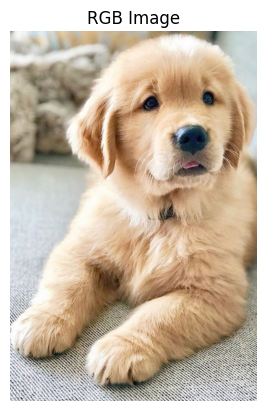

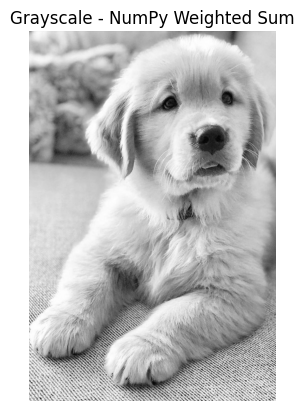

In [5]:
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data)).convert("RGB")
rgb = np.array(img)

plt.imshow(rgb)
plt.title("RGB Image")
plt.axis("off")
plt.show()

weights = np.array([0.2989, 0.5870, 0.1140])
gray_numpy = (rgb[...,0]*weights[0] +
              rgb[...,1]*weights[1] +
              rgb[...,2]*weights[2]).astype(np.uint8)

plt.imshow(gray_numpy, cmap='gray')
plt.title("Grayscale - NumPy Weighted Sum")
plt.axis('off')
plt.show()

grayscale cv2

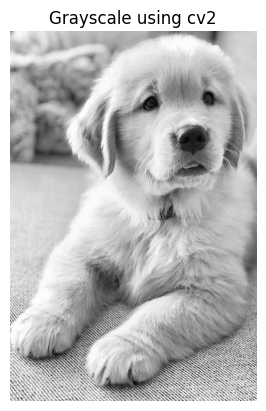

RGB shape: (1104, 736, 3)
NumPy grayscale shape: (1104, 736)
cv2 grayscale shape: (1104, 736)

Sample pixel values:
Pixel (0, 0) → RGB: [151 154 145] | NumPy gray: 152 | cv2 gray: 152
Pixel (552, 368) → RGB: [237 236 232] | NumPy gray: 235 | cv2 gray: 236
Pixel (1103, 735) → RGB: [226 227 231] | NumPy gray: 227 | cv2 gray: 227


In [10]:
import cv2
gray_cv2= cv2.cvtColor(rgb,cv2.COLOR_RGB2GRAY)

plt.imshow(gray_cv2,cmap="gray")
plt.title("Grayscale using cv2")
plt.axis("off")
plt.show()

print("RGB shape:", rgb.shape)
print("NumPy grayscale shape:", gray_numpy.shape)
print("cv2 grayscale shape:", gray_cv2.shape)

coords = [(0,0), (rgb.shape[0]//2, rgb.shape[1]//2), (rgb.shape[0]-1, rgb.shape[1]-1)]

print("\nSample pixel values:")
for (r,c) in coords:
    print(f"Pixel {(r,c)} → RGB:", rgb[r,c],
          "| NumPy gray:", gray_numpy[r,c],
          "| cv2 gray:", gray_cv2[r,c])

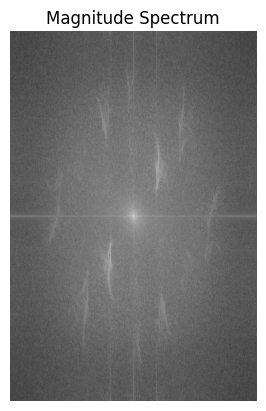

In [11]:
f = np.fft.fft2(gray_numpy)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)   # +1 avoids log(0)
phase_spectrum = np.angle(fshift)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis("off")
plt.show()

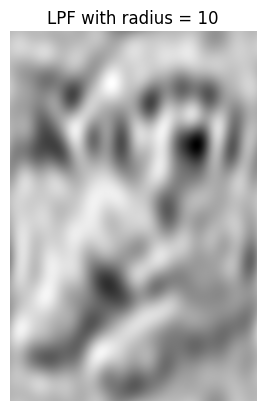

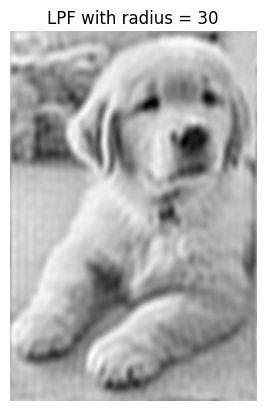

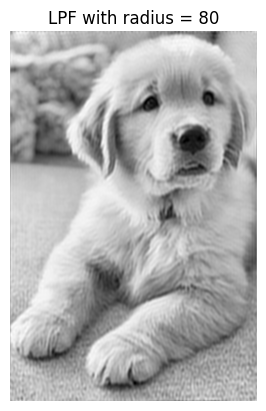

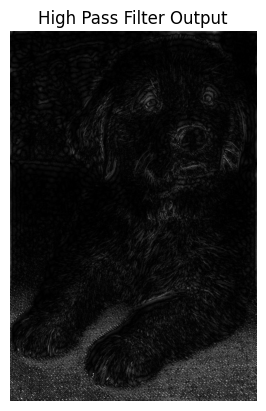

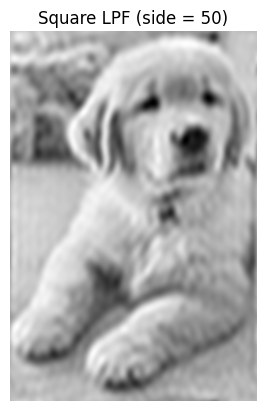

In [16]:
rows, cols = gray_numpy.shape
crow, ccol = rows//2, cols//2
def reconstruct_from_mask(mask):
    fshift_masked = fshift * mask
    f_ishift = np.fft.ifftshift(fshift_masked)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back
radii = [10, 30, 80]

for R in radii:
   mask = np.zeros((rows, cols), np.uint8)
   for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow)**2 + (j - ccol)**2) <= R:
                mask[i, j] = 1
   img_lp = reconstruct_from_mask(mask)
   plt.imshow(img_lp, cmap='gray')
   plt.title(f"LPF with radius = {R}")
   plt.axis('off')
   plt.show()

   R = 30
mask_lpf = np.zeros((rows, cols), np.uint8)
for i in range(rows):
    for j in range(cols):
        if np.sqrt((i - crow)**2 + (j - ccol)**2) <= R:
            mask_lpf[i, j] = 1

mask_hpf = 1 - mask_lpf
img_hp = reconstruct_from_mask(mask_hpf)

plt.imshow(img_hp, cmap='gray')
plt.title("High Pass Filter Output")
plt.axis('off')
plt.show()

square_side = 50
half_side = square_side // 2

mask_square = np.zeros((rows, cols), np.uint8)
mask_square[crow-half_side : crow+half_side,
            ccol-half_side : ccol+half_side] = 1

img_square = reconstruct_from_mask(mask_square)

plt.imshow(img_square, cmap='gray')
plt.title("Square LPF (side = 50)")
plt.axis('off')
plt.show()


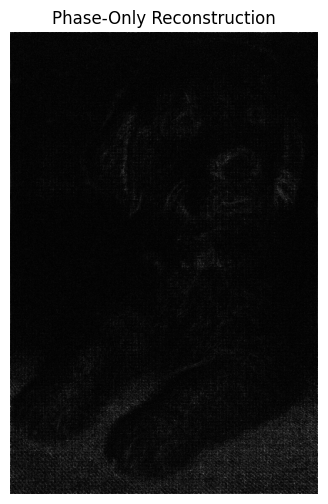

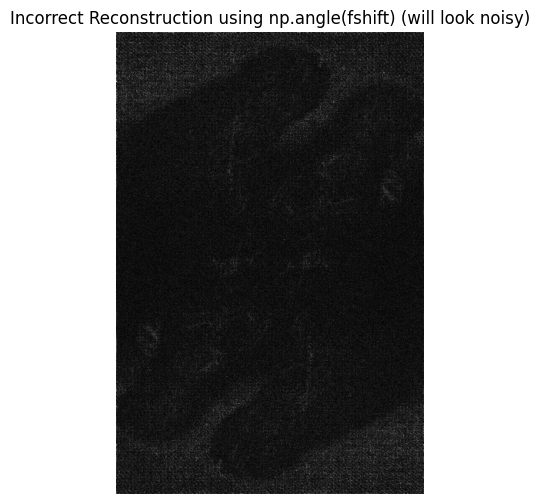

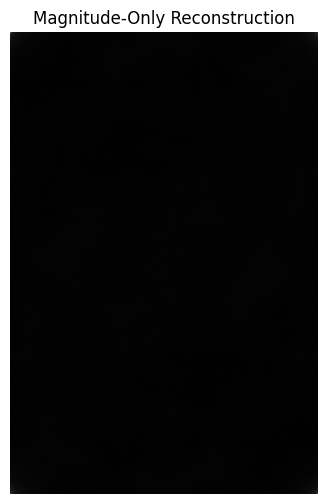

In [18]:
phase_only = fshift / (np.abs(fshift) + 1e-8)
img_phase = np.fft.ifft2(np.fft.ifftshift(phase_only))
img_phase = np.abs(img_phase)

plt.figure(figsize=(6,6))
plt.imshow(img_phase, cmap='gray')
plt.title("Phase-Only Reconstruction")
plt.axis('off')
plt.show()

phase_raw = np.angle(fshift)
img_fail = np.fft.ifft2(np.fft.ifftshift(phase_raw))
img_fail = np.abs(img_fail)

plt.figure(figsize=(6,6))
plt.imshow(img_fail, cmap='gray')
plt.title("Incorrect Reconstruction using np.angle(fshift) (will look noisy)")
plt.axis('off')
plt.show()

mag_only = np.abs(fshift)
img_mag = np.fft.ifft2(np.fft.ifftshift(mag_only))
img_mag = np.abs(img_mag)

plt.figure(figsize=(6,6))
plt.imshow(img_mag, cmap='gray')
plt.title("Magnitude-Only Reconstruction")
plt.axis('off')
plt.show()

In [20]:
import base64
with open("cat.jfif", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEhAQEhAQDxAQDw8PDw8PEA8NDw8PFREWFhURFRUYHSggGBolGxUVITEhJSkrLjouFx8zODMuNygtLi4BCgoKDg0OGhAQGisdFR0rLSsrLS0tKy0tKy0tLTctLS0tLS0tLS0tLS0tNy0tKzctNysrNy0rLSsrLSsrLSsrK//AABEIAL4BCQMBIgACEQEDEQH/xAAbAAACAgMBAAAAAAAAAAAAAAADBAIFAAEGB//EADsQAAEEAAMFBgUEAAQHAQAAAAEAAgMRBBIhBRMxQVIUIlFhkZIGFTJTcSOBobFDYtHxM0KCg8Hh8Bb/xAAYAQADAQEAAAAAAAAAAAAAAAAAAQIDBP/EACIRAAICAgMBAQADAQAAAAAAAAABAhETIQMSMVFhBCJBFP/aAAwDAQACEQMRAD8A9dw0ICK9i2CpLhj4YpaFWw6ppjVsBbVoFGiSgWqS2rTKAhiIApALdKwSAStVfMwgq0eEMxWpt2ZyjZWAOPK0ticzeIIV+yEBCxUIIIIWqQY9Fdg8XYpMWqvDxFriOQKs2qol8TtG1sKKkFRsSB1H5TzHJBHzrPkM5Og7nqOdLSSrbSsHInsMZkUJcLe9pOMq9HYwSoWgHEKUb7Q526Qu1knLTZFpzkDP5IboTdD7XqSTZImGOWkZ2WpWFW1C1mZXZRNYtArLTGYsUSVq0wK4SKYmVY/EUhnF2uBqjk70W4lUxIqqGW+aeiCIvQ1Kx1pUkJilmWsUaJkwVhcoWtWrHZIhRkkDeK3I+ha57bO09DrwWsYpbLUS3n2m1o4qeFxQk5aLjNj5sRLRNMH8rsoYg0UNAhyocnWjNwLNIb20nW0lJ+KIMmANbCwLArNDTysdLosehyM0WfJ4Y8oIyJqF6rJLC1FiTwXG2YdqLl70jPOb0QjiL5oTXi1DkwcrHIgTzTkLECEhMNkARx+lpDbGLJIwVGOUIhcu5U0b

(np.float64(-0.5), np.float64(264.5), np.float64(189.5), np.float64(-0.5))

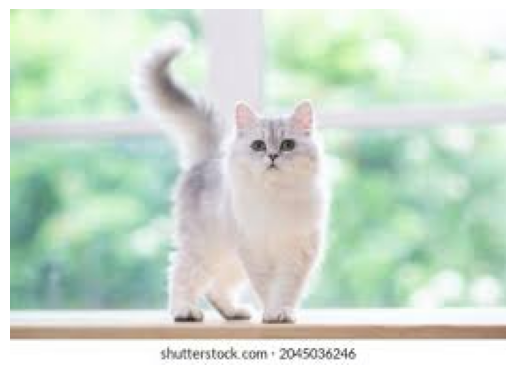

In [25]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image2 = """/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEhAQEhAQDxAQDw8PDw8PEA8NDw8PFREWFhURFRUYHSggGBolGxUVITEhJSkrLjouFx8zODMuNygtLi4BCgoKDg0OGhAQGisdFR0rLSsrLS0tKy0tKy0tLTctLS0tLS0tLS0tLS0tNy0tKzctNysrNy0rLSsrLSsrLSsrK//AABEIAL4BCQMBIgACEQEDEQH/xAAbAAACAgMBAAAAAAAAAAAAAAADBAIFAAEGB//EADsQAAEEAAMFBgUEAAQHAQAAAAEAAgMRBBIhBRMxQVIUIlFhkZIGFTJTcSOBobFDYtHxM0KCg8Hh8Bb/xAAYAQADAQEAAAAAAAAAAAAAAAAAAQIDBP/EACIRAAICAgMBAQADAQAAAAAAAAABAhETIQMSMVFhBCJBFP/aAAwDAQACEQMRAD8A9dw0ICK9i2CpLhj4YpaFWw6ppjVsBbVoFGiSgWqS2rTKAhiIApALdKwSAStVfMwgq0eEMxWpt2ZyjZWAOPK0ticzeIIV+yEBCxUIIIIWqQY9Fdg8XYpMWqvDxFriOQKs2qol8TtG1sKKkFRsSB1H5TzHJBHzrPkM5Og7nqOdLSSrbSsHInsMZkUJcLe9pOMq9HYwSoWgHEKUb7Q526Qu1knLTZFpzkDP5IboTdD7XqSTZImGOWkZ2WpWFW1C1mZXZRNYtArLTGYsUSVq0wK4SKYmVY/EUhnF2uBqjk70W4lUxIqqGW+aeiCIvQ1Kx1pUkJilmWsUaJkwVhcoWtWrHZIhRkkDeK3I+ha57bO09DrwWsYpbLUS3n2m1o4qeFxQk5aLjNj5sRLRNMH8rsoYg0UNAhyocnWjNwLNIb20nW0lJ+KIMmANbCwLArNDTysdLosehyM0WfJ4Y8oIyJqF6rJLC1FiTwXG2YdqLl70jPOb0QjiL5oTXi1DkwcrHIgTzTkLECEhMNkARx+lpDbGLJIwVGOUIhcu5U0baoryKNJmMqLm2VNoUqNEJE7Wi5YFKlRRjXrUklLC1CkBKXah2bZiAVLeBLx4PnZRez+a0TErOYDSQgmJytcPCKCI7DhcEpWzj62LYCNXEbdEnAwBOsKtR0aQVEqUc609yTkn8FSRTlQ8HrbXJJryhPnoq4gpFpOzu6FcR8SMOq7Njg9vFUG3MHYPNbvw6oM5n4Z2qGShh0BXooeCLBXkGPwrmPzCxR0XRfDnxKbEch8rSpNBOJ3udBkOqyOVpAcDoVjgiMepEFRoLFpbVmhh5flNNiFJQnh+U6x4pTIzl6LTYUJc4MJ90gQy4LnkkzNxRVYiClWzSEK/lZaE3BA8ln0siXEVOHxDk3viU72No5IToVS4iOrQXBPPNPh+irWGkYTKlp0aRdDbXhEDglA9TL1pZSkM2pNclN4pNeo7NMakNFRAUGvUsyfpVhQtoOdazlX2H2KjDGlOR6g14HgtlwKxXAzDHIi2ZHa+0JuVGbIFpiYLikY5thBEOqa3wWhKE1xseJkmR6JXFQ+SbGI8lB0l8k1xsrEL7NzAkHgmcbhswUWuRmTLU0hFxRx+09lE8lRv2TRsaL0maG/BVOLwnks6o2TsqNm41zGZHG61C6DCY0ONXwaL/K5/EYevJF2Q7K43rZVp2S0dMEr202e6MoJAAFHQ1d+KZwzr9dFVSGnPbrYc7nfNKRcEndlmDdEag8CjlmnFVMWMcxprXnwsf7oPzpwcW0NGg3X/AITqzOcbZb7s+KSfjXEnKcgB48z5lKybTe6OjbeR0QYpa+qvAfnzUSSXhfDxIv4TmAd1AH/VHbSWiFRx2ReXlw4lZm/KfVGbirGXUl3NUDIFEzhPqiXCLJ7oLN0FDfhZvgjqhdIhmgKdhK78LN+nSHURmwsDwgNfaKIylSCohDMFEzIUjSEPVGkH9RjflZ2hDbC4qfZXeKeh6KQTqYlKFuUZraUOZz55EmyFTbIUPeLfaElMMzDhzlEyFCOKKiZ7VdgzBTMfNCOJcouJ8UKyNVUWn6TmYx2hyIJXJcS2iiRXoeV/R/CzHgUxPGCLVSJ9dFbQvtmqlo2452c/tOOuCrsI8h1eause1VkDRm/BtSkb3o6nZ0VNDjpzVZNG4vc6+6ToP3VgZv07qvDzSExJHBUJFHtL4jw0TjC6YNk0FU6mu5W4Cgg43EgTh1aUB+dWm1UbR+EmvkMudzdXFrcu8Ic7Q63r+9o2NxzIt3h3iQzsbEwUxxzHLQOg4d02QkUjHfFOGjcYnvfn3jrLWlzQb+nNw0XSQDOAWSZbogirpcLH8JMOQyPeXguJblAPedbhmvmb5Lr4GlrQAyq4c0r+jVnawMBY3nQ4+aG4iknsDE5g4Xen8rMW14vT0Uy/Dn5NGsRK1V0uICWxMxVZNidUosw5Ja0XDsSApnHClzrsT5o+Gmsp2zFTZ0GHkLuSZdDpaX2bwVg/QINo7QHDSKziOi5ueUtNhNYTaJSTKhyJFzMq3eG1N2LsKMaUvwqTTHIHJjMlI3Iu9SVgmc/I9LS4quaUxM5VPicQb4qYQb9ONyL84u0SIkrnsHi9aXSbP1CGqYQV+m3NKjE5PvjoKsnNWq9HKPUsGkFRc0Kp7SQmcPKTqUmmLsWDIVKVtKEciITYVwstCjpAFZbPxzchvSuapZoi51BH2g7dxhoGtLU24E2xHaO0HOcQBTbq0xgHVWp8yuekkNgk635q6w0hNfsqOs6qXVjUhKSPwmsN9AHkl52rOY4gXtFXp42uexUUzsQ2bKwtYx0YsfqFrnAkg8AO6NF0DuFIUxrSr81m5MtIAyMEXpfHUc0UtPJQa8Kcal2yvCz2IwBxoUreVqS2UBSNjJ8q18Rz8jKbaeHGq5PGYc5iutxc9qrdCHFYKVOzinL4c8MM5M4RhaaKuRhgonD6rRclkIPhXFP5yQlsO1N2KQ9miF5IUs6MhWraKk6MUih9LK+ByZZMl8bQFhKCdNsl60W7ZlPeqtwxJTlJDTOUxj6CpMVIrGaW1VYs2VaRgjIJKIK6zY2IsBcxhMMXEVwXVbJwRCzkiop3ouKJUHYLMm4Ik0GhS0bdb9Kb5aFLsStHEKLiErZPRFRLGWoQnT+JVTJESaC1gzNqnodwUrcws0o7WZZvlyUMDgyHjMNEztOOz4BaWdn8fw57D4a5NdVdQQUeFJSCGnWrKEiwnZ0sciNFoWpTqoOk7wKJKFMhIXel5ByTdIL2rNopMBosY4KT2KDWKSy12dLqEXbMoFIOzRqFHberv2pXJ/1OTn1ErpHWgWjtCBMaWL2jiaCCRDfLSGwqcUZJUx0JG2YukduItbOCvkgHDFpW8WmUrQ7HMiHHCqKrySEvIlJ0PvQxiJsxoLcWHUcOzS01G8JjW/TcLKTC1Gi5U6KR51PKlI7c4BTlYSmtnQUbVuSowL7ZOFAAXQ4ZgCp9nngrB09DiuZJtm3HJJFlvAECTFgc1UyY9BfOXKo22Ep/CydjfNRdiCqxnFWOGCpxpmabYRkL368AnIMJlHimsMBSJK8AK0qN4wS2BbSrNpk5+CbZjBmGoH5UccRxFG1SN+Jp+FU9nMI0Y4KTGhSY1S2bknngjxvsAeSC5iwGj5osGg5CHS2XLQOilsaREtW2RqL3qLH+f+yiyq0WmzXC65pPagJcfBF2P9R8uKHtGSiR4q5P+pyfyCsMlJd4LkSRhR8NAsk9nF6Bhw5T2HZSKyGkWlbVlKJNoCBiGKM0tc0nLi70UxTRVo1I1Ac3VGdZWMYmyGgcz8o0Qo5zaPiGaKvDtUmxWXcE1pjeKqgmCb3oVJmlnJvi8kSGOkyatRxNVYVRVmAbDzAaWmnTCuK53DZnP48E6ZMpolauCoqtDLuKmXpPf2ph6iKoP8Nic2rPD4rRUr+KmXkc0NWTs6GPauVTl2pmC5beknirDDuVddFKbL3ZYY9xDwDpoDzKaxYA0AAHKuSHsRre8ctkDieSydxJJtHiO7+OtWKtJBrimGtWso4eWpRoWEf6rKR1IIyNKYuKjfI8044rU0eZp8RqEJ/4DEQ7RRZLyQXPrkf2WodXXr+ENAMuP/3ggTEgtI/9EIkx8lrCjO4AcL9Emhplzs0U0vOlivBVGIktx/KucVozKOFfz4qjkbqnM4OeVsLHDeqZZGAlGT8kbOspSMBvMEticQAgySpYDMfJCk7By/wXx2IcQaBSMGYHW10keHHClCfBjwVykDg/RfDixqmciNhsET5BMSbO00KEm0WouiqxAVVLCfBW8kZDqKw4Rx4BJC62VETyEzvVOTDEGiKRdytEiaOZdij4IM0+iYMV0tPw9haRozQvgjra3iAbu0eCGlKWG1bejStC0RTTXLTMPSKY0otMcYsE+SkMyWovYbUxESh0hODNsAT2Gcgx4dMRRG029C6F/sOv1Dd93h4IszBxv9kvsSGs5/y1/KdmaK40okd3BqJHDtza8Ed7hVDlxQGOLR+/5BCrsRO6JwNfpvP1dB8CoqlZt2TlRcwRZk7kDR5qt2fiRY1FHmrPEMLjoR6pwSFNs57HxU7wB1BUsOwVascXh7BaeI1CRbo1FbC7QvM78J/YuHq3FIbok/SavirV7jG0NHMaoS2KcusTMW/kqycIzr80vI1x5H0SqzhlbFYnUU3mtLbg+B9EyyM1wPos5RI6sXmUcI7vI8sJrgfQpWKFwP0u9CqUaQurLnDz3onWYUnUpPZkJBsg/uCr1gSjC/To4436CijpEeoTOpIvxL+l3oVrdGjaWiMkIc9WEUQAVdHmu8p9CnmSmuBSiTChfHQAi1WZArPFlx4A+ir9y/pPohkzWxwYSL7Y9oUxhougei4Qbbm+5/JU2bZm+4ozL4df/Odx2SL7Y9oW+yRdA9AuK+bzfcUvm83WjMgwHZ9li+2PQLYwsXQPQLiztmXrWDbEvX/SMyHgZ2vZYvtt9oWxhouhvtC4n5xL1n+FIbXl6/6RmQYGdsMPH0t9At7mPpb6BcQdry9f9LTtqy9f9JZ0PAdrO1uV1CtL0rWtaXne0fiuf9QNwOJuiGVGU8za0nX/AEt/Mn9X8BD50UuFoW+HdvTvEbX4eeN4e1pL2ENIuiSfCl3uIZE9pY5oLXCiKXGDaT+oegUhtOTrSXKkD4rBYuPEYZxjiZv49Sx2cNcB0utb2Zj8fmt8AH/dYpHaD+q/yAt9vf1D0CWRFY2dljMUGwukdWZsZJrva1wHiuKxPxPE3MBbnAd0ZXca0B0U3bReB9f9IPzJ3WPRN8wlxUM7E+I43SlhzVbe/lc1uata04Wu6a4EA1xAOvFee/MXfcH8LPmMn3ULmE+Kz0Oh4BboeAXnR2jJ9w+qz5lL90+qedfBYP09GoeAWaeC83dtKX7p9ygdpS/cd6lGZfAwfp6Zos08F5j8wl+68f8AUaU/mc33T6ozr4GD9PS7W7XmPzWc/wCK4fuoHaEx4zO9xCMy+Bgf09QtZa8sfjZfuv8AeVEbQmHCZ/uKMy+Bg/T1TMtZl5Ydpz/ed6lQdtacf4z/AHFPMvgYP09WzLLXkr9rT/ef7ih/N5/vSe8ozL4GD9PX+zs6Ge1qzs7OhntairFrRiC7Ozob7Qs3DOhvtCKsQALcM6G+0LNwzob7QirEUALs7OhvtCzs7OhvtCKsRQAuzs6G+0LNwzob7QirRRQFRJtXDB7GdynGVu8yjIHscxpbdeL+PDQrMXtjCx0TTszHSDdx5+4GF9mhpYBpSOwoiZCS8mTeB3eAADywuAAFD6G68eN2os+HoRfelNjJReCN3kezd8Ppp58+GqKAn8zwvN0YNMJBbTu8WgCq499mnHvDxWnbVwoLRbKcJnZ8n6YEWXPbqoVmGq1HsCEOL+8XF0Ujiclukjcwh5Ibeu7bYuuOmqx2wIjmsyHOZS7vAaSBoc3QafQw2NbbdmzaoDJ9rYZoBBY82wZQAC3NJkt1ju0c2hr6T4Jl2IgAYSY6l/4Zyjv87GnCuaUPw7D3wTI4SkGdrnNLZ3B5cHPFVzIoUKoVoKYOyWERjPJ+kCxhLgTu3AB0ZJGoOVt3rpxRQAvm2D0/Uh14aan6dargc7K8cwriE3C6FwYW7pwkZvGVlt7NO8BzGo9Qkofh6FpDrkc4bsBzn2csb4nsbw4Aws/m7JtWGEwjI2sY0aRtLGk0XBp46/sPRMCpk25A0ua6CQOYDI9pijtsIAJmOv0gEafV/lU5tsYdrsu7zHfiBpqGNr35cxLXPc0ECiPGwaBUv/z0ZBDpJn5jJmLnMBeySt4xxDQS12VvHWmgAhTOwIKexjTEyQNbIyKmMexraDCK0FE8KQAtJt3Dhrn7l+Voa4Hdx06JxcBK0l3AlhAH1HSgbFkl2xhwJnNj3ow73Mm3TYnZC1hc8myKDQCDfMULKmfh+KnNDpWtc3dlokoCHvfogV9Hfd566EUFE/DkX/K+VneaQGlhDWte54ZTmkFoe8u1vWvAIoDWI21hWbzMGgRmEZi1jGvfK5zWsaXEAkFjrugKN8DVt2dnQz2tVZJ8OYcuL2tMTyAM0eVp/wATMaqrdvpL058irWGMNa1jRTWtDWjwaBQCKAj2dnQ32tWdnZ0N9oRViKAF2dnQ32hZ2dnQ32hFWIoAXZ2dDfaFnZ2dDPaEVYgAXZ2dDPaFnZmdDPaEVYgAXZmdDPa1a7Mz7bPa1GWIA//Z
"""  # long base64 string

img_data2 = base64.b64decode(base64_image2)
img2 = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

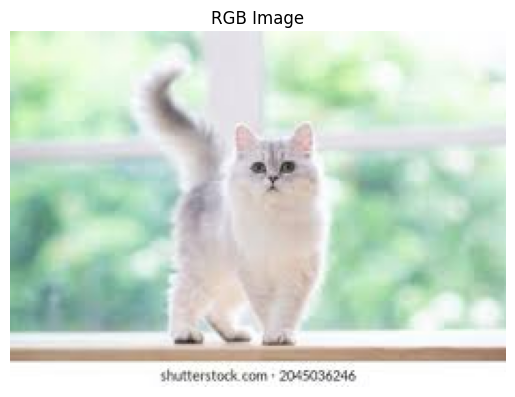

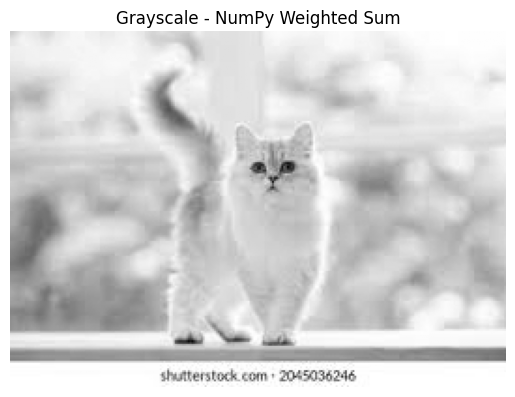

In [27]:
img_data2 = base64.b64decode(base64_image2)
img2 = Image.open(io.BytesIO(img_data2)).convert("RGB")
rgb2 = np.array(img2)

plt.imshow(rgb)
plt.title("RGB Image")
plt.axis("off")
plt.show()

weights = np.array([0.2989, 0.5870, 0.1140])
gray_numpy2 = (rgb2[...,0]*weights[0] +
              rgb2[...,1]*weights[1] +
              rgb2[...,2]*weights[2]).astype(np.uint8)

plt.imshow(gray_numpy2, cmap='gray')
plt.title("Grayscale - NumPy Weighted Sum")
plt.axis('off')
plt.show()



In [ ]:
f2 = np.fft.fft2(gray_numpy2)
fshift2 = np.fft.fftshift(f2)
magnitude_spectrum2 = 20 * np.log(np.abs(fshift2) + 1)   # +1 avoids log(0)
phase_spectrum = np.angle(fshift2)

In [32]:
print("RGB shape:", rgb2.shape)
print("RGB shape:", gray_numpy2.shape)


RGB shape: (190, 265, 3)
RGB shape: (190, 265)


Using shapes: f1_shifted: (1104, 736)  f2_shifted: (190, 265)


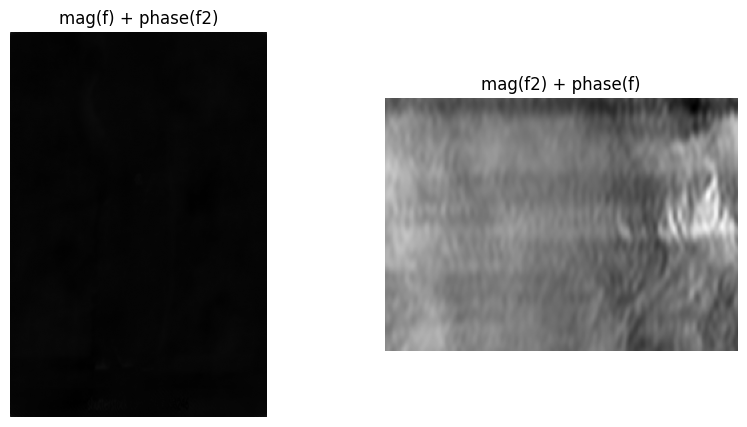

mag1 min/max: 3.075936680458305 143033977.0
mag2 min/max: 0.0 10647026.0
recon1 shape: (1104, 736)  recon2 shape: (190, 265)


In [34]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Adjust these if your arrays are named differently ----------
# We will attempt to use existing variables in your namespace.
# The snippet below uses these priorities:
# 1) if 'fshift' exists use that for image1, else if 'f' exists we'll shift it.
# 2) if 'fshift2' exists use that for image2, else if 'f2' exists we'll shift it.
# Also if neither exist but gray_numpy / gray_numpy2 exist, it will compute FFTs from them.
# ----------------------------------------------------------------------

# 1) Prepare f1_shifted (centered FFT for image1)
try:
    f1_shifted = fshift  # prefer explicit fftshifted name if available
except NameError:
    try:
        # if only f (raw fft2) exists, shift it
        f1_shifted = np.fft.fftshift(f)
    except NameError:
        # else try recomputing from gray_numpy if available
        try:
            f1_shifted = np.fft.fftshift(np.fft.fft2(gray_numpy))
        except NameError:
            raise NameError("Could not find f, fshift, or gray_numpy for image1. Define one of these.")

# 2) Prepare f2_shifted (centered FFT for image2)
try:
    f2_shifted = fshift2
except NameError:
    try:
        f2_shifted = np.fft.fftshift(f2)
    except NameError:
        try:
            f2_shifted = np.fft.fftshift(np.fft.fft2(gray_numpy2))
        except NameError:
            raise NameError("Could not find f2, fshift2, or gray_numpy2 for image2. Define one of these.")

# Quick diagnostics
print("Using shapes: f1_shifted:", f1_shifted.shape, " f2_shifted:", f2_shifted.shape)

# --- center-pad to same shape (pad smaller to larger) ---
def center_pad_to_shape(F, target_shape):
    r, c = F.shape
    rt, ct = target_shape
    if (r, c) == (rt, ct):
        return F.copy()
    out = np.zeros((rt, ct), dtype=np.complex128)
    r0 = (rt - r)//2
    c0 = (ct - c)//2
    out[r0:r0+r, c0:c0+c] = F
    return out

shapes = [f1_shifted.shape, f2_shifted.shape]
target = (max(s[0] for s in shapes), max(s[1] for s in shapes))
F1 = center_pad_to_shape(np.array(f1_shifted, dtype=np.complex128), target)
F2 = center_pad_to_shape(np.array(f2_shifted, dtype=np.complex128), target)

# --- extract magnitude & phase ---
mag1 = np.abs(F1)
mag2 = np.abs(F2)
phase1 = np.angle(F1)
phase2 = np.angle(F2)

# --- swap: mag1+phase2 and mag2+phase1 ---
F_swap_1 = mag1 * np.exp(1j * phase2)
F_swap_2 = mag2 * np.exp(1j * phase1)

# --- reconstruct (ifftshift -> ifft2) ---
def reconstruct_from_fshift(Fshift):
    img = np.fft.ifft2(np.fft.ifftshift(Fshift))
    return np.abs(img)

recon1_full = reconstruct_from_fshift(F_swap_1)
recon2_full = reconstruct_from_fshift(F_swap_2)

# --- crop back to original FFT/spatial sizes (use original shapes of f and f2 if available) ---
orig1 = f1_shifted.shape
orig2 = f2_shifted.shape

def center_crop(arr, target_shape):
    r, c = arr.shape
    rt, ct = target_shape
    r0 = (r - rt)//2
    c0 = (c - ct)//2
    return arr[r0:r0+rt, c0:c0+ct]

recon1 = center_crop(recon1_full, orig1)
recon2 = center_crop(recon2_full, orig2)

# --- normalize for display ---
def normalize_uint8(x):
    x = x - np.nanmin(x)
    mx = np.nanmax(x)
    if mx <= 1e-12:
        return np.zeros_like(x, dtype=np.uint8)
    x = x / mx
    return (255 * x).astype(np.uint8)

disp1 = normalize_uint8(recon1)
disp2 = normalize_uint8(recon2)

# --- display ---
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(disp1, cmap='gray'); plt.title("mag(f) + phase(f2)"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(disp2, cmap='gray'); plt.title("mag(f2) + phase(f)"); plt.axis('off')
plt.show()

# --- diagnostics ---
print("mag1 min/max:", mag1.min(), mag1.max())
print("mag2 min/max:", mag2.min(), mag2.max())
print("recon1 shape:", recon1.shape, " recon2 shape:", recon2.shape)
